In [6]:
# Github-Link: https://github.com/sahaavi/image-classification-using-knn
# importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import csv
import random

In [2]:
# Specifying the location in a variable
DATA_SET = "E:/Study/Notes 10th Sem/COMPUTER VISION AND PATTERN RECOGNITION [A]/DATA_SETS/CIFAR10"

In [3]:
TRAIN_LABELS = []
csv_file = os.path.join(DATA_SET, "trainLabels.csv") #extending the root path to locate the csv file and plcae it in csv_file variable
with open(csv_file, 'r') as file: #opening the csv file for reading
    reader = csv.reader(file) #reading the file
    for row in reader: #reading each row of file
        TRAIN_LABELS.append(row) #storing row info in TRAIN_LABELS list
        
TRAIN_LABELS.pop(0) #poping up the file's 1st row as it Contains the column name
print(len(TRAIN_LABELS))
print(TRAIN_LABELS[0:10])
for i in range(10):
    name = TRAIN_LABELS[i][1]
    print(name)

50000
[['1', 'frog'], ['2', 'truck'], ['3', 'truck'], ['4', 'deer'], ['5', 'automobile'], ['6', 'automobile'], ['7', 'bird'], ['8', 'horse'], ['9', 'ship'], ['10', 'cat']]
frog
truck
truck
deer
automobile
automobile
bird
horse
ship
cat


In [4]:
TRAIN_IMGS=[]
IMG_SIZE = 100

path = os.path.join(DATA_SET,"train") #extending the root path to locate the train folder and plcae it in path variable

for item in tqdm(range(len(TRAIN_LABELS))): #iterating the TRAIN_LABELS list
        categories = TRAIN_LABELS[item][1] #taking the images name from TRAIN_LABELS list
        img = TRAIN_LABELS[item][0]+".png" #taking the image file no and adding .png for searching the file in folder by name
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) #reading the images from folder in grayscale
        img_resized = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)) #resizing the image shape
        TRAIN_IMGS.append([img_resized,categories]) #putting the images with proper image label in TRAIN_IMGS list

100%|████████████████████████████████████████████████████████████████████████████| 50000/50000 [18:30<00:00, 45.02it/s]


In [5]:
print(len(TRAIN_IMGS))

50000


In [7]:
random.shuffle(TRAIN_IMGS) #suffling the TRAIN_IMGS list

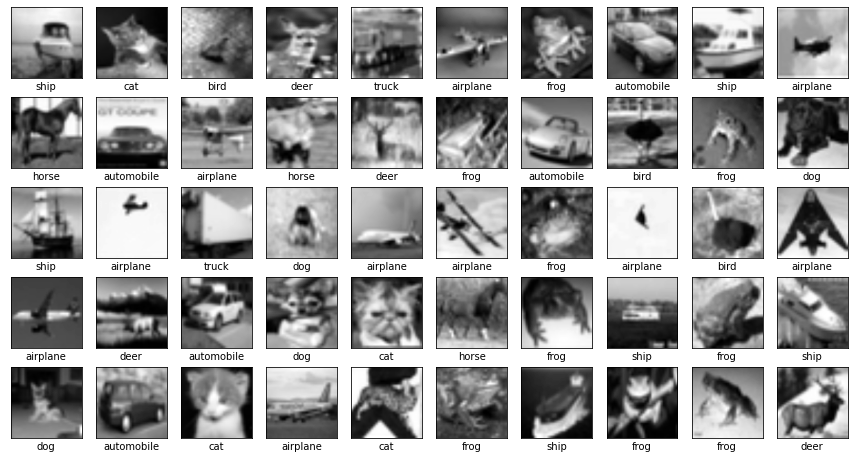

In [8]:
plt.figure(figsize=(15,8)) #image figure size to display
for i in range(50):
    plt.subplot(5,10, i+1) #1st parameter is row , 2nd parameter is column and the 3rd one is subplot no.
    plt.xticks([])
    plt.yticks([])
    plt.imshow(TRAIN_IMGS[i][0], cmap=plt.cm.gray) #showing the image
    plt.xlabel(TRAIN_IMGS[i][1]) #this plots the label
    
plt.show() 

In [9]:
# diving the 50000 images to train set and validation set
fold0=TRAIN_IMGS[0:10000]
fold1=TRAIN_IMGS[10000:20000]
fold2=TRAIN_IMGS[20000:30000]
fold3=TRAIN_IMGS[30000:40000]
fold4=TRAIN_IMGS[40000:50000]
print(len(fold0))
print(len(fold1))
print(len(fold2))
print(len(fold3))
print(len(fold4))

10000
10000
10000
10000
10000


In [10]:
validation_set0 = fold4
train_set0 = fold0 + fold1 + fold2 + fold3
validation_set1 = fold3
train_set1 = fold0 + fold1 + fold2 + fold4
validation_set2 = fold2
train_set2 = fold0 + fold1 + fold3 + fold4
validation_set3 = fold1
train_set3 = fold0 + fold2 + fold3 + fold4
validation_set4 = fold0
train_set4 = fold1 + fold2 + fold3 + fold4

In [13]:
def Knn_accuracy(validation_set,train_set,ki): #ki is for how many neighbours want to choose
    valid_arr = []
    t = 20
    for i in range(t): #iterate through only 1st 20 images from a validation set
        arr_list =[]
        for j,k in tqdm(enumerate(train_set)):
            dist_arr = np.abs(validation_set[i][0] - train_set[j][0]) #calculating the distance between the train image and validation image
            dist = np.sum(dist_arr) # mathatten / L1 distance
            arr_list.append([dist, train_set[j][0], train_set[j][1]]) #storing the trainging image with label and distance

        arr_list.sort(key=lambda e:e[0]) #sorting the traing images according to distance
        valid = 0 #intially valid images are 0
        for m in tqdm(range(ki)):
            if validation_set[i][1] == arr_list[m][2]: #checking if the taining image matches with validation image
                valid += 1 # if match add 1 to valid

        print("valid = ",valid)
        valid_arr.append(valid) #here taking the valid variable in ana array because by valid we can get how many images are valid for only one image

    sum_valid = sum(valid_arr) #finding how many image are valid for validation set against neighbours
    accuracy = (sum_valid/(ki*t))*100 #finding the accuracy percentage
    print("valid_arr = ", valid_arr)
    print("sum_valid = ", sum_valid)
    return accuracy 

k = [1,2,3,4,5] #neighbours list
k_max = 5

total_accuracy = [] 
accuracy_avg = []

# For 1st validation set
fold_accuracy = []
for item in tqdm(range(k_max)):
    v_accuracy = Knn_accuracy(validation_set0,train_set0,k[item]) #finding the accuracy for a validation set for k=1 to k=5
    print("accuracy= ", v_accuracy)
    fold_accuracy.append(v_accuracy)

print("fold_accuracy= ", fold_accuracy)
total_accuracy.append(fold_accuracy)
avg = sum(fold_accuracy)/k_max #calculating the average of 5 accuracy
accuracy_avg.append(avg)
print("T_Accuracy After 1st validation set ", total_accuracy)
print("Avg After 1st validation set ", accuracy_avg)


# For 2nd validation set
fold_accuracy1 = []
for item in tqdm(range(k_max)):
    v_accuracy = Knn_accuracy(validation_set1,train_set1,k[item])
    print("accuracy= ", v_accuracy)
    fold_accuracy1.append(v_accuracy)

print("fold_accuracy1= ", fold_accuracy1)
total_accuracy.append(fold_accuracy1)
avg = sum(fold_accuracy1)/k_max
accuracy_avg.append(avg)
print("T_Accuracy After 2nd validation set ", total_accuracy)
print("Avg After 2nd validation set ", accuracy_avg)

# For 3rd validation set
fold_accuracy2 = []
for item in tqdm(range(k_max)):
    v_accuracy = Knn_accuracy(validation_set2,train_set2,k[item])
    print("accuracy= ", v_accuracy)
    fold_accuracy2.append(v_accuracy)

print("fold_accuracy2= ", fold_accuracy2)
total_accuracy.append(fold_accuracy2)
avg = sum(fold_accuracy2)/k_max
accuracy_avg.append(avg)
print("T_Accuracy After 3rd validation set ", total_accuracy)
print("Avg After 3rd validation set ", accuracy_avg)

# For 4th validation set
fold_accuracy3 = []
for item in tqdm(range(k_max)):
    v_accuracy = Knn_accuracy(validation_set3,train_set3,k[item])
    print("accuracy= ", v_accuracy)
    fold_accuracy3.append(v_accuracy)

print("fold_accuracy3= ", fold_accuracy3)
total_accuracy.append(fold_accuracy3)
avg = sum(fold_accuracy3)/k_max
accuracy_avg.append(avg)
print("T_Accuracy After 4th validation set ", total_accuracy)
print("Avg After 4th validation set ", accuracy_avg)

# For 5th validation set
fold_accuracy4 = []
for item in tqdm(range(k_max)):
    v_accuracy = Knn_accuracy(validation_set4,train_set4,k[item])
    print("accuracy= ", v_accuracy)
    fold_accuracy4.append(v_accuracy)

print("fold_accuracy4= ", fold_accuracy4)
total_accuracy.append(fold_accuracy4)
avg = sum(fold_accuracy4)/k_max
accuracy_avg.append(avg)
print("T_Accuracy After 5th validation set ", total_accuracy)
print("Avg After 5th validation set ", accuracy_avg)

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]
0it [00:00, ?it/s]
673it [00:00, 6665.00it/s]
1014it [00:00, 4975.17it/s]
1707it [00:00, 5422.88it/s]
2141it [00:00, 5028.40it/s]
2921it [00:00, 5617.00it/s]
3425it [00:00, 5354.03it/s]
3923it [00:00, 5111.66it/s]
4735it [00:00, 5740.93it/s]
5318it [00:00, 5632.08it/s]
5888it [00:01, 5105.27it/s]
6508it [00:01, 5362.34it/s]
7058it [00:01, 4997.14it/s]
7572it [00:01, 4535.66it/s]
8044it [00:01, 4546.10it/s]
8512it [00:01, 3810.75it/s]
8954it [00:01, 3948.22it/s]
9371it [00:01, 3550.73it/s]
9848it [00:02, 3845.03it/s]
10256it [00:02, 3601.93it/s]
11044it [00:02, 4296.09it/s]
11953it [00:02, 5102.15it/s]
12576it [00:02, 5142.63it/s]
13169it [00:02, 5028.69it/s]
13728it [00:02, 4747.39it/s]
14245it [00:02, 3838.60it/s]
14687it [00:03, 3940.88it/s]
15199it [00:03, 4224.04it/s]
15966it [00:03, 4873.16it/s]
16572it [00:03, 5176.63it/s]
17223it [00:03, 5203.82it/s]
17777it [0

valid =  1



1286it [00:00, 6247.75it/s]
1954it [00:00, 6362.18it/s]
2374it [00:00, 5495.20it/s]
3105it [00:00, 5912.51it/s]
3835it [00:00, 6254.65it/s]
4495it [00:00, 6353.00it/s]
5289it [00:00, 6754.44it/s]
5944it [00:00, 6556.78it/s]
6666it [00:01, 6596.60it/s]
7425it [00:01, 6847.86it/s]
8154it [00:01, 6973.39it/s]
9038it [00:01, 7444.63it/s]
9790it [00:01, 6930.77it/s]
10525it [00:01, 6913.87it/s]
11225it [00:01, 6919.65it/s]
11923it [00:01, 6716.70it/s]
12760it [00:01, 7122.49it/s]
13483it [00:01, 7059.87it/s]
14197it [00:02, 6691.75it/s]
14876it [00:02, 5947.45it/s]
15609it [00:02, 6284.27it/s]
16258it [00:02, 6082.50it/s]
16882it [00:02, 5738.49it/s]
17471it [00:02, 5604.35it/s]
18043it [00:02, 5524.65it/s]
18648it [00:02, 5671.97it/s]
19258it [00:03, 5791.38it/s]
19843it [00:03, 5453.32it/s]
20397it [00:03, 5306.91it/s]
21104it [00:03, 5722.36it/s]
21798it [00:03, 6035.19it/s]
22416it [00:03, 5959.83it/s]
23086it [00:03, 6147.68it/s]
23710it [00:03, 5929.71it/s]
24311it [00:03, 5797.12it/

valid =  0



375it [00:00, 3707.74it/s]
782it [00:00, 3759.30it/s]
1459it [00:00, 4328.89it/s]
1950it [00:00, 4438.83it/s]
2328it [00:00, 4003.64it/s]
2690it [00:00, 3580.70it/s]
3458it [00:00, 4257.23it/s]
3925it [00:00, 3310.73it/s]
4437it [00:01, 3703.06it/s]
5121it [00:01, 4291.25it/s]
5625it [00:01, 3795.83it/s]
6068it [00:01, 2380.43it/s]
6954it [00:01, 3046.64it/s]
7823it [00:01, 3783.60it/s]
8613it [00:01, 4478.54it/s]
9523it [00:02, 5276.78it/s]
10302it [00:02, 5832.62it/s]
11051it [00:02, 6170.46it/s]
11959it [00:02, 6705.17it/s]
12728it [00:02, 6684.83it/s]
13466it [00:02, 6512.83it/s]
14286it [00:02, 6925.86it/s]
15209it [00:02, 7485.25it/s]
16000it [00:02, 7588.53it/s]
16789it [00:03, 7608.80it/s]
17571it [00:03, 7559.78it/s]
18342it [00:03, 7121.58it/s]
19070it [00:03, 6750.57it/s]
19760it [00:03, 6344.98it/s]
20410it [00:03, 6315.23it/s]
21053it [00:03, 6097.83it/s]
21770it [00:03, 6368.24it/s]
22498it [00:03, 6615.19it/s]
23243it [00:04, 6828.58it/s]
24029it [00:04, 7107.30it/s]
24

valid =  0



466it [00:00, 4655.22it/s]
680it [00:00, 3251.32it/s]
1038it [00:00, 3335.18it/s]
1454it [00:00, 3545.72it/s]
1768it [00:00, 3411.48it/s]
2092it [00:00, 3309.26it/s]
2995it [00:00, 4080.31it/s]
3986it [00:00, 4954.70it/s]
4615it [00:00, 5171.05it/s]
5228it [00:01, 4942.89it/s]
5792it [00:01, 5030.83it/s]
6677it [00:01, 5770.75it/s]
7648it [00:01, 6558.56it/s]
8566it [00:01, 7156.53it/s]
9360it [00:01, 7118.43it/s]
10127it [00:01, 6022.22it/s]
10797it [00:01, 5741.57it/s]
11813it [00:01, 6593.65it/s]
12641it [00:02, 7016.41it/s]
13407it [00:02, 7124.90it/s]
14165it [00:02, 7092.98it/s]
15161it [00:02, 7747.00it/s]
15986it [00:02, 7888.86it/s]
16804it [00:02, 7598.51it/s]
17608it [00:02, 7725.78it/s]
18397it [00:02, 7403.07it/s]
19219it [00:02, 7610.27it/s]
19992it [00:03, 7466.32it/s]
20748it [00:03, 7452.01it/s]
21592it [00:03, 7720.33it/s]
22463it [00:03, 7974.78it/s]
23377it [00:03, 8289.94it/s]
24214it [00:03, 8290.26it/s]
25049it [00:03, 8116.28it/s]
25877it [00:03, 8164.18it/s]
2

valid =  0



1603it [00:00, 8230.67it/s]
2391it [00:00, 8120.82it/s]
3253it [00:00, 8241.33it/s]
4034it [00:00, 8082.13it/s]
4849it [00:00, 7956.61it/s]
5703it [00:00, 8120.16it/s]
6506it [00:00, 8070.24it/s]
7264it [00:00, 7199.95it/s]
7968it [00:01, 6640.67it/s]
8792it [00:01, 7035.81it/s]
9619it [00:01, 7346.25it/s]
10437it [00:01, 7516.86it/s]
11195it [00:01, 7315.60it/s]
11932it [00:01, 7037.76it/s]
12642it [00:01, 6792.70it/s]
13328it [00:01, 6377.39it/s]
14034it [00:01, 6549.70it/s]
14697it [00:02, 6420.12it/s]
15370it [00:02, 6491.29it/s]
16024it [00:02, 6354.83it/s]
16664it [00:02, 5992.56it/s]
17271it [00:02, 5997.38it/s]
17876it [00:02, 5357.77it/s]
18428it [00:02, 5338.54it/s]
18974it [00:02, 3688.60it/s]
19746it [00:03, 4373.69it/s]
20290it [00:03, 4214.95it/s]
20993it [00:03, 4780.69it/s]
21568it [00:03, 5028.73it/s]
22139it [00:03, 5028.25it/s]
22935it [00:03, 5641.47it/s]
24025it [00:03, 6596.12it/s]
24992it [00:03, 6884.70it/s]
25754it [00:03, 7033.37it/s]
26510it [00:04, 6382.38i

valid =  0


826it [00:00, 8102.79it/s]
1273it [00:00, 6486.46it/s]
1809it [00:00, 5785.99it/s]
2596it [00:00, 6284.61it/s]
3360it [00:00, 6622.14it/s]
4145it [00:00, 6930.08it/s]
5080it [00:00, 7495.90it/s]
6008it [00:00, 7934.95it/s]
6930it [00:00, 8278.47it/s]
7751it [00:01, 7994.91it/s]
8548it [00:01, 7892.24it/s]
9356it [00:01, 7924.76it/s]
10148it [00:01, 7804.34it/s]
10929it [00:01, 7183.13it/s]
11657it [00:01, 7086.32it/s]
12381it [00:01, 7131.52it/s]
13100it [00:01, 7042.16it/s]
13969it [00:01, 7449.57it/s]
14764it [00:01, 7591.39it/s]
15531it [00:02, 7549.17it/s]
16291it [00:02, 7563.09it/s]
17051it [00:02, 7376.47it/s]
17793it [00:02, 7312.97it/s]
18660it [00:02, 7657.85it/s]
19432it [00:02, 7547.40it/s]
20297it [00:02, 7847.41it/s]
21302it [00:02, 8399.57it/s]
22279it [00:02, 8768.47it/s]
23171it [00:03, 8761.43it/s]
24058it [00:03, 8441.78it/s]
24946it [00:03, 8544.38it/s]
25808it [00:03, 8540.71it/s]
26683it [00:03, 8601.58it/s]
27564it [00:03, 8635.28it/s]
28431it [00:03, 8370.37it/s

valid =  1



1661it [00:00, 8570.42it/s]
2486it [00:00, 8471.61it/s]
3386it [00:00, 8599.94it/s]
4243it [00:00, 8590.83it/s]
5014it [00:00, 8301.14it/s]
5741it [00:00, 7862.81it/s]
6535it [00:00, 7882.52it/s]
7302it [00:00, 7796.51it/s]
8049it [00:01, 7533.04it/s]
8782it [00:01, 6940.93it/s]
9471it [00:01, 5130.30it/s]
10049it [00:01, 5045.44it/s]
10776it [00:01, 5554.83it/s]
11380it [00:01, 5401.27it/s]
11955it [00:01, 5244.95it/s]
12505it [00:01, 4754.50it/s]
13260it [00:02, 5347.99it/s]
13838it [00:02, 4790.75it/s]
14358it [00:02, 4076.27it/s]
15341it [00:02, 4935.11it/s]
15951it [00:02, 4323.02it/s]
16479it [00:02, 3930.37it/s]
17053it [00:02, 4334.61it/s]
17551it [00:03, 3691.97it/s]
18092it [00:03, 4079.52it/s]
18759it [00:03, 4608.73it/s]
19282it [00:03, 3858.09it/s]
19883it [00:03, 4314.16it/s]
20526it [00:03, 4785.01it/s]
21319it [00:03, 5420.11it/s]
22156it [00:03, 6048.81it/s]
22958it [00:03, 6515.68it/s]
23671it [00:04, 6609.86it/s]
24376it [00:04, 6635.45it/s]
25145it [00:04, 6906.52i

valid =  0



1102it [00:00, 5175.91it/s]
1648it [00:00, 5189.37it/s]
2404it [00:00, 5716.26it/s]
3154it [00:00, 6138.94it/s]
3890it [00:00, 6436.43it/s]
4495it [00:00, 5107.35it/s]
5328it [00:00, 5766.62it/s]
5945it [00:01, 5593.13it/s]
6533it [00:01, 3841.01it/s]
7012it [00:01, 3478.00it/s]
7446it [00:01, 3690.08it/s]
8010it [00:01, 4117.04it/s]
8753it [00:01, 4752.48it/s]
9302it [00:01, 3722.08it/s]
9761it [00:02, 3734.00it/s]
10494it [00:02, 4371.59it/s]
11180it [00:02, 4904.36it/s]
11830it [00:02, 5282.46it/s]
12423it [00:02, 5117.12it/s]
12981it [00:02, 4006.82it/s]
13501it [00:02, 4148.13it/s]
13966it [00:02, 4274.98it/s]
14430it [00:03, 3943.85it/s]
14862it [00:03, 3926.92it/s]
15658it [00:03, 4591.80it/s]
16501it [00:03, 5308.22it/s]
17235it [00:03, 5788.87it/s]
18148it [00:03, 6502.68it/s]
18877it [00:03, 5404.89it/s]
19504it [00:03, 4863.56it/s]
20105it [00:04, 5146.50it/s]
20714it [00:04, 5395.76it/s]
21380it [00:04, 5720.58it/s]
22288it [00:04, 6422.51it/s]
23024it [00:04, 6659.79it/s]

valid =  0



1784it [00:00, 9084.59it/s]
2477it [00:00, 8280.00it/s]
3213it [00:00, 7957.39it/s]
3968it [00:00, 7825.56it/s]
4783it [00:00, 7901.61it/s]
5613it [00:00, 7993.79it/s]
6545it [00:00, 8346.66it/s]
7333it [00:00, 7720.67it/s]
8246it [00:01, 8074.94it/s]
9042it [00:01, 8015.66it/s]
9836it [00:01, 7390.18it/s]
10579it [00:01, 7167.41it/s]
11345it [00:01, 7307.60it/s]
12274it [00:01, 7788.75it/s]
13079it [00:01, 7864.17it/s]
13893it [00:01, 7922.46it/s]
14772it [00:01, 8142.53it/s]
15676it [00:01, 8391.59it/s]
16521it [00:02, 8332.39it/s]
17470it [00:02, 8626.08it/s]
18344it [00:02, 8634.68it/s]
19212it [00:02, 8228.94it/s]
20042it [00:02, 7807.22it/s]
20876it [00:02, 7958.17it/s]
21679it [00:02, 7912.13it/s]
22531it [00:02, 8084.54it/s]
23542it [00:02, 8581.07it/s]
24412it [00:03, 8513.96it/s]
25272it [00:03, 8198.23it/s]
26101it [00:03, 7140.93it/s]
26846it [00:03, 6630.17it/s]
27584it [00:03, 6744.22it/s]
28469it [00:03, 7245.46it/s]
29246it [00:03, 7375.60it/s]
30002it [00:03, 7301.83i

valid =  0


520it [00:00, 5149.84it/s]
1307it [00:00, 5733.49it/s]
2110it [00:00, 6271.08it/s]
2855it [00:00, 6583.58it/s]
3493it [00:00, 6520.81it/s]
4309it [00:00, 6922.09it/s]
5110it [00:00, 7197.32it/s]
5804it [00:01, 4340.34it/s]
6524it [00:01, 4927.30it/s]
7385it [00:01, 5641.59it/s]
8220it [00:01, 6236.13it/s]
9117it [00:01, 6860.61it/s]
9994it [00:01, 7324.82it/s]
10798it [00:01, 7277.07it/s]
11707it [00:01, 7625.46it/s]
12509it [00:01, 7396.54it/s]
13407it [00:01, 7789.89it/s]
14212it [00:02, 7705.08it/s]
15001it [00:02, 6977.20it/s]
15725it [00:02, 6872.41it/s]
16436it [00:02, 6923.38it/s]
17142it [00:02, 6726.29it/s]
17990it [00:02, 7153.45it/s]
18721it [00:02, 6932.95it/s]
19469it [00:02, 7085.16it/s]
20273it [00:02, 7329.31it/s]
21099it [00:03, 7584.88it/s]
22082it [00:03, 8138.26it/s]
23000it [00:03, 8205.74it/s]
23833it [00:03, 8004.68it/s]
24709it [00:03, 8213.49it/s]
25554it [00:03, 8263.60it/s]
26387it [00:03, 8038.81it/s]
27197it [00:03, 7827.24it/s]
28138it [00:03, 8242.21it/s]

valid =  0



1401it [00:00, 7033.47it/s]
2033it [00:00, 6781.28it/s]
2622it [00:00, 6381.82it/s]
3486it [00:00, 6924.59it/s]
4199it [00:00, 6965.09it/s]
4960it [00:00, 7126.14it/s]
5732it [00:00, 7202.59it/s]
6425it [00:00, 7100.77it/s]
7247it [00:01, 7388.54it/s]
7973it [00:01, 7218.93it/s]
8687it [00:01, 6704.61it/s]
9529it [00:01, 7126.25it/s]
10269it [00:01, 7101.94it/s]
11040it [00:01, 7254.33it/s]
11850it [00:01, 7484.62it/s]
12688it [00:01, 7714.87it/s]
13597it [00:01, 8081.42it/s]
14431it [00:01, 8134.56it/s]
15251it [00:02, 8003.40it/s]
16101it [00:02, 8127.58it/s]
16918it [00:02, 8068.85it/s]
17790it [00:02, 8230.85it/s]
18616it [00:02, 7498.86it/s]
19429it [00:02, 7656.29it/s]
20206it [00:02, 7424.99it/s]
20958it [00:02, 7342.68it/s]
21833it [00:02, 7384.99it/s]
22594it [00:03, 7449.95it/s]
23533it [00:03, 7932.15it/s]
24514it [00:03, 8381.67it/s]
25367it [00:03, 7911.97it/s]
26174it [00:03, 7842.99it/s]
26970it [00:03, 7853.50it/s]
27885it [00:03, 8201.38it/s]
28715it [00:03, 8088.47it

valid =  0



1442it [00:00, 7157.27it/s]
2269it [00:00, 7439.77it/s]
2761it [00:00, 6276.02it/s]
3668it [00:00, 6884.51it/s]
4389it [00:00, 6976.94it/s]
5060it [00:00, 6875.05it/s]
5988it [00:00, 7454.15it/s]
6720it [00:00, 7215.99it/s]
7434it [00:01, 6842.14it/s]
8117it [00:01, 6716.81it/s]
8903it [00:01, 7021.40it/s]
9668it [00:01, 7180.99it/s]
10390it [00:01, 6747.89it/s]
11166it [00:01, 7021.91it/s]
11877it [00:01, 6963.69it/s]
12601it [00:01, 7026.33it/s]
13384it [00:01, 7249.10it/s]
14283it [00:01, 7599.27it/s]
15238it [00:02, 8074.89it/s]
16109it [00:02, 8255.04it/s]
16945it [00:02, 7887.73it/s]
17745it [00:02, 7604.94it/s]
18601it [00:02, 7864.23it/s]
19397it [00:02, 5492.70it/s]
20051it [00:02, 5537.08it/s]
20802it [00:02, 6009.64it/s]
21606it [00:03, 6501.67it/s]
22312it [00:03, 6219.67it/s]
23048it [00:03, 6506.02it/s]
23935it [00:03, 7055.81it/s]
24677it [00:03, 6956.48it/s]
25598it [00:03, 7507.48it/s]
26435it [00:03, 7729.22it/s]
27246it [00:03, 7814.92it/s]
28106it [00:03, 8013.40it

valid =  0



1751it [00:00, 9060.87it/s]
2607it [00:00, 8878.27it/s]
3493it [00:00, 8846.65it/s]
4149it [00:00, 7991.15it/s]
4804it [00:00, 7452.34it/s]
5746it [00:00, 7935.88it/s]
6537it [00:00, 7695.42it/s]
7269it [00:00, 7463.16it/s]
8152it [00:01, 7817.79it/s]
9129it [00:01, 8300.82it/s]
9958it [00:01, 7594.51it/s]
10854it [00:01, 7957.22it/s]
11812it [00:01, 8362.45it/s]
12719it [00:01, 8560.54it/s]
13586it [00:01, 8322.29it/s]
14460it [00:01, 8436.50it/s]
15311it [00:01, 8316.65it/s]
16197it [00:01, 8448.52it/s]
17046it [00:02, 8215.05it/s]
17872it [00:02, 7829.70it/s]
18693it [00:02, 7939.34it/s]
19646it [00:02, 8336.37it/s]
20489it [00:02, 8268.87it/s]
21323it [00:02, 7735.49it/s]
22310it [00:02, 8110.47it/s]
23145it [00:02, 8178.61it/s]
23972it [00:02, 8040.46it/s]
24783it [00:03, 7895.69it/s]
25781it [00:03, 8421.91it/s]
26637it [00:03, 8055.39it/s]
27456it [00:03, 8051.68it/s]
28271it [00:03, 7935.60it/s]
29080it [00:03, 7961.71it/s]
29881it [00:03, 7787.72it/s]
30749it [00:03, 8014.75i

valid =  0



1619it [00:00, 7909.43it/s]
2257it [00:00, 7366.06it/s]
2990it [00:00, 7342.02it/s]
3741it [00:00, 7371.31it/s]
4352it [00:00, 6895.48it/s]
4960it [00:00, 6436.46it/s]
5604it [00:00, 6435.97it/s]
6457it [00:00, 6934.13it/s]
7305it [00:01, 7334.79it/s]
8231it [00:01, 7803.62it/s]
9061it [00:01, 7945.97it/s]
9988it [00:01, 8279.93it/s]
10996it [00:01, 8748.21it/s]
11883it [00:01, 8267.35it/s]
12857it [00:01, 8638.19it/s]
13735it [00:01, 8171.89it/s]
14568it [00:01, 7691.57it/s]
15417it [00:01, 7895.72it/s]
16220it [00:02, 7797.42it/s]
17009it [00:02, 7163.99it/s]
17911it [00:02, 7557.31it/s]
18685it [00:02, 7610.89it/s]
19459it [00:02, 7582.88it/s]
20392it [00:02, 8033.38it/s]
21242it [00:02, 8167.87it/s]
22069it [00:02, 7652.37it/s]
22848it [00:03, 6733.86it/s]
23551it [00:03, 6419.98it/s]
24435it [00:03, 6982.99it/s]
25165it [00:03, 6668.25it/s]
25951it [00:03, 6967.88it/s]
26669it [00:03, 6830.06it/s]
27448it [00:03, 7092.07it/s]
28194it [00:03, 7198.58it/s]
28924it [00:03, 7041.90it

valid =  0



1452it [00:00, 7501.96it/s]
2124it [00:00, 6768.63it/s]
2720it [00:00, 6502.67it/s]
3188it [00:00, 4239.44it/s]
3586it [00:00, 3633.63it/s]
3946it [00:00, 3613.47it/s]
4419it [00:00, 3842.14it/s]
5088it [00:01, 4402.42it/s]
5827it [00:01, 5000.78it/s]
6418it [00:01, 5242.43it/s]
6991it [00:01, 5367.02it/s]
7555it [00:01, 4318.96it/s]
8039it [00:01, 4297.27it/s]
8505it [00:01, 4114.76it/s]
8944it [00:01, 3980.50it/s]
9362it [00:02, 3629.35it/s]
9882it [00:02, 3989.98it/s]
10469it [00:02, 4395.38it/s]
10939it [00:02, 3524.02it/s]
11382it [00:02, 3753.54it/s]
11819it [00:02, 3573.74it/s]
12205it [00:02, 3524.77it/s]
12578it [00:02, 3062.40it/s]
13056it [00:03, 3425.37it/s]
13818it [00:03, 4097.09it/s]
14375it [00:03, 4449.06it/s]
15040it [00:03, 4801.52it/s]
15573it [00:03, 4602.04it/s]
16154it [00:03, 4908.13it/s]
16905it [00:03, 5466.33it/s]
17546it [00:03, 5568.14it/s]
18134it [00:03, 5610.54it/s]
18717it [00:04, 5479.47it/s]
19502it [00:04, 6013.17it/s]
20278it [00:04, 6433.21it/s]
2

valid =  0


608it [00:00, 6075.94it/s]
1253it [00:00, 5614.98it/s]
1993it [00:00, 5896.99it/s]
2842it [00:00, 6491.79it/s]
3603it [00:00, 6790.81it/s]
4300it [00:00, 6745.03it/s]
4960it [00:00, 6699.67it/s]
5591it [00:00, 5912.18it/s]
6300it [00:00, 6078.54it/s]
7239it [00:01, 6782.83it/s]
7977it [00:01, 6933.40it/s]
8757it [00:01, 7171.87it/s]
9488it [00:01, 7004.95it/s]
10199it [00:01, 6953.83it/s]
10954it [00:01, 7102.12it/s]
11673it [00:01, 7108.27it/s]
12388it [00:01, 6835.24it/s]
13134it [00:01, 6991.82it/s]
13838it [00:02, 6574.65it/s]
14561it [00:02, 6757.32it/s]
15270it [00:02, 6588.33it/s]
16094it [00:02, 7007.32it/s]
16850it [00:02, 6911.16it/s]
17634it [00:02, 6973.32it/s]
18452it [00:02, 7278.45it/s]
19188it [00:02, 7280.39it/s]
19922it [00:02, 6926.41it/s]
20718it [00:03, 7187.80it/s]
21496it [00:03, 7015.76it/s]
22309it [00:03, 6978.84it/s]
23012it [00:03, 6912.74it/s]
23707it [00:03, 6661.92it/s]
24378it [00:03, 6599.07it/s]
25042it [00:03, 6476.16it/s]
25693it [00:03, 5903.97it/s]

valid =  0



1246it [00:00, 6282.11it/s]
1637it [00:00, 5304.31it/s]
2280it [00:00, 5590.85it/s]
2852it [00:00, 5627.47it/s]
3591it [00:00, 6046.83it/s]
4551it [00:00, 6788.72it/s]
5220it [00:00, 6677.23it/s]
5881it [00:01, 5160.24it/s]
6613it [00:01, 5648.90it/s]
7226it [00:01, 5417.96it/s]
7874it [00:01, 5696.34it/s]
8473it [00:01, 5667.72it/s]
9060it [00:01, 5549.86it/s]
9630it [00:01, 5153.94it/s]
10286it [00:01, 5507.76it/s]
10917it [00:01, 5560.34it/s]
11486it [00:01, 5582.43it/s]
12054it [00:02, 3812.97it/s]
12526it [00:02, 4036.94it/s]
13063it [00:02, 4341.18it/s]
13546it [00:02, 3826.66it/s]
14122it [00:02, 4237.27it/s]
14592it [00:02, 3968.28it/s]
15120it [00:02, 4282.00it/s]
15581it [00:03, 4099.29it/s]
16142it [00:03, 4449.70it/s]
16613it [00:03, 3801.68it/s]
17028it [00:03, 3781.89it/s]
17431it [00:03, 3767.25it/s]
18012it [00:03, 4211.20it/s]
18548it [00:03, 4489.47it/s]
19240it [00:03, 5017.01it/s]
19975it [00:03, 5533.56it/s]
20744it [00:04, 6035.39it/s]
21537it [00:04, 6500.16it/s

valid =  0



1594it [00:00, 7947.30it/s]
2181it [00:00, 7184.41it/s]
2710it [00:00, 6440.40it/s]
3186it [00:00, 5760.29it/s]
4032it [00:00, 6369.83it/s]
4616it [00:00, 5032.01it/s]
5126it [00:00, 4977.55it/s]
5629it [00:01, 4517.07it/s]
6093it [00:01, 3806.16it/s]
6503it [00:01, 3884.59it/s]
6911it [00:01, 3780.24it/s]
7304it [00:01, 3634.61it/s]
7679it [00:01, 2867.94it/s]
8115it [00:01, 3189.29it/s]
8537it [00:01, 3433.60it/s]
8910it [00:02, 3497.43it/s]
9281it [00:02, 3437.73it/s]
9676it [00:02, 3574.14it/s]
10046it [00:02, 2998.46it/s]
10444it [00:02, 3230.07it/s]
10906it [00:02, 3364.46it/s]
11537it [00:02, 3905.17it/s]
11972it [00:02, 3942.32it/s]
12442it [00:02, 4140.37it/s]
12881it [00:03, 4178.49it/s]
13316it [00:03, 4227.92it/s]
13763it [00:03, 4292.13it/s]
14438it [00:03, 4673.52it/s]
15067it [00:03, 5062.94it/s]
15594it [00:03, 4801.26it/s]
16139it [00:03, 4966.86it/s]
16650it [00:03, 4688.87it/s]
17132it [00:03, 4503.25it/s]
17593it [00:04, 3783.90it/s]
17999it [00:04, 3798.27it/s]
18

valid =  1



1595it [00:00, 7591.94it/s]
2211it [00:00, 7070.99it/s]
2802it [00:00, 6655.61it/s]
3616it [00:00, 7038.94it/s]
4388it [00:00, 7132.33it/s]
5018it [00:00, 6707.62it/s]
5841it [00:00, 7083.51it/s]
6518it [00:00, 6216.71it/s]
7407it [00:01, 6818.36it/s]
8314it [00:01, 7349.88it/s]
9072it [00:01, 7264.32it/s]
9815it [00:01, 6476.27it/s]
10652it [00:01, 6947.66it/s]
11376it [00:01, 6683.77it/s]
12067it [00:01, 6633.16it/s]
12993it [00:01, 7235.00it/s]
13744it [00:02, 6335.27it/s]
14417it [00:02, 6412.08it/s]
15086it [00:02, 6456.37it/s]
15752it [00:02, 6442.06it/s]
16410it [00:02, 5346.12it/s]
16986it [00:02, 4891.30it/s]
17512it [00:02, 4116.18it/s]
17970it [00:03, 2778.77it/s]
18338it [00:03, 2529.81it/s]
18659it [00:03, 1483.60it/s]
18906it [00:04, 895.56it/s] 
19093it [00:04, 997.00it/s]
19415it [00:04, 1101.09it/s]
19664it [00:04, 1256.60it/s]
20089it [00:04, 1527.91it/s]
20518it [00:04, 1842.28it/s]
20991it [00:05, 2252.32it/s]
21359it [00:05, 2533.12it/s]
21690it [00:05, 2717.84it/

valid =  1



733it [00:00, 3185.40it/s]
1183it [00:00, 3381.83it/s]
1882it [00:00, 3843.04it/s]
2522it [00:00, 4357.84it/s]
2940it [00:00, 4263.24it/s]
3382it [00:00, 3877.86it/s]
3820it [00:00, 4005.31it/s]
4232it [00:01, 4028.88it/s]
4635it [00:01, 3981.14it/s]
5034it [00:01, 3738.18it/s]
5411it [00:01, 3737.36it/s]
5787it [00:01, 3543.56it/s]
6145it [00:01, 2992.24it/s]
6835it [00:01, 3599.93it/s]
7313it [00:01, 3698.46it/s]
7926it [00:01, 4189.77it/s]
8447it [00:02, 4296.84it/s]
9292it [00:02, 4969.15it/s]
10071it [00:02, 4924.73it/s]
10610it [00:02, 5034.55it/s]
11147it [00:02, 4615.09it/s]
11639it [00:02, 4610.43it/s]
12331it [00:02, 4823.56it/s]
12831it [00:02, 4480.69it/s]
13379it [00:03, 4739.62it/s]
13869it [00:03, 4285.81it/s]
14588it [00:03, 4816.02it/s]
15362it [00:03, 5421.67it/s]
15954it [00:03, 5292.60it/s]
16521it [00:03, 5400.34it/s]
17132it [00:03, 5593.98it/s]
17711it [00:03, 4904.91it/s]
18386it [00:03, 5331.00it/s]
18951it [00:04, 4826.11it/s]
19603it [00:04, 4892.23it/s]
201

valid =  0
valid_arr =  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
sum_valid =  4
accuracy=  20.0



378it [00:00, 3742.85it/s]
1003it [00:00, 4246.84it/s]
1299it [00:00, 3755.83it/s]
1786it [00:00, 3833.23it/s]
2393it [00:00, 4300.73it/s]
2982it [00:00, 4655.45it/s]
3759it [00:00, 5289.12it/s]
4309it [00:00, 4770.26it/s]
4883it [00:00, 4786.08it/s]
5543it [00:01, 5214.73it/s]
6088it [00:01, 5063.92it/s]
6734it [00:01, 5401.74it/s]
7293it [00:01, 5084.40it/s]
7818it [00:01, 5028.90it/s]
8392it [00:01, 5111.00it/s]
8922it [00:01, 5107.78it/s]
9496it [00:01, 5281.24it/s]
10030it [00:02, 4027.61it/s]
10482it [00:02, 3324.08it/s]
10869it [00:02, 3280.99it/s]
11236it [00:02, 3104.40it/s]
11576it [00:02, 3135.35it/s]
12175it [00:02, 3644.82it/s]
12585it [00:02, 3719.29it/s]
12989it [00:02, 3558.24it/s]
13370it [00:03, 3628.86it/s]
13787it [00:03, 3143.98it/s]
14361it [00:03, 3630.91it/s]
14847it [00:03, 3882.86it/s]
15271it [00:03, 3358.77it/s]
15645it [00:03, 3425.83it/s]
16015it [00:03, 3484.59it/s]
16527it [00:03, 3802.53it/s]
17068it [00:03, 4174.42it/s]
17512it [00:04, 4190.62it/s]
18

valid =  1



670it [00:00, 5040.53it/s]
1076it [00:00, 4683.96it/s]
1594it [00:00, 4822.45it/s]
2011it [00:00, 4583.43it/s]
2354it [00:00, 3796.59it/s]
2812it [00:00, 4001.72it/s]
3282it [00:00, 4026.59it/s]
4075it [00:00, 4561.92it/s]
4786it [00:01, 4751.75it/s]
5491it [00:01, 5256.72it/s]
6038it [00:01, 5082.28it/s]
6604it [00:01, 5242.02it/s]
7263it [00:01, 5556.58it/s]
7833it [00:01, 5129.39it/s]
8363it [00:01, 5047.84it/s]
8900it [00:01, 5138.51it/s]
9423it [00:01, 4824.19it/s]
10187it [00:02, 5417.98it/s]
10760it [00:02, 5008.93it/s]
11418it [00:02, 4990.49it/s]
11937it [00:02, 4591.90it/s]
12417it [00:02, 3621.37it/s]
12826it [00:02, 2471.96it/s]
13225it [00:03, 2761.43it/s]
13569it [00:03, 2643.92it/s]
13974it [00:03, 2639.60it/s]
14282it [00:03, 2514.85it/s]
14683it [00:03, 2749.96it/s]
15006it [00:03, 2802.49it/s]
15385it [00:03, 2539.54it/s]
15740it [00:04, 2444.20it/s]
16384it [00:04, 3003.19it/s]
16758it [00:04, 3191.17it/s]
17132it [00:04, 3075.24it/s]
17479it [00:04, 1870.03it/s]
17

valid =  0



942it [00:00, 4801.04it/s]
1256it [00:00, 3939.43it/s]
1690it [00:00, 4018.66it/s]
1990it [00:00, 3457.25it/s]
2339it [00:00, 3457.02it/s]
2743it [00:00, 3603.90it/s]
3284it [00:00, 3731.57it/s]
4066it [00:00, 4425.63it/s]
4640it [00:01, 4751.84it/s]
5151it [00:01, 4759.59it/s]
5722it [00:01, 5009.38it/s]
6244it [00:01, 3357.86it/s]
6667it [00:01, 3496.87it/s]
7079it [00:01, 2395.58it/s]
7409it [00:02, 2583.74it/s]
7804it [00:02, 2862.08it/s]
8358it [00:02, 3249.22it/s]
8883it [00:02, 3662.20it/s]
9444it [00:02, 4026.25it/s]
10164it [00:02, 4639.10it/s]
10698it [00:02, 4431.39it/s]
11233it [00:02, 4539.95it/s]
11724it [00:02, 4214.59it/s]
12209it [00:03, 4386.03it/s]
12671it [00:03, 4000.78it/s]
13157it [00:03, 3762.50it/s]
13855it [00:03, 4359.08it/s]
14339it [00:03, 4418.60it/s]
14815it [00:03, 4414.50it/s]
15407it [00:03, 4768.00it/s]
15909it [00:03, 4840.79it/s]
16411it [00:03, 4892.85it/s]
16913it [00:04, 4721.88it/s]
17532it [00:04, 5083.43it/s]
18056it [00:04, 5115.35it/s]
1857

valid =  0



372it [00:00, 3611.80it/s]
608it [00:00, 3101.92it/s]
1093it [00:00, 3471.42it/s]
1458it [00:00, 3513.08it/s]
1823it [00:00, 3163.33it/s]
2319it [00:00, 3548.73it/s]
2660it [00:00, 3164.33it/s]
2974it [00:00, 2904.20it/s]
3291it [00:01, 2968.91it/s]
3800it [00:01, 3387.22it/s]
4243it [00:01, 3617.99it/s]
4740it [00:01, 3671.87it/s]
5245it [00:01, 3992.24it/s]
5663it [00:01, 2941.48it/s]
6512it [00:01, 3655.37it/s]
7078it [00:01, 4083.44it/s]
7798it [00:01, 4686.16it/s]
8463it [00:02, 5132.97it/s]
9364it [00:02, 5885.35it/s]
10068it [00:02, 6178.01it/s]
10760it [00:02, 5365.49it/s]
11368it [00:02, 5548.15it/s]
11975it [00:02, 5513.44it/s]
12563it [00:02, 5574.54it/s]
13158it [00:02, 5670.48it/s]
13744it [00:02, 5384.07it/s]
14299it [00:03, 4522.38it/s]
14795it [00:03, 4559.31it/s]
15635it [00:03, 5276.85it/s]
16405it [00:03, 5817.30it/s]
17045it [00:03, 4904.72it/s]
17601it [00:03, 4602.45it/s]
18273it [00:03, 5074.52it/s]
18830it [00:04, 4875.93it/s]
19354it [00:04, 4059.38it/s]
19809

valid =  0



545it [00:00, 5447.19it/s]
1257it [00:00, 5858.43it/s]
2120it [00:00, 6482.01it/s]
2734it [00:00, 6008.72it/s]
3583it [00:00, 6398.04it/s]
4451it [00:00, 6939.50it/s]
5224it [00:00, 7124.91it/s]
5915it [00:00, 7012.95it/s]
6602it [00:00, 6745.50it/s]
7269it [00:01, 6599.48it/s]
8128it [00:01, 7076.90it/s]
8993it [00:01, 7466.20it/s]
9750it [00:01, 7017.48it/s]
10731it [00:01, 7655.80it/s]
11523it [00:01, 7709.92it/s]
12313it [00:01, 7211.75it/s]
13054it [00:01, 7040.01it/s]
13964it [00:01, 7537.11it/s]
14818it [00:02, 7792.22it/s]
15614it [00:02, 7726.30it/s]
16399it [00:02, 7672.80it/s]
17175it [00:02, 7412.33it/s]
18019it [00:02, 7673.14it/s]
19057it [00:02, 8305.45it/s]
19937it [00:02, 8446.70it/s]
20949it [00:02, 8866.88it/s]
21910it [00:02, 9053.04it/s]
22828it [00:02, 8927.48it/s]
23730it [00:03, 7717.93it/s]
24538it [00:03, 7582.76it/s]
25322it [00:03, 7398.65it/s]
26081it [00:03, 7002.90it/s]
27028it [00:03, 7595.55it/s]
27815it [00:03, 7503.17it/s]
28589it [00:03, 7551.74it/s

valid =  0



1861it [00:00, 8874.12it/s]
2736it [00:00, 8811.68it/s]
3609it [00:00, 8786.60it/s]
4387it [00:00, 8168.63it/s]
5072it [00:00, 7596.37it/s]
5748it [00:00, 6463.58it/s]
6468it [00:00, 6660.15it/s]
7447it [00:00, 7358.07it/s]
8304it [00:01, 7665.50it/s]
9155it [00:01, 7857.71it/s]
10154it [00:01, 8374.51it/s]
11007it [00:01, 7754.45it/s]
11947it [00:01, 8120.98it/s]
12872it [00:01, 8425.43it/s]
13805it [00:01, 8657.59it/s]
14684it [00:01, 8026.04it/s]
15505it [00:01, 7365.46it/s]
16265it [00:02, 7243.08it/s]
17007it [00:02, 6792.60it/s]
17704it [00:02, 6686.96it/s]
18386it [00:02, 6227.76it/s]
19024it [00:02, 3757.11it/s]
19841it [00:02, 4483.49it/s]
20760it [00:02, 5144.67it/s]
21415it [00:03, 5378.55it/s]
22054it [00:03, 5542.71it/s]
22907it [00:03, 6180.84it/s]
23840it [00:03, 6877.10it/s]
24633it [00:03, 7159.06it/s]
25536it [00:03, 7617.17it/s]
26351it [00:03, 7769.05it/s]
27162it [00:03, 7733.05it/s]
27960it [00:03, 7370.49it/s]
28820it [00:04, 7700.34it/s]
29609it [00:04, 7712.70

valid =  1



1702it [00:00, 8148.87it/s]
2652it [00:00, 8510.34it/s]
3573it [00:00, 8590.73it/s]
4391it [00:00, 8462.23it/s]
5204it [00:00, 8359.21it/s]
5995it [00:00, 7876.51it/s]
6921it [00:00, 8245.23it/s]
7800it [00:00, 8400.14it/s]
8617it [00:01, 7828.54it/s]
9463it [00:01, 7940.95it/s]
10252it [00:01, 6643.43it/s]
11225it [00:01, 7325.77it/s]
12145it [00:01, 7801.47it/s]
13067it [00:01, 8178.89it/s]
14035it [00:01, 8556.61it/s]
14918it [00:01, 7917.26it/s]
15739it [00:02, 5125.35it/s]
16402it [00:02, 5499.78it/s]
17082it [00:02, 5834.19it/s]
17922it [00:02, 6422.40it/s]
18655it [00:02, 6545.99it/s]
19505it [00:02, 6746.02it/s]
20407it [00:02, 7297.45it/s]
21178it [00:02, 7051.25it/s]
21914it [00:03, 6514.76it/s]
22739it [00:03, 6478.72it/s]
23519it [00:03, 6683.27it/s]
24559it [00:03, 7470.81it/s]
25348it [00:03, 7098.76it/s]
26257it [00:03, 7580.45it/s]
27047it [00:03, 6909.06it/s]
27772it [00:03, 5896.58it/s]
28412it [00:03, 5838.50it/s]
29212it [00:04, 6107.95it/s]
30016it [00:04, 6580.76

valid =  0


1024it [00:00, 9763.15it/s]
1854it [00:00, 9243.41it/s]
2810it [00:00, 9307.51it/s]
3718it [00:00, 9210.56it/s]
4510it [00:00, 8780.59it/s]
5231it [00:00, 8158.18it/s]
5946it [00:00, 7387.21it/s]
6858it [00:00, 7815.51it/s]
7615it [00:00, 7717.63it/s]
8364it [00:01, 6793.15it/s]
9153it [00:01, 7085.75it/s]
9974it [00:01, 7372.64it/s]
10860it [00:01, 7762.76it/s]
11650it [00:01, 7613.02it/s]
12420it [00:01, 7080.32it/s]
13303it [00:01, 7527.40it/s]
14203it [00:01, 7895.75it/s]
15022it [00:01, 7981.32it/s]
15899it [00:02, 8202.49it/s]
16815it [00:02, 8444.74it/s]
17743it [00:02, 8655.38it/s]
18616it [00:02, 8600.46it/s]
19482it [00:02, 7327.05it/s]
20252it [00:02, 6930.50it/s]
21027it [00:02, 7141.21it/s]
21764it [00:02, 7123.89it/s]
22559it [00:02, 7352.12it/s]
23308it [00:03, 7018.85it/s]
24023it [00:03, 6702.32it/s]
24848it [00:03, 7101.07it/s]
25760it [00:03, 7604.44it/s]
26541it [00:03, 6483.60it/s]
27233it [00:03, 6166.33it/s]
28065it [00:03, 6684.31it/s]
29071it [00:03, 7385.00it/

valid =  0



1712it [00:00, 8335.88it/s]
2439it [00:00, 7959.78it/s]
3225it [00:00, 7928.98it/s]
4063it [00:00, 8058.91it/s]
4900it [00:00, 8143.59it/s]
5843it [00:00, 8483.63it/s]
6849it [00:00, 8884.83it/s]
7695it [00:00, 8418.87it/s]
8512it [00:01, 7838.44it/s]
9287it [00:01, 7303.54it/s]
10092it [00:01, 7409.24it/s]
10901it [00:01, 7599.79it/s]
11694it [00:01, 7673.74it/s]
12601it [00:01, 7917.98it/s]
13593it [00:01, 8407.13it/s]
14445it [00:01, 8245.45it/s]
15278it [00:01, 7292.85it/s]
16158it [00:02, 7668.33it/s]
17205it [00:02, 8332.87it/s]
18096it [00:02, 8478.79it/s]
18968it [00:02, 8401.94it/s]
19825it [00:02, 8427.08it/s]
20680it [00:02, 6805.99it/s]
21574it [00:02, 7330.38it/s]
22360it [00:02, 7176.39it/s]
23116it [00:02, 7143.29it/s]
24168it [00:03, 7903.57it/s]
25002it [00:03, 7870.49it/s]
25820it [00:03, 7869.22it/s]
26697it [00:03, 8113.17it/s]
27526it [00:03, 7982.01it/s]
28368it [00:03, 8039.12it/s]
29181it [00:03, 7844.61it/s]
29973it [00:03, 7833.05it/s]
30762it [00:03, 7012.50

valid =  0



1992it [00:00, 9842.50it/s]
2893it [00:00, 9576.30it/s]
3736it [00:00, 9171.91it/s]
4702it [00:00, 9312.33it/s]
5541it [00:00, 8941.43it/s]
6326it [00:00, 8247.71it/s]
7085it [00:00, 6841.96it/s]
7763it [00:01, 6343.18it/s]
8592it [00:01, 6807.36it/s]
9444it [00:01, 7227.39it/s]
10182it [00:01, 6368.48it/s]
10850it [00:01, 6457.04it/s]
11753it [00:01, 7044.86it/s]
12597it [00:01, 7374.77it/s]
13517it [00:01, 7840.31it/s]
14388it [00:01, 8082.11it/s]
15217it [00:02, 6653.64it/s]
16111it [00:02, 7189.35it/s]
16921it [00:02, 6933.80it/s]
17702it [00:02, 7165.10it/s]
18551it [00:02, 7458.60it/s]
19334it [00:02, 6959.18it/s]
20147it [00:02, 7217.11it/s]
21126it [00:02, 7834.19it/s]
21938it [00:02, 7735.27it/s]
22844it [00:03, 8069.73it/s]
23669it [00:03, 7600.89it/s]
24463it [00:03, 7681.70it/s]
25449it [00:03, 8217.07it/s]
26291it [00:03, 8005.65it/s]
27107it [00:03, 7643.90it/s]
27906it [00:03, 7733.35it/s]
28690it [00:03, 7728.28it/s]
29470it [00:03, 7527.11it/s]
30413it [00:03, 8011.47

valid =  0



1743it [00:00, 8568.87it/s]
2177it [00:00, 6425.06it/s]
3135it [00:00, 7128.10it/s]
4123it [00:00, 7761.21it/s]
4934it [00:00, 7839.16it/s]
5665it [00:00, 5806.65it/s]
6573it [00:00, 6497.37it/s]
7277it [00:01, 6521.37it/s]
8209it [00:01, 7166.06it/s]
8972it [00:01, 6530.80it/s]
9669it [00:01, 6331.90it/s]
10334it [00:01, 6242.91it/s]
10981it [00:01, 6236.05it/s]
11759it [00:01, 6630.41it/s]
12537it [00:01, 6919.99it/s]
13245it [00:01, 6825.47it/s]
13939it [00:02, 5943.39it/s]
14931it [00:02, 6742.47it/s]
15662it [00:02, 6584.81it/s]
16583it [00:02, 7184.10it/s]
17346it [00:02, 6972.33it/s]
18076it [00:02, 6926.11it/s]
18874it [00:02, 7192.58it/s]
19640it [00:02, 7214.20it/s]
20605it [00:02, 7791.36it/s]
21407it [00:03, 7769.72it/s]
22200it [00:03, 7256.88it/s]
22947it [00:03, 7300.32it/s]
23923it [00:03, 7897.29it/s]
24808it [00:03, 8160.18it/s]
25857it [00:03, 8721.63it/s]
26753it [00:03, 8740.85it/s]
27644it [00:03, 7736.93it/s]
28451it [00:03, 7184.54it/s]
29383it [00:04, 7429.37i

valid =  0



1712it [00:00, 8202.30it/s]
2592it [00:00, 8371.27it/s]
3421it [00:00, 8032.15it/s]
4458it [00:00, 8594.59it/s]
5201it [00:00, 8022.74it/s]
5930it [00:00, 7499.29it/s]
6646it [00:00, 7160.77it/s]
7566it [00:00, 7656.86it/s]
8322it [00:01, 7451.69it/s]
9456it [00:01, 7888.34it/s]
10332it [00:01, 8111.15it/s]
11147it [00:01, 7979.86it/s]
12109it [00:01, 8408.97it/s]
13011it [00:01, 8560.22it/s]
13874it [00:01, 8283.59it/s]
14709it [00:01, 7705.84it/s]
15493it [00:01, 7630.51it/s]
16336it [00:02, 7683.20it/s]
17230it [00:02, 8001.27it/s]
18038it [00:02, 7769.36it/s]
18877it [00:02, 7923.72it/s]
19817it [00:02, 8315.46it/s]
20809it [00:02, 8556.41it/s]
21673it [00:02, 8098.60it/s]
22519it [00:02, 7929.50it/s]
23490it [00:02, 8390.83it/s]
24352it [00:02, 8312.09it/s]
25245it [00:03, 8488.07it/s]
26145it [00:03, 8621.59it/s]
27013it [00:03, 8402.66it/s]
27859it [00:03, 7990.13it/s]
28831it [00:03, 8439.48it/s]
29688it [00:03, 8164.14it/s]
30527it [00:03, 8230.56it/s]
31358it [00:03, 7555.45

valid =  0



892it [00:00, 8918.88it/s]
1849it [00:00, 8431.45it/s]
2697it [00:00, 8421.17it/s]
3467it [00:00, 8189.88it/s]
4318it [00:00, 8260.28it/s]
5128it [00:00, 8211.27it/s]
5984it [00:00, 8312.83it/s]
6951it [00:00, 8677.89it/s]
7818it [00:00, 8673.89it/s]
8654it [00:01, 8474.69it/s]
9480it [00:01, 7813.10it/s]
10335it [00:01, 8019.93it/s]
11152it [00:01, 8061.32it/s]
11957it [00:01, 7941.50it/s]
12751it [00:01, 7534.10it/s]
13509it [00:01, 7436.98it/s]
14256it [00:01, 7045.49it/s]
15198it [00:01, 7549.63it/s]
16171it [00:02, 8093.43it/s]
17002it [00:02, 7515.54it/s]
17815it [00:02, 7395.75it/s]
18731it [00:02, 7849.25it/s]
19536it [00:02, 6207.23it/s]
20225it [00:02, 6190.43it/s]
20892it [00:02, 5767.12it/s]
21619it [00:02, 6147.76it/s]
22549it [00:02, 6830.36it/s]
23555it [00:03, 7558.26it/s]
24521it [00:03, 8084.11it/s]
25380it [00:03, 8115.58it/s]
26228it [00:03, 8032.51it/s]
27198it [00:03, 8448.72it/s]
28131it [00:03, 8694.93it/s]
29055it [00:03, 8345.54it/s]
30173it [00:03, 9012.90it

valid =  1



1818it [00:00, 9008.52it/s]
2376it [00:00, 7606.43it/s]
3153it [00:00, 7654.05it/s]
4070it [00:00, 8032.41it/s]
5031it [00:00, 8447.28it/s]
5793it [00:00, 7976.74it/s]
6541it [00:00, 7817.43it/s]
7490it [00:00, 8235.91it/s]
8417it [00:01, 8521.07it/s]
9267it [00:01, 8513.02it/s]
10111it [00:01, 8389.96it/s]
11176it [00:01, 8939.82it/s]
12077it [00:01, 8504.23it/s]
12937it [00:01, 8358.75it/s]
13875it [00:01, 8590.97it/s]
14741it [00:01, 8432.42it/s]
15590it [00:01, 7780.31it/s]
16514it [00:01, 7794.70it/s]
17370it [00:02, 8009.16it/s]
18230it [00:02, 8154.69it/s]
19172it [00:02, 8474.63it/s]
20028it [00:02, 7951.44it/s]
20836it [00:02, 7587.05it/s]
21792it [00:02, 8067.67it/s]
22758it [00:02, 8465.58it/s]
23795it [00:02, 8936.30it/s]
24792it [00:02, 9222.75it/s]
25730it [00:03, 8285.46it/s]
26588it [00:03, 8275.17it/s]
27436it [00:03, 8168.36it/s]
28292it [00:03, 8278.32it/s]
29131it [00:03, 8168.22it/s]
30163it [00:03, 8691.79it/s]
31047it [00:03, 8200.79it/s]
31900it [00:03, 8295.30

valid =  1



1484it [00:00, 6831.72it/s]
2476it [00:00, 7519.10it/s]
3070it [00:00, 6681.36it/s]
3866it [00:00, 7017.86it/s]
4767it [00:00, 7159.54it/s]
5423it [00:00, 6836.45it/s]
6068it [00:00, 6531.89it/s]
6985it [00:00, 7133.65it/s]
7713it [00:01, 7173.02it/s]
8430it [00:01, 7112.03it/s]
9141it [00:01, 6670.96it/s]
10070it [00:01, 7286.90it/s]
10982it [00:01, 7735.35it/s]
11888it [00:01, 8069.28it/s]
12720it [00:01, 8047.68it/s]
13539it [00:01, 8040.94it/s]
14365it [00:01, 8082.21it/s]
15180it [00:02, 8053.96it/s]
15991it [00:02, 7976.45it/s]
16793it [00:02, 7942.72it/s]
17590it [00:02, 7565.93it/s]
18353it [00:02, 7495.39it/s]
19182it [00:02, 7716.73it/s]
20064it [00:02, 8017.41it/s]
20972it [00:02, 8265.27it/s]
21805it [00:02, 7645.86it/s]
22635it [00:02, 7828.75it/s]
23635it [00:03, 8354.96it/s]
24488it [00:03, 8141.23it/s]
25420it [00:03, 8260.91it/s]
26497it [00:03, 8860.13it/s]
27403it [00:03, 8468.93it/s]
28267it [00:03, 7459.71it/s]
29110it [00:03, 7539.36it/s]
29888it [00:03, 7457.93i

valid =  0



1413it [00:00, 7293.33it/s]
2224it [00:00, 7508.40it/s]
2963it [00:00, 7449.69it/s]
3855it [00:00, 7818.30it/s]
4832it [00:00, 8316.31it/s]
5584it [00:00, 7372.29it/s]
6285it [00:00, 7019.97it/s]
7133it [00:00, 7399.18it/s]
8159it [00:01, 8057.53it/s]
8975it [00:01, 7993.81it/s]
9782it [00:01, 7729.53it/s]
10562it [00:01, 7082.21it/s]
11501it [00:01, 7630.20it/s]
12287it [00:01, 7607.36it/s]
13116it [00:01, 7778.32it/s]
13963it [00:01, 7798.65it/s]
14766it [00:01, 7865.47it/s]
15559it [00:02, 7276.84it/s]
16371it [00:02, 7507.85it/s]
17224it [00:02, 7769.77it/s]
18126it [00:02, 8085.82it/s]
19075it [00:02, 8460.43it/s]
19933it [00:02, 7416.97it/s]
20707it [00:02, 6745.23it/s]
21671it [00:02, 7412.25it/s]
22456it [00:02, 7327.69it/s]
23243it [00:03, 7481.35it/s]
24141it [00:03, 7874.62it/s]
24958it [00:03, 7893.93it/s]
25763it [00:03, 7847.50it/s]
26559it [00:03, 7397.73it/s]
27457it [00:03, 7809.50it/s]
28271it [00:03, 7838.20it/s]
29139it [00:03, 8072.70it/s]
30082it [00:03, 8414.78i

valid =  0



1856it [00:00, 8944.12it/s]
2825it [00:00, 9155.49it/s]
3702it [00:00, 9009.63it/s]
4656it [00:00, 9161.54it/s]
5646it [00:00, 9371.01it/s]
6549it [00:00, 9265.93it/s]
7408it [00:00, 8775.66it/s]
8244it [00:00, 7798.38it/s]
9015it [00:01, 7246.30it/s]
9813it [00:01, 7431.15it/s]
10812it [00:01, 8030.48it/s]
11801it [00:01, 8509.95it/s]
12687it [00:01, 8599.36it/s]
13561it [00:01, 8329.25it/s]
14462it [00:01, 8501.53it/s]
15379it [00:01, 8029.26it/s]
16194it [00:02, 6106.81it/s]
16882it [00:02, 4954.09it/s]
17467it [00:02, 4773.80it/s]
18009it [00:02, 4705.86it/s]
18525it [00:02, 4389.28it/s]
19122it [00:02, 4756.87it/s]
19740it [00:02, 5109.10it/s]
20662it [00:02, 5887.06it/s]
21449it [00:03, 6366.60it/s]
22239it [00:03, 6758.46it/s]
22961it [00:03, 6874.94it/s]
23731it [00:03, 7102.71it/s]
24491it [00:03, 7225.30it/s]
25500it [00:03, 7897.98it/s]
26322it [00:03, 7865.03it/s]
27163it [00:03, 8007.70it/s]
27984it [00:03, 8022.62it/s]
28848it [00:03, 8197.63it/s]
29677it [00:04, 7987.71

valid =  0


664it [00:00, 5930.45it/s]
1412it [00:00, 6307.85it/s]
2186it [00:00, 6677.11it/s]
2994it [00:00, 7026.75it/s]
3860it [00:00, 7429.53it/s]
4762it [00:00, 7843.86it/s]
5651it [00:00, 6091.73it/s]
6406it [00:00, 6466.03it/s]
7273it [00:01, 6983.37it/s]
8278it [00:01, 7686.48it/s]
9088it [00:01, 7380.30it/s]
9907it [00:01, 7584.92it/s]
10689it [00:01, 7372.27it/s]
11705it [00:01, 7722.43it/s]
12640it [00:01, 8147.34it/s]
13509it [00:01, 8279.48it/s]
14351it [00:01, 8175.60it/s]
15178it [00:01, 8155.50it/s]
16164it [00:02, 8601.38it/s]
17036it [00:02, 8376.04it/s]
17883it [00:02, 8051.84it/s]
18846it [00:02, 8448.52it/s]
19703it [00:02, 7787.31it/s]
20500it [00:02, 7753.30it/s]
21435it [00:02, 8171.91it/s]
22273it [00:02, 8136.29it/s]
23098it [00:02, 8169.94it/s]
23983it [00:03, 8339.53it/s]
24971it [00:03, 8725.81it/s]
25876it [00:03, 8794.61it/s]
26762it [00:03, 8656.64it/s]
27776it [00:03, 9031.93it/s]
28687it [00:03, 9054.76it/s]
29598it [00:03, 8348.55it/s]
30448it [00:03, 8222.26it/s

valid =  1



678it [00:00, 6722.91it/s]
1508it [00:00, 7129.13it/s]
2421it [00:00, 7630.43it/s]
2968it [00:00, 6697.03it/s]
3731it [00:00, 6896.05it/s]
4768it [00:00, 7613.25it/s]
5556it [00:00, 7672.59it/s]
6296it [00:00, 6812.91it/s]
7054it [00:00, 7024.88it/s]
7877it [00:01, 7339.68it/s]
8615it [00:01, 6792.71it/s]
9431it [00:01, 7134.22it/s]
10184it [00:01, 7245.73it/s]
11072it [00:01, 7652.42it/s]
12046it [00:01, 8177.73it/s]
13140it [00:01, 8836.88it/s]
14053it [00:01, 8756.13it/s]
14949it [00:01, 8012.49it/s]
15777it [00:02, 7704.94it/s]
16725it [00:02, 8061.60it/s]
17551it [00:02, 8001.98it/s]
18506it [00:02, 8409.58it/s]
19378it [00:02, 8476.30it/s]
20429it [00:02, 8976.59it/s]
21343it [00:02, 8402.11it/s]
22244it [00:02, 8575.09it/s]
23194it [00:02, 8832.90it/s]
24312it [00:02, 9403.16it/s]
25271it [00:03, 8734.82it/s]
26216it [00:03, 8912.60it/s]
27124it [00:03, 8321.46it/s]
27976it [00:03, 7781.63it/s]
28916it [00:03, 8164.34it/s]
29833it [00:03, 8371.98it/s]
30798it [00:03, 8717.74it/

valid =  1



1614it [00:00, 7585.84it/s]
2205it [00:00, 6946.11it/s]
2976it [00:00, 7101.50it/s]
3780it [00:00, 7339.94it/s]
4410it [00:00, 6396.95it/s]
5049it [00:00, 6393.84it/s]
6015it [00:00, 7100.02it/s]
7075it [00:00, 7863.46it/s]
7923it [00:01, 8016.43it/s]
8739it [00:01, 7361.65it/s]
9496it [00:01, 7294.01it/s]
10273it [00:01, 7409.59it/s]
11169it [00:01, 7812.07it/s]
12065it [00:01, 8105.07it/s]
13094it [00:01, 8613.70it/s]
14016it [00:01, 8785.41it/s]
14908it [00:01, 8403.03it/s]
15843it [00:02, 8642.40it/s]
16776it [00:02, 8813.19it/s]
17666it [00:02, 8761.01it/s]
18548it [00:02, 7481.61it/s]
19333it [00:02, 5715.78it/s]
20171it [00:02, 6311.11it/s]
21041it [00:02, 6836.94it/s]
21983it [00:02, 7432.35it/s]
23019it [00:02, 8102.52it/s]
23892it [00:03, 7930.28it/s]
24767it [00:03, 8075.24it/s]
25668it [00:03, 8315.79it/s]
26524it [00:03, 8171.54it/s]
27359it [00:03, 6950.85it/s]
28310it [00:03, 7560.92it/s]
29113it [00:03, 7650.61it/s]
29949it [00:03, 7637.58it/s]
30815it [00:04, 7896.52i

valid =  0
valid_arr =  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0]
sum_valid =  6
accuracy=  15.0



1542it [00:00, 6523.33it/s]
2447it [00:00, 7103.65it/s]
3437it [00:00, 7760.20it/s]
4113it [00:00, 7429.29it/s]
4823it [00:00, 7326.12it/s]
5557it [00:00, 7287.11it/s]
6556it [00:00, 7912.35it/s]
7338it [00:00, 7721.45it/s]
8105it [00:01, 7478.99it/s]
8918it [00:01, 7598.39it/s]
10005it [00:01, 8335.39it/s]
10973it [00:01, 8697.69it/s]
11955it [00:01, 8982.34it/s]
12920it [00:01, 9172.03it/s]
13907it [00:01, 9318.30it/s]
14848it [00:01, 7947.96it/s]
15684it [00:01, 7248.67it/s]
16450it [00:02, 7180.30it/s]
17197it [00:02, 7120.71it/s]
18033it [00:02, 7201.17it/s]
18900it [00:02, 7355.13it/s]
19718it [00:02, 7145.94it/s]
20442it [00:02, 7165.49it/s]
21233it [00:02, 7358.65it/s]
21975it [00:02, 7335.34it/s]
22713it [00:02, 6565.01it/s]
23388it [00:03, 6466.84it/s]
24152it [00:03, 6762.24it/s]
25133it [00:03, 7456.79it/s]
25973it [00:03, 7715.71it/s]
26903it [00:03, 8110.47it/s]
27737it [00:03, 7898.54it/s]
28557it [00:03, 7986.41it/s]
29410it [00:03, 8137.84it/s]
30389it [00:03, 8565.20

valid =  1


1868it [00:00, 9446.64it/s]
2706it [00:00, 9098.06it/s]
3475it [00:00, 8182.70it/s]
4172it [00:00, 7751.86it/s]
4803it [00:00, 6853.12it/s]
5618it [00:00, 7190.46it/s]
6420it [00:00, 7405.69it/s]
7126it [00:00, 6678.78it/s]
7827it [00:01, 6437.13it/s]
8770it [00:01, 7099.12it/s]
9656it [00:01, 7530.50it/s]
10529it [00:01, 7853.73it/s]
11457it [00:01, 8233.03it/s]
12297it [00:01, 8186.83it/s]
13145it [00:01, 7730.55it/s]
13962it [00:01, 7835.32it/s]
14858it [00:01, 8140.99it/s]
15682it [00:02, 7688.68it/s]
16487it [00:02, 7773.78it/s]
17286it [00:02, 7814.76it/s]
18278it [00:02, 8325.73it/s]
19125it [00:02, 6880.17it/s]
19877it [00:02, 6997.78it/s]
20777it [00:02, 7482.07it/s]
21560it [00:02, 7494.84it/s]
22334it [00:02, 7209.37it/s]
23075it [00:03, 7021.36it/s]
23799it [00:03, 7065.01it/s]
24612it [00:03, 7351.81it/s]
25358it [00:03, 6672.60it/s]
26045it [00:03, 6517.45it/s]
26711it [00:03, 5995.13it/s]
27581it [00:03, 6611.30it/s]
28322it [00:03, 6508.73it/s]
29135it [00:03, 6809.51it

valid =  0



927it [00:00, 9269.85it/s]
1610it [00:00, 8341.96it/s]
2509it [00:00, 8502.72it/s]
3528it [00:00, 8946.12it/s]
4439it [00:00, 8993.87it/s]
5425it [00:00, 9132.97it/s]
6238it [00:00, 8400.30it/s]
7019it [00:00, 7613.07it/s]
7778it [00:00, 7604.76it/s]
8787it [00:01, 8075.44it/s]
9734it [00:01, 8446.71it/s]
10580it [00:01, 8424.02it/s]
11423it [00:01, 7906.91it/s]
12281it [00:01, 8075.09it/s]
13095it [00:01, 7617.47it/s]
13884it [00:01, 7675.11it/s]
14851it [00:01, 8180.68it/s]
15683it [00:01, 7916.81it/s]
16693it [00:02, 8445.04it/s]
17566it [00:02, 8503.83it/s]
18429it [00:02, 8440.03it/s]
19282it [00:02, 8199.14it/s]
20110it [00:02, 7546.23it/s]
20881it [00:02, 7233.36it/s]
21619it [00:02, 7047.93it/s]
22421it [00:02, 7312.23it/s]
23218it [00:02, 7497.83it/s]
24089it [00:02, 7804.49it/s]
24955it [00:03, 8020.76it/s]
25795it [00:03, 8107.47it/s]
26612it [00:03, 6892.66it/s]
27464it [00:03, 7073.55it/s]
28506it [00:03, 7810.99it/s]
29336it [00:03, 7951.19it/s]
30252it [00:03, 8278.19it

valid =  0



1866it [00:00, 9253.98it/s]
2649it [00:00, 8775.09it/s]
3577it [00:00, 8896.03it/s]
4600it [00:00, 9257.76it/s]
5397it [00:00, 8801.12it/s]
6239it [00:00, 8473.16it/s]
7130it [00:00, 8597.20it/s]
7944it [00:00, 8031.36it/s]
8843it [00:01, 8274.58it/s]
9805it [00:01, 8636.88it/s]
10773it [00:01, 8902.16it/s]
11661it [00:01, 8842.61it/s]
12544it [00:01, 8682.12it/s]
13412it [00:01, 8351.29it/s]
14299it [00:01, 8479.89it/s]
15217it [00:01, 8368.51it/s]
16284it [00:01, 8925.78it/s]
17189it [00:01, 8630.63it/s]
18095it [00:02, 8704.69it/s]
19060it [00:02, 8967.74it/s]
20008it [00:02, 9090.08it/s]
20923it [00:02, 8594.26it/s]
21792it [00:02, 8160.43it/s]
22665it [00:02, 8311.50it/s]
23587it [00:02, 8547.23it/s]
24501it [00:02, 8696.82it/s]
25465it [00:02, 8959.52it/s]
26368it [00:03, 8174.53it/s]
27351it [00:03, 8609.43it/s]
28305it [00:03, 8844.89it/s]
29205it [00:03, 8462.45it/s]
30218it [00:03, 8902.01it/s]
31248it [00:03, 9256.56it/s]
32215it [00:03, 9375.64it/s]
33164it [00:03, 9219.52

valid =  0



1983it [00:00, 10029.32it/s]
2975it [00:00, 9994.81it/s] 
3864it [00:00, 9606.19it/s]
4580it [00:00, 8526.17it/s]
5403it [00:00, 8432.90it/s]
6142it [00:00, 5749.82it/s]
7036it [00:00, 6438.65it/s]
7819it [00:01, 6784.05it/s]
8727it [00:01, 7331.96it/s]
9633it [00:01, 7776.64it/s]
10536it [00:01, 7871.05it/s]
11526it [00:01, 8365.77it/s]
12497it [00:01, 8728.01it/s]
13393it [00:01, 8373.62it/s]
14250it [00:01, 8263.34it/s]
15212it [00:01, 8605.67it/s]
16086it [00:01, 8160.62it/s]
17012it [00:02, 8439.69it/s]
17869it [00:02, 8377.58it/s]
18906it [00:02, 8868.22it/s]
19818it [00:02, 8939.50it/s]
20722it [00:02, 8814.21it/s]
21833it [00:02, 9396.42it/s]
22789it [00:02, 9115.83it/s]
23842it [00:02, 9477.75it/s]
24820it [00:02, 9482.84it/s]
25814it [00:03, 9587.76it/s]
26780it [00:03, 8722.56it/s]
27706it [00:03, 8854.21it/s]
28643it [00:03, 9001.61it/s]
29554it [00:03, 8746.84it/s]
30466it [00:03, 8831.88it/s]
31375it [00:03, 8906.88it/s]
32271it [00:03, 8715.02it/s]
33147it [00:03, 8473.

valid =  0



2005it [00:00, 9689.80it/s]
2863it [00:00, 9297.65it/s]
3840it [00:00, 9433.95it/s]
4621it [00:00, 8850.42it/s]
5448it [00:00, 8667.88it/s]
6299it [00:00, 8462.07it/s]
7341it [00:00, 8947.56it/s]
8288it [00:00, 9097.73it/s]
9194it [00:01, 8924.05it/s]
10225it [00:01, 9275.03it/s]
11143it [00:01, 8739.87it/s]
12017it [00:01, 8554.38it/s]
12942it [00:01, 8733.74it/s]
13987it [00:01, 9163.77it/s]
14910it [00:01, 9154.46it/s]
16088it [00:01, 9786.34it/s]
17082it [00:01, 8813.76it/s]
17993it [00:02, 8623.18it/s]
18877it [00:02, 8585.76it/s]
19751it [00:02, 8092.45it/s]
20577it [00:02, 8035.08it/s]
21485it [00:02, 8320.84it/s]
22589it [00:02, 8964.58it/s]
23549it [00:02, 9119.79it/s]
24477it [00:02, 8979.60it/s]
25399it [00:02, 9024.01it/s]
26310it [00:02, 8712.78it/s]
27349it [00:03, 9132.22it/s]
28306it [00:03, 9233.97it/s]
29238it [00:03, 8738.13it/s]
30265it [00:03, 9135.53it/s]
31192it [00:03, 8624.77it/s]
32093it [00:03, 8587.74it/s]
32972it [00:03, 8643.49it/s]
33945it [00:03, 8922.9

valid =  1



974it [00:00, 7163.69it/s]
1783it [00:00, 7415.80it/s]
2752it [00:00, 7960.11it/s]
3571it [00:00, 8027.57it/s]
4292it [00:00, 7450.02it/s]
5048it [00:00, 7480.77it/s]
5934it [00:00, 7827.49it/s]
6779it [00:00, 8003.71it/s]
7669it [00:00, 8231.40it/s]
8472it [00:01, 7764.36it/s]
9240it [00:01, 7667.16it/s]
10052it [00:01, 7776.59it/s]
11096it [00:01, 8403.14it/s]
11949it [00:01, 8245.30it/s]
12783it [00:01, 7701.28it/s]
13567it [00:01, 7412.54it/s]
14514it [00:01, 7928.98it/s]
15441it [00:01, 8288.53it/s]
16287it [00:02, 7894.92it/s]
17238it [00:02, 8300.95it/s]
18085it [00:02, 8117.90it/s]
18912it [00:02, 5727.29it/s]
19798it [00:02, 6406.52it/s]
20744it [00:02, 7077.69it/s]
21633it [00:02, 7519.77it/s]
22457it [00:02, 6993.93it/s]
23215it [00:03, 7089.44it/s]
23965it [00:03, 7135.47it/s]
24733it [00:03, 7271.19it/s]
25769it [00:03, 7965.31it/s]
26600it [00:03, 7884.44it/s]
27413it [00:03, 7664.33it/s]
28198it [00:03, 7584.70it/s]
28989it [00:03, 7678.01it/s]
29856it [00:03, 7929.53it

valid =  0



1567it [00:00, 8048.54it/s]
2415it [00:00, 8170.51it/s]
3243it [00:00, 8181.69it/s]
4203it [00:00, 8560.50it/s]
5225it [00:00, 8677.11it/s]
6153it [00:00, 8826.38it/s]
6970it [00:00, 8404.87it/s]
7769it [00:00, 8225.67it/s]
8611it [00:01, 8282.39it/s]
9725it [00:01, 8972.08it/s]
10625it [00:01, 8824.66it/s]
11510it [00:01, 7741.87it/s]
12360it [00:01, 7888.89it/s]
13168it [00:01, 7378.90it/s]
13926it [00:01, 7245.90it/s]
14753it [00:01, 7524.98it/s]
15738it [00:01, 8098.44it/s]
16663it [00:02, 8390.61it/s]
17520it [00:02, 8271.55it/s]
18398it [00:02, 8394.95it/s]
19280it [00:02, 8277.91it/s]
20115it [00:02, 8177.63it/s]
20938it [00:02, 7909.49it/s]
21788it [00:02, 8077.61it/s]
22673it [00:02, 8294.67it/s]
23670it [00:02, 8734.89it/s]
24554it [00:02, 8092.67it/s]
25398it [00:03, 8190.44it/s]
26402it [00:03, 8649.15it/s]
27341it [00:03, 8834.63it/s]
28236it [00:03, 7741.33it/s]
29140it [00:03, 8089.75it/s]
29976it [00:03, 7935.46it/s]
30974it [00:03, 8434.64it/s]
31840it [00:03, 8232.38

valid =  0



2108it [00:00, 10234.15it/s]
3033it [00:00, 9916.57it/s] 
3679it [00:00, 7556.14it/s]
4277it [00:00, 6764.77it/s]
5234it [00:00, 7415.99it/s]
6086it [00:00, 7696.01it/s]
7018it [00:00, 8099.85it/s]
7854it [00:00, 8174.66it/s]
8740it [00:01, 8275.46it/s]
9771it [00:01, 8773.79it/s]
10735it [00:01, 9016.50it/s]
11641it [00:01, 8108.45it/s]
12724it [00:01, 8748.44it/s]
13628it [00:01, 8437.30it/s]
14494it [00:01, 7920.57it/s]
15355it [00:01, 8115.17it/s]
16223it [00:01, 8230.32it/s]
17113it [00:02, 8419.73it/s]
18080it [00:02, 8369.70it/s]
19100it [00:02, 8826.36it/s]
19994it [00:02, 8730.79it/s]
20876it [00:02, 7926.97it/s]
21922it [00:02, 8530.35it/s]
22803it [00:02, 8343.14it/s]
23658it [00:02, 7322.70it/s]
24501it [00:02, 7462.47it/s]
25529it [00:03, 8130.12it/s]
26378it [00:03, 8164.69it/s]
27220it [00:03, 8155.33it/s]
28214it [00:03, 8608.03it/s]
29235it [00:03, 9033.05it/s]
30158it [00:03, 8780.01it/s]
31053it [00:03, 8828.89it/s]
31998it [00:03, 8981.76it/s]
32905it [00:04, 6039.

valid =  0



1360it [00:00, 7011.24it/s]
2140it [00:00, 7227.71it/s]
3088it [00:00, 7764.12it/s]
4012it [00:00, 8113.16it/s]
4938it [00:00, 8424.74it/s]
5756it [00:00, 8251.09it/s]
6641it [00:00, 8421.35it/s]
7623it [00:00, 8774.80it/s]
8480it [00:01, 8553.58it/s]
9322it [00:01, 8313.14it/s]
10234it [00:01, 8538.88it/s]
11084it [00:01, 8476.89it/s]
11929it [00:01, 7788.95it/s]
12752it [00:01, 7826.35it/s]
13765it [00:01, 8398.29it/s]
14698it [00:01, 8635.38it/s]
15582it [00:01, 8695.63it/s]
16461it [00:01, 8326.74it/s]
17431it [00:02, 8695.77it/s]
18312it [00:02, 8217.20it/s]
19294it [00:02, 8639.88it/s]
20264it [00:02, 8908.70it/s]
21275it [00:02, 9236.79it/s]
22211it [00:02, 8515.07it/s]
23082it [00:02, 8184.87it/s]
24078it [00:02, 8644.50it/s]
25043it [00:02, 8900.81it/s]
26026it [00:03, 9137.16it/s]
26980it [00:03, 9254.02it/s]
27915it [00:03, 8294.86it/s]
28858it [00:03, 8604.90it/s]
29739it [00:03, 8511.32it/s]
30792it [00:03, 9009.63it/s]
31711it [00:03, 8313.87it/s]
32566it [00:03, 7133.12

valid =  0



2029it [00:00, 10348.89it/s]
2923it [00:00, 9849.16it/s] 
3679it [00:00, 9028.15it/s]
4341it [00:00, 7992.20it/s]
5107it [00:00, 7888.36it/s]
5963it [00:00, 8078.25it/s]
6701it [00:00, 7733.86it/s]
7545it [00:00, 7910.83it/s]
8504it [00:01, 8328.04it/s]
9321it [00:01, 7983.72it/s]
10227it [00:01, 7829.94it/s]
11162it [00:01, 8211.45it/s]
12130it [00:01, 8580.30it/s]
13057it [00:01, 8761.48it/s]
13945it [00:01, 7874.18it/s]
14753it [00:01, 7228.45it/s]
15663it [00:01, 7686.95it/s]
16650it [00:02, 8213.36it/s]
17530it [00:02, 8380.31it/s]
18423it [00:02, 8514.25it/s]
19423it [00:02, 8888.20it/s]
20327it [00:02, 8503.79it/s]
21192it [00:02, 7913.36it/s]
22074it [00:02, 8165.00it/s]
22939it [00:02, 8279.80it/s]
23809it [00:02, 8401.49it/s]
24700it [00:02, 8380.36it/s]
25680it [00:03, 8759.07it/s]
26617it [00:03, 8908.67it/s]
27515it [00:03, 7957.68it/s]
28335it [00:03, 7626.09it/s]
29210it [00:03, 7931.65it/s]
30020it [00:03, 7621.27it/s]
30945it [00:03, 8045.99it/s]
31770it [00:03, 8105.

valid =  0



1753it [00:00, 8782.68it/s]
2683it [00:00, 8907.16it/s]
3270it [00:00, 7532.70it/s]
4118it [00:00, 7625.15it/s]
4877it [00:00, 7613.69it/s]
5645it [00:00, 5658.53it/s]
6656it [00:00, 6508.11it/s]
7395it [00:01, 6740.21it/s]
8289it [00:01, 6882.67it/s]
9175it [00:01, 7358.28it/s]
9942it [00:01, 7406.20it/s]
10846it [00:01, 7829.17it/s]
11820it [00:01, 8298.12it/s]
12728it [00:01, 8196.02it/s]
13564it [00:01, 8075.72it/s]
14384it [00:01, 7348.84it/s]
15252it [00:02, 7683.15it/s]
16039it [00:02, 7671.57it/s]
16898it [00:02, 7904.17it/s]
17701it [00:02, 7938.85it/s]
18537it [00:02, 8040.01it/s]
19496it [00:02, 8438.25it/s]
20349it [00:02, 8452.47it/s]
21201it [00:02, 7529.69it/s]
21978it [00:02, 7555.07it/s]
22760it [00:02, 7610.55it/s]
23533it [00:03, 7488.92it/s]
24291it [00:03, 7364.62it/s]
25274it [00:03, 7963.82it/s]
26157it [00:03, 8068.52it/s]
26986it [00:03, 7855.32it/s]
27825it [00:03, 7659.72it/s]
28600it [00:03, 7596.24it/s]
29366it [00:03, 7524.09it/s]
30128it [00:03, 7550.87i

valid =  0



1728it [00:00, 8671.91it/s]
2312it [00:00, 7567.55it/s]
2928it [00:00, 7059.66it/s]
3844it [00:00, 7515.30it/s]
4675it [00:00, 7726.67it/s]
5364it [00:00, 7337.45it/s]
6131it [00:00, 7430.55it/s]
6923it [00:00, 7551.47it/s]
7652it [00:01, 7315.17it/s]
8579it [00:01, 7711.95it/s]
9345it [00:01, 7558.25it/s]
10186it [00:01, 7586.80it/s]
11031it [00:01, 7132.98it/s]
11776it [00:01, 7223.35it/s]
12645it [00:01, 7600.37it/s]
13456it [00:01, 7583.07it/s]
14436it [00:01, 8115.93it/s]
15417it [00:01, 8537.24it/s]
16306it [00:02, 8140.70it/s]
17259it [00:02, 8509.72it/s]
18125it [00:02, 7157.09it/s]
19129it [00:02, 7829.94it/s]
19979it [00:02, 7922.89it/s]
20837it [00:02, 8092.43it/s]
21673it [00:02, 7873.68it/s]
22638it [00:02, 8313.32it/s]
23504it [00:02, 8412.55it/s]
24360it [00:03, 8262.40it/s]
25198it [00:03, 8295.54it/s]
26036it [00:03, 8200.28it/s]
26901it [00:03, 8329.40it/s]
27739it [00:03, 8344.47it/s]
28577it [00:03, 8039.75it/s]
29386it [00:03, 7855.85it/s]
30176it [00:03, 7675.75i

valid =  1



1904it [00:00, 9805.31it/s] 
2849it [00:00, 9608.78it/s]
3778it [00:00, 9510.83it/s]
4849it [00:00, 9814.50it/s]
5693it [00:00, 9356.87it/s]
6514it [00:00, 8917.21it/s]
7548it [00:00, 9279.81it/s]
8509it [00:00, 9372.37it/s]
9412it [00:01, 8121.27it/s]
10257it [00:01, 8213.47it/s]
11083it [00:01, 8150.84it/s]
12034it [00:01, 8439.45it/s]
12921it [00:01, 8553.94it/s]
13842it [00:01, 8716.41it/s]
14717it [00:01, 8209.81it/s]
15547it [00:01, 8139.72it/s]
16650it [00:01, 8814.14it/s]
17571it [00:01, 8904.01it/s]
18476it [00:02, 8614.89it/s]
19350it [00:02, 6005.54it/s]
20239it [00:02, 6597.98it/s]
21047it [00:02, 6981.72it/s]
21989it [00:02, 7568.85it/s]
22863it [00:02, 7804.18it/s]
23748it [00:02, 8090.65it/s]
24660it [00:02, 8374.14it/s]
25755it [00:03, 8987.97it/s]
26687it [00:03, 8262.49it/s]
27725it [00:03, 8799.76it/s]
28639it [00:03, 7989.18it/s]
29523it [00:03, 8205.33it/s]
30391it [00:03, 8342.17it/s]
31246it [00:03, 7935.24it/s]
32123it [00:03, 8146.67it/s]
33011it [00:03, 8353.

valid =  1



1550it [00:00, 7727.02it/s]
2156it [00:00, 7118.66it/s]
2762it [00:00, 6741.71it/s]
3477it [00:00, 6858.33it/s]
4331it [00:00, 7231.13it/s]
5363it [00:00, 7929.05it/s]
6115it [00:00, 7365.86it/s]
6831it [00:00, 7086.55it/s]
7776it [00:01, 7661.27it/s]
8710it [00:01, 8097.51it/s]
9630it [00:01, 8150.73it/s]
10598it [00:01, 8536.05it/s]
11462it [00:01, 8417.99it/s]
12312it [00:01, 7665.56it/s]
13097it [00:01, 7562.97it/s]
13892it [00:01, 7653.95it/s]
14757it [00:01, 7927.69it/s]
15559it [00:02, 7812.49it/s]
16476it [00:02, 8156.25it/s]
17410it [00:02, 7839.03it/s]
18333it [00:02, 8209.27it/s]
19165it [00:02, 8051.81it/s]
20140it [00:02, 8493.90it/s]
21002it [00:02, 8055.24it/s]
21882it [00:02, 8258.19it/s]
22719it [00:02, 8272.58it/s]
23554it [00:02, 8247.35it/s]
24384it [00:03, 7953.63it/s]
25190it [00:03, 7984.26it/s]
25993it [00:03, 7857.62it/s]
26818it [00:03, 7948.60it/s]
27700it [00:03, 8120.68it/s]
28607it [00:03, 8363.50it/s]
29606it [00:03, 8770.16it/s]
30491it [00:03, 8765.91i

valid =  0



1980it [00:00, 9730.60it/s]
2831it [00:00, 9298.79it/s]
3688it [00:00, 9006.02it/s]
4700it [00:00, 9288.93it/s]
5470it [00:00, 8461.79it/s]
6219it [00:00, 8089.41it/s]
7200it [00:00, 8518.12it/s]
8013it [00:00, 8320.92it/s]
8819it [00:01, 7399.64it/s]
9726it [00:01, 7791.06it/s]
10547it [00:01, 7865.97it/s]
11476it [00:01, 8004.56it/s]
12280it [00:01, 7997.66it/s]
13297it [00:01, 8536.33it/s]
14163it [00:01, 8385.42it/s]
15103it [00:01, 8643.15it/s]
15976it [00:01, 8203.68it/s]
16808it [00:02, 8214.04it/s]
17637it [00:02, 8068.98it/s]
18479it [00:02, 8170.65it/s]
19301it [00:02, 8111.82it/s]
20290it [00:02, 8553.23it/s]
21154it [00:02, 8527.09it/s]
22013it [00:02, 8394.34it/s]
22858it [00:02, 8074.01it/s]
23701it [00:02, 8177.09it/s]
24579it [00:02, 8327.25it/s]
25534it [00:03, 8636.26it/s]
26512it [00:03, 8926.45it/s]
27412it [00:03, 8304.24it/s]
28256it [00:03, 8057.23it/s]
29073it [00:03, 7637.25it/s]
30100it [00:03, 8253.91it/s]
30949it [00:03, 7861.11it/s]
31755it [00:03, 7896.67

valid =  0



1805it [00:00, 9292.04it/s] 
2825it [00:00, 9545.62it/s]
3585it [00:00, 8834.49it/s]
4361it [00:00, 8482.13it/s]
5056it [00:00, 7665.09it/s]
5835it [00:00, 7656.88it/s]
6828it [00:00, 8212.44it/s]
7817it [00:00, 8640.85it/s]
8849it [00:01, 9083.28it/s]
9751it [00:01, 8222.41it/s]
10742it [00:01, 8358.48it/s]
11734it [00:01, 8771.09it/s]
12623it [00:01, 8360.08it/s]
13471it [00:01, 8084.47it/s]
14290it [00:01, 7994.56it/s]
15097it [00:01, 7740.14it/s]
15878it [00:01, 7406.81it/s]
16753it [00:02, 7745.60it/s]
17607it [00:02, 7946.20it/s]
18410it [00:02, 7784.29it/s]
19195it [00:02, 7757.88it/s]
20261it [00:02, 8446.50it/s]
21339it [00:02, 9013.08it/s]
22266it [00:02, 8903.71it/s]
23175it [00:02, 8677.32it/s]
24143it [00:02, 8955.43it/s]
25051it [00:02, 8729.47it/s]
25934it [00:03, 8000.83it/s]
26753it [00:03, 7986.03it/s]
27565it [00:03, 7862.15it/s]
28361it [00:03, 7489.50it/s]
29176it [00:03, 7655.38it/s]
30204it [00:03, 8289.01it/s]
31054it [00:03, 8280.09it/s]
31897it [00:03, 7158.1

valid =  0



2034it [00:00, 9295.30it/s]
2879it [00:00, 8531.16it/s]
3661it [00:00, 8303.81it/s]
4467it [00:00, 8180.95it/s]
5516it [00:00, 8758.73it/s]
6303it [00:00, 8031.03it/s]
7309it [00:00, 8547.85it/s]
8138it [00:00, 8145.41it/s]
8938it [00:01, 6887.27it/s]
9872it [00:01, 7475.93it/s]
10860it [00:01, 8064.00it/s]
11876it [00:01, 8405.05it/s]
12745it [00:01, 8487.63it/s]
13653it [00:01, 8656.36it/s]
14534it [00:01, 8193.84it/s]
15369it [00:01, 7714.27it/s]
16398it [00:01, 8337.09it/s]
17258it [00:02, 8018.70it/s]
18145it [00:02, 8256.28it/s]
18987it [00:02, 8159.89it/s]
19922it [00:02, 8460.93it/s]
20780it [00:02, 7953.42it/s]
21590it [00:02, 7937.28it/s]
22394it [00:02, 7364.70it/s]
23295it [00:02, 7771.88it/s]
24214it [00:02, 8127.88it/s]
25078it [00:03, 8263.37it/s]
25994it [00:03, 8501.45it/s]
26864it [00:03, 8557.69it/s]
27836it [00:03, 8853.70it/s]
28729it [00:03, 8619.00it/s]
29598it [00:03, 8041.08it/s]
30475it [00:03, 8246.18it/s]
31310it [00:03, 7992.43it/s]
32358it [00:03, 8561.33

valid =  2



1700it [00:00, 8455.96it/s]
2562it [00:00, 8283.14it/s]
3627it [00:00, 8854.01it/s]
4321it [00:00, 7868.32it/s]
4998it [00:00, 7406.85it/s]
5665it [00:00, 5204.49it/s]
6454it [00:00, 5790.43it/s]
7458it [00:01, 6612.95it/s]
8194it [00:01, 6653.94it/s]
8971it [00:01, 6953.52it/s]
9926it [00:01, 7570.37it/s]
10780it [00:01, 7835.64it/s]
11715it [00:01, 8216.73it/s]
12732it [00:01, 8719.05it/s]
13632it [00:01, 7814.32it/s]
14451it [00:01, 7510.02it/s]
15231it [00:02, 7116.66it/s]
15967it [00:02, 6053.43it/s]
16617it [00:02, 6160.68it/s]
17265it [00:02, 6062.55it/s]
18005it [00:02, 6394.00it/s]
19008it [00:02, 7170.73it/s]
19922it [00:02, 7651.48it/s]
20987it [00:02, 8355.36it/s]
21871it [00:02, 8213.24it/s]
22727it [00:03, 8261.23it/s]
23577it [00:03, 7850.12it/s]
24425it [00:03, 7850.20it/s]
25294it [00:03, 7719.51it/s]
26077it [00:03, 7236.54it/s]
26818it [00:03, 7287.38it/s]
27646it [00:03, 7549.48it/s]
28466it [00:03, 7720.16it/s]
29246it [00:03, 7456.33it/s]
30070it [00:04, 7655.36i

valid =  1



1700it [00:00, 8666.11it/s]
2514it [00:00, 8475.91it/s]
3151it [00:00, 7709.88it/s]
3836it [00:00, 7173.25it/s]
4676it [00:00, 7500.94it/s]
5439it [00:00, 7474.18it/s]
6414it [00:00, 8018.22it/s]
7333it [00:00, 8334.57it/s]
8147it [00:01, 8200.15it/s]
9170it [00:01, 8698.50it/s]
10039it [00:01, 8177.68it/s]
10863it [00:01, 7870.08it/s]
11688it [00:01, 7957.76it/s]
12598it [00:01, 8246.95it/s]
13562it [00:01, 8598.39it/s]
14584it [00:01, 9025.79it/s]
15618it [00:01, 9135.71it/s]
16540it [00:01, 8975.24it/s]
17444it [00:02, 8582.75it/s]
18311it [00:02, 8034.33it/s]
19409it [00:02, 8397.32it/s]
20282it [00:02, 8493.97it/s]
21141it [00:02, 7457.21it/s]
22007it [00:02, 7761.31it/s]
23104it [00:02, 8505.67it/s]
23993it [00:02, 8473.03it/s]
24868it [00:02, 8452.71it/s]
25733it [00:03, 8462.50it/s]
26593it [00:03, 8005.08it/s]
27597it [00:03, 8414.47it/s]
28464it [00:03, 8087.79it/s]
29485it [00:03, 8625.17it/s]
30367it [00:03, 8105.75it/s]
31316it [00:03, 8456.71it/s]
32180it [00:03, 7649.07

valid =  1
valid_arr =  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1]
sum_valid =  8
accuracy=  13.333333333333334


1093it [00:00, 9593.53it/s]
1729it [00:00, 8292.31it/s]
2383it [00:00, 7674.20it/s]
3229it [00:00, 7883.07it/s]
4115it [00:00, 8141.49it/s]
5008it [00:00, 8340.09it/s]
5994it [00:00, 8259.37it/s]
6834it [00:00, 8253.97it/s]
7612it [00:00, 7871.06it/s]
8615it [00:01, 8398.98it/s]
9491it [00:01, 8484.66it/s]
10375it [00:01, 8588.00it/s]
11420it [00:01, 8989.51it/s]
12354it [00:01, 9079.00it/s]
13316it [00:01, 9209.57it/s]
14247it [00:01, 9052.11it/s]
15154it [00:01, 8402.77it/s]
16005it [00:01, 8213.24it/s]
16978it [00:02, 8594.08it/s]
17856it [00:02, 8646.81it/s]
18729it [00:02, 8617.25it/s]
19596it [00:02, 5964.49it/s]
20307it [00:02, 6184.29it/s]
21227it [00:02, 6844.91it/s]
21991it [00:02, 6327.19it/s]
22909it [00:02, 6963.16it/s]
23801it [00:03, 7434.77it/s]
24900it [00:03, 8231.94it/s]
25788it [00:03, 7837.74it/s]
26879it [00:03, 8542.14it/s]
27787it [00:03, 8335.92it/s]
28659it [00:03, 7983.65it/s]
29488it [00:03, 7173.41it/s]
30350it [00:03, 7549.79it/s]
31136it [00:03, 7620.04it

valid =  2



547it [00:00, 5468.49it/s]
1326it [00:00, 5998.98it/s]
2283it [00:00, 6745.68it/s]
3158it [00:00, 7228.05it/s]
4078it [00:00, 7721.39it/s]
4896it [00:00, 7490.92it/s]
5646it [00:00, 7492.69it/s]
6370it [00:00, 7108.09it/s]
7266it [00:00, 7559.42it/s]
8188it [00:01, 7970.55it/s]
9190it [00:01, 8470.47it/s]
10049it [00:01, 8143.48it/s]
10986it [00:01, 8476.10it/s]
11900it [00:01, 8664.05it/s]
12800it [00:01, 8761.98it/s]
13683it [00:01, 8407.70it/s]
14532it [00:01, 8235.20it/s]
15362it [00:01, 8085.65it/s]
16176it [00:01, 7844.59it/s]
16966it [00:02, 7523.71it/s]
17725it [00:02, 7324.83it/s]
18464it [00:02, 7111.85it/s]
19265it [00:02, 7358.07it/s]
20253it [00:02, 7951.38it/s]
21066it [00:02, 7980.42it/s]
21888it [00:02, 8050.55it/s]
22807it [00:02, 8361.53it/s]
23653it [00:02, 7916.46it/s]
24457it [00:03, 7406.39it/s]
25339it [00:03, 7482.60it/s]
26245it [00:03, 7874.53it/s]
27046it [00:03, 7665.16it/s]
27823it [00:03, 7163.58it/s]
28660it [00:03, 7468.12it/s]
29420it [00:03, 7310.54it

valid =  0



1848it [00:00, 9342.42it/s]
2788it [00:00, 9359.06it/s]
3398it [00:00, 8034.99it/s]
4215it [00:00, 8062.88it/s]
5082it [00:00, 8224.23it/s]
5935it [00:00, 8312.98it/s]
6810it [00:00, 8415.52it/s]
7606it [00:00, 7810.50it/s]
8518it [00:01, 8097.47it/s]
9430it [00:01, 8151.17it/s]
10236it [00:01, 7706.59it/s]
11224it [00:01, 8232.68it/s]
12157it [00:01, 8533.40it/s]
13041it [00:01, 8621.88it/s]
13990it [00:01, 8744.81it/s]
14962it [00:01, 8992.03it/s]
15905it [00:01, 9118.52it/s]
16877it [00:01, 9290.22it/s]
17810it [00:02, 9166.27it/s]
18730it [00:02, 8683.87it/s]
19606it [00:02, 8427.60it/s]
20456it [00:02, 8020.38it/s]
21267it [00:02, 7573.67it/s]
22036it [00:02, 7475.75it/s]
22792it [00:02, 7368.95it/s]
23542it [00:02, 7407.28it/s]
24479it [00:02, 7903.88it/s]
25321it [00:03, 8029.47it/s]
26188it [00:03, 8209.19it/s]
27080it [00:03, 8388.84it/s]
27925it [00:03, 7758.49it/s]
28838it [00:03, 8006.28it/s]
29913it [00:03, 8659.78it/s]
30803it [00:03, 7873.80it/s]
31621it [00:03, 7301.70

valid =  0



1966it [00:00, 9599.66it/s]
2852it [00:00, 9361.79it/s]
3468it [00:00, 8070.20it/s]
4434it [00:00, 8489.10it/s]
5232it [00:00, 8316.36it/s]
5974it [00:00, 7478.08it/s]
6825it [00:00, 7740.91it/s]
7588it [00:00, 7684.22it/s]
8526it [00:01, 8124.43it/s]
9472it [00:01, 8393.89it/s]
10308it [00:01, 8282.31it/s]
11168it [00:01, 8351.95it/s]
12002it [00:01, 7829.86it/s]
12791it [00:01, 7272.93it/s]
13751it [00:01, 7829.24it/s]
14705it [00:01, 8257.15it/s]
15552it [00:01, 7923.17it/s]
16362it [00:02, 7813.95it/s]
17294it [00:02, 8211.72it/s]
18130it [00:02, 8018.79it/s]
18998it [00:02, 8206.27it/s]
19828it [00:02, 7993.75it/s]
20635it [00:02, 7461.95it/s]
21545it [00:02, 7868.00it/s]
22527it [00:02, 8345.91it/s]
23401it [00:02, 8459.71it/s]
24260it [00:02, 8160.23it/s]
25114it [00:03, 8196.37it/s]
26053it [00:03, 8520.74it/s]
27014it [00:03, 8798.18it/s]
27903it [00:03, 8795.20it/s]
28789it [00:03, 7878.00it/s]
29773it [00:03, 8359.06it/s]
30756it [00:03, 8750.78it/s]
31653it [00:03, 8587.95

valid =  0



2043it [00:00, 10263.99it/s]
2820it [00:00, 9291.24it/s] 
3589it [00:00, 8721.32it/s]
4233it [00:00, 7170.63it/s]
4899it [00:00, 6988.51it/s]
5705it [00:00, 7199.32it/s]
6552it [00:00, 7015.69it/s]
7511it [00:00, 7627.56it/s]
8332it [00:01, 7704.59it/s]
9316it [00:01, 8224.65it/s]
10144it [00:01, 8070.96it/s]
10956it [00:01, 7829.04it/s]
11911it [00:01, 8128.30it/s]
12772it [00:01, 8195.75it/s]
13674it [00:01, 8403.59it/s]
14519it [00:01, 8079.13it/s]
15388it [00:01, 8240.85it/s]
16217it [00:02, 7444.86it/s]
16980it [00:02, 7477.64it/s]
17940it [00:02, 7989.09it/s]
18758it [00:02, 7845.85it/s]
19557it [00:02, 7690.09it/s]
20459it [00:02, 7719.10it/s]
21404it [00:02, 8167.34it/s]
22233it [00:02, 7922.21it/s]
23036it [00:02, 7636.77it/s]
23982it [00:03, 8102.78it/s]
24885it [00:03, 8339.57it/s]
25731it [00:03, 8204.76it/s]
26561it [00:03, 8160.87it/s]
27447it [00:03, 8287.00it/s]
28281it [00:03, 8109.49it/s]
29197it [00:03, 8387.66it/s]
30163it [00:03, 8696.87it/s]
31040it [00:03, 8220.

valid =  0



2004it [00:00, 10260.56it/s]
2847it [00:00, 9436.21it/s] 
3681it [00:00, 9051.10it/s]
4541it [00:00, 8219.53it/s]
5364it [00:00, 8199.54it/s]
6074it [00:00, 5674.30it/s]
7090it [00:00, 6539.74it/s]
7927it [00:01, 6992.60it/s]
8773it [00:01, 7271.82it/s]
9757it [00:01, 7889.28it/s]
10670it [00:01, 8202.76it/s]
11525it [00:01, 8205.86it/s]
12370it [00:01, 8230.29it/s]
13210it [00:01, 7270.72it/s]
13970it [00:01, 6738.74it/s]
14956it [00:01, 7428.97it/s]
15776it [00:02, 7454.59it/s]
16790it [00:02, 8080.47it/s]
17665it [00:02, 8267.20it/s]
18606it [00:02, 8558.71it/s]
19484it [00:02, 7937.47it/s]
20420it [00:02, 8300.47it/s]
21411it [00:02, 8703.41it/s]
22306it [00:02, 8775.29it/s]
23198it [00:02, 8233.51it/s]
24066it [00:03, 8338.69it/s]
24988it [00:03, 8584.24it/s]
25969it [00:03, 8918.24it/s]
26872it [00:03, 8768.49it/s]
27757it [00:03, 8228.74it/s]
28631it [00:03, 8279.95it/s]
29553it [00:03, 8471.64it/s]
30600it [00:03, 8985.51it/s]
31513it [00:03, 8268.48it/s]
32361it [00:04, 7843.

valid =  2



1857it [00:00, 8867.39it/s]
2587it [00:00, 8316.46it/s]
3184it [00:00, 7437.09it/s]
4253it [00:00, 8129.64it/s]
5226it [00:00, 8529.35it/s]
6003it [00:00, 8260.37it/s]
6933it [00:00, 8441.99it/s]
7813it [00:00, 8533.68it/s]
8748it [00:01, 8713.11it/s]
9602it [00:01, 7872.19it/s]
10693it [00:01, 8589.54it/s]
11623it [00:01, 8790.53it/s]
12747it [00:01, 9382.09it/s]
13708it [00:01, 9448.39it/s]
14669it [00:01, 9041.14it/s]
15588it [00:01, 8552.91it/s]
16532it [00:01, 8798.30it/s]
17425it [00:02, 8297.64it/s]
18270it [00:02, 7629.42it/s]
19127it [00:02, 7873.30it/s]
19931it [00:02, 7609.86it/s]
20752it [00:02, 7779.73it/s]
21676it [00:02, 8145.91it/s]
22503it [00:02, 8089.61it/s]
23355it [00:02, 8116.09it/s]
24358it [00:02, 8589.75it/s]
25267it [00:02, 8709.66it/s]
26147it [00:03, 8387.27it/s]
26995it [00:03, 8241.36it/s]
27826it [00:03, 8081.72it/s]
28738it [00:03, 7775.51it/s]
29624it [00:03, 8062.59it/s]
30438it [00:03, 7083.79it/s]
31178it [00:03, 7174.45it/s]
32145it [00:03, 7758.99

valid =  0



1947it [00:00, 9339.04it/s]
2608it [00:00, 8278.95it/s]
3505it [00:00, 8451.26it/s]
4477it [00:00, 8795.67it/s]
5354it [00:00, 8775.28it/s]
6188it [00:00, 8052.43it/s]
6940it [00:00, 7884.64it/s]
7730it [00:00, 7888.42it/s]
8717it [00:01, 8065.15it/s]
9754it [00:01, 8641.26it/s]
10618it [00:01, 8589.29it/s]
11631it [00:01, 8835.30it/s]
12628it [00:01, 9147.40it/s]
13547it [00:01, 8523.95it/s]
14411it [00:01, 8335.09it/s]
15382it [00:01, 8704.28it/s]
16343it [00:01, 8955.50it/s]
17315it [00:01, 9148.85it/s]
18238it [00:02, 8906.58it/s]
19136it [00:02, 6311.61it/s]
19906it [00:02, 6502.45it/s]
20635it [00:02, 6557.98it/s]
21428it [00:02, 6898.83it/s]
22161it [00:02, 6963.89it/s]
23074it [00:02, 7145.04it/s]
24039it [00:02, 7748.21it/s]
24845it [00:03, 7447.84it/s]
25861it [00:03, 8095.39it/s]
26746it [00:03, 8261.68it/s]
27597it [00:03, 8051.92it/s]
28421it [00:03, 7653.41it/s]
29325it [00:03, 8001.79it/s]
30142it [00:03, 8004.40it/s]
30954it [00:03, 7853.09it/s]
31887it [00:03, 8223.16

valid =  0



1769it [00:00, 8586.05it/s]
2550it [00:00, 8158.17it/s]
3606it [00:00, 8754.39it/s]
4435it [00:00, 8452.48it/s]
5155it [00:00, 7847.90it/s]
6004it [00:00, 8008.26it/s]
6881it [00:00, 8199.66it/s]
7704it [00:00, 8184.70it/s]
8497it [00:01, 7795.75it/s]
9263it [00:01, 7730.26it/s]
10027it [00:01, 7499.83it/s]
10846it [00:01, 7619.06it/s]
11758it [00:01, 8003.04it/s]
12562it [00:01, 7968.12it/s]
13361it [00:01, 7609.54it/s]
14127it [00:01, 7557.31it/s]
14921it [00:01, 7189.97it/s]
15693it [00:02, 7300.75it/s]
16556it [00:02, 7553.34it/s]
17317it [00:02, 7480.98it/s]
18070it [00:02, 7133.30it/s]
18910it [00:02, 7452.15it/s]
19664it [00:02, 6960.45it/s]
20507it [00:02, 7325.69it/s]
21254it [00:02, 6936.85it/s]
21962it [00:02, 6126.43it/s]
22702it [00:03, 6247.68it/s]
23541it [00:03, 6409.25it/s]
24298it [00:03, 6701.56it/s]
24982it [00:03, 6311.43it/s]
25628it [00:03, 6052.32it/s]
26414it [00:03, 6485.71it/s]
27111it [00:03, 6623.71it/s]
27935it [00:03, 6984.15it/s]
28648it [00:03, 6708.37

valid =  0



1644it [00:00, 8298.19it/s]
2625it [00:00, 8678.07it/s]
3400it [00:00, 8376.90it/s]
4067it [00:00, 7366.49it/s]
4999it [00:00, 7859.19it/s]
5934it [00:00, 8234.74it/s]
6712it [00:00, 7503.97it/s]
7676it [00:00, 8020.74it/s]
8560it [00:01, 8249.84it/s]
9439it [00:01, 8356.86it/s]
10275it [00:01, 7885.19it/s]
11069it [00:01, 7716.42it/s]
11966it [00:01, 8032.52it/s]
12905it [00:01, 8375.07it/s]
13811it [00:01, 8569.33it/s]
14713it [00:01, 8699.69it/s]
15589it [00:01, 7807.44it/s]
16523it [00:02, 8210.78it/s]
17365it [00:02, 8176.25it/s]
18197it [00:02, 7568.97it/s]
18973it [00:02, 7022.91it/s]
19850it [00:02, 7451.34it/s]
20618it [00:02, 6873.72it/s]
21499it [00:02, 7196.99it/s]
22326it [00:02, 7308.95it/s]
23122it [00:02, 7287.67it/s]
23963it [00:03, 7391.69it/s]
24766it [00:03, 7572.04it/s]
25530it [00:03, 7125.24it/s]
26253it [00:03, 6903.12it/s]
27166it [00:03, 7434.83it/s]
28097it [00:03, 7893.35it/s]
29029it [00:03, 8183.70it/s]
29867it [00:03, 8171.51it/s]
30846it [00:03, 8593.30

valid =  0



1473it [00:00, 7207.30it/s]
2061it [00:00, 6749.87it/s]
2859it [00:00, 7058.47it/s]
3403it [00:00, 6321.88it/s]
4192it [00:00, 6722.58it/s]
4929it [00:00, 6885.65it/s]
5575it [00:00, 6410.04it/s]
6554it [00:00, 7149.58it/s]
7360it [00:01, 7381.07it/s]
8365it [00:01, 8001.44it/s]
9187it [00:01, 7331.36it/s]
10033it [00:01, 7616.72it/s]
10816it [00:01, 7503.41it/s]
11651it [00:01, 7737.57it/s]
12514it [00:01, 7950.24it/s]
13320it [00:01, 7460.85it/s]
14080it [00:01, 7268.39it/s]
15044it [00:02, 7481.06it/s]
16042it [00:02, 8069.60it/s]
17028it [00:02, 8513.33it/s]
17900it [00:02, 8006.46it/s]
18721it [00:02, 7790.31it/s]
19576it [00:02, 8003.52it/s]
20500it [00:02, 8316.47it/s]
21625it [00:02, 9001.84it/s]
22550it [00:02, 8225.20it/s]
23403it [00:03, 7523.88it/s]
24189it [00:03, 7556.25it/s]
25131it [00:03, 8032.69it/s]
25959it [00:03, 8010.68it/s]
26778it [00:03, 7744.23it/s]
27675it [00:03, 8074.72it/s]
28496it [00:03, 6465.80it/s]
29203it [00:03, 6418.76it/s]
30067it [00:03, 6938.66i

valid =  0


780it [00:00, 7723.04it/s]
1245it [00:00, 6187.48it/s]
2097it [00:00, 6168.91it/s]
2901it [00:00, 6217.66it/s]
3702it [00:00, 6200.62it/s]
4382it [00:00, 6368.94it/s]
5054it [00:00, 6452.11it/s]
5735it [00:00, 5816.27it/s]
6327it [00:01, 5830.04it/s]
6954it [00:01, 5758.30it/s]
7769it [00:01, 6060.34it/s]
8388it [00:01, 6097.05it/s]
8999it [00:01, 5940.43it/s]
9840it [00:01, 6291.97it/s]
10628it [00:01, 6329.22it/s]
11265it [00:01, 6035.32it/s]
11874it [00:01, 5480.32it/s]
12621it [00:02, 5696.96it/s]
13446it [00:02, 6167.20it/s]
14259it [00:02, 6632.66it/s]
14946it [00:02, 5891.49it/s]
15652it [00:02, 6183.45it/s]
16311it [00:02, 6106.89it/s]
17061it [00:02, 6451.11it/s]
17725it [00:02, 5343.75it/s]
18308it [00:03, 4911.73it/s]
19154it [00:03, 5488.58it/s]
19754it [00:03, 5631.78it/s]
20352it [00:03, 5635.86it/s]
21067it [00:03, 5927.35it/s]
21887it [00:03, 6451.15it/s]
22561it [00:03, 6075.88it/s]
23193it [00:03, 5969.90it/s]
23833it [00:03, 6076.17it/s]
24454it [00:04, 5791.93it/s]


valid =  0



1291it [00:00, 5753.76it/s]
2099it [00:00, 6138.29it/s]
2893it [00:00, 6570.81it/s]
3448it [00:00, 6046.21it/s]
4167it [00:00, 6332.67it/s]
4772it [00:00, 6234.99it/s]
5368it [00:00, 5919.67it/s]
5944it [00:01, 3950.45it/s]
6703it [00:01, 4564.61it/s]
7397it [00:01, 5086.94it/s]
7986it [00:01, 4918.54it/s]
8724it [00:01, 5358.26it/s]
9336it [00:01, 5566.04it/s]
10274it [00:01, 6326.57it/s]
10970it [00:01, 6126.33it/s]
11633it [00:01, 6268.90it/s]
12502it [00:02, 6825.07it/s]
13222it [00:02, 6397.33it/s]
13894it [00:02, 6415.34it/s]
14558it [00:02, 5498.27it/s]
15183it [00:02, 5606.00it/s]
15989it [00:02, 5853.23it/s]
16712it [00:02, 6207.42it/s]
17354it [00:02, 6160.68it/s]
18050it [00:03, 6311.88it/s]
18822it [00:03, 6677.17it/s]
19516it [00:03, 6715.61it/s]
20314it [00:03, 7050.13it/s]
21031it [00:03, 6824.14it/s]
21807it [00:03, 6641.47it/s]
22610it [00:03, 6988.53it/s]
23320it [00:03, 6412.74it/s]
24019it [00:03, 6575.58it/s]
24690it [00:03, 6500.00it/s]
25568it [00:04, 6982.03it/

valid =  1



1234it [00:00, 5508.46it/s]
2020it [00:00, 5684.46it/s]
2575it [00:00, 5537.82it/s]
3168it [00:00, 5390.69it/s]
3890it [00:00, 5820.89it/s]
4541it [00:00, 5995.27it/s]
5107it [00:00, 5712.07it/s]
5658it [00:01, 5114.14it/s]
6345it [00:01, 5459.67it/s]
7130it [00:01, 5995.77it/s]
7749it [00:01, 5654.18it/s]
8335it [00:01, 5698.16it/s]
9120it [00:01, 6063.91it/s]
9798it [00:01, 6262.19it/s]
10437it [00:01, 5915.11it/s]
11041it [00:01, 5831.21it/s]
11687it [00:01, 5990.32it/s]
12404it [00:02, 5868.26it/s]
13063it [00:02, 6051.68it/s]
13674it [00:02, 5364.29it/s]
14283it [00:02, 5548.98it/s]
14853it [00:02, 5356.98it/s]
15436it [00:02, 5489.00it/s]
16037it [00:02, 5621.71it/s]
16607it [00:02, 5560.72it/s]
17169it [00:02, 5563.86it/s]
17756it [00:03, 5652.09it/s]
18530it [00:03, 6149.17it/s]
19219it [00:03, 6053.01it/s]
19836it [00:03, 6077.40it/s]
20452it [00:03, 6035.16it/s]
21259it [00:03, 6287.22it/s]
22098it [00:03, 6701.53it/s]
22954it [00:03, 7168.03it/s]
23759it [00:03, 7392.18it/s

valid =  1



816it [00:00, 5869.11it/s]
1252it [00:00, 5298.56it/s]
1889it [00:00, 5565.59it/s]
2355it [00:00, 5258.37it/s]
2823it [00:00, 4987.37it/s]
3497it [00:00, 5398.88it/s]
4200it [00:00, 5802.04it/s]
4859it [00:00, 6010.61it/s]
5500it [00:00, 6116.45it/s]
6100it [00:01, 5867.56it/s]
6681it [00:01, 5830.90it/s]
7347it [00:01, 5502.59it/s]
7909it [00:01, 5536.22it/s]
8493it [00:01, 5577.18it/s]
9310it [00:01, 6149.85it/s]
10049it [00:01, 6459.00it/s]
10712it [00:01, 6451.68it/s]
11370it [00:01, 6451.95it/s]
12024it [00:02, 6365.74it/s]
12667it [00:02, 5765.21it/s]
13348it [00:02, 5825.74it/s]
14084it [00:02, 6200.36it/s]
14750it [00:02, 6331.40it/s]
15394it [00:02, 6325.83it/s]
16112it [00:02, 6550.95it/s]
16775it [00:02, 6544.37it/s]
17521it [00:02, 6777.39it/s]
18269it [00:02, 6972.44it/s]
18972it [00:03, 4259.33it/s]
19556it [00:03, 4485.87it/s]
20264it [00:03, 5039.57it/s]
20986it [00:03, 5529.16it/s]
21631it [00:03, 5153.63it/s]
22401it [00:03, 5566.07it/s]
23226it [00:03, 5999.67it/s]


valid =  0



807it [00:00, 6722.31it/s]
1646it [00:00, 7129.59it/s]
2475it [00:00, 6654.98it/s]
3254it [00:00, 6716.24it/s]
4009it [00:00, 6936.29it/s]
4603it [00:00, 6603.46it/s]
5193it [00:00, 6294.03it/s]
6021it [00:00, 6765.62it/s]
6676it [00:01, 6029.90it/s]
7294it [00:01, 5706.23it/s]
8133it [00:01, 5718.87it/s]
8924it [00:01, 5995.96it/s]
9575it [00:01, 6141.35it/s]
10194it [00:01, 6091.91it/s]
11069it [00:01, 6694.75it/s]
11864it [00:01, 7027.21it/s]
12586it [00:01, 7042.36it/s]
13304it [00:02, 6783.73it/s]
13994it [00:02, 6364.28it/s]
14683it [00:02, 6333.09it/s]
15526it [00:02, 6571.94it/s]
16192it [00:02, 6560.51it/s]
16855it [00:02, 6211.05it/s]
17526it [00:02, 5994.75it/s]
18303it [00:02, 6420.63it/s]
18959it [00:02, 6385.79it/s]
19608it [00:03, 6196.11it/s]
20371it [00:03, 6563.70it/s]
21132it [00:03, 6740.47it/s]
21894it [00:03, 6981.75it/s]
22601it [00:03, 6559.39it/s]
23269it [00:03, 6173.92it/s]
23899it [00:03, 6139.25it/s]
24522it [00:03, 6058.10it/s]
25259it [00:03, 5907.61it/s

valid =  0



1784it [00:00, 9077.30it/s]
2480it [00:00, 8292.86it/s]
3172it [00:00, 7826.72it/s]
3776it [00:00, 7188.75it/s]
4456it [00:00, 7045.80it/s]
5066it [00:00, 6495.44it/s]
5842it [00:00, 6820.60it/s]
6553it [00:00, 6796.15it/s]
7406it [00:01, 6787.38it/s]
8240it [00:01, 6836.52it/s]
8912it [00:01, 6696.95it/s]
9574it [00:01, 6277.02it/s]
10380it [00:01, 6511.75it/s]
11034it [00:01, 6456.78it/s]
11682it [00:01, 6102.42it/s]
12298it [00:01, 6066.75it/s]
12909it [00:01, 5971.64it/s]
13510it [00:02, 5930.89it/s]
14106it [00:02, 5667.35it/s]
14782it [00:02, 5941.32it/s]
15383it [00:02, 5690.67it/s]
16118it [00:02, 6081.38it/s]
16914it [00:02, 6455.87it/s]
17773it [00:02, 6778.72it/s]
18585it [00:02, 6675.58it/s]
19264it [00:02, 6497.85it/s]
19923it [00:03, 6447.76it/s]
20623it [00:03, 6200.29it/s]
21392it [00:03, 6566.97it/s]
22059it [00:03, 6558.56it/s]
22761it [00:03, 6689.29it/s]
23477it [00:03, 6615.71it/s]
24298it [00:03, 6699.34it/s]
24986it [00:03, 6752.25it/s]
25664it [00:03, 6545.73it

valid =  0



618it [00:00, 5671.15it/s]
1183it [00:00, 5297.97it/s]
1972it [00:00, 5427.32it/s]
2724it [00:00, 5908.65it/s]
3195it [00:00, 4891.13it/s]
3909it [00:00, 5339.31it/s]
4712it [00:00, 5923.48it/s]
5306it [00:00, 5626.46it/s]
6045it [00:01, 5886.66it/s]
6870it [00:01, 6439.66it/s]
7677it [00:01, 6786.13it/s]
8509it [00:01, 6796.94it/s]
9369it [00:01, 6805.39it/s]
10059it [00:01, 6733.69it/s]
10739it [00:01, 6299.82it/s]
11380it [00:01, 6277.14it/s]
12015it [00:01, 5584.08it/s]
12593it [00:02, 5545.36it/s]
13257it [00:02, 5675.86it/s]
14079it [00:02, 6246.32it/s]
14729it [00:02, 6094.19it/s]
15357it [00:02, 5903.73it/s]
16100it [00:02, 5725.52it/s]
16880it [00:02, 6103.74it/s]
17626it [00:02, 6447.90it/s]
18455it [00:02, 6900.37it/s]
19165it [00:03, 6646.89it/s]
19846it [00:03, 5925.81it/s]
20465it [00:03, 5867.06it/s]
21070it [00:03, 5801.48it/s]
21663it [00:03, 5805.31it/s]
22427it [00:03, 6255.86it/s]
23069it [00:03, 6302.87it/s]
23711it [00:03, 5550.26it/s]
24433it [00:04, 5963.88it/s

valid =  3



1258it [00:00, 6458.43it/s]
2015it [00:00, 6739.17it/s]
2460it [00:00, 5700.58it/s]
3112it [00:00, 5908.97it/s]
3719it [00:00, 5939.55it/s]
4422it [00:00, 5900.17it/s]
4968it [00:00, 5741.91it/s]
5673it [00:00, 5311.19it/s]
6190it [00:01, 5081.80it/s]
6800it [00:01, 4922.35it/s]
7580it [00:01, 5371.16it/s]
8361it [00:01, 5916.50it/s]
8976it [00:01, 4862.85it/s]
9510it [00:01, 4900.81it/s]
10395it [00:01, 5647.50it/s]
11025it [00:01, 5564.42it/s]
11645it [00:02, 5167.98it/s]
12466it [00:02, 5681.54it/s]
13322it [00:02, 6318.55it/s]
14092it [00:02, 6660.80it/s]
14847it [00:02, 6886.63it/s]
15717it [00:02, 7344.79it/s]
16482it [00:02, 7244.90it/s]
17359it [00:02, 7642.62it/s]
18144it [00:02, 7041.24it/s]
18872it [00:03, 5486.49it/s]
19517it [00:03, 5729.39it/s]
20142it [00:03, 5762.63it/s]
20755it [00:03, 5290.76it/s]
21317it [00:03, 5177.23it/s]
21907it [00:03, 4905.76it/s]
22418it [00:03, 4679.04it/s]
22902it [00:03, 4712.17it/s]
23682it [00:04, 5336.36it/s]
24255it [00:04, 5440.74it/s

valid =  2



1769it [00:00, 8447.65it/s]
2803it [00:00, 8755.08it/s]
3680it [00:00, 8736.61it/s]
4364it [00:00, 8036.89it/s]
5046it [00:00, 7405.43it/s]
5711it [00:00, 4876.19it/s]
6758it [00:00, 5797.63it/s]
7480it [00:01, 6146.42it/s]
8181it [00:01, 6278.64it/s]
8977it [00:01, 6618.68it/s]
9851it [00:01, 7122.92it/s]
10608it [00:01, 6949.77it/s]
11335it [00:01, 7033.96it/s]
12061it [00:01, 6624.22it/s]
12745it [00:01, 6369.75it/s]
13463it [00:01, 6592.82it/s]
14175it [00:02, 6741.06it/s]
15126it [00:02, 7370.41it/s]
16017it [00:02, 7772.74it/s]
16997it [00:02, 8266.98it/s]
17849it [00:02, 7899.72it/s]
18770it [00:02, 8230.41it/s]
19612it [00:02, 8235.00it/s]
20449it [00:02, 8038.94it/s]
21263it [00:02, 7419.27it/s]
22120it [00:03, 7715.40it/s]
22990it [00:03, 7966.84it/s]
23934it [00:03, 8336.55it/s]
24922it [00:03, 8724.18it/s]
25921it [00:03, 9067.24it/s]
26928it [00:03, 9320.75it/s]
27872it [00:03, 9298.85it/s]
28847it [00:03, 9404.67it/s]
29794it [00:03, 9125.20it/s]
30713it [00:03, 7505.56i

valid =  1
valid_arr =  [2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 2, 1]
sum_valid =  12
accuracy=  15.0



1848it [00:00, 8630.64it/s]
2805it [00:00, 8891.00it/s]
3768it [00:00, 9075.79it/s]
4691it [00:00, 9121.40it/s]
5704it [00:00, 9401.29it/s]
6707it [00:00, 9554.33it/s]
7599it [00:00, 9238.82it/s]
8481it [00:00, 8810.10it/s]
9337it [00:01, 7953.84it/s]
10293it [00:01, 8374.42it/s]
11135it [00:01, 8377.57it/s]
12101it [00:01, 8712.98it/s]
12989it [00:01, 8758.03it/s]
13869it [00:01, 8543.54it/s]
14782it [00:01, 8700.33it/s]
15656it [00:01, 8446.61it/s]
16620it [00:01, 8749.15it/s]
17551it [00:01, 8684.91it/s]
18547it [00:02, 9008.08it/s]
19454it [00:02, 7853.48it/s]
20271it [00:02, 7720.90it/s]
21066it [00:02, 7356.28it/s]
21882it [00:02, 7578.82it/s]
22924it [00:02, 8177.63it/s]
23801it [00:02, 8345.97it/s]
24654it [00:02, 8021.83it/s]
25472it [00:02, 7812.96it/s]
26346it [00:03, 8069.59it/s]
27164it [00:03, 8055.65it/s]
27977it [00:03, 6958.18it/s]
28897it [00:03, 7506.35it/s]
29683it [00:03, 7332.70it/s]
30495it [00:03, 7549.42it/s]
31471it [00:03, 7487.09it/s]
32280it [00:03, 7266.4

valid =  2



1521it [00:00, 7135.34it/s]
2238it [00:00, 7144.14it/s]
3003it [00:00, 7268.12it/s]
3943it [00:00, 7610.95it/s]
5028it [00:00, 8357.51it/s]
5827it [00:00, 8220.60it/s]
6725it [00:00, 8431.73it/s]
7627it [00:00, 8182.15it/s]
8462it [00:01, 7581.15it/s]
9349it [00:01, 7926.47it/s]
10145it [00:01, 7660.24it/s]
11040it [00:01, 8006.36it/s]
12056it [00:01, 8529.83it/s]
12924it [00:01, 8328.23it/s]
13823it [00:01, 8442.46it/s]
14676it [00:01, 8082.63it/s]
15551it [00:01, 8270.85it/s]
16504it [00:02, 8591.72it/s]
17372it [00:02, 7954.20it/s]
18183it [00:02, 7660.69it/s]
18963it [00:02, 5042.93it/s]
19727it [00:02, 5614.94it/s]
20775it [00:02, 6522.90it/s]
21790it [00:02, 7292.08it/s]
22640it [00:02, 6778.58it/s]
23576it [00:03, 7373.03it/s]
24393it [00:03, 7531.61it/s]
25309it [00:03, 7954.81it/s]
26251it [00:03, 7924.10it/s]
27217it [00:03, 8374.15it/s]
28084it [00:03, 8016.34it/s]
28941it [00:03, 8172.96it/s]
29946it [00:03, 8637.43it/s]
30893it [00:03, 8846.90it/s]
31793it [00:04, 8121.76

valid =  0



1890it [00:00, 9647.08it/s] 
2481it [00:00, 8107.69it/s]
3389it [00:00, 8375.06it/s]
4166it [00:00, 8160.80it/s]
5198it [00:00, 8707.13it/s]
6242it [00:00, 9139.76it/s]
7154it [00:00, 9130.13it/s]
8027it [00:00, 8610.76it/s]
8866it [00:01, 7844.72it/s]
9649it [00:01, 7459.29it/s]
10431it [00:01, 7544.69it/s]
11424it [00:01, 8030.97it/s]
12379it [00:01, 8412.12it/s]
13288it [00:01, 8593.14it/s]
14157it [00:01, 8577.83it/s]
15162it [00:01, 8964.83it/s]
16068it [00:01, 8400.99it/s]
16922it [00:02, 7903.33it/s]
17728it [00:02, 7655.45it/s]
18818it [00:02, 8387.79it/s]
19687it [00:02, 8425.66it/s]
20741it [00:02, 8944.50it/s]
21659it [00:02, 8831.43it/s]
22559it [00:02, 8291.72it/s]
23407it [00:02, 8131.60it/s]
24234it [00:02, 8122.82it/s]
25056it [00:03, 7547.36it/s]
25826it [00:03, 7269.38it/s]
26633it [00:03, 7472.44it/s]
27573it [00:03, 7961.60it/s]
28386it [00:03, 7671.38it/s]
29342it [00:03, 8134.85it/s]
30295it [00:03, 8506.93it/s]
31349it [00:03, 9007.65it/s]
32270it [00:03, 8240.6

valid =  0



2081it [00:00, 10566.94it/s]
2829it [00:00, 9402.03it/s] 
3628it [00:00, 8446.07it/s]
4279it [00:00, 7727.10it/s]
4991it [00:00, 7532.22it/s]
5873it [00:00, 7858.59it/s]
6824it [00:00, 8288.81it/s]
7695it [00:00, 7558.77it/s]
8435it [00:01, 6959.35it/s]
9129it [00:01, 5772.82it/s]
9739it [00:01, 5592.90it/s]
10323it [00:01, 4616.93it/s]
11017it [00:01, 5121.33it/s]
11578it [00:01, 4965.45it/s]
12110it [00:01, 4995.31it/s]
12653it [00:01, 5004.85it/s]
13600it [00:02, 5818.99it/s]
14628it [00:02, 6689.67it/s]
15387it [00:02, 6274.60it/s]
16293it [00:02, 6872.15it/s]
17046it [00:02, 6716.17it/s]
17764it [00:02, 6791.91it/s]
18476it [00:02, 6284.01it/s]
19157it [00:02, 6431.61it/s]
19838it [00:02, 6342.27it/s]
20799it [00:03, 7047.35it/s]
21540it [00:03, 7090.09it/s]
22374it [00:03, 7288.08it/s]
23235it [00:03, 7619.91it/s]
24079it [00:03, 7838.15it/s]
25074it [00:03, 8371.04it/s]
25931it [00:03, 8198.89it/s]
26766it [00:03, 7510.14it/s]
27539it [00:03, 7255.13it/s]
28433it [00:04, 7439.5

valid =  0



1652it [00:00, 8107.14it/s]
2268it [00:00, 7380.76it/s]
3047it [00:00, 7204.30it/s]
4011it [00:00, 7778.82it/s]
4925it [00:00, 8142.34it/s]
5713it [00:00, 7965.54it/s]
6630it [00:00, 8289.69it/s]
7427it [00:00, 8068.71it/s]
8213it [00:01, 7743.27it/s]
9175it [00:01, 8204.40it/s]
9995it [00:01, 8201.67it/s]
10815it [00:01, 7782.97it/s]
11598it [00:01, 7615.61it/s]
12422it [00:01, 7792.42it/s]
13205it [00:01, 7780.68it/s]
13999it [00:01, 7804.81it/s]
14866it [00:01, 8024.07it/s]
15672it [00:01, 7559.65it/s]
16436it [00:02, 7320.74it/s]
17319it [00:02, 7697.64it/s]
18104it [00:02, 7740.88it/s]
18886it [00:02, 7604.85it/s]
19652it [00:02, 7358.52it/s]
20561it [00:02, 7786.29it/s]
21425it [00:02, 7991.78it/s]
22240it [00:02, 7725.23it/s]
23021it [00:02, 7527.72it/s]
23781it [00:03, 7350.85it/s]
24666it [00:03, 7546.65it/s]
25669it [00:03, 8150.26it/s]
26656it [00:03, 8580.51it/s]
27533it [00:03, 8246.73it/s]
28374it [00:03, 7436.35it/s]
29147it [00:03, 7521.72it/s]
29918it [00:03, 7038.71i

valid =  0



1790it [00:00, 8835.11it/s]
2627it [00:00, 8688.52it/s]
3433it [00:00, 8464.59it/s]
4072it [00:00, 7094.55it/s]
4733it [00:00, 6711.10it/s]
5586it [00:00, 7160.19it/s]
6348it [00:00, 7281.49it/s]
7129it [00:00, 7411.92it/s]
7851it [00:01, 7156.44it/s]
8555it [00:01, 7075.87it/s]
9422it [00:01, 7471.48it/s]
10170it [00:01, 7193.74it/s]
10892it [00:01, 6545.10it/s]
11635it [00:01, 6786.16it/s]
12390it [00:01, 6990.52it/s]
13099it [00:01, 6444.46it/s]
13842it [00:01, 6693.99it/s]
14525it [00:02, 6711.20it/s]
15421it [00:02, 7241.92it/s]
16164it [00:02, 6989.30it/s]
16878it [00:02, 6659.62it/s]
17558it [00:02, 5748.73it/s]
18165it [00:02, 5775.69it/s]
18765it [00:02, 5740.57it/s]
19377it [00:02, 5329.48it/s]
20258it [00:02, 6033.82it/s]
21033it [00:03, 6463.11it/s]
21719it [00:03, 6411.40it/s]
22512it [00:03, 6784.84it/s]
23423it [00:03, 7347.15it/s]
24493it [00:03, 8091.24it/s]
25347it [00:03, 6709.31it/s]
26116it [00:03, 6957.47it/s]
26952it [00:03, 7323.75it/s]
27845it [00:03, 7722.05i

valid =  2


789it [00:00, 7879.43it/s]
1602it [00:00, 7886.89it/s]
2429it [00:00, 7476.67it/s]
3245it [00:00, 7438.11it/s]
4094it [00:00, 7723.01it/s]
4739it [00:00, 7194.98it/s]
5377it [00:00, 6886.91it/s]
6012it [00:00, 4650.71it/s]
6782it [00:01, 5170.87it/s]
7460it [00:01, 5562.25it/s]
8066it [00:01, 5051.09it/s]
8698it [00:01, 5362.26it/s]
9493it [00:01, 5929.93it/s]
10182it [00:01, 6040.19it/s]
10932it [00:01, 6400.16it/s]
11769it [00:01, 6673.08it/s]
12747it [00:01, 7374.28it/s]
13662it [00:02, 7810.71it/s]
14477it [00:02, 7729.58it/s]
15274it [00:02, 6606.92it/s]
16012it [00:02, 6820.84it/s]
17014it [00:02, 7535.23it/s]
18032it [00:02, 8166.07it/s]
18909it [00:02, 8320.97it/s]
19776it [00:02, 7991.88it/s]
20615it [00:02, 8095.11it/s]
21550it [00:03, 8432.91it/s]
22443it [00:03, 8554.87it/s]
23311it [00:03, 8133.21it/s]
24225it [00:03, 8401.03it/s]
25077it [00:03, 7948.13it/s]
25978it [00:03, 8218.28it/s]
26952it [00:03, 8600.00it/s]
27825it [00:03, 8636.08it/s]
28884it [00:03, 9120.79it/s]

valid =  0



1919it [00:00, 9886.99it/s] 
2580it [00:00, 8573.59it/s]
3454it [00:00, 8620.82it/s]
4403it [00:00, 8696.55it/s]
5172it [00:00, 8367.73it/s]
5898it [00:00, 7458.11it/s]
6654it [00:00, 7487.73it/s]
7613it [00:00, 7995.81it/s]
8420it [00:01, 8017.38it/s]
9289it [00:01, 8207.95it/s]
10217it [00:01, 8480.62it/s]
11062it [00:01, 8344.94it/s]
11895it [00:01, 8167.64it/s]
12712it [00:01, 8074.07it/s]
13520it [00:01, 7727.43it/s]
14309it [00:01, 7753.16it/s]
15087it [00:01, 7601.18it/s]
15992it [00:01, 7984.51it/s]
16852it [00:02, 8159.51it/s]
17674it [00:02, 7651.95it/s]
18552it [00:02, 7657.53it/s]
19541it [00:02, 8200.86it/s]
20441it [00:02, 8404.04it/s]
21340it [00:02, 8548.03it/s]
22205it [00:02, 8165.79it/s]
23032it [00:02, 7824.11it/s]
23825it [00:02, 7607.13it/s]
24645it [00:03, 7775.31it/s]
25455it [00:03, 7790.62it/s]
26345it [00:03, 7528.41it/s]
27131it [00:03, 7537.19it/s]
27974it [00:03, 7783.93it/s]
28859it [00:03, 8075.51it/s]
29879it [00:03, 8592.37it/s]
30752it [00:03, 7840.6

valid =  0


1011it [00:00, 10106.30it/s]
1634it [00:00, 8483.12it/s] 
2287it [00:00, 7781.88it/s]
3216it [00:00, 8161.15it/s]
4103it [00:00, 7549.41it/s]
4911it [00:00, 7679.44it/s]
5593it [00:00, 7375.97it/s]
6511it [00:00, 7837.99it/s]
7404it [00:00, 8136.38it/s]
8231it [00:01, 8173.69it/s]
9033it [00:01, 7706.60it/s]
9881it [00:01, 7879.19it/s]
10861it [00:01, 8350.57it/s]
11837it [00:01, 8717.13it/s]
12782it [00:01, 8924.20it/s]
13682it [00:01, 8177.46it/s]
14517it [00:01, 7857.93it/s]
15501it [00:01, 8343.05it/s]
16388it [00:02, 8493.97it/s]
17251it [00:02, 8312.01it/s]
18129it [00:02, 8444.76it/s]
18982it [00:02, 5513.59it/s]
19670it [00:02, 5817.95it/s]
20352it [00:02, 5913.95it/s]
21101it [00:02, 6312.38it/s]
21789it [00:02, 6400.20it/s]
22470it [00:03, 6214.66it/s]
23256it [00:03, 6628.41it/s]
24040it [00:03, 6704.25it/s]
24967it [00:03, 7309.86it/s]
25735it [00:03, 7416.83it/s]
26499it [00:03, 7332.39it/s]
27248it [00:03, 7086.39it/s]
27970it [00:03, 6727.67it/s]
28746it [00:03, 6932.59i

valid =  0



1912it [00:00, 9774.71it/s] 
2671it [00:00, 8872.00it/s]
3598it [00:00, 8987.13it/s]
4490it [00:00, 8940.68it/s]
5221it [00:00, 7965.93it/s]
6181it [00:00, 8373.11it/s]
6958it [00:00, 7862.25it/s]
7709it [00:00, 7516.03it/s]
8439it [00:01, 7382.11it/s]
9200it [00:01, 7429.37it/s]
10149it [00:01, 7928.19it/s]
11156it [00:01, 8447.42it/s]
12012it [00:01, 8027.21it/s]
12827it [00:01, 7655.09it/s]
13605it [00:01, 7082.23it/s]
14331it [00:01, 7094.08it/s]
15230it [00:01, 7572.76it/s]
16005it [00:02, 7257.70it/s]
16997it [00:02, 7886.10it/s]
17812it [00:02, 7925.77it/s]
18736it [00:02, 8259.89it/s]
19579it [00:02, 8142.30it/s]
20406it [00:02, 7805.47it/s]
21198it [00:02, 7748.72it/s]
22155it [00:02, 8208.23it/s]
23120it [00:02, 8582.84it/s]
24095it [00:02, 8902.18it/s]
24998it [00:03, 8633.40it/s]
25872it [00:03, 8198.26it/s]
26704it [00:03, 7775.44it/s]
27582it [00:03, 8029.87it/s]
28550it [00:03, 8440.95it/s]
29408it [00:03, 7895.94it/s]
30215it [00:03, 7786.60it/s]
31138it [00:03, 8168.2

valid =  0


685it [00:00, 6839.80it/s]
1559it [00:00, 7301.39it/s]
2314it [00:00, 7371.67it/s]
3211it [00:00, 7770.03it/s]
3977it [00:00, 7598.82it/s]
4945it [00:00, 8102.44it/s]
5894it [00:00, 8473.86it/s]
6700it [00:00, 6381.77it/s]
7589it [00:01, 6971.55it/s]
8605it [00:01, 7679.97it/s]
9430it [00:01, 7731.31it/s]
10248it [00:01, 7839.63it/s]
11241it [00:01, 8357.45it/s]
12106it [00:01, 8075.24it/s]
13078it [00:01, 8486.67it/s]
14013it [00:01, 8727.26it/s]
14903it [00:01, 7829.49it/s]
15715it [00:01, 7711.08it/s]
16529it [00:02, 7812.81it/s]
17326it [00:02, 7367.81it/s]
18284it [00:02, 7902.78it/s]
19097it [00:02, 7702.14it/s]
19884it [00:02, 7661.33it/s]
20717it [00:02, 7806.69it/s]
21605it [00:02, 8100.18it/s]
22424it [00:02, 7561.30it/s]
23194it [00:02, 7535.09it/s]
24028it [00:03, 7510.82it/s]
24820it [00:03, 7607.45it/s]
25586it [00:03, 7610.09it/s]
26468it [00:03, 7915.75it/s]
27266it [00:03, 7870.92it/s]
28094it [00:03, 7924.76it/s]
28958it [00:03, 8125.26it/s]
29833it [00:03, 8279.66it/

valid =  0



1202it [00:00, 6090.65it/s]
1653it [00:00, 5298.46it/s]
2265it [00:00, 5519.37it/s]
2730it [00:00, 5210.32it/s]
3161it [00:00, 4836.64it/s]
3696it [00:00, 4595.16it/s]
4666it [00:00, 5447.57it/s]
5720it [00:00, 6370.85it/s]
6595it [00:01, 6920.51it/s]
7381it [00:01, 7172.36it/s]
8167it [00:01, 7207.69it/s]
8981it [00:01, 7444.22it/s]
9755it [00:01, 7465.07it/s]
10710it [00:01, 7969.64it/s]
11659it [00:01, 8371.66it/s]
12582it [00:01, 8587.42it/s]
13458it [00:01, 7846.94it/s]
14380it [00:02, 8194.16it/s]
15258it [00:02, 8195.69it/s]
16093it [00:02, 7870.73it/s]
16894it [00:02, 7841.79it/s]
17688it [00:02, 6958.94it/s]
18409it [00:02, 6607.36it/s]
19323it [00:02, 7190.53it/s]
20127it [00:02, 7425.55it/s]
20910it [00:02, 7498.95it/s]
21866it [00:03, 7542.89it/s]
22894it [00:03, 8196.00it/s]
23739it [00:03, 8130.00it/s]
24570it [00:03, 8108.69it/s]
25393it [00:03, 8098.87it/s]
26221it [00:03, 8149.47it/s]
27042it [00:03, 7688.68it/s]
27821it [00:03, 7306.01it/s]
28735it [00:03, 7773.58it/

valid =  0



1621it [00:00, 8317.79it/s] 
2586it [00:00, 8676.98it/s]
3201it [00:00, 7696.29it/s]
3914it [00:00, 7007.35it/s]
4839it [00:00, 7554.70it/s]
5707it [00:00, 7859.58it/s]
6444it [00:00, 7106.67it/s]
7346it [00:00, 7569.91it/s]
8097it [00:01, 7529.34it/s]
8846it [00:01, 5804.73it/s]
9535it [00:01, 6077.15it/s]
10311it [00:01, 6484.00it/s]
11202it [00:01, 7059.75it/s]
11950it [00:01, 6920.10it/s]
12673it [00:01, 6991.48it/s]
13561it [00:01, 7449.98it/s]
14329it [00:01, 6927.34it/s]
15047it [00:02, 7000.91it/s]
15764it [00:02, 7009.80it/s]
16744it [00:02, 7664.42it/s]
17537it [00:02, 7436.66it/s]
18301it [00:02, 7260.88it/s]
19227it [00:02, 7744.94it/s]
20021it [00:02, 7645.08it/s]
20800it [00:02, 7619.37it/s]
21597it [00:02, 7699.48it/s]
22452it [00:03, 7914.71it/s]
23250it [00:03, 7704.37it/s]
24181it [00:03, 8124.54it/s]
25165it [00:03, 8551.02it/s]
26034it [00:03, 8344.73it/s]
26879it [00:03, 8006.22it/s]
27690it [00:03, 8025.90it/s]
28500it [00:03, 7659.17it/s]
29275it [00:03, 7443.28

valid =  1



1438it [00:00, 7429.18it/s]
2111it [00:00, 7067.14it/s]
2884it [00:00, 7231.34it/s]
3668it [00:00, 7123.31it/s]
4380it [00:00, 7017.40it/s]
5247it [00:00, 7442.67it/s]
5934it [00:00, 5358.67it/s]
6857it [00:01, 6117.89it/s]
7536it [00:01, 6184.48it/s]
8261it [00:01, 6452.07it/s]
9010it [00:01, 6728.82it/s]
9838it [00:01, 7114.06it/s]
10576it [00:01, 6405.05it/s]
11370it [00:01, 6782.07it/s]
12250it [00:01, 7274.10it/s]
13090it [00:01, 7569.87it/s]
13871it [00:02, 7400.55it/s]
14629it [00:02, 7178.41it/s]
15413it [00:02, 7344.35it/s]
16285it [00:02, 7266.59it/s]
17054it [00:02, 7180.76it/s]
17885it [00:02, 7482.25it/s]
18753it [00:02, 7765.76it/s]
19589it [00:02, 7914.43it/s]
20387it [00:02, 7529.87it/s]
21156it [00:02, 7486.99it/s]
22002it [00:03, 7735.07it/s]
23080it [00:03, 8451.18it/s]
24123it [00:03, 8938.41it/s]
25042it [00:03, 8464.49it/s]
25970it [00:03, 8669.59it/s]
26854it [00:03, 8254.58it/s]
27696it [00:03, 8181.84it/s]
28526it [00:03, 7545.02it/s]
29299it [00:03, 7555.90it

valid =  1



1694it [00:00, 8742.12it/s]
2324it [00:00, 7829.62it/s]
3158it [00:00, 7954.40it/s]
4141it [00:00, 8416.15it/s]
5131it [00:00, 8811.15it/s]
5935it [00:00, 8510.30it/s]
6724it [00:00, 8133.41it/s]
7498it [00:00, 7978.11it/s]
8269it [00:01, 7381.55it/s]
9027it [00:01, 7435.82it/s]
9981it [00:01, 7946.62it/s]
10868it [00:01, 8201.53it/s]
11694it [00:01, 7913.16it/s]
12492it [00:01, 7183.68it/s]
13228it [00:01, 6620.10it/s]
13955it [00:01, 6791.77it/s]
14802it [00:01, 7112.69it/s]
15620it [00:02, 7383.51it/s]
16429it [00:02, 7561.24it/s]
17202it [00:02, 7608.33it/s]
17971it [00:02, 6593.95it/s]
18660it [00:02, 6528.77it/s]
19552it [00:02, 6852.54it/s]
20641it [00:02, 7695.31it/s]
21458it [00:02, 7675.53it/s]
22259it [00:02, 7036.88it/s]
22997it [00:03, 6975.42it/s]
23792it [00:03, 7222.44it/s]
24533it [00:03, 7213.42it/s]
25268it [00:03, 6644.02it/s]
26233it [00:03, 7312.38it/s]
26998it [00:03, 7060.98it/s]
27808it [00:03, 7324.51it/s]
28610it [00:03, 7499.21it/s]
29375it [00:03, 7347.42i

valid =  0



993it [00:00, 9928.38it/s]
1797it [00:00, 9244.13it/s]
2701it [00:00, 9181.51it/s]
3576it [00:00, 9016.39it/s]
4462it [00:00, 8942.57it/s]
5327it [00:00, 8828.56it/s]
6400it [00:00, 9323.93it/s]
7261it [00:00, 6924.77it/s]
8074it [00:01, 7206.19it/s]
8830it [00:01, 7290.17it/s]
9663it [00:01, 7572.80it/s]
10439it [00:01, 7540.27it/s]
11232it [00:01, 7652.58it/s]
12123it [00:01, 7990.50it/s]
12933it [00:01, 7285.17it/s]
13681it [00:01, 6418.36it/s]
14546it [00:01, 6940.66it/s]
15275it [00:02, 6674.30it/s]
16070it [00:02, 7011.17it/s]
16858it [00:02, 7231.36it/s]
17779it [00:02, 7728.83it/s]
18574it [00:02, 6993.25it/s]
19303it [00:02, 4866.62it/s]
19951it [00:02, 5247.11it/s]
20561it [00:02, 5360.23it/s]
21503it [00:03, 6155.92it/s]
22302it [00:03, 6595.02it/s]
23202it [00:03, 7154.21it/s]
24168it [00:03, 7757.65it/s]
25002it [00:03, 7537.20it/s]
25798it [00:03, 7201.34it/s]
26551it [00:03, 7071.71it/s]
27362it [00:03, 7352.06it/s]
28117it [00:03, 6999.07it/s]
28834it [00:04, 6868.34it

valid =  0



1787it [00:00, 8513.21it/s]
2246it [00:00, 6432.55it/s]
2939it [00:00, 6446.03it/s]
3742it [00:00, 6851.00it/s]
4508it [00:00, 7072.67it/s]
5466it [00:00, 7660.42it/s]
6203it [00:00, 7191.24it/s]
6961it [00:00, 7284.32it/s]
7683it [00:01, 7243.78it/s]
8404it [00:01, 7212.24it/s]
9123it [00:01, 7205.12it/s]
9841it [00:01, 7068.28it/s]
10736it [00:01, 7484.47it/s]
11537it [00:01, 7594.71it/s]
12362it [00:01, 7588.43it/s]
13141it [00:01, 7600.74it/s]
13904it [00:01, 7555.07it/s]
14725it [00:01, 7724.33it/s]
15549it [00:02, 7863.73it/s]
16338it [00:02, 7522.97it/s]
17188it [00:02, 7770.53it/s]
18079it [00:02, 8080.27it/s]
18894it [00:02, 8053.57it/s]
19895it [00:02, 8554.81it/s]
20763it [00:02, 8416.60it/s]
21729it [00:02, 8499.59it/s]
22586it [00:02, 7907.24it/s]
23390it [00:03, 7566.23it/s]
24159it [00:03, 6279.91it/s]
25090it [00:03, 6959.40it/s]
25960it [00:03, 7386.10it/s]
26871it [00:03, 7791.35it/s]
27731it [00:03, 7951.13it/s]
28704it [00:03, 8412.41it/s]
29608it [00:03, 8567.04it

valid =  0



1829it [00:00, 9154.94it/s] 
2599it [00:00, 8636.96it/s]
3343it [00:00, 8237.75it/s]
4216it [00:00, 8356.55it/s]
5053it [00:00, 8335.78it/s]
5943it [00:00, 8352.18it/s]
6966it [00:00, 8838.75it/s]
7804it [00:00, 8512.13it/s]
8626it [00:01, 7887.91it/s]
9403it [00:01, 7735.76it/s]
10264it [00:01, 7978.47it/s]
11059it [00:01, 7433.92it/s]
11808it [00:01, 6857.29it/s]
12621it [00:01, 7194.60it/s]
13354it [00:01, 7027.01it/s]
14067it [00:01, 6699.45it/s]
14769it [00:01, 6790.22it/s]
15810it [00:02, 7566.74it/s]
16601it [00:02, 6353.85it/s]
17293it [00:02, 6099.42it/s]
18249it [00:02, 6828.69it/s]
19227it [00:02, 7507.91it/s]
20210it [00:02, 8062.30it/s]
21071it [00:02, 7373.48it/s]
21967it [00:02, 7767.33it/s]
22899it [00:02, 8155.34it/s]
23748it [00:03, 8086.92it/s]
24581it [00:03, 7538.37it/s]
25506it [00:03, 7961.04it/s]
26326it [00:03, 7648.43it/s]
27173it [00:03, 7875.15it/s]
27976it [00:03, 7544.19it/s]
28950it [00:03, 8091.14it/s]
29901it [00:03, 8448.18it/s]
30765it [00:03, 8120.5

valid =  3



1900it [00:00, 8589.78it/s]
2710it [00:00, 8413.39it/s]
3489it [00:00, 8215.59it/s]
4372it [00:00, 8291.81it/s]
5281it [00:00, 8494.97it/s]
6204it [00:00, 8702.68it/s]
7223it [00:00, 9078.48it/s]
8103it [00:00, 8938.56it/s]
8986it [00:01, 8879.66it/s]
9852it [00:01, 8256.78it/s]
10671it [00:01, 7231.37it/s]
11609it [00:01, 7747.69it/s]
12407it [00:01, 7124.81it/s]
13281it [00:01, 7523.83it/s]
14159it [00:01, 7858.44it/s]
15111it [00:01, 8272.19it/s]
16043it [00:01, 8538.62it/s]
16957it [00:02, 8636.15it/s]
17833it [00:02, 8496.65it/s]
18692it [00:02, 7363.13it/s]
19462it [00:02, 7248.16it/s]
20211it [00:02, 7236.41it/s]
20952it [00:02, 7178.03it/s]
21995it [00:02, 7903.28it/s]
22989it [00:02, 8420.86it/s]
23892it [00:02, 8593.94it/s]
24823it [00:03, 8773.32it/s]
25717it [00:03, 8744.10it/s]
26604it [00:03, 7705.76it/s]
27406it [00:03, 7470.53it/s]
28421it [00:03, 8113.00it/s]
29385it [00:03, 8517.60it/s]
30265it [00:03, 8526.05it/s]
31260it [00:03, 8884.78it/s]
32207it [00:03, 9052.31

valid =  2



2006it [00:00, 10047.87it/s]
2815it [00:00, 9366.29it/s] 
3705it [00:00, 9217.83it/s]
4391it [00:00, 8328.84it/s]
5350it [00:00, 8626.60it/s]
6111it [00:00, 7784.94it/s]
6834it [00:00, 7444.83it/s]
7724it [00:00, 7808.46it/s]
8485it [00:01, 7496.10it/s]
9223it [00:01, 7014.01it/s]
9923it [00:01, 6885.03it/s]
10720it [00:01, 7177.65it/s]
11492it [00:01, 7189.65it/s]
12379it [00:01, 7622.71it/s]
13175it [00:01, 7611.02it/s]
14089it [00:01, 8013.09it/s]
14901it [00:01, 7745.81it/s]
15713it [00:01, 7852.89it/s]
16621it [00:02, 8163.88it/s]
17550it [00:02, 8471.51it/s]
18406it [00:02, 8020.67it/s]
19219it [00:02, 7957.87it/s]
20023it [00:02, 7428.18it/s]
20779it [00:02, 7446.48it/s]
21568it [00:02, 7563.45it/s]
22405it [00:02, 7776.83it/s]
23264it [00:02, 7982.73it/s]
24068it [00:03, 7701.24it/s]
24845it [00:03, 7675.89it/s]
25626it [00:03, 7714.69it/s]
26442it [00:03, 7821.20it/s]
27227it [00:03, 7805.58it/s]
28010it [00:03, 7248.65it/s]
28745it [00:03, 6948.15it/s]
29456it [00:03, 6915.2

valid =  1
valid_arr =  [2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 2, 1]
sum_valid =  12
accuracy=  12.0
fold_accuracy=  [20.0, 15.0, 13.333333333333334, 15.0, 12.0]
T_Accuracy After 1st validation set  [[20.0, 15.0, 13.333333333333334, 15.0, 12.0]]
Avg After 1st validation set  [15.066666666666668]



628it [00:00, 5979.24it/s]
1451it [00:00, 6275.82it/s]
2155it [00:00, 6486.52it/s]
2765it [00:00, 6364.20it/s]
3565it [00:00, 6764.15it/s]
4253it [00:00, 6659.68it/s]
4912it [00:00, 6036.32it/s]
5615it [00:00, 4661.52it/s]
6425it [00:01, 5339.61it/s]
7066it [00:01, 5609.37it/s]
7846it [00:01, 6125.43it/s]
8720it [00:01, 6729.23it/s]
9441it [00:01, 6808.59it/s]
10237it [00:01, 7077.32it/s]
11015it [00:01, 6982.40it/s]
11938it [00:01, 7514.41it/s]
12714it [00:01, 7475.94it/s]
13595it [00:02, 7811.38it/s]
14415it [00:02, 7901.78it/s]
15217it [00:02, 7843.33it/s]
16010it [00:02, 7204.41it/s]
16747it [00:02, 6810.70it/s]
17527it [00:02, 7039.78it/s]
18309it [00:02, 7061.25it/s]
19108it [00:02, 7139.03it/s]
19951it [00:02, 7319.81it/s]
20815it [00:03, 7148.52it/s]
21616it [00:03, 7285.52it/s]
22407it [00:03, 7295.60it/s]
23253it [00:03, 7590.55it/s]
24184it [00:03, 8015.70it/s]
24996it [00:03, 7573.62it/s]
25821it [00:03, 7764.43it/s]
26608it [00:03, 6822.51it/s]
27318it [00:03, 6863.12it/s

valid =  0



1480it [00:00, 7180.02it/s]
2093it [00:00, 6828.75it/s]
2634it [00:00, 6309.69it/s]
3490it [00:00, 6833.89it/s]
4075it [00:00, 6295.25it/s]
4822it [00:00, 6606.56it/s]
5453it [00:00, 6495.86it/s]
6076it [00:00, 5568.95it/s]
6655it [00:01, 5440.85it/s]
7460it [00:01, 5910.39it/s]
8066it [00:01, 5831.96it/s]
8856it [00:01, 6314.03it/s]
9536it [00:01, 6442.18it/s]
10228it [00:01, 6436.83it/s]
10882it [00:01, 5973.59it/s]
11493it [00:01, 4750.25it/s]
12048it [00:02, 4798.13it/s]
12767it [00:02, 5319.50it/s]
13341it [00:02, 5143.73it/s]
13886it [00:02, 4452.03it/s]
14370it [00:02, 4447.79it/s]
14842it [00:02, 4221.64it/s]
15534it [00:02, 4545.46it/s]
16309it [00:02, 5138.24it/s]
16942it [00:02, 5375.16it/s]
17512it [00:03, 4276.10it/s]
17998it [00:03, 4261.34it/s]
18465it [00:03, 4004.88it/s]
19009it [00:03, 4029.78it/s]
19607it [00:03, 4457.56it/s]
20083it [00:03, 3675.85it/s]
20668it [00:03, 4130.71it/s]
21352it [00:04, 4679.84it/s]
21879it [00:04, 4813.73it/s]
22430it [00:04, 4964.74it/

valid =  1



1279it [00:00, 5926.86it/s]
1978it [00:00, 6194.65it/s]
2547it [00:00, 6031.98it/s]
3390it [00:00, 6580.21it/s]
4116it [00:00, 6568.19it/s]
4837it [00:00, 6617.13it/s]
5596it [00:00, 6753.07it/s]
6422it [00:00, 7143.74it/s]
7220it [00:01, 7374.72it/s]
8085it [00:01, 7695.63it/s]
8854it [00:01, 7279.01it/s]
9587it [00:01, 7164.66it/s]
10371it [00:01, 7334.72it/s]
11108it [00:01, 5365.12it/s]
11861it [00:01, 5538.92it/s]
12476it [00:01, 5692.92it/s]
13086it [00:02, 5526.60it/s]
13668it [00:02, 5067.96it/s]
14203it [00:02, 5047.47it/s]
14838it [00:02, 5377.89it/s]
15550it [00:02, 5747.88it/s]
16146it [00:02, 5710.31it/s]
16732it [00:02, 5654.81it/s]
17497it [00:02, 6019.23it/s]
18320it [00:02, 6546.01it/s]
18998it [00:03, 4009.88it/s]
19621it [00:03, 4489.83it/s]
20341it [00:03, 5061.26it/s]
20952it [00:03, 5134.59it/s]
21539it [00:03, 5126.28it/s]
22306it [00:03, 5680.26it/s]
22981it [00:03, 5931.74it/s]
23720it [00:03, 5702.47it/s]
24321it [00:04, 5135.38it/s]
25029it [00:04, 5586.83it

valid =  0



1636it [00:00, 8251.13it/s]
2446it [00:00, 8194.05it/s]
3007it [00:00, 6830.37it/s]
3527it [00:00, 5733.92it/s]
4016it [00:00, 5113.38it/s]
4481it [00:00, 4737.43it/s]
5338it [00:00, 5461.87it/s]
6048it [00:00, 5854.15it/s]
6657it [00:01, 5276.91it/s]
7254it [00:01, 5253.70it/s]
7799it [00:01, 5208.75it/s]
8524it [00:01, 5679.61it/s]
9114it [00:01, 4900.09it/s]
9639it [00:01, 4070.54it/s]
10358it [00:01, 4670.61it/s]
11101it [00:01, 5255.70it/s]
11696it [00:02, 5330.38it/s]
12278it [00:02, 4431.43it/s]
12781it [00:02, 4375.46it/s]
13261it [00:02, 4180.95it/s]
13916it [00:02, 4680.49it/s]
14510it [00:02, 4998.40it/s]
15046it [00:02, 5101.59it/s]
15682it [00:02, 5410.70it/s]
16246it [00:03, 5230.81it/s]
16787it [00:03, 5163.19it/s]
17417it [00:03, 5430.07it/s]
18121it [00:03, 5801.61it/s]
18717it [00:03, 5316.25it/s]
19365it [00:03, 5606.53it/s]
20012it [00:03, 5826.61it/s]
20747it [00:03, 6212.53it/s]
21386it [00:03, 5965.96it/s]
22121it [00:04, 6307.87it/s]
22799it [00:04, 6441.18it/s

valid =  0



765it [00:00, 7579.10it/s]
1344it [00:00, 6936.07it/s]
1988it [00:00, 6552.95it/s]
2695it [00:00, 6697.03it/s]
3192it [00:00, 6000.59it/s]
3959it [00:00, 6419.50it/s]
4758it [00:00, 6805.93it/s]
5401it [00:00, 6686.15it/s]
6042it [00:00, 6542.30it/s]
6893it [00:01, 7012.73it/s]
7591it [00:01, 7002.59it/s]
8474it [00:01, 7465.86it/s]
9367it [00:01, 7851.28it/s]
10296it [00:01, 8213.66it/s]
11129it [00:01, 8104.59it/s]
11948it [00:01, 8034.52it/s]
12758it [00:01, 8030.06it/s]
13566it [00:01, 7632.08it/s]
14337it [00:01, 7457.57it/s]
15089it [00:02, 6341.60it/s]
15757it [00:02, 5697.09it/s]
16559it [00:02, 5961.63it/s]
17393it [00:02, 6514.04it/s]
18080it [00:02, 6565.21it/s]
18762it [00:02, 6125.98it/s]
19573it [00:02, 6599.38it/s]
20260it [00:03, 5266.16it/s]
20855it [00:03, 5412.18it/s]
21441it [00:03, 5415.05it/s]
22014it [00:03, 5413.08it/s]
22577it [00:03, 5382.08it/s]
23131it [00:03, 5212.49it/s]
23664it [00:03, 4933.54it/s]
24169it [00:03, 4928.26it/s]
24670it [00:03, 4757.40it/s

valid =  0



982it [00:00, 4795.28it/s]
1858it [00:00, 5547.89it/s]
2603it [00:00, 5994.65it/s]
3431it [00:00, 6534.46it/s]
4163it [00:00, 6734.81it/s]
4915it [00:00, 6951.67it/s]
5642it [00:00, 6885.12it/s]
6321it [00:00, 6285.18it/s]
7047it [00:01, 6533.06it/s]
7892it [00:01, 7009.58it/s]
8607it [00:01, 6949.40it/s]
9356it [00:01, 7095.87it/s]
10073it [00:01, 6554.88it/s]
10742it [00:01, 6351.17it/s]
11572it [00:01, 6817.25it/s]
12271it [00:01, 5821.41it/s]
12893it [00:01, 5932.99it/s]
13513it [00:02, 5775.43it/s]
14258it [00:02, 6178.56it/s]
15109it [00:02, 6717.30it/s]
15938it [00:02, 7105.60it/s]
16719it [00:02, 7283.57it/s]
17467it [00:02, 6866.56it/s]
18173it [00:02, 6812.62it/s]
19017it [00:02, 7031.82it/s]
19732it [00:02, 7043.93it/s]
20502it [00:03, 7210.76it/s]
21230it [00:03, 7043.44it/s]
22058it [00:03, 7372.15it/s]
22803it [00:03, 6963.57it/s]
23510it [00:03, 6072.84it/s]
24301it [00:03, 6522.14it/s]
25021it [00:03, 6626.83it/s]
25705it [00:03, 6446.66it/s]
26366it [00:03, 6166.08it/

valid =  0



656it [00:00, 6500.55it/s]
1046it [00:00, 5396.79it/s]
1321it [00:00, 4169.89it/s]
1930it [00:00, 4605.06it/s]
2785it [00:00, 5335.28it/s]
3294it [00:00, 5209.07it/s]
3843it [00:00, 5275.42it/s]
4359it [00:00, 4273.89it/s]
5085it [00:00, 4867.93it/s]
5789it [00:01, 5352.24it/s]
6370it [00:01, 5119.71it/s]
6980it [00:01, 5377.45it/s]
7619it [00:01, 5403.91it/s]
8197it [00:01, 5511.05it/s]
8763it [00:01, 4970.11it/s]
9414it [00:01, 5348.88it/s]
10186it [00:01, 5879.89it/s]
10814it [00:01, 5992.11it/s]
11516it [00:02, 6252.69it/s]
12160it [00:02, 6213.77it/s]
12795it [00:02, 5443.35it/s]
13713it [00:02, 6191.35it/s]
14388it [00:02, 6264.26it/s]
15053it [00:02, 5242.35it/s]
15632it [00:02, 5250.43it/s]
16271it [00:02, 5448.43it/s]
16845it [00:03, 5216.05it/s]
17421it [00:03, 5353.28it/s]
17973it [00:03, 5143.16it/s]
18501it [00:03, 4309.36it/s]
18965it [00:03, 4353.15it/s]
19644it [00:03, 4825.42it/s]
20159it [00:03, 4381.00it/s]
20666it [00:03, 4530.77it/s]
21398it [00:03, 5066.90it/s]
2

valid =  1


868it [00:00, 8676.80it/s]
1663it [00:00, 8444.42it/s]
2325it [00:00, 7799.14it/s]
3157it [00:00, 7926.39it/s]
4003it [00:00, 8057.11it/s]
4723it [00:00, 7776.23it/s]
5405it [00:00, 7180.92it/s]
6066it [00:00, 5485.52it/s]
6774it [00:01, 5881.74it/s]
7547it [00:01, 6336.22it/s]
8537it [00:01, 7088.82it/s]
9422it [00:01, 7520.31it/s]
10214it [00:01, 7566.01it/s]
10999it [00:01, 7207.33it/s]
11982it [00:01, 7818.59it/s]
12796it [00:01, 7730.83it/s]
13664it [00:01, 7992.42it/s]
14481it [00:01, 8022.18it/s]
15390it [00:02, 8293.20it/s]
16231it [00:02, 8255.18it/s]
17065it [00:02, 8206.66it/s]
17892it [00:02, 7427.02it/s]
18667it [00:02, 7520.45it/s]
19632it [00:02, 8033.57it/s]
20507it [00:02, 8214.66it/s]
21343it [00:02, 8252.64it/s]
22301it [00:02, 8590.70it/s]
23171it [00:02, 8422.76it/s]
24022it [00:03, 8276.38it/s]
25038it [00:03, 8762.92it/s]
25927it [00:03, 8402.70it/s]
26779it [00:03, 8122.35it/s]
27639it [00:03, 8258.49it/s]
28590it [00:03, 8577.60it/s]
29457it [00:03, 8258.77it/s

valid =  0



1328it [00:00, 6560.94it/s]
2119it [00:00, 6897.94it/s]
2916it [00:00, 7186.28it/s]
3641it [00:00, 7185.43it/s]
4556it [00:00, 7661.40it/s]
5389it [00:00, 7850.42it/s]
6159it [00:00, 7803.77it/s]
7035it [00:00, 8067.15it/s]
7901it [00:01, 8214.01it/s]
8708it [00:01, 8165.83it/s]
9576it [00:01, 8290.08it/s]
10598it [00:01, 8768.40it/s]
11478it [00:01, 7675.60it/s]
12452it [00:01, 8176.62it/s]
13298it [00:01, 7989.57it/s]
14118it [00:01, 8010.77it/s]
15047it [00:01, 8333.87it/s]
15894it [00:01, 8366.44it/s]
16740it [00:02, 7907.52it/s]
17691it [00:02, 8307.92it/s]
18536it [00:02, 8177.29it/s]
19364it [00:02, 8185.67it/s]
20299it [00:02, 8502.76it/s]
21158it [00:02, 8331.86it/s]
22023it [00:02, 8422.99it/s]
22981it [00:02, 8716.95it/s]
23859it [00:02, 8505.42it/s]
24715it [00:03, 8227.33it/s]
25546it [00:03, 8250.67it/s]
26433it [00:03, 8404.00it/s]
27277it [00:03, 8290.74it/s]
28120it [00:03, 8308.85it/s]
28953it [00:03, 8290.98it/s]
29822it [00:03, 8383.87it/s]
30662it [00:03, 7653.98i

valid =  0


901it [00:00, 8926.39it/s]
1412it [00:00, 7079.37it/s]
2302it [00:00, 7524.03it/s]
3155it [00:00, 7778.89it/s]
4057it [00:00, 8113.12it/s]
4876it [00:00, 8133.55it/s]
5871it [00:00, 8586.28it/s]
6823it [00:00, 8822.20it/s]
7736it [00:00, 8911.22it/s]
8603it [00:01, 7874.25it/s]
9403it [00:01, 7911.28it/s]
10258it [00:01, 8070.56it/s]
11069it [00:01, 7847.10it/s]
11932it [00:01, 8062.18it/s]
12865it [00:01, 8252.89it/s]
13695it [00:01, 8180.78it/s]
14568it [00:01, 8326.34it/s]
15404it [00:01, 7800.35it/s]
16227it [00:01, 7923.78it/s]
17026it [00:02, 7560.92it/s]
17791it [00:02, 7304.34it/s]
18621it [00:02, 7575.91it/s]
19387it [00:02, 5940.10it/s]
20129it [00:02, 6302.20it/s]
20843it [00:02, 6531.06it/s]
21532it [00:02, 6485.27it/s]
22216it [00:02, 6569.24it/s]
23165it [00:03, 7221.06it/s]
23929it [00:03, 7341.72it/s]
24687it [00:03, 7097.59it/s]
25524it [00:03, 7417.96it/s]
26343it [00:03, 7613.44it/s]
27163it [00:03, 7776.42it/s]
28000it [00:03, 7926.19it/s]
28801it [00:03, 7503.75it/

valid =  0



1073it [00:00, 5560.19it/s]
1770it [00:00, 5906.73it/s]
2499it [00:00, 6262.62it/s]
3367it [00:00, 6832.61it/s]
4149it [00:00, 7082.61it/s]
4969it [00:00, 7383.28it/s]
5842it [00:00, 7723.35it/s]
6666it [00:00, 7868.37it/s]
7440it [00:01, 7580.12it/s]
8192it [00:01, 7427.57it/s]
9022it [00:01, 7669.11it/s]
9816it [00:01, 7726.18it/s]
10589it [00:01, 7416.60it/s]
11333it [00:01, 7081.73it/s]
12046it [00:01, 7055.52it/s]
12860it [00:01, 7349.21it/s]
13708it [00:01, 7636.65it/s]
14479it [00:01, 7389.63it/s]
15225it [00:02, 7283.59it/s]
16018it [00:02, 7445.72it/s]
16767it [00:02, 7220.88it/s]
17649it [00:02, 7634.48it/s]
18513it [00:02, 7891.77it/s]
19325it [00:02, 7956.02it/s]
20169it [00:02, 8040.07it/s]
21067it [00:02, 8289.28it/s]
21902it [00:02, 7602.28it/s]
22739it [00:03, 7797.24it/s]
23531it [00:03, 7048.82it/s]
24343it [00:03, 7324.73it/s]
25137it [00:03, 7480.99it/s]
25899it [00:03, 7522.11it/s]
26836it [00:03, 7987.36it/s]
27650it [00:03, 7968.24it/s]
28464it [00:03, 8018.15it

valid =  0



1654it [00:00, 8365.18it/s]
2540it [00:00, 8485.90it/s]
3342it [00:00, 8315.52it/s]
4131it [00:00, 8182.93it/s]
4923it [00:00, 8101.73it/s]
5635it [00:00, 7439.38it/s]
6548it [00:00, 7875.34it/s]
7511it [00:00, 8312.19it/s]
8325it [00:01, 7631.44it/s]
9087it [00:01, 7493.29it/s]
9964it [00:01, 7834.37it/s]
10902it [00:01, 8222.54it/s]
11732it [00:01, 7892.38it/s]
12530it [00:01, 7692.73it/s]
13307it [00:01, 7319.86it/s]
14068it [00:01, 7035.80it/s]
14780it [00:01, 6447.02it/s]
15497it [00:02, 6332.82it/s]
16314it [00:02, 6790.20it/s]
17011it [00:02, 6740.57it/s]
17767it [00:02, 6962.23it/s]
18474it [00:02, 6626.75it/s]
19228it [00:02, 6859.02it/s]
19924it [00:02, 6482.62it/s]
20602it [00:02, 6551.20it/s]
21342it [00:02, 6778.05it/s]
22129it [00:03, 7058.54it/s]
22900it [00:03, 6847.08it/s]
23592it [00:03, 6757.60it/s]
24345it [00:03, 6657.71it/s]
25062it [00:03, 6671.64it/s]
25869it [00:03, 7037.42it/s]
26618it [00:03, 7157.02it/s]
27404it [00:03, 7343.74it/s]
28256it [00:03, 7659.73i

valid =  0



738it [00:00, 6473.31it/s]
1677it [00:00, 7138.05it/s]
2305it [00:00, 6812.27it/s]
2895it [00:00, 6510.10it/s]
3421it [00:00, 6067.61it/s]
3936it [00:00, 5617.38it/s]
4750it [00:00, 6191.99it/s]
5408it [00:00, 5898.48it/s]
6029it [00:00, 5971.52it/s]
6693it [00:01, 5942.91it/s]
7311it [00:01, 5823.75it/s]
7890it [00:01, 5777.95it/s]
8657it [00:01, 6226.56it/s]
9288it [00:01, 5949.27it/s]
10048it [00:01, 6348.49it/s]
10836it [00:01, 6740.80it/s]
11543it [00:01, 6682.76it/s]
12295it [00:01, 6913.26it/s]
12997it [00:02, 6443.48it/s]
13655it [00:02, 6140.67it/s]
14358it [00:02, 6367.00it/s]
15136it [00:02, 6732.83it/s]
15823it [00:02, 6752.92it/s]
16508it [00:02, 6493.37it/s]
17166it [00:02, 6018.31it/s]
17781it [00:02, 5951.72it/s]
18520it [00:02, 6288.03it/s]
19240it [00:03, 6536.35it/s]
19905it [00:03, 6531.65it/s]
20566it [00:03, 6459.06it/s]
21264it [00:03, 6550.59it/s]
22017it [00:03, 6814.29it/s]
22705it [00:03, 6659.30it/s]
23376it [00:03, 6176.89it/s]
24138it [00:03, 6532.33it/s]

valid =  0



795it [00:00, 7945.65it/s]
1543it [00:00, 7777.24it/s]
2313it [00:00, 7742.76it/s]
3046it [00:00, 7090.34it/s]
3722it [00:00, 6987.65it/s]
4296it [00:00, 5968.24it/s]
4923it [00:00, 6037.70it/s]
5702it [00:00, 6380.23it/s]
6318it [00:00, 6310.05it/s]
7004it [00:01, 6449.23it/s]
7648it [00:01, 6239.03it/s]
8413it [00:01, 6588.23it/s]
9149it [00:01, 6600.13it/s]
9810it [00:01, 6230.34it/s]
10438it [00:01, 6154.10it/s]
11057it [00:01, 6145.05it/s]
11674it [00:01, 6060.14it/s]
12282it [00:01, 5390.85it/s]
12880it [00:02, 5553.66it/s]
13532it [00:02, 5798.41it/s]
14152it [00:02, 5903.74it/s]
14751it [00:02, 5821.55it/s]
15435it [00:02, 6081.56it/s]
16102it [00:02, 6234.39it/s]
16732it [00:02, 5280.12it/s]
17290it [00:02, 5320.56it/s]
18052it [00:02, 5629.03it/s]
18635it [00:03, 5358.17it/s]
19356it [00:03, 5791.94it/s]
19957it [00:03, 5780.22it/s]
20595it [00:03, 5935.82it/s]
21284it [00:03, 5758.03it/s]
22006it [00:03, 6099.76it/s]
22628it [00:03, 5276.38it/s]
23184it [00:03, 5135.81it/s]

valid =  0



713it [00:00, 5812.24it/s]
1424it [00:00, 6141.42it/s]
1903it [00:00, 5647.52it/s]
2280it [00:00, 4898.22it/s]
2885it [00:00, 5182.18it/s]
3337it [00:00, 4470.28it/s]
3911it [00:00, 4787.81it/s]
4405it [00:00, 4674.15it/s]
4947it [00:00, 4863.85it/s]
5645it [00:01, 4222.71it/s]
6143it [00:01, 4413.11it/s]
6824it [00:01, 4850.40it/s]
7435it [00:01, 5170.14it/s]
8192it [00:01, 5711.86it/s]
8795it [00:01, 5008.44it/s]
9491it [00:01, 5306.99it/s]
10157it [00:01, 5637.28it/s]
10773it [00:02, 5769.17it/s]
11481it [00:02, 6107.92it/s]
12112it [00:02, 5520.06it/s]
12857it [00:02, 5750.70it/s]
13518it [00:02, 5968.17it/s]
14138it [00:02, 6035.19it/s]
14756it [00:02, 5613.75it/s]
15351it [00:02, 5708.07it/s]
15932it [00:03, 5038.88it/s]
16595it [00:03, 5416.84it/s]
17184it [00:03, 5549.92it/s]
17760it [00:03, 5578.52it/s]
18632it [00:03, 6253.52it/s]
19305it [00:03, 6373.72it/s]
20046it [00:03, 6599.66it/s]
20726it [00:03, 6377.22it/s]
21380it [00:03, 5643.75it/s]
22053it [00:03, 5930.70it/s]
2

valid =  0



1424it [00:00, 6911.31it/s]
1826it [00:00, 5521.59it/s]
2430it [00:00, 5651.78it/s]
3011it [00:00, 5696.56it/s]
3557it [00:00, 5622.82it/s]
4057it [00:00, 4970.00it/s]
4761it [00:00, 5398.91it/s]
5541it [00:00, 5935.42it/s]
6250it [00:01, 6064.85it/s]
6948it [00:01, 6312.18it/s]
7587it [00:01, 5283.17it/s]
8229it [00:01, 5572.45it/s]
8943it [00:01, 5958.03it/s]
9568it [00:01, 5956.58it/s]
10183it [00:01, 5792.11it/s]
10777it [00:01, 5810.31it/s]
11383it [00:01, 5871.82it/s]
12058it [00:02, 6094.64it/s]
12753it [00:02, 6311.59it/s]
13392it [00:02, 6152.11it/s]
14013it [00:02, 5954.86it/s]
14771it [00:02, 6286.21it/s]
15409it [00:02, 6077.87it/s]
16025it [00:02, 5876.20it/s]
16620it [00:02, 5847.11it/s]
17210it [00:02, 5501.06it/s]
17768it [00:03, 5314.12it/s]
18401it [00:03, 5572.13it/s]
18993it [00:03, 5657.40it/s]
19565it [00:03, 5675.16it/s]
20142it [00:03, 5686.74it/s]
20840it [00:03, 5825.63it/s]
21659it [00:03, 6318.90it/s]
22306it [00:03, 6271.32it/s]
22944it [00:03, 6229.44it/s

valid =  1



613it [00:00, 6073.09it/s]
1002it [00:00, 5190.85it/s]
1499it [00:00, 5078.18it/s]
2123it [00:00, 5366.04it/s]
2803it [00:00, 5714.86it/s]
3465it [00:00, 5956.97it/s]
4219it [00:00, 6327.78it/s]
4819it [00:00, 6223.53it/s]
5419it [00:00, 5651.82it/s]
6098it [00:01, 5542.49it/s]
6677it [00:01, 5599.41it/s]
7235it [00:01, 5231.66it/s]
7890it [00:01, 5566.40it/s]
8455it [00:01, 4746.73it/s]
9034it [00:01, 5012.27it/s]
9581it [00:01, 5140.84it/s]
10359it [00:01, 5716.14it/s]
11079it [00:01, 6079.00it/s]
11716it [00:02, 5730.52it/s]
12314it [00:02, 5671.79it/s]
12930it [00:02, 5776.70it/s]
13521it [00:02, 5522.19it/s]
14085it [00:02, 5492.93it/s]
14643it [00:02, 5180.87it/s]
15302it [00:02, 5535.83it/s]
16009it [00:02, 5467.38it/s]
16603it [00:02, 5586.42it/s]
17169it [00:03, 5476.50it/s]
17941it [00:03, 5945.36it/s]
18573it [00:03, 6050.98it/s]
19190it [00:03, 3608.67it/s]
19793it [00:03, 4094.87it/s]
20491it [00:03, 4665.25it/s]
21063it [00:03, 4832.09it/s]
21688it [00:04, 5177.57it/s]
2

valid =  0



1629it [00:00, 8166.79it/s]
2134it [00:00, 6887.20it/s]
2576it [00:00, 5506.57it/s]
3322it [00:00, 5890.98it/s]
4140it [00:00, 6416.52it/s]
5005it [00:00, 6954.52it/s]
5683it [00:00, 6522.54it/s]
6329it [00:00, 6332.63it/s]
6959it [00:01, 6244.81it/s]
7582it [00:01, 6008.03it/s]
8339it [00:01, 6404.22it/s]
8987it [00:01, 6330.81it/s]
9626it [00:01, 5925.01it/s]
10372it [00:01, 6313.76it/s]
11086it [00:01, 6524.79it/s]
11884it [00:01, 6900.60it/s]
12654it [00:01, 7066.31it/s]
13372it [00:02, 6835.52it/s]
14065it [00:02, 6742.78it/s]
14746it [00:02, 6761.61it/s]
15427it [00:02, 6543.66it/s]
16087it [00:02, 6481.85it/s]
16739it [00:02, 6024.03it/s]
17390it [00:02, 6147.05it/s]
18137it [00:02, 6475.27it/s]
18794it [00:02, 6462.60it/s]
19482it [00:02, 6190.14it/s]
20276it [00:03, 6612.34it/s]
21005it [00:03, 6785.83it/s]
21694it [00:03, 6639.21it/s]
22366it [00:03, 5977.16it/s]
23136it [00:03, 6402.88it/s]
23803it [00:03, 6374.46it/s]
24687it [00:03, 6944.45it/s]
25591it [00:03, 7462.18it/

valid =  0



1541it [00:00, 7255.32it/s]
2139it [00:00, 6818.75it/s]
2829it [00:00, 6824.00it/s]
3750it [00:00, 7383.28it/s]
4387it [00:00, 6257.11it/s]
5041it [00:00, 6283.55it/s]
5759it [00:00, 6405.89it/s]
6527it [00:00, 6726.34it/s]
7190it [00:01, 5940.55it/s]
7838it [00:01, 6078.02it/s]
8694it [00:01, 6655.61it/s]
9563it [00:01, 7158.29it/s]
10305it [00:01, 7194.58it/s]
11169it [00:01, 7556.49it/s]
11943it [00:01, 6666.69it/s]
12642it [00:01, 6643.68it/s]
13384it [00:01, 6841.56it/s]
14086it [00:02, 6773.87it/s]
14776it [00:02, 6615.36it/s]
15447it [00:02, 6625.18it/s]
16116it [00:02, 6545.21it/s]
16776it [00:02, 6464.72it/s]
17506it [00:02, 6678.27it/s]
18179it [00:02, 6317.21it/s]
18818it [00:02, 6049.69it/s]
19549it [00:02, 6363.60it/s]
20195it [00:03, 6354.81it/s]
20838it [00:03, 6358.05it/s]
21479it [00:03, 6242.73it/s]
22107it [00:03, 6107.57it/s]
22817it [00:03, 6358.15it/s]
23458it [00:03, 6135.93it/s]
24077it [00:03, 6133.46it/s]
24694it [00:03, 6053.91it/s]
25371it [00:03, 6233.70it

valid =  1



555it [00:00, 5549.40it/s]
1021it [00:00, 5231.25it/s]
1716it [00:00, 5636.76it/s]
2144it [00:00, 5147.00it/s]
2548it [00:00, 4707.67it/s]
2945it [00:00, 4062.22it/s]
3587it [00:00, 4351.00it/s]
4062it [00:00, 4306.32it/s]
4479it [00:00, 4187.84it/s]
4966it [00:01, 4370.08it/s]
5422it [00:01, 4413.90it/s]
5861it [00:01, 4302.91it/s]
6340it [00:01, 4413.93it/s]
6782it [00:01, 4336.57it/s]
7216it [00:01, 4325.91it/s]
7649it [00:01, 4288.26it/s]
8379it [00:01, 4874.83it/s]
8895it [00:01, 4467.81it/s]
9368it [00:02, 4203.73it/s]
9810it [00:02, 4101.15it/s]
10236it [00:02, 3918.29it/s]
10641it [00:02, 3637.42it/s]
11018it [00:02, 3541.53it/s]
11382it [00:02, 3488.33it/s]
11871it [00:02, 3666.32it/s]
12363it [00:02, 3964.93it/s]
12873it [00:02, 4238.15it/s]
13414it [00:03, 4530.93it/s]
13883it [00:03, 4142.58it/s]
14315it [00:03, 4132.96it/s]
14958it [00:03, 4522.28it/s]
15716it [00:03, 5134.93it/s]
16272it [00:03, 4394.83it/s]
16760it [00:03, 4516.31it/s]
17247it [00:03, 4423.23it/s]
17714

valid =  0
valid_arr =  [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
sum_valid =  4
accuracy=  20.0



1592it [00:00, 8176.51it/s]
2579it [00:00, 8598.74it/s]
3528it [00:00, 8847.82it/s]
4392it [00:00, 8783.23it/s]
5129it [00:00, 8196.70it/s]
5858it [00:00, 7462.21it/s]
6554it [00:00, 7148.19it/s]
7236it [00:00, 6939.84it/s]
7909it [00:01, 6551.30it/s]
8687it [00:01, 6804.87it/s]
9683it [00:01, 7504.20it/s]
10469it [00:01, 7586.37it/s]
11316it [00:01, 7811.48it/s]
12295it [00:01, 8088.44it/s]
13114it [00:01, 8068.11it/s]
13928it [00:01, 7789.94it/s]
14715it [00:01, 7741.81it/s]
15495it [00:01, 7691.59it/s]
16268it [00:02, 7331.32it/s]
17073it [00:02, 7346.18it/s]
17812it [00:02, 7240.73it/s]
18733it [00:02, 7722.82it/s]
19670it [00:02, 7889.25it/s]
20475it [00:02, 7936.54it/s]
21353it [00:02, 8170.02it/s]
22301it [00:02, 8501.27it/s]
23159it [00:02, 8375.51it/s]
24082it [00:03, 8592.23it/s]
24947it [00:03, 8608.68it/s]
25812it [00:03, 8395.90it/s]
26656it [00:03, 7629.88it/s]
27436it [00:03, 7274.59it/s]
28179it [00:03, 6863.92it/s]
28893it [00:03, 6929.66it/s]
29806it [00:03, 7454.03i

valid =  0



1381it [00:00, 7169.32it/s]
2283it [00:00, 7639.22it/s]
3078it [00:00, 7728.27it/s]
3939it [00:00, 7953.39it/s]
4787it [00:00, 8081.26it/s]
5640it [00:00, 8187.15it/s]
6399it [00:00, 5879.57it/s]
7106it [00:01, 6190.87it/s]
7956it [00:01, 6678.06it/s]
8662it [00:01, 6636.01it/s]
9353it [00:01, 6234.23it/s]
10037it [00:01, 6404.16it/s]
10696it [00:01, 6315.59it/s]
11341it [00:01, 6230.15it/s]
11974it [00:01, 5715.90it/s]
12857it [00:01, 6380.69it/s]
13531it [00:02, 6428.64it/s]
14346it [00:02, 6863.42it/s]
15248it [00:02, 7355.86it/s]
16096it [00:02, 7640.67it/s]
16883it [00:02, 7686.98it/s]
17743it [00:02, 7918.60it/s]
18548it [00:02, 7638.19it/s]
19368it [00:02, 7790.92it/s]
20156it [00:02, 7625.58it/s]
20926it [00:02, 7235.81it/s]
21829it [00:03, 7676.54it/s]
22735it [00:03, 8044.86it/s]
23610it [00:03, 8222.91it/s]
24444it [00:03, 8090.21it/s]
25262it [00:03, 8092.04it/s]
26152it [00:03, 8317.33it/s]
26990it [00:03, 8003.67it/s]
27797it [00:03, 7764.35it/s]
28687it [00:03, 8067.81i

valid =  2



1553it [00:00, 8064.36it/s]
2409it [00:00, 8204.63it/s]
3218it [00:00, 8168.53it/s]
4167it [00:00, 8323.60it/s]
4978it [00:00, 8257.28it/s]
5868it [00:00, 8439.58it/s]
6733it [00:00, 8481.65it/s]
7634it [00:00, 8630.68it/s]
8524it [00:01, 8685.89it/s]
9448it [00:01, 8820.36it/s]
10315it [00:01, 8618.45it/s]
11167it [00:01, 8287.83it/s]
12078it [00:01, 8494.69it/s]
13058it [00:01, 8824.54it/s]
14004it [00:01, 8981.49it/s]
14905it [00:01, 8803.58it/s]
15788it [00:01, 8581.14it/s]
16649it [00:01, 8365.54it/s]
17504it [00:02, 8418.93it/s]
18349it [00:02, 8092.54it/s]
19163it [00:02, 7810.16it/s]
20107it [00:02, 8199.90it/s]
21029it [00:02, 8461.66it/s]
21884it [00:02, 8388.81it/s]
22757it [00:02, 8472.49it/s]
23609it [00:02, 8135.61it/s]
24461it [00:02, 8245.81it/s]
25325it [00:03, 8338.37it/s]
26163it [00:03, 7559.79it/s]
27008it [00:03, 7785.11it/s]
27800it [00:03, 7551.93it/s]
28698it [00:03, 7911.50it/s]
29502it [00:03, 7880.07it/s]
30411it [00:03, 8205.26it/s]
31241it [00:03, 7929.75

valid =  1



1255it [00:00, 6334.34it/s]
2086it [00:00, 6818.96it/s]
2719it [00:00, 6644.48it/s]
3630it [00:00, 7231.35it/s]
4548it [00:00, 7704.68it/s]
5317it [00:00, 7698.52it/s]
6143it [00:00, 7840.42it/s]
7113it [00:00, 8317.18it/s]
7982it [00:01, 8425.15it/s]
8906it [00:01, 8652.29it/s]
9788it [00:01, 8652.60it/s]
10651it [00:01, 8371.84it/s]
11489it [00:01, 7967.23it/s]
12359it [00:01, 8173.28it/s]
13181it [00:01, 7879.68it/s]
14180it [00:01, 8392.84it/s]
15033it [00:01, 7962.35it/s]
15843it [00:01, 8002.40it/s]
16676it [00:02, 8096.65it/s]
17493it [00:02, 8072.15it/s]
18370it [00:02, 8246.81it/s]
19200it [00:02, 5567.50it/s]
19989it [00:02, 6093.76it/s]
20697it [00:02, 6073.57it/s]
21373it [00:02, 6234.43it/s]
22391it [00:02, 7041.39it/s]
23167it [00:03, 7232.91it/s]
23941it [00:03, 6930.43it/s]
24672it [00:03, 6230.01it/s]
25569it [00:03, 6844.27it/s]
26318it [00:03, 7024.91it/s]
27054it [00:03, 6730.71it/s]
27766it [00:03, 6841.59it/s]
28572it [00:03, 7149.72it/s]
29304it [00:03, 7072.01i

valid =  1



745it [00:00, 7374.98it/s]
1178it [00:00, 5448.23it/s]
1761it [00:00, 5556.26it/s]
2518it [00:00, 6035.93it/s]
3133it [00:00, 6068.45it/s]
4015it [00:00, 6682.13it/s]
4829it [00:00, 7061.10it/s]
5683it [00:00, 7429.50it/s]
6533it [00:00, 7719.62it/s]
7300it [00:01, 7409.91it/s]
8040it [00:01, 7217.95it/s]
8879it [00:01, 7514.14it/s]
9700it [00:01, 7478.61it/s]
10697it [00:01, 8084.66it/s]
11522it [00:01, 7969.58it/s]
12357it [00:01, 8079.80it/s]
13212it [00:01, 8192.12it/s]
14038it [00:01, 8114.51it/s]
14854it [00:01, 7714.44it/s]
15633it [00:02, 7702.26it/s]
16409it [00:02, 7502.15it/s]
17164it [00:02, 7406.54it/s]
18059it [00:02, 7792.60it/s]
18847it [00:02, 7725.18it/s]
19626it [00:02, 7349.89it/s]
20466it [00:02, 7616.59it/s]
21236it [00:02, 7336.59it/s]
22020it [00:02, 7479.42it/s]
22775it [00:03, 7099.89it/s]
23745it [00:03, 7702.88it/s]
24584it [00:03, 7896.80it/s]
25425it [00:03, 8021.31it/s]
26261it [00:03, 8096.61it/s]
27079it [00:03, 7199.82it/s]
27873it [00:03, 7406.29it/s

valid =  0



1457it [00:00, 7320.26it/s]
2326it [00:00, 7678.54it/s]
3159it [00:00, 7846.76it/s]
4005it [00:00, 7999.01it/s]
4686it [00:00, 7577.17it/s]
5407it [00:00, 7462.76it/s]
6094it [00:00, 7083.89it/s]
6904it [00:00, 7346.27it/s]
7724it [00:01, 7563.96it/s]
8600it [00:01, 7866.43it/s]
9380it [00:01, 7751.09it/s]
10151it [00:01, 7059.04it/s]
10866it [00:01, 7023.77it/s]
11663it [00:01, 7281.10it/s]
12398it [00:01, 6795.39it/s]
13114it [00:01, 6898.74it/s]
13813it [00:01, 6430.12it/s]
14469it [00:02, 5535.48it/s]
15102it [00:02, 5737.74it/s]
15699it [00:02, 5755.26it/s]
16460it [00:02, 6208.82it/s]
17103it [00:02, 6009.21it/s]
17799it [00:02, 6265.72it/s]
18440it [00:02, 6126.82it/s]
19064it [00:02, 6054.19it/s]
19768it [00:02, 6318.59it/s]
20409it [00:03, 6328.84it/s]
21048it [00:03, 6126.71it/s]
21868it [00:03, 6614.71it/s]
22545it [00:03, 6273.48it/s]
23295it [00:03, 6595.72it/s]
24000it [00:03, 6706.81it/s]
24702it [00:03, 6792.33it/s]
25389it [00:03, 6260.52it/s]
26029it [00:03, 5287.49i

valid =  0



0it [00:00, ?it/s]
426it [00:00, 4184.11it/s]
770it [00:00, 3902.89it/s]
1106it [00:00, 3710.35it/s]
1400it [00:00, 3146.51it/s]
1802it [00:00, 3303.79it/s]
2118it [00:00, 2998.32it/s]
2745it [00:00, 3548.99it/s]
3421it [00:00, 4056.51it/s]
3865it [00:01, 3439.22it/s]
4252it [00:01, 2813.20it/s]
4931it [00:01, 3412.67it/s]
5366it [00:01, 2886.08it/s]
6108it [00:01, 3509.11it/s]
6578it [00:01, 3387.34it/s]
7157it [00:01, 3857.70it/s]
7692it [00:02, 4195.08it/s]
8178it [00:02, 4108.42it/s]
8636it [00:02, 4058.49it/s]
9075it [00:02, 3929.69it/s]
9772it [00:02, 4521.15it/s]
10523it [00:02, 5125.15it/s]
11268it [00:02, 5653.62it/s]
12065it [00:02, 6165.92it/s]
12738it [00:02, 6003.36it/s]
13579it [00:02, 6564.34it/s]
14279it [00:03, 6461.33it/s]
15039it [00:03, 6752.15it/s]
15740it [00:03, 6752.10it/s]
16433it [00:03, 5740.59it/s]
17093it [00:03, 5966.13it/s]
17822it [00:03, 6297.91it/s]
18562it [00:03, 6587.49it/s]
19242it [00:03, 6502.66it/s]
20088it [00:04, 6971.94it/s]
20806it [00:04, 

valid =  1



414it [00:00, 3547.86it/s]
945it [00:00, 3933.65it/s]
1340it [00:00, 3929.85it/s]
1976it [00:00, 4432.00it/s]
2362it [00:00, 4233.14it/s]
2788it [00:00, 4231.92it/s]
3371it [00:00, 4445.57it/s]
3977it [00:00, 4822.73it/s]
4458it [00:00, 4681.80it/s]
5093it [00:01, 5077.45it/s]
5611it [00:01, 5074.13it/s]
6187it [00:01, 5251.55it/s]
6816it [00:01, 5513.50it/s]
7376it [00:01, 4747.87it/s]
7884it [00:01, 4832.75it/s]
8442it [00:01, 4592.02it/s]
9086it [00:01, 5015.99it/s]
9750it [00:01, 5403.52it/s]
10315it [00:02, 5228.69it/s]
10878it [00:02, 5331.87it/s]
11425it [00:02, 4992.09it/s]
12006it [00:02, 4608.98it/s]
12649it [00:02, 5027.92it/s]
13181it [00:02, 4768.17it/s]
13676it [00:02, 4707.90it/s]
14168it [00:02, 4755.92it/s]
14653it [00:03, 4310.81it/s]
15351it [00:03, 4867.42it/s]
15872it [00:03, 4815.50it/s]
16378it [00:03, 4112.08it/s]
16824it [00:03, 4083.27it/s]
17257it [00:03, 3748.40it/s]
17655it [00:03, 3381.20it/s]
18309it [00:03, 3948.90it/s]
18757it [00:04, 3730.06it/s]
1917

valid =  0



798it [00:00, 7321.60it/s]
1496it [00:00, 7082.65it/s]
2483it [00:00, 7721.83it/s]
3386it [00:00, 8072.15it/s]
4270it [00:00, 8288.11it/s]
5068it [00:00, 8190.67it/s]
5811it [00:00, 6120.97it/s]
6447it [00:00, 6136.58it/s]
7267it [00:01, 6622.57it/s]
8076it [00:01, 7001.97it/s]
8873it [00:01, 7149.94it/s]
9787it [00:01, 7631.33it/s]
10588it [00:01, 7740.37it/s]
11377it [00:01, 7671.58it/s]
12159it [00:01, 7692.94it/s]
12936it [00:01, 7601.62it/s]
13749it [00:01, 7751.49it/s]
14529it [00:01, 7392.73it/s]
15281it [00:02, 7426.90it/s]
16053it [00:02, 7492.10it/s]
16833it [00:02, 7579.44it/s]
17742it [00:02, 7958.68it/s]
18547it [00:02, 7985.59it/s]
19351it [00:02, 7655.31it/s]
20123it [00:02, 7265.78it/s]
20859it [00:02, 7187.00it/s]
21603it [00:02, 7260.85it/s]
22433it [00:02, 7540.69it/s]
23210it [00:03, 7588.56it/s]
24184it [00:03, 8107.94it/s]
25098it [00:03, 8380.40it/s]
25948it [00:03, 7821.44it/s]
26746it [00:03, 7535.83it/s]
27513it [00:03, 7530.35it/s]
28288it [00:03, 7592.58it/

valid =  0



914it [00:00, 9137.66it/s]
1522it [00:00, 7925.37it/s]
2449it [00:00, 8282.42it/s]
3386it [00:00, 8573.13it/s]
4109it [00:00, 8116.79it/s]
4830it [00:00, 7801.24it/s]
5737it [00:00, 7992.69it/s]
6648it [00:00, 8296.08it/s]
7594it [00:00, 8592.50it/s]
8431it [00:01, 8524.19it/s]
9378it [00:01, 8786.81it/s]
10246it [00:01, 8729.44it/s]
11112it [00:01, 8604.38it/s]
12097it [00:01, 8937.12it/s]
12991it [00:01, 8735.90it/s]
13866it [00:01, 8315.75it/s]
14722it [00:01, 8387.34it/s]
15574it [00:01, 8412.65it/s]
16424it [00:01, 8425.49it/s]
17389it [00:02, 8738.48it/s]
18268it [00:02, 7344.28it/s]
19044it [00:02, 6242.59it/s]
19726it [00:02, 6404.48it/s]
20408it [00:02, 6152.63it/s]
21055it [00:02, 5273.29it/s]
21675it [00:02, 5510.05it/s]
22265it [00:02, 5609.81it/s]
22850it [00:03, 5423.80it/s]
23411it [00:03, 5419.23it/s]
23966it [00:03, 4854.28it/s]
24806it [00:03, 5548.27it/s]
25437it [00:03, 5754.48it/s]
26049it [00:03, 5322.35it/s]
26613it [00:03, 5275.01it/s]
27198it [00:03, 5421.54it

valid =  0



1565it [00:00, 7947.17it/s]
2208it [00:00, 7400.55it/s]
3207it [00:00, 8007.77it/s]
4252it [00:00, 8591.70it/s]
5282it [00:00, 9032.85it/s]
6113it [00:00, 8727.52it/s]
6937it [00:00, 7848.62it/s]
7705it [00:00, 7545.51it/s]
8574it [00:01, 7836.71it/s]
9510it [00:01, 8217.82it/s]
10334it [00:01, 7762.97it/s]
11117it [00:01, 7756.75it/s]
11898it [00:01, 7684.59it/s]
12670it [00:01, 7210.68it/s]
13408it [00:01, 7250.78it/s]
14162it [00:01, 7334.43it/s]
14900it [00:01, 6375.29it/s]
15564it [00:02, 5547.65it/s]
16156it [00:02, 5590.14it/s]
16742it [00:02, 5493.04it/s]
17310it [00:02, 5097.15it/s]
17839it [00:02, 3774.75it/s]
18280it [00:02, 3813.01it/s]
18706it [00:02, 3797.83it/s]
19117it [00:03, 2684.06it/s]
19988it [00:03, 3386.20it/s]
20576it [00:03, 3873.80it/s]
21262it [00:03, 4454.42it/s]
21884it [00:03, 4858.05it/s]
22469it [00:03, 4875.85it/s]
23411it [00:03, 5699.56it/s]
24130it [00:03, 6064.03it/s]
25172it [00:03, 6933.25it/s]
26165it [00:04, 7621.53it/s]
27047it [00:04, 7927.32

valid =  0



1736it [00:00, 8577.85it/s]
2302it [00:00, 7209.91it/s]
2923it [00:00, 6858.21it/s]
3435it [00:00, 5961.26it/s]
3930it [00:00, 5406.53it/s]
4410it [00:00, 5200.01it/s]
5074it [00:00, 5560.76it/s]
5642it [00:00, 5562.39it/s]
6184it [00:01, 5091.75it/s]
6691it [00:01, 4762.34it/s]
7193it [00:01, 4836.28it/s]
7679it [00:01, 4440.67it/s]
8263it [00:01, 4780.85it/s]
8754it [00:01, 4419.94it/s]
9346it [00:01, 4760.24it/s]
9840it [00:01, 4783.25it/s]
10331it [00:01, 4552.17it/s]
10917it [00:02, 4866.83it/s]
11665it [00:02, 5426.47it/s]
12427it [00:02, 5925.74it/s]
13055it [00:02, 5730.43it/s]
13654it [00:02, 5384.06it/s]
14273it [00:02, 5602.01it/s]
14852it [00:02, 5416.94it/s]
15408it [00:02, 5271.51it/s]
16099it [00:02, 5662.91it/s]
16753it [00:03, 5869.14it/s]
17555it [00:03, 6382.10it/s]
18294it [00:03, 6636.83it/s]
19085it [00:03, 6956.02it/s]
19798it [00:03, 6748.89it/s]
20657it [00:03, 7196.36it/s]
21394it [00:03, 5025.46it/s]
21999it [00:03, 5031.34it/s]
22574it [00:04, 5007.07it/s]


valid =  0



1473it [00:00, 7020.38it/s]
2103it [00:00, 6785.78it/s]
2885it [00:00, 7027.72it/s]
3602it [00:00, 7052.02it/s]
4307it [00:00, 7030.93it/s]
5072it [00:00, 7187.60it/s]
5923it [00:00, 7536.52it/s]
6645it [00:00, 6410.29it/s]
7313it [00:01, 6470.57it/s]
7965it [00:01, 6370.21it/s]
8606it [00:01, 5825.71it/s]
9279it [00:01, 6053.57it/s]
9944it [00:01, 6216.42it/s]
10648it [00:01, 6437.65it/s]
11346it [00:01, 6577.66it/s]
12261it [00:01, 7171.15it/s]
12999it [00:01, 6888.40it/s]
13705it [00:02, 5985.57it/s]
14337it [00:02, 5424.55it/s]
14913it [00:02, 5051.53it/s]
15541it [00:02, 5353.46it/s]
16340it [00:02, 5938.41it/s]
16977it [00:02, 6048.96it/s]
17609it [00:02, 5375.40it/s]
18498it [00:02, 6087.09it/s]
19162it [00:03, 6174.63it/s]
19818it [00:03, 6123.50it/s]
20458it [00:03, 5899.28it/s]
21069it [00:03, 5789.71it/s]
21663it [00:03, 5587.64it/s]
22234it [00:03, 5574.62it/s]
22852it [00:03, 5743.30it/s]
23434it [00:03, 5699.17it/s]
24010it [00:03, 5380.62it/s]
24566it [00:03, 5432.54it/

valid =  0



1015it [00:00, 5042.74it/s]
1871it [00:00, 5741.48it/s]
2360it [00:00, 5367.58it/s]
2963it [00:00, 5535.45it/s]
3454it [00:00, 5080.57it/s]
4137it [00:00, 5201.00it/s]
4796it [00:00, 5336.55it/s]
5314it [00:00, 5268.52it/s]
5871it [00:01, 5344.19it/s]
6398it [00:01, 5321.25it/s]
6925it [00:01, 5224.29it/s]
7552it [00:01, 5485.20it/s]
8254it [00:01, 5858.33it/s]
8848it [00:01, 5255.44it/s]
9412it [00:01, 5351.10it/s]
10250it [00:01, 5990.44it/s]
11120it [00:01, 6605.70it/s]
11824it [00:02, 6133.61it/s]
12475it [00:02, 5789.19it/s]
13290it [00:02, 6328.04it/s]
13959it [00:02, 6113.66it/s]
14597it [00:02, 5338.22it/s]
15244it [00:02, 5625.66it/s]
15837it [00:02, 5379.50it/s]
16465it [00:02, 5619.59it/s]
17232it [00:02, 6097.22it/s]
18145it [00:03, 6757.13it/s]
19012it [00:03, 7218.61it/s]
19809it [00:03, 7427.46it/s]
20579it [00:03, 6670.14it/s]
21280it [00:03, 6504.28it/s]
22087it [00:03, 6889.59it/s]
22800it [00:03, 6466.20it/s]
23469it [00:03, 6475.63it/s]
24381it [00:03, 7076.84it/s]

valid =  0


632it [00:00, 6258.13it/s]
1233it [00:00, 5772.24it/s]
1679it [00:00, 5285.20it/s]
2151it [00:00, 5100.41it/s]
2522it [00:00, 4404.32it/s]
3113it [00:00, 4760.35it/s]
3875it [00:00, 5353.34it/s]
4742it [00:00, 6046.41it/s]
5596it [00:00, 6595.55it/s]
6350it [00:01, 6835.36it/s]
7058it [00:01, 6847.18it/s]
7847it [00:01, 7129.06it/s]
8696it [00:01, 7487.93it/s]
9585it [00:01, 7841.51it/s]
10473it [00:01, 8105.80it/s]
11297it [00:01, 7924.44it/s]
12214it [00:01, 8244.80it/s]
13049it [00:01, 8111.00it/s]
13958it [00:01, 8381.76it/s]
14836it [00:02, 8473.53it/s]
15702it [00:02, 8527.05it/s]
16559it [00:02, 8151.08it/s]
17416it [00:02, 8225.45it/s]
18363it [00:02, 8542.22it/s]
19224it [00:02, 8487.24it/s]
20078it [00:02, 8022.57it/s]
21046it [00:02, 8455.44it/s]
21994it [00:02, 8718.90it/s]
22911it [00:03, 8825.41it/s]
23802it [00:03, 8746.72it/s]
24683it [00:03, 8737.19it/s]
25657it [00:03, 9006.98it/s]
26563it [00:03, 8951.87it/s]
27462it [00:03, 8583.15it/s]
28326it [00:03, 8546.42it/s]


valid =  0



1716it [00:00, 8785.07it/s]
2598it [00:00, 8772.56it/s]
3329it [00:00, 8244.11it/s]
4153it [00:00, 8240.64it/s]
4987it [00:00, 8247.43it/s]
5707it [00:00, 5915.69it/s]
6337it [00:00, 6009.30it/s]
6952it [00:01, 5484.78it/s]
7519it [00:01, 5245.05it/s]
8059it [00:01, 4485.28it/s]
8787it [00:01, 5059.79it/s]
9511it [00:01, 5559.90it/s]
10211it [00:01, 5920.72it/s]
11048it [00:01, 6481.87it/s]
11740it [00:01, 5680.18it/s]
12357it [00:02, 5420.32it/s]
13270it [00:02, 6172.02it/s]
13949it [00:02, 6190.72it/s]
14699it [00:02, 6520.92it/s]
15389it [00:02, 6616.21it/s]
16258it [00:02, 7113.49it/s]
17175it [00:02, 7625.37it/s]
18045it [00:02, 7897.73it/s]
18862it [00:02, 7955.06it/s]
19736it [00:02, 8153.07it/s]
20565it [00:03, 7956.78it/s]
21517it [00:03, 8348.11it/s]
22364it [00:03, 8000.99it/s]
23267it [00:03, 8283.95it/s]
24178it [00:03, 8493.15it/s]
25037it [00:03, 8324.75it/s]
25877it [00:03, 8201.19it/s]
26792it [00:03, 8463.34it/s]
27645it [00:03, 8458.34it/s]
28495it [00:04, 7666.21it

valid =  1



1015it [00:00, 4580.04it/s]
1659it [00:00, 4993.32it/s]
2262it [00:00, 5251.28it/s]
2701it [00:00, 4380.35it/s]
3099it [00:00, 3879.20it/s]
3573it [00:00, 4102.10it/s]
4456it [00:00, 4886.50it/s]
5203it [00:00, 5441.38it/s]
5807it [00:01, 5547.01it/s]
6405it [00:01, 5025.98it/s]
6947it [00:01, 5137.76it/s]
7583it [00:01, 5446.75it/s]
8175it [00:01, 5569.07it/s]
8982it [00:01, 6126.60it/s]
9851it [00:01, 6705.69it/s]
10559it [00:01, 6014.80it/s]
11200it [00:02, 4981.17it/s]
11756it [00:02, 4759.21it/s]
12433it [00:02, 5215.22it/s]
13023it [00:02, 5402.40it/s]
13595it [00:02, 5340.55it/s]
14152it [00:02, 4972.49it/s]
14771it [00:02, 5271.21it/s]
15321it [00:02, 5044.35it/s]
15842it [00:02, 4770.78it/s]
16569it [00:03, 5318.86it/s]
17131it [00:03, 5153.93it/s]
17669it [00:03, 5174.25it/s]
18202it [00:03, 5188.69it/s]
18886it [00:03, 5589.84it/s]
19737it [00:03, 6221.31it/s]
20465it [00:03, 6503.23it/s]
21197it [00:03, 6712.50it/s]
22123it [00:03, 7316.07it/s]
23037it [00:04, 7763.14it/s]

valid =  0



1739it [00:00, 8952.11it/s]
2529it [00:00, 8580.53it/s]
3403it [00:00, 8615.70it/s]
4146it [00:00, 8218.21it/s]
4920it [00:00, 8056.98it/s]
5797it [00:00, 8213.03it/s]
6756it [00:00, 8560.13it/s]
7564it [00:00, 8255.74it/s]
8438it [00:01, 8394.35it/s]
9312it [00:01, 8471.73it/s]
10145it [00:01, 8427.98it/s]
10991it [00:01, 8433.98it/s]
11841it [00:01, 8431.98it/s]
12680it [00:01, 8055.76it/s]
13486it [00:01, 7909.54it/s]
14459it [00:01, 8362.95it/s]
15303it [00:01, 8091.73it/s]
16254it [00:01, 8470.48it/s]
17158it [00:02, 8609.58it/s]
18038it [00:02, 8665.57it/s]
18910it [00:02, 8264.43it/s]
19744it [00:02, 6210.65it/s]
20524it [00:02, 6601.45it/s]
21248it [00:02, 6301.16it/s]
21926it [00:02, 5241.74it/s]
22514it [00:03, 4773.76it/s]
23233it [00:03, 5306.01it/s]
23945it [00:03, 5734.18it/s]
24582it [00:03, 5612.88it/s]
25318it [00:03, 6029.70it/s]
25954it [00:03, 5475.68it/s]
26546it [00:03, 5601.62it/s]
27130it [00:03, 4648.39it/s]
27657it [00:03, 4812.84it/s]
28171it [00:04, 4822.07

valid =  0


597it [00:00, 5014.73it/s]
1354it [00:00, 5579.34it/s]
1835it [00:00, 5272.78it/s]
2208it [00:00, 4390.85it/s]
2564it [00:00, 4090.40it/s]
2988it [00:00, 4128.01it/s]
3822it [00:00, 4858.95it/s]
4745it [00:00, 5660.71it/s]
5547it [00:00, 6115.47it/s]
6376it [00:01, 6431.13it/s]
7190it [00:01, 6833.25it/s]
7912it [00:01, 6549.69it/s]
8630it [00:01, 6235.82it/s]
9381it [00:01, 6451.49it/s]
10137it [00:01, 6731.39it/s]
10827it [00:01, 6587.83it/s]
11498it [00:01, 6048.04it/s]
12181it [00:01, 6163.94it/s]
12860it [00:02, 5955.65it/s]
13640it [00:02, 6402.68it/s]
14365it [00:02, 6571.11it/s]
15210it [00:02, 7023.79it/s]
15973it [00:02, 7175.52it/s]
16744it [00:02, 7319.74it/s]
17539it [00:02, 7482.57it/s]
18296it [00:02, 7209.77it/s]
19025it [00:02, 7191.38it/s]
19750it [00:03, 6581.68it/s]
20569it [00:03, 6976.22it/s]
21316it [00:03, 7097.16it/s]
22200it [00:03, 7542.78it/s]
22971it [00:03, 7068.46it/s]
23745it [00:03, 7081.19it/s]
24558it [00:03, 7151.47it/s]
25311it [00:03, 7258.23it/s]


valid =  1



800it [00:00, 7931.33it/s]
1463it [00:00, 7488.60it/s]
1990it [00:00, 6624.56it/s]
2820it [00:00, 7034.47it/s]
3619it [00:00, 7294.68it/s]
4356it [00:00, 7296.07it/s]
5006it [00:00, 7033.62it/s]
5655it [00:00, 6654.24it/s]
6287it [00:00, 6469.76it/s]
7046it [00:01, 6769.19it/s]
7739it [00:01, 6816.58it/s]
8413it [00:01, 6536.82it/s]
9064it [00:01, 6356.70it/s]
9800it [00:01, 6626.28it/s]
10465it [00:01, 6121.22it/s]
11096it [00:01, 6167.72it/s]
11819it [00:01, 6439.53it/s]
12471it [00:01, 6069.27it/s]
13177it [00:01, 6335.50it/s]
13929it [00:02, 6647.80it/s]
14676it [00:02, 6859.26it/s]
15372it [00:02, 6325.47it/s]
16020it [00:02, 6186.92it/s]
16792it [00:02, 6578.83it/s]
17470it [00:02, 6620.25it/s]
18183it [00:02, 6596.86it/s]
18995it [00:02, 6986.35it/s]
19717it [00:02, 7038.02it/s]
20429it [00:03, 6937.78it/s]
21129it [00:03, 6602.59it/s]
21797it [00:03, 6491.02it/s]
22452it [00:03, 6507.91it/s]
23201it [00:03, 6631.03it/s]
23944it [00:03, 6649.69it/s]
24634it [00:03, 6721.31it/s]

valid =  0
valid_arr =  [0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
sum_valid =  7
accuracy=  17.5



484it [00:00, 3639.73it/s]
989it [00:00, 3972.39it/s]
1608it [00:00, 4450.63it/s]
2010it [00:00, 4177.14it/s]
2515it [00:00, 4394.45it/s]
2911it [00:00, 4069.84it/s]
3463it [00:00, 4131.06it/s]
4500it [00:00, 5033.70it/s]
5085it [00:00, 5225.41it/s]
5821it [00:01, 5696.43it/s]
6445it [00:01, 5799.45it/s]
7225it [00:01, 6269.08it/s]
7890it [00:01, 5583.52it/s]
8489it [00:01, 5530.55it/s]
9253it [00:01, 6017.35it/s]
9957it [00:01, 6288.50it/s]
10615it [00:01, 6344.27it/s]
11268it [00:01, 6347.99it/s]
11916it [00:02, 5808.48it/s]
12515it [00:02, 5630.34it/s]
13178it [00:02, 5896.65it/s]
13781it [00:02, 4699.67it/s]
14299it [00:02, 4369.27it/s]
14944it [00:02, 4832.87it/s]
15605it [00:02, 5185.00it/s]
16160it [00:02, 5018.92it/s]
16764it [00:03, 5191.26it/s]
17475it [00:03, 5635.29it/s]
18287it [00:03, 6198.79it/s]
19178it [00:03, 6810.08it/s]
19902it [00:03, 6667.56it/s]
20621it [00:03, 6664.97it/s]
21423it [00:03, 7019.77it/s]
22233it [00:03, 7292.84it/s]
22979it [00:03, 7299.90it/s]
23

valid =  0



438it [00:00, 4377.74it/s]
1163it [00:00, 4965.71it/s]
2005it [00:00, 5625.23it/s]
2554it [00:00, 5571.56it/s]
3041it [00:00, 5076.77it/s]
3508it [00:00, 4362.55it/s]
3934it [00:00, 3748.64it/s]
4421it [00:00, 4026.62it/s]
4835it [00:01, 3889.64it/s]
5233it [00:01, 3760.57it/s]
5715it [00:01, 4005.43it/s]
6125it [00:01, 3951.68it/s]
6527it [00:01, 3926.29it/s]
6951it [00:01, 3661.40it/s]
7440it [00:01, 3958.79it/s]
7940it [00:01, 3803.91it/s]
8525it [00:01, 4245.52it/s]
8973it [00:02, 4065.34it/s]
9621it [00:02, 4572.11it/s]
10112it [00:02, 4293.15it/s]
10742it [00:02, 4410.30it/s]
11227it [00:02, 4532.83it/s]
11695it [00:02, 4345.15it/s]
12142it [00:02, 4037.92it/s]
12647it [00:02, 4285.79it/s]
13089it [00:03, 3975.25it/s]
13684it [00:03, 4400.29it/s]
14148it [00:03, 3979.52it/s]
14834it [00:03, 4544.91it/s]
15478it [00:03, 4950.52it/s]
16016it [00:03, 5055.24it/s]
16713it [00:03, 5497.51it/s]
17477it [00:03, 5989.76it/s]
18112it [00:03, 5809.16it/s]
18720it [00:04, 5473.56it/s]
1929

valid =  3



675it [00:00, 5576.94it/s]
1182it [00:00, 5398.17it/s]
1771it [00:00, 5001.90it/s]
2203it [00:00, 4774.52it/s]
2585it [00:00, 4426.76it/s]
3043it [00:00, 4460.09it/s]
3431it [00:00, 3485.70it/s]
3819it [00:00, 3586.08it/s]
4173it [00:01, 3508.18it/s]
4740it [00:01, 3960.64it/s]
5154it [00:01, 3392.24it/s]
5652it [00:01, 2694.79it/s]
6273it [00:01, 3242.63it/s]
6914it [00:01, 3801.38it/s]
7387it [00:01, 4027.71it/s]
8069it [00:01, 4583.76it/s]
8667it [00:02, 4927.54it/s]
9361it [00:02, 5366.20it/s]
10139it [00:02, 5913.48it/s]
10785it [00:02, 5954.83it/s]
11580it [00:02, 6435.20it/s]
12479it [00:02, 7022.89it/s]
13224it [00:02, 6833.96it/s]
14091it [00:02, 7295.62it/s]
14925it [00:02, 7560.89it/s]
15705it [00:03, 6878.40it/s]
16429it [00:03, 6715.16it/s]
17214it [00:03, 7001.03it/s]
17962it [00:03, 7118.11it/s]
18687it [00:03, 5941.98it/s]
19323it [00:03, 5596.30it/s]
20046it [00:03, 5989.30it/s]
20676it [00:03, 5683.96it/s]
21270it [00:04, 5052.58it/s]
21806it [00:04, 4847.98it/s]
223

valid =  2


569it [00:00, 5636.15it/s]
1276it [00:00, 6000.44it/s]
2080it [00:00, 6494.49it/s]
2816it [00:00, 6715.61it/s]
3366it [00:00, 6169.83it/s]
4085it [00:00, 6443.54it/s]
4804it [00:00, 6614.75it/s]
5597it [00:00, 6943.43it/s]
6272it [00:00, 6843.99it/s]
6943it [00:01, 6681.83it/s]
7603it [00:01, 6102.62it/s]
8380it [00:01, 6507.11it/s]
9041it [00:01, 6258.79it/s]
9684it [00:01, 6308.72it/s]
10322it [00:01, 6181.49it/s]
11001it [00:01, 6352.22it/s]
11653it [00:01, 6341.88it/s]
12378it [00:01, 6505.76it/s]
13122it [00:01, 6650.88it/s]
13850it [00:02, 6676.58it/s]
14618it [00:02, 6911.80it/s]
15322it [00:02, 6930.86it/s]
16027it [00:02, 6965.01it/s]
16726it [00:02, 6712.34it/s]
17401it [00:02, 6682.43it/s]
18233it [00:02, 7084.47it/s]
18956it [00:02, 7126.74it/s]
19903it [00:02, 7689.11it/s]
20720it [00:03, 7815.06it/s]
21514it [00:03, 7517.42it/s]
22277it [00:03, 7462.89it/s]
23066it [00:03, 7540.96it/s]
23826it [00:03, 6787.69it/s]
24523it [00:03, 6369.54it/s]
25272it [00:03, 6652.95it/s]


valid =  2



757it [00:00, 6873.57it/s]
1465it [00:00, 6916.96it/s]
1923it [00:00, 5994.67it/s]
2622it [00:00, 6230.22it/s]
3098it [00:00, 5662.56it/s]
3732it [00:00, 5842.38it/s]
4253it [00:00, 5331.07it/s]
4946it [00:00, 5720.61it/s]
5558it [00:00, 5821.82it/s]
6210it [00:01, 6002.89it/s]
6980it [00:01, 6426.50it/s]
7751it [00:01, 6756.00it/s]
8434it [00:01, 6531.07it/s]
9094it [00:01, 6328.24it/s]
9806it [00:01, 6546.46it/s]
10467it [00:01, 6507.10it/s]
11123it [00:01, 6086.11it/s]
11886it [00:01, 6397.51it/s]
12565it [00:01, 6508.85it/s]
13294it [00:02, 6708.94it/s]
14022it [00:02, 6735.62it/s]
14701it [00:02, 6519.12it/s]
15448it [00:02, 6777.89it/s]
16253it [00:02, 7111.41it/s]
16997it [00:02, 7189.91it/s]
17723it [00:02, 7000.36it/s]
18429it [00:02, 6515.54it/s]
19092it [00:03, 4895.08it/s]
19891it [00:03, 5538.43it/s]
20531it [00:03, 5666.65it/s]
21152it [00:03, 5754.90it/s]
21844it [00:03, 6060.18it/s]
22691it [00:03, 6611.46it/s]
23479it [00:03, 6945.82it/s]
24204it [00:03, 6437.09it/s]


valid =  0


500it [00:00, 4954.57it/s]
1202it [00:00, 5421.86it/s]
1935it [00:00, 5839.58it/s]
2678it [00:00, 6224.95it/s]
3350it [00:00, 6347.86it/s]
3917it [00:00, 6048.81it/s]
4647it [00:00, 6359.14it/s]
5456it [00:00, 6746.05it/s]
6256it [00:00, 7075.62it/s]
6959it [00:01, 7001.32it/s]
7693it [00:01, 7079.41it/s]
8430it [00:01, 7163.38it/s]
9146it [00:01, 7037.31it/s]
9850it [00:01, 6754.66it/s]
10776it [00:01, 7334.06it/s]
11526it [00:01, 6351.00it/s]
12196it [00:01, 6080.50it/s]
12836it [00:01, 6156.44it/s]
13606it [00:02, 6485.51it/s]
14273it [00:02, 6538.73it/s]
14940it [00:02, 5942.82it/s]
15585it [00:02, 6070.67it/s]
16231it [00:02, 6165.35it/s]
16858it [00:02, 5915.61it/s]
17686it [00:02, 6468.36it/s]
18355it [00:02, 5529.41it/s]
19075it [00:02, 5649.71it/s]
19887it [00:03, 6009.92it/s]
20514it [00:03, 6085.10it/s]
21141it [00:03, 5864.79it/s]
21813it [00:03, 6081.09it/s]
22434it [00:03, 5713.15it/s]
23094it [00:03, 5953.03it/s]
23702it [00:03, 5050.27it/s]
24598it [00:03, 5810.63it/s]


valid =  0



429it [00:00, 4253.70it/s]
1105it [00:00, 4776.10it/s]
1502it [00:00, 4484.75it/s]
2309it [00:00, 5001.85it/s]
2842it [00:00, 5095.15it/s]
3310it [00:00, 4949.11it/s]
3829it [00:00, 5018.36it/s]
4385it [00:00, 5162.98it/s]
4921it [00:00, 4910.71it/s]
5636it [00:01, 5408.33it/s]
6187it [00:01, 5035.84it/s]
6762it [00:01, 5174.68it/s]
7304it [00:01, 5214.00it/s]
7968it [00:01, 5572.74it/s]
8537it [00:01, 5137.43it/s]
9176it [00:01, 5445.39it/s]
9788it [00:01, 5631.24it/s]
10524it [00:01, 5997.20it/s]
11254it [00:02, 6304.84it/s]
11972it [00:02, 6527.15it/s]
12769it [00:02, 6901.88it/s]
13645it [00:02, 7370.03it/s]
14426it [00:02, 7475.36it/s]
15188it [00:02, 7303.09it/s]
15929it [00:02, 6590.24it/s]
16609it [00:02, 6497.15it/s]
17274it [00:02, 6162.92it/s]
17944it [00:02, 6313.62it/s]
18674it [00:03, 6579.37it/s]
19343it [00:03, 6486.50it/s]
20197it [00:03, 6978.26it/s]
20911it [00:03, 6904.55it/s]
21613it [00:03, 6421.14it/s]
22270it [00:03, 6154.65it/s]
22957it [00:03, 6347.83it/s]
23

valid =  1



1503it [00:00, 7194.00it/s]
2291it [00:00, 7386.30it/s]
3180it [00:00, 7761.21it/s]
4160it [00:00, 8276.42it/s]
5028it [00:00, 8391.66it/s]
5820it [00:00, 8221.48it/s]
6615it [00:00, 8113.27it/s]
7486it [00:00, 8282.15it/s]
8318it [00:01, 8269.04it/s]
9130it [00:01, 7754.57it/s]
9901it [00:01, 6965.62it/s]
10610it [00:01, 6841.04it/s]
11373it [00:01, 7038.28it/s]
12173it [00:01, 7283.79it/s]
12909it [00:01, 7156.98it/s]
13987it [00:01, 7944.33it/s]
14813it [00:01, 7965.18it/s]
15632it [00:01, 7990.67it/s]
16532it [00:02, 8252.24it/s]
17371it [00:02, 8142.58it/s]
18195it [00:02, 7763.07it/s]
19138it [00:02, 8182.20it/s]
20042it [00:02, 8404.77it/s]
20894it [00:02, 8358.35it/s]
21738it [00:02, 7874.16it/s]
22592it [00:02, 8046.06it/s]
23436it [00:02, 8143.05it/s]
24257it [00:03, 8002.69it/s]
25163it [00:03, 8276.42it/s]
26014it [00:03, 8302.46it/s]
26849it [00:03, 7678.77it/s]
27630it [00:03, 7191.75it/s]
28502it [00:03, 7572.49it/s]
29275it [00:03, 7253.79it/s]
30139it [00:03, 7603.28i

valid =  0



1465it [00:00, 7402.46it/s]
2203it [00:00, 7374.13it/s]
2871it [00:00, 7085.20it/s]
3634it [00:00, 7238.73it/s]
4296it [00:00, 7040.69it/s]
5082it [00:00, 7248.40it/s]
5833it [00:00, 7324.00it/s]
6716it [00:00, 7700.31it/s]
7646it [00:01, 8117.45it/s]
8448it [00:01, 8045.08it/s]
9246it [00:01, 7811.87it/s]
10024it [00:01, 7735.88it/s]
10865it [00:01, 7925.67it/s]
11686it [00:01, 7988.16it/s]
12485it [00:01, 7688.96it/s]
13257it [00:01, 7273.10it/s]
14072it [00:01, 7500.52it/s]
14829it [00:01, 7348.29it/s]
15585it [00:02, 7410.50it/s]
16330it [00:02, 7358.15it/s]
17085it [00:02, 7410.19it/s]
17828it [00:02, 7205.67it/s]
18552it [00:02, 6998.85it/s]
19427it [00:02, 7432.01it/s]
20180it [00:02, 7374.27it/s]
20925it [00:02, 7239.79it/s]
21686it [00:02, 7331.67it/s]
22443it [00:03, 7380.06it/s]
23200it [00:03, 7434.05it/s]
23984it [00:03, 7543.75it/s]
24741it [00:03, 7512.74it/s]
25494it [00:03, 7474.95it/s]
26243it [00:03, 7280.88it/s]
26973it [00:03, 7180.06it/s]
27693it [00:03, 6938.51i

valid =  0



1672it [00:00, 8608.61it/s]
2383it [00:00, 8084.03it/s]
3246it [00:00, 8226.71it/s]
4106it [00:00, 8312.76it/s]
5061it [00:00, 8626.12it/s]
5823it [00:00, 6194.35it/s]
6604it [00:00, 6588.45it/s]
7542it [00:01, 7233.81it/s]
8418it [00:01, 7631.83it/s]
9302it [00:01, 7955.73it/s]
10219it [00:01, 8266.05it/s]
11067it [00:01, 8183.56it/s]
11923it [00:01, 8292.91it/s]
12764it [00:01, 8111.18it/s]
13584it [00:01, 8111.35it/s]
14544it [00:01, 8485.70it/s]
15402it [00:01, 8265.34it/s]
16380it [00:02, 8648.76it/s]
17255it [00:02, 8678.63it/s]
18130it [00:02, 8572.75it/s]
18993it [00:02, 8459.16it/s]
19843it [00:02, 8397.78it/s]
20706it [00:02, 8443.67it/s]
21553it [00:02, 8227.51it/s]
22471it [00:02, 8469.21it/s]
23322it [00:02, 8307.48it/s]
24198it [00:02, 8414.05it/s]
25173it [00:03, 8751.95it/s]
26054it [00:03, 8742.72it/s]
26932it [00:03, 8498.01it/s]
27901it [00:03, 8801.02it/s]
28815it [00:03, 8899.64it/s]
29710it [00:03, 8888.32it/s]
30602it [00:03, 8869.29it/s]
31496it [00:03, 8786.08

valid =  1



1882it [00:00, 9729.43it/s] 
2710it [00:00, 9242.38it/s]
3606it [00:00, 9130.83it/s]
4360it [00:00, 8584.56it/s]
5284it [00:00, 8770.41it/s]
6047it [00:00, 8204.59it/s]
6917it [00:00, 8324.37it/s]
7928it [00:00, 8768.81it/s]
8776it [00:01, 8599.94it/s]
9649it [00:01, 8637.96it/s]
10589it [00:01, 8829.51it/s]
11488it [00:01, 8876.68it/s]
12406it [00:01, 8964.45it/s]
13316it [00:01, 8980.21it/s]
14212it [00:01, 8841.68it/s]
15095it [00:01, 8705.60it/s]
15966it [00:01, 8681.83it/s]
16834it [00:01, 8629.91it/s]
17869it [00:02, 9059.01it/s]
18786it [00:02, 9065.67it/s]
19730it [00:02, 9163.48it/s]
20650it [00:02, 9073.32it/s]
21560it [00:02, 8976.69it/s]
22460it [00:02, 8772.33it/s]
23340it [00:02, 8653.28it/s]
24208it [00:02, 8384.05it/s]
25126it [00:02, 8596.20it/s]
25990it [00:02, 8464.61it/s]
26840it [00:03, 8209.94it/s]
27728it [00:03, 8398.95it/s]
28666it [00:03, 8649.00it/s]
29536it [00:03, 8336.54it/s]
30449it [00:03, 8538.02it/s]
31308it [00:03, 8072.53it/s]
32128it [00:03, 8086.6

valid =  0



1688it [00:00, 8659.78it/s]
2453it [00:00, 8329.87it/s]
3469it [00:00, 8783.15it/s]
4138it [00:00, 7972.44it/s]
4990it [00:00, 8128.71it/s]
5910it [00:00, 8399.28it/s]
6737it [00:00, 8358.67it/s]
7619it [00:00, 8489.89it/s]
8469it [00:01, 8471.25it/s]
9336it [00:01, 8479.57it/s]
10170it [00:01, 8261.22it/s]
10988it [00:01, 8138.74it/s]
11818it [00:01, 8185.51it/s]
12633it [00:01, 7981.82it/s]
13459it [00:01, 8055.45it/s]
14302it [00:01, 8146.99it/s]
15117it [00:01, 8052.63it/s]
15923it [00:01, 7866.15it/s]
16883it [00:02, 8315.47it/s]
17723it [00:02, 8097.44it/s]
18599it [00:02, 8266.48it/s]
19432it [00:02, 6350.11it/s]
20250it [00:02, 6790.15it/s]
21184it [00:02, 7378.67it/s]
22053it [00:02, 7710.08it/s]
22867it [00:02, 7829.68it/s]
23681it [00:02, 7718.23it/s]
24585it [00:03, 8052.54it/s]
25410it [00:03, 7923.98it/s]
26217it [00:03, 7807.23it/s]
27089it [00:03, 8057.19it/s]
28022it [00:03, 8381.04it/s]
28870it [00:03, 8028.22it/s]
29708it [00:03, 8130.60it/s]
30614it [00:03, 8387.74

valid =  0



1574it [00:00, 8156.29it/s]
2411it [00:00, 8216.59it/s]
3310it [00:00, 8412.54it/s]
4187it [00:00, 8493.05it/s]
4990it [00:00, 8347.85it/s]
5960it [00:00, 8689.18it/s]
6762it [00:00, 8394.55it/s]
7557it [00:00, 8051.27it/s]
8437it [00:01, 8247.37it/s]
9345it [00:01, 8463.31it/s]
10183it [00:01, 8419.54it/s]
11017it [00:01, 8223.81it/s]
11871it [00:01, 8313.31it/s]
12700it [00:01, 7499.41it/s]
13467it [00:01, 7549.03it/s]
14415it [00:01, 8020.66it/s]
15262it [00:01, 8148.23it/s]
16164it [00:01, 8370.29it/s]
17023it [00:02, 8430.03it/s]
17900it [00:02, 8510.06it/s]
18756it [00:02, 8474.14it/s]
19622it [00:02, 8525.14it/s]
20477it [00:02, 8458.74it/s]
21325it [00:02, 8366.49it/s]
22279it [00:02, 8664.85it/s]
23150it [00:02, 8304.96it/s]
23987it [00:02, 8178.89it/s]
24810it [00:02, 8092.52it/s]
25670it [00:03, 8220.14it/s]
26546it [00:03, 8374.38it/s]
27387it [00:03, 8381.49it/s]
28228it [00:03, 7943.95it/s]
29029it [00:03, 7868.50it/s]
29821it [00:03, 7666.43it/s]
30592it [00:03, 7666.74

valid =  0


857it [00:00, 8567.01it/s]
1551it [00:00, 7977.59it/s]
2153it [00:00, 7267.37it/s]
2604it [00:00, 5923.91it/s]
3411it [00:00, 6436.27it/s]
4090it [00:00, 6522.02it/s]
4812it [00:00, 6698.59it/s]
5716it [00:00, 7262.01it/s]
6475it [00:00, 7336.42it/s]
7238it [00:01, 7376.68it/s]
7968it [00:01, 6975.54it/s]
8671it [00:01, 6971.26it/s]
9368it [00:01, 6173.13it/s]
10002it [00:01, 6149.84it/s]
10855it [00:01, 6696.01it/s]
11547it [00:01, 6662.69it/s]
12305it [00:01, 6913.34it/s]
13010it [00:01, 6640.98it/s]
13766it [00:02, 6892.22it/s]
14520it [00:02, 7073.30it/s]
15396it [00:02, 7489.52it/s]
16158it [00:02, 7505.01it/s]
16918it [00:02, 7090.67it/s]
17638it [00:02, 6877.22it/s]
18335it [00:02, 6722.84it/s]
19015it [00:02, 6610.79it/s]
19783it [00:02, 6789.45it/s]
20654it [00:02, 7269.54it/s]
21394it [00:03, 6898.50it/s]
22190it [00:03, 7185.11it/s]
23109it [00:03, 7672.34it/s]
23894it [00:03, 7394.02it/s]
24648it [00:03, 7082.50it/s]
25370it [00:03, 6157.68it/s]
26169it [00:03, 6596.63it/s]

valid =  0



1790it [00:00, 9250.43it/s] 
2476it [00:00, 8349.36it/s]
3435it [00:00, 8686.45it/s]
4134it [00:00, 8095.41it/s]
5161it [00:00, 8624.61it/s]
5931it [00:00, 7476.34it/s]
6641it [00:00, 6655.40it/s]
7411it [00:00, 6935.33it/s]
8101it [00:01, 6864.59it/s]
8950it [00:01, 7282.83it/s]
9710it [00:01, 7354.42it/s]
10450it [00:01, 7152.78it/s]
11170it [00:01, 6940.72it/s]
11869it [00:01, 6851.60it/s]
12558it [00:01, 6781.71it/s]
13431it [00:01, 7266.79it/s]
14195it [00:01, 7354.59it/s]
14939it [00:02, 7338.38it/s]
15687it [00:02, 7357.65it/s]
16440it [00:02, 7055.34it/s]
17248it [00:02, 7333.96it/s]
17989it [00:02, 7121.77it/s]
18721it [00:02, 7076.33it/s]
19581it [00:02, 7454.90it/s]
20335it [00:02, 7020.84it/s]
21089it [00:02, 7148.30it/s]
21822it [00:02, 7199.04it/s]
22548it [00:03, 6813.55it/s]
23238it [00:03, 6622.07it/s]
23908it [00:03, 6645.24it/s]
24578it [00:03, 6617.20it/s]
25367it [00:03, 6937.39it/s]
26120it [00:03, 7028.79it/s]
26953it [00:03, 7373.60it/s]
27699it [00:03, 7290.88

valid =  1



894it [00:00, 8937.05it/s]
1530it [00:00, 7850.63it/s]
2175it [00:00, 7321.96it/s]
2625it [00:00, 5089.63it/s]
3204it [00:00, 5270.18it/s]
3660it [00:00, 4707.89it/s]
4283it [00:00, 5078.88it/s]
4819it [00:00, 5146.03it/s]
5569it [00:00, 5553.33it/s]
6125it [00:01, 5394.08it/s]
6666it [00:01, 5153.40it/s]
7185it [00:01, 4999.57it/s]
7689it [00:01, 4996.97it/s]
8360it [00:01, 5385.53it/s]
8909it [00:01, 5056.05it/s]
9810it [00:01, 5812.40it/s]
10440it [00:01, 5826.12it/s]
11057it [00:01, 5798.12it/s]
11711it [00:02, 5735.87it/s]
12433it [00:02, 6112.78it/s]
13324it [00:02, 6733.88it/s]
14030it [00:02, 6364.67it/s]
14694it [00:02, 6245.94it/s]
15414it [00:02, 6487.83it/s]
16079it [00:02, 6422.50it/s]
16733it [00:02, 6028.65it/s]
17349it [00:02, 5859.65it/s]
18022it [00:03, 6090.10it/s]
18708it [00:03, 6272.38it/s]
19445it [00:03, 6505.81it/s]
20104it [00:03, 6405.67it/s]
20751it [00:03, 6169.08it/s]
21553it [00:03, 6626.73it/s]
22230it [00:03, 6368.68it/s]
23121it [00:03, 6821.30it/s]
2

valid =  1



1633it [00:00, 8270.49it/s]
2401it [00:00, 8083.33it/s]
3331it [00:00, 8413.43it/s]
4183it [00:00, 8420.98it/s]
5083it [00:00, 8585.35it/s]
5844it [00:00, 5364.80it/s]
6520it [00:00, 5705.30it/s]
7154it [00:01, 5319.61it/s]
7934it [00:01, 5879.98it/s]
8735it [00:01, 6283.30it/s]
9459it [00:01, 6526.46it/s]
10146it [00:01, 6195.71it/s]
10793it [00:01, 6273.79it/s]
11440it [00:01, 5882.19it/s]
12462it [00:01, 6728.06it/s]
13191it [00:01, 6769.48it/s]
13907it [00:02, 6729.45it/s]
14608it [00:02, 6400.47it/s]
15271it [00:02, 6337.27it/s]
15989it [00:02, 6551.47it/s]
16658it [00:02, 6551.88it/s]
17393it [00:02, 6763.38it/s]
18078it [00:02, 6449.92it/s]
18805it [00:02, 6669.35it/s]
19534it [00:02, 6830.12it/s]
20224it [00:03, 6691.42it/s]
20899it [00:03, 6499.42it/s]
21554it [00:03, 6474.78it/s]
22205it [00:03, 6362.59it/s]
22845it [00:03, 6198.59it/s]
23571it [00:03, 6481.93it/s]
24432it [00:03, 6990.65it/s]
25147it [00:03, 6488.63it/s]
25814it [00:03, 6448.33it/s]
26593it [00:04, 6782.60i

valid =  0



1200it [00:00, 5173.13it/s]
1943it [00:00, 5539.61it/s]
2770it [00:00, 6147.58it/s]
3451it [00:00, 6046.66it/s]
4045it [00:00, 5996.22it/s]
4597it [00:00, 5808.08it/s]
5187it [00:00, 5833.37it/s]
5761it [00:00, 5789.28it/s]
6325it [00:01, 5590.08it/s]
6962it [00:01, 5431.23it/s]
7728it [00:01, 5938.97it/s]
8333it [00:01, 5901.98it/s]
8986it [00:01, 5665.85it/s]
9767it [00:01, 6160.23it/s]
10401it [00:01, 6159.60it/s]
11030it [00:01, 6180.10it/s]
11755it [00:01, 6449.95it/s]
12410it [00:02, 6220.24it/s]
13041it [00:02, 5675.36it/s]
13633it [00:02, 5490.56it/s]
14366it [00:02, 5923.63it/s]
15225it [00:02, 6518.04it/s]
15928it [00:02, 6661.70it/s]
16617it [00:02, 6576.38it/s]
17291it [00:02, 6490.57it/s]
18014it [00:02, 6679.37it/s]
18692it [00:03, 5596.71it/s]
19288it [00:03, 5668.49it/s]
19881it [00:03, 5694.11it/s]
20592it [00:03, 6041.20it/s]
21287it [00:03, 6254.55it/s]
22075it [00:03, 6666.63it/s]
22760it [00:03, 6454.13it/s]
23420it [00:03, 6293.63it/s]
24060it [00:03, 6269.28it/s

valid =  0



772it [00:00, 7719.03it/s]
1173it [00:00, 6016.10it/s]
1538it [00:00, 4954.27it/s]
2214it [00:00, 5385.80it/s]
2921it [00:00, 5794.28it/s]
3423it [00:00, 5298.10it/s]
4122it [00:00, 5700.24it/s]
4694it [00:00, 5704.89it/s]
5248it [00:00, 5638.22it/s]
5994it [00:01, 5993.49it/s]
6710it [00:01, 6287.12it/s]
7342it [00:01, 5991.02it/s]
7946it [00:01, 5650.93it/s]
8660it [00:01, 5998.53it/s]
9385it [00:01, 6309.99it/s]
10028it [00:01, 6234.49it/s]
10660it [00:01, 6080.08it/s]
11275it [00:01, 6081.63it/s]
11913it [00:01, 6151.72it/s]
12532it [00:02, 6069.70it/s]
13154it [00:02, 6096.80it/s]
13766it [00:02, 5679.05it/s]
14342it [00:02, 5701.75it/s]
14918it [00:02, 5265.88it/s]
15693it [00:02, 5800.10it/s]
16297it [00:02, 5820.06it/s]
16896it [00:02, 5702.24it/s]
17616it [00:02, 6051.41it/s]
18427it [00:03, 6535.23it/s]
19102it [00:03, 4318.79it/s]
19647it [00:03, 4249.61it/s]
20207it [00:03, 4535.21it/s]
20943it [00:03, 5116.32it/s]
21579it [00:03, 5421.64it/s]
22174it [00:03, 5507.67it/s]


valid =  1



722it [00:00, 7152.58it/s]
1163it [00:00, 6027.65it/s]
1834it [00:00, 6132.17it/s]
2549it [00:00, 6405.64it/s]
3049it [00:00, 5887.29it/s]
3903it [00:00, 6491.13it/s]
4623it [00:00, 6671.40it/s]
5429it [00:00, 7017.04it/s]
6216it [00:00, 7247.72it/s]
6930it [00:01, 6957.31it/s]
7621it [00:01, 6302.13it/s]
8321it [00:01, 6480.10it/s]
9035it [00:01, 6646.91it/s]
9826it [00:01, 6962.60it/s]
10531it [00:01, 6452.62it/s]
11190it [00:01, 5851.63it/s]
11796it [00:01, 5515.88it/s]
12611it [00:01, 5925.64it/s]
13409it [00:02, 6376.32it/s]
14232it [00:02, 6691.59it/s]
15146it [00:02, 7275.63it/s]
15904it [00:02, 7056.13it/s]
16632it [00:02, 6998.71it/s]
17375it [00:02, 7122.28it/s]
18103it [00:02, 7148.13it/s]
18826it [00:02, 6986.52it/s]
19532it [00:02, 6864.67it/s]
20224it [00:03, 6858.65it/s]
21016it [00:03, 7139.68it/s]
21736it [00:03, 6899.05it/s]
22432it [00:03, 6898.55it/s]
23126it [00:03, 6868.66it/s]
23816it [00:03, 5997.19it/s]
24438it [00:03, 5620.82it/s]
25096it [00:03, 5876.50it/s]

valid =  0
valid_arr =  [0, 3, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
sum_valid =  12
accuracy=  20.0



742it [00:00, 7347.50it/s]
1318it [00:00, 6785.21it/s]
1909it [00:00, 5562.92it/s]
2331it [00:00, 4935.04it/s]
2691it [00:00, 3957.85it/s]
3093it [00:00, 3976.18it/s]
3468it [00:00, 3905.38it/s]
3829it [00:00, 3511.72it/s]
4218it [00:01, 3616.98it/s]
4571it [00:01, 3525.89it/s]
5219it [00:01, 4084.27it/s]
5697it [00:01, 3775.39it/s]
6417it [00:01, 4391.55it/s]
7174it [00:01, 5018.79it/s]
7870it [00:01, 5475.82it/s]
8575it [00:01, 5856.47it/s]
9211it [00:01, 5487.03it/s]
9863it [00:02, 5759.48it/s]
10743it [00:02, 6412.87it/s]
11430it [00:02, 6503.62it/s]
12138it [00:02, 6574.82it/s]
12947it [00:02, 6894.02it/s]
13739it [00:02, 7002.37it/s]
14519it [00:02, 7205.13it/s]
15252it [00:02, 7199.80it/s]
15981it [00:02, 7117.42it/s]
16699it [00:02, 6852.42it/s]
17391it [00:03, 6712.46it/s]
18194it [00:03, 7041.03it/s]
18906it [00:03, 6920.86it/s]
19604it [00:03, 6795.88it/s]
20304it [00:03, 6855.52it/s]
21049it [00:03, 7023.08it/s]
21783it [00:03, 7075.29it/s]
22493it [00:03, 6957.15it/s]
231

valid =  0



1404it [00:00, 6508.50it/s]
2089it [00:00, 6588.50it/s]
2728it [00:00, 6526.29it/s]
3420it [00:00, 6639.18it/s]
4231it [00:00, 7003.36it/s]
4866it [00:00, 6729.38it/s]
5666it [00:00, 6956.02it/s]
6478it [00:00, 7267.43it/s]
7189it [00:01, 7005.17it/s]
7881it [00:01, 6582.87it/s]
8538it [00:01, 6349.53it/s]
9174it [00:01, 6279.30it/s]
9962it [00:01, 6686.44it/s]
10647it [00:01, 6733.79it/s]
11326it [00:01, 6461.98it/s]
11979it [00:01, 6257.02it/s]
12688it [00:01, 6468.52it/s]
13342it [00:01, 6471.72it/s]
14023it [00:02, 6567.91it/s]
14683it [00:02, 6350.97it/s]
15337it [00:02, 6387.22it/s]
16083it [00:02, 6657.83it/s]
16754it [00:02, 6614.28it/s]
17419it [00:02, 6582.87it/s]
18080it [00:02, 5918.90it/s]
19034it [00:02, 6666.84it/s]
19743it [00:02, 6708.61it/s]
20502it [00:03, 6748.36it/s]
21198it [00:03, 6788.56it/s]
21939it [00:03, 6945.86it/s]
22763it [00:03, 7289.25it/s]
23595it [00:03, 7550.94it/s]
24377it [00:03, 7626.13it/s]
25148it [00:03, 7587.67it/s]
25913it [00:03, 6867.85it/

valid =  3


748it [00:00, 7064.66it/s]
1472it [00:00, 6736.80it/s]
2251it [00:00, 7004.19it/s]
2906it [00:00, 6860.35it/s]
3523it [00:00, 6617.49it/s]
4152it [00:00, 6495.63it/s]
4935it [00:00, 6773.56it/s]
5560it [00:00, 6484.20it/s]
6175it [00:00, 5769.68it/s]
6853it [00:01, 5690.80it/s]
7598it [00:01, 6078.82it/s]
8288it [00:01, 6296.21it/s]
8922it [00:01, 6082.43it/s]
9544it [00:01, 6105.16it/s]
10158it [00:01, 5869.85it/s]
10750it [00:01, 5553.90it/s]
11374it [00:01, 5743.13it/s]
11955it [00:01, 5581.07it/s]
12519it [00:02, 5419.57it/s]
13171it [00:02, 5707.86it/s]
13775it [00:02, 5788.72it/s]
14475it [00:02, 6104.69it/s]
15103it [00:02, 6139.31it/s]
15875it [00:02, 6507.69it/s]
16536it [00:02, 6480.74it/s]
17192it [00:02, 6004.45it/s]
17817it [00:02, 6057.09it/s]
18432it [00:03, 5910.61it/s]
19030it [00:03, 5258.32it/s]
19642it [00:03, 5475.68it/s]
20205it [00:03, 5086.39it/s]
20730it [00:03, 5045.91it/s]
21269it [00:03, 4737.09it/s]
22101it [00:03, 5386.80it/s]
22797it [00:03, 5776.98it/s]


valid =  3



1719it [00:00, 8684.70it/s]
2695it [00:00, 8963.46it/s]
3671it [00:00, 9182.95it/s]
4379it [00:00, 7771.48it/s]
5046it [00:00, 6853.17it/s]
5674it [00:00, 4805.22it/s]
6398it [00:00, 5332.66it/s]
7205it [00:01, 5928.92it/s]
8028it [00:01, 6466.23it/s]
8809it [00:01, 6800.99it/s]
9718it [00:01, 7355.72it/s]
10605it [00:01, 7752.13it/s]
11416it [00:01, 7723.89it/s]
12214it [00:01, 7468.41it/s]
13044it [00:01, 7679.88it/s]
13935it [00:01, 8009.66it/s]
14751it [00:02, 7868.40it/s]
15703it [00:02, 8280.27it/s]
16695it [00:02, 8690.17it/s]
17579it [00:02, 8410.71it/s]
18471it [00:02, 8532.92it/s]
19334it [00:02, 8314.48it/s]
20173it [00:02, 7955.80it/s]
20978it [00:02, 7932.07it/s]
21778it [00:02, 7888.15it/s]
22609it [00:02, 8009.31it/s]
23549it [00:03, 8377.83it/s]
24394it [00:03, 8373.72it/s]
25244it [00:03, 8362.13it/s]
26221it [00:03, 8649.23it/s]
27091it [00:03, 8435.67it/s]
27940it [00:03, 8323.21it/s]
28886it [00:03, 8615.87it/s]
29753it [00:03, 8308.97it/s]
30590it [00:03, 8040.96i

valid =  3



1908it [00:00, 9726.46it/s] 
2386it [00:00, 6933.76it/s]
3149it [00:00, 6752.78it/s]
3772it [00:00, 6566.90it/s]
4316it [00:00, 5506.33it/s]
4817it [00:00, 5117.46it/s]
5773it [00:00, 5946.09it/s]
6674it [00:00, 6614.97it/s]
7550it [00:01, 7127.52it/s]
8461it [00:01, 7608.75it/s]
9445it [00:01, 8144.24it/s]
10298it [00:01, 8001.31it/s]
11126it [00:01, 8036.03it/s]
12029it [00:01, 8310.25it/s]
12876it [00:01, 8070.24it/s]
13696it [00:01, 7965.43it/s]
14540it [00:01, 8079.28it/s]
15549it [00:02, 8574.02it/s]
16420it [00:02, 8342.52it/s]
17265it [00:02, 8373.87it/s]
18163it [00:02, 8523.06it/s]
19036it [00:02, 8582.05it/s]
19899it [00:02, 8446.75it/s]
20768it [00:02, 8493.47it/s]
21655it [00:02, 8553.28it/s]
22513it [00:02, 8558.54it/s]
23455it [00:02, 8778.05it/s]
24336it [00:03, 8783.35it/s]
25216it [00:03, 8585.97it/s]
26077it [00:03, 8061.95it/s]
26945it [00:03, 8237.68it/s]
27807it [00:03, 8325.28it/s]
28678it [00:03, 8436.24it/s]
29526it [00:03, 8109.54it/s]
30512it [00:03, 8544.21

valid =  0


624it [00:00, 6180.17it/s]
1251it [00:00, 6206.75it/s]
2117it [00:00, 6768.30it/s]
2878it [00:00, 6981.11it/s]
3569it [00:00, 6957.28it/s]
4358it [00:00, 7195.87it/s]
5273it [00:00, 7685.91it/s]
6020it [00:00, 7611.70it/s]
6757it [00:00, 6871.18it/s]
7514it [00:01, 7048.41it/s]
8302it [00:01, 7278.51it/s]
9069it [00:01, 7390.70it/s]
9856it [00:01, 7508.54it/s]
10674it [00:01, 7697.68it/s]
11446it [00:01, 7311.36it/s]
12183it [00:01, 6956.20it/s]
13123it [00:01, 7540.80it/s]
14049it [00:01, 7979.46it/s]
14868it [00:02, 7538.16it/s]
15642it [00:02, 7487.08it/s]
16506it [00:02, 7779.06it/s]
17297it [00:02, 7794.52it/s]
18086it [00:02, 7598.73it/s]
18906it [00:02, 7618.79it/s]
19673it [00:02, 5708.33it/s]
20373it [00:02, 6042.71it/s]
21171it [00:02, 6515.19it/s]
21884it [00:03, 6680.69it/s]
22604it [00:03, 6593.52it/s]
23346it [00:03, 6820.48it/s]
24098it [00:03, 7016.25it/s]
25041it [00:03, 7583.21it/s]
25824it [00:03, 7543.01it/s]
26596it [00:03, 7173.60it/s]
27329it [00:03, 7177.20it/s]

valid =  0



1409it [00:00, 6896.80it/s]
2187it [00:00, 7137.63it/s]
2956it [00:00, 7276.69it/s]
3619it [00:00, 7068.69it/s]
4450it [00:00, 7381.82it/s]
5111it [00:00, 7118.66it/s]
5850it [00:00, 7183.00it/s]
6531it [00:00, 6942.31it/s]
7299it [00:01, 7147.56it/s]
8183it [00:01, 7574.79it/s]
8937it [00:01, 7311.71it/s]
9714it [00:01, 7422.22it/s]
10487it [00:01, 7510.85it/s]
11276it [00:01, 7601.84it/s]
12037it [00:01, 7559.46it/s]
12794it [00:01, 7518.20it/s]
13547it [00:01, 7238.55it/s]
14361it [00:01, 7467.10it/s]
15151it [00:02, 7570.83it/s]
15911it [00:02, 7488.64it/s]
16663it [00:02, 7216.56it/s]
17389it [00:02, 7210.20it/s]
18145it [00:02, 7291.30it/s]
19062it [00:02, 7767.13it/s]
19849it [00:02, 6861.43it/s]
20562it [00:02, 6744.58it/s]
21256it [00:02, 6654.77it/s]
21939it [00:03, 6691.98it/s]
22774it [00:03, 7102.00it/s]
23498it [00:03, 7121.38it/s]
24220it [00:03, 6900.99it/s]
25175it [00:03, 7510.26it/s]
25948it [00:03, 6851.62it/s]
26677it [00:03, 6975.77it/s]
27635it [00:03, 7578.93it

valid =  1



1182it [00:00, 6130.61it/s]
2001it [00:00, 6614.89it/s]
2847it [00:00, 7008.02it/s]
3639it [00:00, 7258.59it/s]
4537it [00:00, 7699.58it/s]
5538it [00:00, 8271.53it/s]
6343it [00:00, 8157.22it/s]
7172it [00:00, 8184.71it/s]
7976it [00:01, 7368.19it/s]
8718it [00:01, 5930.97it/s]
9360it [00:01, 5578.08it/s]
10017it [00:01, 5842.13it/s]
10632it [00:01, 5443.34it/s]
11259it [00:01, 5653.01it/s]
11931it [00:01, 5934.69it/s]
12705it [00:01, 6380.60it/s]
13366it [00:01, 6430.70it/s]
14193it [00:02, 6873.75it/s]
14900it [00:02, 6770.40it/s]
15591it [00:02, 6608.74it/s]
16263it [00:02, 6243.14it/s]
16899it [00:02, 5612.15it/s]
17518it [00:02, 5726.46it/s]
18106it [00:02, 5201.55it/s]
18646it [00:02, 5112.84it/s]
19252it [00:03, 5363.37it/s]
20017it [00:03, 5879.10it/s]
20629it [00:03, 5896.47it/s]
21236it [00:03, 5406.28it/s]
21797it [00:03, 4617.04it/s]
22718it [00:03, 5419.78it/s]
23339it [00:03, 5132.48it/s]
23911it [00:03, 4850.14it/s]
24578it [00:03, 5270.67it/s]
25317it [00:04, 5753.86i

valid =  0



577it [00:00, 5549.93it/s]
1083it [00:00, 5376.59it/s]
2023it [00:00, 6157.38it/s]
2490it [00:00, 5598.32it/s]
2955it [00:00, 4643.35it/s]
3480it [00:00, 4809.87it/s]
4000it [00:00, 4918.55it/s]
4833it [00:00, 5598.78it/s]
5623it [00:00, 6134.66it/s]
6410it [00:01, 6568.05it/s]
7112it [00:01, 6678.67it/s]
7851it [00:01, 6868.64it/s]
8602it [00:01, 7040.06it/s]
9319it [00:01, 7057.18it/s]
10196it [00:01, 7496.15it/s]
10980it [00:01, 7594.40it/s]
11775it [00:01, 7677.38it/s]
12550it [00:01, 6859.36it/s]
13258it [00:01, 6865.05it/s]
13960it [00:02, 6099.35it/s]
14657it [00:02, 6243.59it/s]
15301it [00:02, 6233.14it/s]
15938it [00:02, 5993.86it/s]
16549it [00:02, 5753.42it/s]
17135it [00:02, 5636.90it/s]
17707it [00:02, 5343.87it/s]
18294it [00:02, 5476.60it/s]
18849it [00:03, 5369.19it/s]
19473it [00:03, 5444.32it/s]
20022it [00:03, 5313.15it/s]
20565it [00:03, 5314.40it/s]
21286it [00:03, 5758.45it/s]
21875it [00:03, 5533.88it/s]
22439it [00:03, 5316.84it/s]
23283it [00:03, 5971.52it/s]

valid =  0


387it [00:00, 3682.98it/s]
1051it [00:00, 4243.93it/s]
1476it [00:00, 4074.57it/s]
2421it [00:00, 4905.90it/s]
2935it [00:00, 4929.84it/s]
3639it [00:00, 5410.36it/s]
4196it [00:00, 5158.87it/s]
4829it [00:00, 5450.72it/s]
5668it [00:00, 6077.84it/s]
6397it [00:01, 6396.75it/s]
7065it [00:01, 6216.95it/s]
7707it [00:01, 5790.10it/s]
8307it [00:01, 5480.74it/s]
9058it [00:01, 5951.76it/s]
9678it [00:01, 5245.61it/s]
10235it [00:01, 5277.78it/s]
10836it [00:01, 5472.72it/s]
11420it [00:01, 5534.71it/s]
11986it [00:02, 5351.95it/s]
12532it [00:02, 5124.27it/s]
13207it [00:02, 5511.67it/s]
13838it [00:02, 5636.09it/s]
14497it [00:02, 5718.15it/s]
15262it [00:02, 6176.05it/s]
15896it [00:02, 5862.19it/s]
16497it [00:02, 5899.38it/s]
17098it [00:02, 5717.12it/s]
17679it [00:03, 5548.19it/s]
18241it [00:03, 5005.07it/s]
18757it [00:03, 4863.33it/s]
19611it [00:03, 5477.88it/s]
20241it [00:03, 5686.02it/s]
20836it [00:03, 5243.96it/s]
21386it [00:03, 4958.63it/s]
21986it [00:03, 5217.54it/s]
2

valid =  1


730it [00:00, 7240.95it/s]
1281it [00:00, 6615.36it/s]
1790it [00:00, 6050.41it/s]
2254it [00:00, 5533.29it/s]
2886it [00:00, 5544.80it/s]
3505it [00:00, 5628.77it/s]
3993it [00:00, 5159.97it/s]
4831it [00:00, 5821.05it/s]
5491it [00:00, 5986.55it/s]
6089it [00:01, 4646.22it/s]
6866it [00:01, 5279.46it/s]
7456it [00:01, 4160.26it/s]
7952it [00:01, 4206.60it/s]
8699it [00:01, 4837.22it/s]
9608it [00:01, 5619.78it/s]
10269it [00:01, 5703.86it/s]
10909it [00:02, 5470.90it/s]
11507it [00:02, 5594.12it/s]
12269it [00:02, 6068.04it/s]
13001it [00:02, 6381.43it/s]
13670it [00:02, 5779.97it/s]
14280it [00:02, 5031.32it/s]
15108it [00:02, 5691.47it/s]
15735it [00:02, 5399.62it/s]
16318it [00:02, 5429.13it/s]
16943it [00:03, 5644.00it/s]
17564it [00:03, 5793.48it/s]
18161it [00:03, 5286.39it/s]
18711it [00:03, 5153.92it/s]
19354it [00:03, 5467.33it/s]
20338it [00:03, 6306.84it/s]
21027it [00:03, 5659.01it/s]
21646it [00:03, 5530.15it/s]
22363it [00:03, 5936.86it/s]
23031it [00:04, 6125.72it/s]
2

valid =  0



621it [00:00, 6063.90it/s]
901it [00:00, 4479.11it/s]
1199it [00:00, 3879.07it/s]
1549it [00:00, 3745.58it/s]
1867it [00:00, 3440.57it/s]
2253it [00:00, 3547.11it/s]
2672it [00:00, 3717.96it/s]
3081it [00:00, 3745.30it/s]
3873it [00:00, 4443.34it/s]
4808it [00:01, 5272.89it/s]
5621it [00:01, 5882.56it/s]
6479it [00:01, 6490.22it/s]
7307it [00:01, 6927.51it/s]
8064it [00:01, 6765.81it/s]
8787it [00:01, 6792.88it/s]
9603it [00:01, 7119.69it/s]
10342it [00:01, 7058.04it/s]
11067it [00:01, 6484.35it/s]
11738it [00:02, 6409.25it/s]
12395it [00:02, 6313.07it/s]
13208it [00:02, 6751.38it/s]
13992it [00:02, 7006.47it/s]
14830it [00:02, 7313.17it/s]
15575it [00:02, 7045.74it/s]
16314it [00:02, 7130.69it/s]
17036it [00:02, 6741.14it/s]
17721it [00:02, 6485.87it/s]
18488it [00:02, 6800.70it/s]
19179it [00:03, 6522.29it/s]
20006it [00:03, 6947.49it/s]
20716it [00:03, 6968.69it/s]
21430it [00:03, 6999.96it/s]
22138it [00:03, 6942.81it/s]
22838it [00:03, 6757.04it/s]
23720it [00:03, 7266.60it/s]
24

valid =  0


850it [00:00, 8421.98it/s]
1762it [00:00, 8598.10it/s]
2511it [00:00, 8206.26it/s]
3249it [00:00, 7926.40it/s]
4074it [00:00, 8008.39it/s]
4791it [00:00, 7687.52it/s]
5488it [00:00, 7436.77it/s]
6189it [00:00, 7301.14it/s]
6876it [00:00, 7100.00it/s]
7600it [00:01, 7122.34it/s]
8503it [00:01, 7585.73it/s]
9256it [00:01, 7240.78it/s]
9980it [00:01, 7050.53it/s]
10686it [00:01, 7052.64it/s]
11392it [00:01, 6829.07it/s]
12173it [00:01, 7096.46it/s]
12916it [00:01, 7173.29it/s]
13705it [00:01, 7372.24it/s]
14446it [00:01, 7276.13it/s]
15248it [00:02, 7465.13it/s]
16040it [00:02, 7595.65it/s]
16844it [00:02, 7721.42it/s]
17619it [00:02, 7213.17it/s]
18352it [00:02, 7247.75it/s]
19083it [00:02, 5596.45it/s]
19945it [00:02, 6254.57it/s]
20639it [00:02, 6288.68it/s]
21316it [00:02, 6406.32it/s]
22129it [00:03, 6824.73it/s]
22847it [00:03, 6927.03it/s]
23562it [00:03, 6970.75it/s]
24439it [00:03, 7409.44it/s]
25310it [00:03, 7737.38it/s]
26132it [00:03, 7853.63it/s]
27052it [00:03, 8193.23it/s]

valid =  1



1598it [00:00, 8055.62it/s]
2339it [00:00, 7846.65it/s]
3243it [00:00, 8152.75it/s]
4177it [00:00, 8475.05it/s]
4894it [00:00, 7957.18it/s]
5605it [00:00, 7630.68it/s]
6312it [00:00, 7408.92it/s]
7275it [00:00, 7940.19it/s]
8053it [00:01, 7681.67it/s]
8892it [00:01, 7859.35it/s]
9811it [00:01, 8195.04it/s]
10631it [00:01, 7645.93it/s]
11608it [00:01, 8173.81it/s]
12441it [00:01, 8106.75it/s]
13263it [00:01, 8044.75it/s]
14076it [00:01, 7880.36it/s]
15056it [00:01, 8352.18it/s]
15904it [00:01, 8364.80it/s]
16797it [00:02, 8503.50it/s]
17654it [00:02, 8090.31it/s]
18472it [00:02, 8091.43it/s]
19357it [00:02, 8283.02it/s]
20191it [00:02, 8126.41it/s]
21009it [00:02, 7840.61it/s]
21800it [00:02, 7860.86it/s]
22590it [00:02, 7803.16it/s]
23374it [00:02, 7676.64it/s]
24145it [00:03, 7617.56it/s]
25090it [00:03, 8067.69it/s]
25906it [00:03, 7882.51it/s]
26702it [00:03, 7769.59it/s]
27539it [00:03, 7935.75it/s]
28338it [00:03, 7107.32it/s]
29069it [00:03, 6617.65it/s]
29785it [00:03, 6753.25i

valid =  0



769it [00:00, 7618.55it/s]
1284it [00:00, 6635.24it/s]
2157it [00:00, 7148.62it/s]
3065it [00:00, 7618.20it/s]
3876it [00:00, 7737.52it/s]
4608it [00:00, 7604.93it/s]
5567it [00:00, 8108.22it/s]
6348it [00:00, 7968.22it/s]
7207it [00:00, 8122.82it/s]
8000it [00:01, 7893.88it/s]
8926it [00:01, 8237.97it/s]
9745it [00:01, 7888.75it/s]
10622it [00:01, 8111.81it/s]
11495it [00:01, 8264.84it/s]
12324it [00:01, 8225.91it/s]
13148it [00:01, 8179.50it/s]
13967it [00:01, 8109.00it/s]
14779it [00:01, 7943.39it/s]
15670it [00:01, 8191.26it/s]
16597it [00:02, 8484.46it/s]
17451it [00:02, 8453.05it/s]
18300it [00:02, 8411.67it/s]
19144it [00:02, 8345.49it/s]
20047it [00:02, 8517.30it/s]
20901it [00:02, 8181.50it/s]
21739it [00:02, 8228.06it/s]
22674it [00:02, 8533.64it/s]
23533it [00:02, 8463.78it/s]
24384it [00:02, 8279.79it/s]
25216it [00:03, 7801.65it/s]
26005it [00:03, 7756.58it/s]
26800it [00:03, 7813.26it/s]
27586it [00:03, 7602.52it/s]
28351it [00:03, 7483.28it/s]
29103it [00:03, 6857.70it/

valid =  1



1360it [00:00, 6044.10it/s]
2000it [00:00, 6113.79it/s]
2732it [00:00, 6429.51it/s]
3446it [00:00, 6563.16it/s]
4315it [00:00, 7075.42it/s]
4972it [00:00, 6523.72it/s]
5657it [00:00, 6601.56it/s]
6299it [00:00, 6177.52it/s]
6910it [00:01, 5984.69it/s]
7705it [00:01, 6456.52it/s]
8592it [00:01, 7022.08it/s]
9315it [00:01, 6728.09it/s]
10026it [00:01, 6837.98it/s]
10797it [00:01, 7077.58it/s]
11675it [00:01, 7496.12it/s]
12439it [00:01, 6830.98it/s]
13336it [00:01, 7339.77it/s]
14096it [00:02, 7001.10it/s]
14818it [00:02, 6677.58it/s]
15527it [00:02, 6794.59it/s]
16230it [00:02, 6840.77it/s]
16996it [00:02, 7052.21it/s]
17710it [00:02, 6756.31it/s]
18394it [00:02, 6697.64it/s]
19070it [00:02, 6699.66it/s]
19745it [00:02, 6595.19it/s]
20519it [00:03, 6801.45it/s]
21317it [00:03, 7107.34it/s]
22090it [00:03, 6913.12it/s]
22894it [00:03, 7212.87it/s]
23623it [00:03, 7217.62it/s]
24350it [00:03, 6864.73it/s]
25044it [00:03, 6554.72it/s]
25708it [00:03, 6522.94it/s]
26423it [00:03, 6698.14it

valid =  1


458it [00:00, 4536.51it/s]
1167it [00:00, 5075.12it/s]
1917it [00:00, 5619.88it/s]
2637it [00:00, 6013.09it/s]
3407it [00:00, 6391.63it/s]
3998it [00:00, 5918.51it/s]
4563it [00:00, 5416.06it/s]
5095it [00:00, 5372.29it/s]
5694it [00:00, 5543.53it/s]
6308it [00:01, 5709.90it/s]
6900it [00:01, 5606.58it/s]
7667it [00:01, 6097.18it/s]
8416it [00:01, 6453.34it/s]
9174it [00:01, 6400.69it/s]
10032it [00:01, 6927.08it/s]
10794it [00:01, 7120.71it/s]
11592it [00:01, 7221.07it/s]
12325it [00:01, 6788.29it/s]
13017it [00:02, 6482.39it/s]
13707it [00:02, 6508.51it/s]
14559it [00:02, 7004.44it/s]
15309it [00:02, 7123.57it/s]
16109it [00:02, 7036.50it/s]
16888it [00:02, 7228.23it/s]
17647it [00:02, 7226.71it/s]
18486it [00:02, 7540.27it/s]
19248it [00:02, 7432.44it/s]
19997it [00:02, 6745.72it/s]
20688it [00:03, 6157.43it/s]
21325it [00:03, 6042.46it/s]
22016it [00:03, 6263.23it/s]
22656it [00:03, 5845.28it/s]
23435it [00:03, 6145.48it/s]
24243it [00:03, 6607.14it/s]
24924it [00:03, 6227.71it/s]


valid =  0



981it [00:00, 9808.91it/s]
1507it [00:00, 7765.54it/s]
2246it [00:00, 7631.57it/s]
2970it [00:00, 7491.93it/s]
3714it [00:00, 7474.87it/s]
4321it [00:00, 6218.10it/s]
4919it [00:00, 6142.80it/s]
5638it [00:00, 5137.40it/s]
6373it [00:01, 5637.92it/s]
6961it [00:01, 5694.56it/s]
7731it [00:01, 6176.99it/s]
8428it [00:01, 6362.54it/s]
9283it [00:01, 6879.31it/s]
10011it [00:01, 6583.45it/s]
10806it [00:01, 6939.34it/s]
11537it [00:01, 6988.06it/s]
12536it [00:01, 7662.95it/s]
13331it [00:01, 7612.53it/s]
14113it [00:02, 7475.00it/s]
14876it [00:02, 7219.69it/s]
15611it [00:02, 6853.95it/s]
16309it [00:02, 6693.46it/s]
17065it [00:02, 6931.41it/s]
17767it [00:02, 6815.77it/s]
18541it [00:02, 7067.83it/s]
19255it [00:02, 6986.11it/s]
20015it [00:02, 7158.45it/s]
20736it [00:03, 6887.25it/s]
21431it [00:03, 6686.77it/s]
22105it [00:03, 6273.08it/s]
22782it [00:03, 6413.77it/s]
23431it [00:03, 6399.04it/s]
24076it [00:03, 5969.60it/s]
24683it [00:03, 5998.64it/s]
25318it [00:03, 6083.10it/s

valid =  0


597it [00:00, 5968.71it/s]
1067it [00:00, 5521.53it/s]
1528it [00:00, 5210.48it/s]
2327it [00:00, 5805.85it/s]
3092it [00:00, 6257.22it/s]
3863it [00:00, 6616.95it/s]
4481it [00:00, 6477.70it/s]
5099it [00:00, 6193.94it/s]
5846it [00:00, 6527.65it/s]
6666it [00:01, 6936.58it/s]
7470it [00:01, 7041.58it/s]
8176it [00:01, 6632.51it/s]
8846it [00:01, 6088.77it/s]
9529it [00:01, 6277.19it/s]
10267it [00:01, 6570.94it/s]
10942it [00:01, 6361.79it/s]
11719it [00:01, 6442.55it/s]
12370it [00:01, 6312.27it/s]
13007it [00:02, 6145.95it/s]
13916it [00:02, 6807.23it/s]
14623it [00:02, 6520.36it/s]
15296it [00:02, 6577.09it/s]
15989it [00:02, 6588.16it/s]
16717it [00:02, 6763.64it/s]
17402it [00:02, 5510.63it/s]
17997it [00:02, 5588.06it/s]
18587it [00:02, 5582.51it/s]
19208it [00:03, 5756.37it/s]
19801it [00:03, 5773.09it/s]
20390it [00:03, 5674.06it/s]
20966it [00:03, 4986.72it/s]
21714it [00:03, 5492.28it/s]
22505it [00:03, 5939.40it/s]
23267it [00:03, 6344.43it/s]
23932it [00:03, 6377.82it/s]


valid =  1



652it [00:00, 6512.54it/s]
1318it [00:00, 6539.50it/s]
1847it [00:00, 6023.50it/s]
2601it [00:00, 6394.22it/s]
3157it [00:00, 6117.27it/s]
3894it [00:00, 6429.97it/s]
4525it [00:00, 6392.60it/s]
5335it [00:00, 6821.63it/s]
6060it [00:00, 6935.70it/s]
6764it [00:01, 6955.81it/s]
7541it [00:01, 7162.36it/s]
8251it [00:01, 6935.38it/s]
8942it [00:01, 6514.76it/s]
9633it [00:01, 6611.55it/s]
10336it [00:01, 6731.68it/s]
11132it [00:01, 6982.75it/s]
12021it [00:01, 7462.67it/s]
12780it [00:01, 6984.90it/s]
13494it [00:01, 6989.11it/s]
14204it [00:02, 6898.14it/s]
14902it [00:02, 6921.67it/s]
15600it [00:02, 6918.23it/s]
16296it [00:02, 6710.70it/s]
17073it [00:02, 6923.69it/s]
17835it [00:02, 6998.31it/s]
18598it [00:02, 7117.38it/s]
19313it [00:02, 5301.67it/s]
19913it [00:03, 5421.84it/s]
20648it [00:03, 5800.45it/s]
21380it [00:03, 6171.14it/s]
22034it [00:03, 5984.48it/s]
22710it [00:03, 6189.40it/s]
23500it [00:03, 6618.29it/s]
24185it [00:03, 6599.49it/s]
24974it [00:03, 6813.34it/s]

valid =  0
valid_arr =  [0, 3, 3, 3, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0]
sum_valid =  15
accuracy=  18.75



1144it [00:00, 5626.81it/s]
1575it [00:00, 5153.98it/s]
2351it [00:00, 5719.15it/s]
2945it [00:00, 5782.37it/s]
3659it [00:00, 6117.78it/s]
4286it [00:00, 6162.56it/s]
4867it [00:00, 5796.71it/s]
5489it [00:00, 5901.36it/s]
6205it [00:01, 6229.86it/s]
6981it [00:01, 6605.64it/s]
7769it [00:01, 6370.36it/s]
8501it [00:01, 6610.73it/s]
9168it [00:01, 6184.64it/s]
9872it [00:01, 6401.54it/s]
10521it [00:01, 6278.13it/s]
11216it [00:01, 6465.08it/s]
11948it [00:01, 6681.93it/s]
12623it [00:02, 6487.98it/s]
13278it [00:02, 6412.80it/s]
13955it [00:02, 6497.82it/s]
14608it [00:02, 6263.46it/s]
15492it [00:02, 6862.93it/s]
16199it [00:02, 6785.25it/s]
16892it [00:02, 6026.23it/s]
17689it [00:02, 6501.07it/s]
18469it [00:02, 6826.07it/s]
19213it [00:02, 6999.32it/s]
20101it [00:03, 7473.96it/s]
20871it [00:03, 7174.35it/s]
21607it [00:03, 6832.49it/s]
22325it [00:03, 6932.08it/s]
23133it [00:03, 7222.28it/s]
24099it [00:03, 7776.29it/s]
24897it [00:03, 7378.30it/s]
25736it [00:03, 7655.21it/s

valid =  0


759it [00:00, 7515.68it/s]
1492it [00:00, 7439.62it/s]
2098it [00:00, 6962.17it/s]
2641it [00:00, 6239.50it/s]
3494it [00:00, 6774.36it/s]
4148it [00:00, 6661.57it/s]
4949it [00:00, 6890.00it/s]
5724it [00:00, 6991.65it/s]
6448it [00:00, 7041.42it/s]
7181it [00:01, 7105.30it/s]
7946it [00:01, 7241.75it/s]
8660it [00:01, 7015.37it/s]
9356it [00:01, 6779.76it/s]
10116it [00:01, 7005.48it/s]
10817it [00:01, 6944.83it/s]
11512it [00:01, 6926.15it/s]
12261it [00:01, 7066.96it/s]
12975it [00:01, 7088.19it/s]
13741it [00:01, 7032.47it/s]
14631it [00:02, 7486.47it/s]
15389it [00:02, 7311.24it/s]
16127it [00:02, 6943.80it/s]
16909it [00:02, 7147.69it/s]
17757it [00:02, 7498.44it/s]
18517it [00:02, 7250.44it/s]
19419it [00:02, 7684.45it/s]
20201it [00:02, 7354.55it/s]
20949it [00:02, 6939.86it/s]
21709it [00:03, 7123.50it/s]
22432it [00:03, 6949.39it/s]
23136it [00:03, 6603.83it/s]
23861it [00:03, 6545.60it/s]
24620it [00:03, 6810.94it/s]
25309it [00:03, 6396.88it/s]
25960it [00:03, 6409.99it/s]

valid =  4



1111it [00:00, 5280.05it/s]
2046it [00:00, 6067.23it/s]
2655it [00:00, 6070.40it/s]
3378it [00:00, 6216.01it/s]
4210it [00:00, 6706.34it/s]
4981it [00:00, 6957.12it/s]
5801it [00:00, 7274.38it/s]
6514it [00:00, 7209.30it/s]
7225it [00:01, 6968.55it/s]
7917it [00:01, 6689.45it/s]
8585it [00:01, 6492.58it/s]
9235it [00:01, 6360.11it/s]
9978it [00:01, 6630.58it/s]
10822it [00:01, 7069.40it/s]
11540it [00:01, 7039.62it/s]
12292it [00:01, 7176.94it/s]
13016it [00:01, 6693.43it/s]
13696it [00:02, 6476.35it/s]
14422it [00:02, 6674.88it/s]
15098it [00:02, 6642.71it/s]
15768it [00:02, 6561.21it/s]
16429it [00:02, 6536.02it/s]
17095it [00:02, 6532.49it/s]
17751it [00:02, 6335.75it/s]
18388it [00:02, 6056.61it/s]
19069it [00:02, 6255.92it/s]
19846it [00:02, 6631.90it/s]
20638it [00:03, 6956.49it/s]
21345it [00:03, 6969.82it/s]
22050it [00:03, 6751.87it/s]
22737it [00:03, 6767.79it/s]
23419it [00:03, 6156.58it/s]
24277it [00:03, 6712.25it/s]
24973it [00:03, 6355.37it/s]
25749it [00:03, 6704.34it/

valid =  3



1407it [00:00, 7120.09it/s]
1859it [00:00, 5744.80it/s]
2304it [00:00, 5266.88it/s]
2880it [00:00, 5391.08it/s]
3353it [00:00, 5173.66it/s]
3805it [00:00, 4433.71it/s]
4463it [00:00, 4914.52it/s]
4952it [00:00, 4562.81it/s]
5643it [00:01, 4876.66it/s]
6432it [00:01, 5438.57it/s]
7003it [00:01, 5244.96it/s]
7633it [00:01, 5259.54it/s]
8444it [00:01, 5779.83it/s]
9264it [00:01, 6198.07it/s]
9911it [00:01, 5881.84it/s]
10521it [00:01, 5648.53it/s]
11250it [00:02, 5954.60it/s]
11862it [00:02, 5832.05it/s]
12458it [00:02, 5180.03it/s]
12998it [00:02, 4601.53it/s]
13486it [00:02, 4589.47it/s]
14044it [00:02, 4846.78it/s]
14546it [00:02, 4625.36it/s]
15069it [00:02, 4779.58it/s]
15615it [00:02, 4952.15it/s]
16484it [00:03, 5681.90it/s]
17196it [00:03, 6037.14it/s]
17925it [00:03, 6349.56it/s]
18622it [00:03, 6521.75it/s]
19297it [00:03, 6438.73it/s]
19957it [00:03, 6090.12it/s]
20635it [00:03, 6266.14it/s]
21331it [00:03, 6457.50it/s]
22147it [00:03, 6887.26it/s]
22997it [00:03, 7302.02it/s]

valid =  3



1832it [00:00, 9065.12it/s]
2574it [00:00, 8495.94it/s]
3459it [00:00, 8577.86it/s]
4243it [00:00, 8329.51it/s]
5156it [00:00, 8542.08it/s]
5910it [00:00, 6284.16it/s]
6839it [00:00, 6944.31it/s]
7654it [00:01, 7265.28it/s]
8486it [00:01, 7552.50it/s]
9348it [00:01, 7824.17it/s]
10148it [00:01, 7737.65it/s]
11071it [00:01, 8131.11it/s]
11950it [00:01, 8296.94it/s]
12791it [00:01, 8065.18it/s]
13626it [00:01, 8125.76it/s]
14540it [00:01, 8403.88it/s]
15456it [00:01, 8594.70it/s]
16422it [00:02, 8864.77it/s]
17315it [00:02, 8176.62it/s]
18148it [00:02, 8126.93it/s]
19070it [00:02, 8363.82it/s]
19916it [00:02, 7313.18it/s]
20678it [00:02, 7212.89it/s]
21421it [00:02, 6512.61it/s]
22101it [00:02, 6250.29it/s]
22929it [00:02, 6730.05it/s]
23792it [00:03, 7188.31it/s]
24558it [00:03, 7322.40it/s]
25466it [00:03, 7754.87it/s]
26292it [00:03, 7877.45it/s]
27095it [00:03, 7760.77it/s]
27963it [00:03, 7994.16it/s]
28830it [00:03, 8183.52it/s]
29754it [00:03, 8453.01it/s]
30627it [00:03, 8459.90

valid =  0



1546it [00:00, 7430.03it/s]
2176it [00:00, 7048.82it/s]
3080it [00:00, 7529.47it/s]
3955it [00:00, 7838.24it/s]
4774it [00:00, 7893.67it/s]
5598it [00:00, 7973.17it/s]
6396it [00:00, 7952.14it/s]
7314it [00:00, 8262.25it/s]
8118it [00:01, 8120.33it/s]
8925it [00:01, 8101.63it/s]
9818it [00:01, 8311.98it/s]
10669it [00:01, 8370.36it/s]
11502it [00:01, 8308.98it/s]
12350it [00:01, 8358.36it/s]
13202it [00:01, 8383.02it/s]
14076it [00:01, 8463.23it/s]
14969it [00:01, 8596.14it/s]
15829it [00:01, 8547.45it/s]
16684it [00:02, 8227.87it/s]
17510it [00:02, 8067.60it/s]
18398it [00:02, 8294.77it/s]
19231it [00:02, 8281.49it/s]
20062it [00:02, 7998.21it/s]
20866it [00:02, 8004.80it/s]
21723it [00:02, 8149.34it/s]
22687it [00:02, 8540.08it/s]
23548it [00:02, 8246.74it/s]
24455it [00:02, 8455.05it/s]
25396it [00:03, 8718.26it/s]
26275it [00:03, 8690.51it/s]
27149it [00:03, 8651.95it/s]
28117it [00:03, 8913.88it/s]
29013it [00:03, 8795.52it/s]
29906it [00:03, 8834.03it/s]
30792it [00:03, 8764.55i

valid =  0



1540it [00:00, 7792.18it/s]
2257it [00:00, 7585.33it/s]
2940it [00:00, 7340.18it/s]
3823it [00:00, 7730.57it/s]
4714it [00:00, 8030.35it/s]
5595it [00:00, 8247.54it/s]
6438it [00:00, 8300.22it/s]
7282it [00:00, 8319.34it/s]
8086it [00:01, 8084.78it/s]
8876it [00:01, 7906.32it/s]
9804it [00:01, 8252.24it/s]
10625it [00:01, 8095.87it/s]
11433it [00:01, 8067.67it/s]
12269it [00:01, 8153.05it/s]
13084it [00:01, 8150.49it/s]
13899it [00:01, 8127.76it/s]
14805it [00:01, 8385.32it/s]
15646it [00:01, 8368.94it/s]
16522it [00:02, 8458.46it/s]
17376it [00:02, 8458.30it/s]
18223it [00:02, 8411.01it/s]
19065it [00:02, 6326.39it/s]
19848it [00:02, 6710.80it/s]
20701it [00:02, 7154.72it/s]
21571it [00:02, 7538.38it/s]
22536it [00:02, 8066.33it/s]
23382it [00:02, 8065.31it/s]
24277it [00:03, 8309.76it/s]
25275it [00:03, 8727.17it/s]
26168it [00:03, 8556.10it/s]
27039it [00:03, 7989.96it/s]
27896it [00:03, 8152.98it/s]
28725it [00:03, 7713.22it/s]
29560it [00:03, 7873.28it/s]
30359it [00:03, 7882.77i

valid =  2



1575it [00:00, 8137.48it/s]
2276it [00:00, 7738.24it/s]
3152it [00:00, 8017.17it/s]
4026it [00:00, 8200.79it/s]
4792it [00:00, 8030.60it/s]
5585it [00:00, 7999.13it/s]
6492it [00:00, 8290.61it/s]
7357it [00:00, 8374.37it/s]
8164it [00:01, 8152.62it/s]
8998it [00:01, 8185.94it/s]
9853it [00:01, 8268.52it/s]
10670it [00:01, 7903.77it/s]
11457it [00:01, 7797.99it/s]
12394it [00:01, 8191.29it/s]
13217it [00:01, 8175.10it/s]
14072it [00:01, 8260.34it/s]
14948it [00:01, 8382.85it/s]
15789it [00:01, 8338.19it/s]
16625it [00:02, 8152.10it/s]
17551it [00:02, 8433.35it/s]
18399it [00:02, 7958.72it/s]
19222it [00:02, 8020.99it/s]
20194it [00:02, 8445.64it/s]
21049it [00:02, 8330.00it/s]
21933it [00:02, 8476.66it/s]
22787it [00:02, 8346.08it/s]
23627it [00:02, 7530.14it/s]
24399it [00:03, 7432.10it/s]
25238it [00:03, 7686.38it/s]
26193it [00:03, 8149.02it/s]
27068it [00:03, 8299.89it/s]
27910it [00:03, 8213.00it/s]
28767it [00:03, 8302.37it/s]
29668it [00:03, 8485.01it/s]
30522it [00:03, 8190.87i

valid =  0


1117it [00:00, 11072.00it/s]
1793it [00:00, 9257.11it/s] 
2537it [00:00, 8610.75it/s]
3522it [00:00, 8930.51it/s]
4500it [00:00, 9150.58it/s]
5291it [00:00, 8737.17it/s]
6174it [00:00, 8754.46it/s]
7056it [00:00, 8759.91it/s]
7879it [00:00, 8462.41it/s]
8721it [00:01, 8445.78it/s]
9570it [00:01, 8437.86it/s]
10432it [00:01, 8489.67it/s]
11348it [00:01, 8658.22it/s]
12266it [00:01, 8806.87it/s]
13143it [00:01, 8742.70it/s]
14015it [00:01, 8431.65it/s]
14961it [00:01, 8694.32it/s]
15879it [00:01, 8732.49it/s]
16754it [00:01, 8373.51it/s]
17596it [00:02, 8246.48it/s]
18425it [00:02, 8179.41it/s]
19313it [00:02, 8361.61it/s]
20152it [00:02, 8199.38it/s]
20984it [00:02, 8233.75it/s]
21905it [00:02, 8484.52it/s]
22757it [00:02, 8319.63it/s]
23592it [00:02, 8279.60it/s]
24434it [00:02, 8296.92it/s]
25304it [00:02, 8389.72it/s]
26263it [00:03, 8715.26it/s]
27139it [00:03, 8714.47it/s]
28026it [00:03, 8750.38it/s]
28904it [00:03, 8756.90it/s]
29782it [00:03, 8561.68it/s]
30668it [00:03, 8639.98

valid =  0



1936it [00:00, 9657.13it/s]
2474it [00:00, 7793.63it/s]
3339it [00:00, 8012.49it/s]
4191it [00:00, 8156.82it/s]
4947it [00:00, 7944.24it/s]
5889it [00:00, 8335.21it/s]
6693it [00:00, 8220.86it/s]
7590it [00:00, 8406.02it/s]
8467it [00:01, 8510.81it/s]
9323it [00:01, 8501.64it/s]
10235it [00:01, 8654.91it/s]
11092it [00:01, 8160.29it/s]
12002it [00:01, 8419.89it/s]
12846it [00:01, 8276.65it/s]
13698it [00:01, 8325.85it/s]
14532it [00:01, 8276.58it/s]
15361it [00:01, 8114.38it/s]
16174it [00:01, 8022.57it/s]
16978it [00:02, 7638.83it/s]
17747it [00:02, 7346.25it/s]
18498it [00:02, 7306.33it/s]
19272it [00:02, 7203.60it/s]
20100it [00:02, 7493.90it/s]
20925it [00:02, 7685.24it/s]
21699it [00:02, 7032.38it/s]
22417it [00:02, 6514.34it/s]
23198it [00:02, 6838.75it/s]
24125it [00:03, 7405.82it/s]
24891it [00:03, 7165.72it/s]
25627it [00:03, 6690.77it/s]
26498it [00:03, 7182.99it/s]
27412it [00:03, 7665.98it/s]
28205it [00:03, 7719.57it/s]
28996it [00:03, 7258.69it/s]
29741it [00:03, 7254.77

valid =  1



1422it [00:00, 7312.09it/s]
2285it [00:00, 7642.94it/s]
3049it [00:00, 7637.83it/s]
3629it [00:00, 6926.00it/s]
4390it [00:00, 7075.43it/s]
5132it [00:00, 7155.26it/s]
6086it [00:00, 7720.26it/s]
6832it [00:00, 7388.89it/s]
7619it [00:01, 7507.09it/s]
8479it [00:01, 7802.14it/s]
9347it [00:01, 8024.83it/s]
10149it [00:01, 7951.13it/s]
10944it [00:01, 7675.87it/s]
11770it [00:01, 7820.64it/s]
12554it [00:01, 7576.78it/s]
13450it [00:01, 7903.09it/s]
14395it [00:01, 8309.26it/s]
15236it [00:01, 8192.82it/s]
16116it [00:02, 8342.51it/s]
16956it [00:02, 8310.40it/s]
17800it [00:02, 8326.05it/s]
18691it [00:02, 8491.42it/s]
19544it [00:02, 8478.46it/s]
20394it [00:02, 7578.38it/s]
21202it [00:02, 7720.02it/s]
22105it [00:02, 8050.47it/s]
22924it [00:02, 7947.95it/s]
23893it [00:03, 8400.54it/s]
24747it [00:03, 8105.88it/s]
25570it [00:03, 8073.63it/s]
26510it [00:03, 8428.16it/s]
27460it [00:03, 8701.89it/s]
28340it [00:03, 8655.07it/s]
29218it [00:03, 8690.39it/s]
30092it [00:03, 8603.58i

valid =  0



1328it [00:00, 6861.70it/s]
2157it [00:00, 7234.87it/s]
2906it [00:00, 7308.32it/s]
3757it [00:00, 7552.84it/s]
4534it [00:00, 7615.75it/s]
5327it [00:00, 7685.60it/s]
6039it [00:00, 5843.34it/s]
6800it [00:00, 6279.50it/s]
7556it [00:01, 6600.05it/s]
8330it [00:01, 6898.76it/s]
9136it [00:01, 7177.08it/s]
9871it [00:01, 7083.24it/s]
10598it [00:01, 7137.21it/s]
11463it [00:01, 7513.93it/s]
12284it [00:01, 7708.14it/s]
13064it [00:01, 7644.90it/s]
13984it [00:01, 8053.25it/s]
14811it [00:02, 8112.97it/s]
15630it [00:02, 8115.32it/s]
16535it [00:02, 8352.30it/s]
17376it [00:02, 8174.17it/s]
18199it [00:02, 8167.73it/s]
19148it [00:02, 8513.66it/s]
20088it [00:02, 8743.62it/s]
20969it [00:02, 8512.43it/s]
21849it [00:02, 8590.94it/s]
22713it [00:02, 8263.27it/s]
23588it [00:03, 8403.30it/s]
24433it [00:03, 8245.60it/s]
25262it [00:03, 8114.01it/s]
26077it [00:03, 8004.95it/s]
26880it [00:03, 8011.61it/s]
27700it [00:03, 8045.69it/s]
28607it [00:03, 8326.64it/s]
29523it [00:03, 8537.56it

valid =  0



1781it [00:00, 9205.99it/s]
2626it [00:00, 8940.34it/s]
3330it [00:00, 8243.88it/s]
4245it [00:00, 8492.02it/s]
5157it [00:00, 8648.78it/s]
6068it [00:00, 8779.60it/s]
6872it [00:00, 8361.17it/s]
7795it [00:00, 8580.41it/s]
8669it [00:01, 8627.53it/s]
9542it [00:01, 8656.26it/s]
10540it [00:01, 8991.82it/s]
11432it [00:01, 8886.15it/s]
12316it [00:01, 8467.32it/s]
13212it [00:01, 8609.27it/s]
14078it [00:01, 8624.22it/s]
14942it [00:01, 8501.07it/s]
15835it [00:01, 8597.15it/s]
16810it [00:01, 8893.08it/s]
17703it [00:02, 8825.26it/s]
18588it [00:02, 8831.37it/s]
19487it [00:02, 8852.88it/s]
20374it [00:02, 8777.22it/s]
21253it [00:02, 8380.18it/s]
22290it [00:02, 8870.12it/s]
23188it [00:02, 8594.82it/s]
24057it [00:02, 8471.84it/s]
24958it [00:02, 8602.04it/s]
25824it [00:02, 8568.27it/s]
26685it [00:03, 8380.50it/s]
27555it [00:03, 8472.32it/s]
28517it [00:03, 8693.54it/s]
29404it [00:03, 8720.02it/s]
30279it [00:03, 8522.99it/s]
31181it [00:03, 8641.71it/s]
32115it [00:03, 8838.51

valid =  1



1753it [00:00, 8967.07it/s]
2649it [00:00, 8964.64it/s]
3346it [00:00, 8251.24it/s]
4231it [00:00, 8399.46it/s]
5044it [00:00, 8292.82it/s]
5923it [00:00, 8413.18it/s]
6791it [00:00, 8491.47it/s]
7591it [00:00, 8260.35it/s]
8384it [00:01, 7913.28it/s]
9206it [00:01, 7980.14it/s]
10209it [00:01, 8480.28it/s]
11056it [00:01, 8373.07it/s]
11897it [00:01, 8360.45it/s]
12733it [00:01, 8234.17it/s]
13590it [00:01, 8311.04it/s]
14422it [00:01, 7618.30it/s]
15196it [00:01, 7510.05it/s]
15956it [00:01, 7361.31it/s]
16836it [00:02, 7720.30it/s]
17730it [00:02, 8048.52it/s]
18545it [00:02, 7499.64it/s]
19310it [00:02, 5654.44it/s]
20024it [00:02, 6029.88it/s]
20743it [00:02, 6336.18it/s]
21581it [00:02, 6821.72it/s]
22307it [00:02, 6848.88it/s]
23023it [00:03, 6539.87it/s]
23702it [00:03, 6536.85it/s]
24373it [00:03, 6549.31it/s]
25070it [00:03, 6669.15it/s]
25746it [00:03, 6180.82it/s]
26392it [00:03, 6244.97it/s]
27099it [00:03, 6454.27it/s]
27753it [00:03, 5965.65it/s]
28539it [00:03, 6428.94

valid =  0


801it [00:00, 7765.40it/s]
1291it [00:00, 6584.18it/s]
1905it [00:00, 6209.87it/s]
2686it [00:00, 6580.52it/s]
3541it [00:00, 7053.66it/s]
4234it [00:00, 6868.53it/s]
5030it [00:00, 7087.09it/s]
5772it [00:00, 7182.10it/s]
6595it [00:00, 7449.76it/s]
7503it [00:01, 7873.29it/s]
8283it [00:01, 7062.65it/s]
9000it [00:01, 6283.25it/s]
9795it [00:01, 6694.48it/s]
10537it [00:01, 6879.12it/s]
11252it [00:01, 6938.95it/s]
11959it [00:01, 6569.03it/s]
12629it [00:01, 6482.54it/s]
13309it [00:01, 6560.69it/s]
13972it [00:02, 6413.69it/s]
14717it [00:02, 6617.69it/s]
15434it [00:02, 6757.71it/s]
16115it [00:02, 6410.39it/s]
16820it [00:02, 6589.44it/s]
17486it [00:02, 6328.29it/s]
18134it [00:02, 6369.04it/s]
18952it [00:02, 6808.81it/s]
19645it [00:02, 6515.92it/s]
20536it [00:03, 7086.13it/s]
21267it [00:03, 6504.08it/s]
21975it [00:03, 6666.65it/s]
22702it [00:03, 6818.16it/s]
23398it [00:03, 6839.12it/s]
24092it [00:03, 6649.62it/s]
24765it [00:03, 5934.88it/s]
25467it [00:03, 6207.57it/s]

valid =  1


523it [00:00, 5079.19it/s]
1329it [00:00, 5700.99it/s]
2129it [00:00, 6226.64it/s]
2870it [00:00, 6539.27it/s]
3608it [00:00, 6694.84it/s]
4426it [00:00, 7064.54it/s]
5146it [00:00, 7101.46it/s]
5828it [00:00, 6703.56it/s]
6484it [00:00, 6561.43it/s]
7131it [00:01, 6175.87it/s]
7877it [00:01, 6507.76it/s]
8718it [00:01, 6968.73it/s]
9613it [00:01, 7448.87it/s]
10375it [00:01, 7304.93it/s]
11119it [00:01, 7012.68it/s]
11832it [00:01, 6153.10it/s]
12475it [00:01, 6144.40it/s]
13109it [00:01, 6007.24it/s]
13812it [00:02, 6198.85it/s]
14444it [00:02, 6122.92it/s]
15065it [00:02, 5774.46it/s]
15714it [00:02, 5969.76it/s]
16464it [00:02, 6345.05it/s]
17222it [00:02, 6466.70it/s]
17878it [00:02, 5995.43it/s]
18546it [00:02, 6184.25it/s]
19176it [00:02, 6005.87it/s]
19871it [00:03, 6256.88it/s]
20735it [00:03, 6816.60it/s]
21527it [00:03, 7103.97it/s]
22262it [00:03, 7053.81it/s]
22980it [00:03, 6887.24it/s]
23679it [00:03, 6475.44it/s]
24339it [00:03, 6361.17it/s]
25067it [00:03, 6610.89it/s]

valid =  2



1163it [00:00, 5870.24it/s]
1452it [00:00, 4480.39it/s]
1978it [00:00, 4567.56it/s]
2695it [00:00, 5082.69it/s]
3489it [00:00, 5507.80it/s]
4364it [00:00, 6184.12it/s]
4988it [00:00, 6091.32it/s]
5602it [00:00, 6052.17it/s]
6255it [00:01, 6186.04it/s]
7031it [00:01, 6571.62it/s]
7697it [00:01, 6125.06it/s]
8396it [00:01, 6360.23it/s]
9043it [00:01, 6085.98it/s]
9662it [00:01, 5743.00it/s]
10299it [00:01, 5912.15it/s]
10900it [00:01, 5738.33it/s]
11482it [00:01, 4892.75it/s]
12038it [00:02, 5061.67it/s]
12565it [00:02, 4436.92it/s]
13147it [00:02, 4766.01it/s]
13805it [00:02, 5193.91it/s]
14355it [00:02, 4967.50it/s]
15031it [00:02, 5371.53it/s]
15649it [00:02, 5582.81it/s]
16283it [00:02, 5782.54it/s]
16946it [00:02, 5902.12it/s]
17548it [00:03, 5866.84it/s]
18143it [00:03, 5280.21it/s]
18688it [00:03, 5251.92it/s]
19388it [00:03, 5663.95it/s]
19972it [00:03, 5340.06it/s]
20523it [00:03, 5160.58it/s]
21280it [00:03, 5695.95it/s]
21906it [00:03, 5842.01it/s]
22544it [00:03, 5989.64it/s

valid =  1


559it [00:00, 5538.86it/s]
1202it [00:00, 5763.92it/s]
1659it [00:00, 5343.06it/s]
2156it [00:00, 5211.49it/s]
2806it [00:00, 5128.29it/s]
3354it [00:00, 5227.93it/s]
3912it [00:00, 5322.33it/s]
4590it [00:00, 5518.34it/s]
5406it [00:00, 6098.99it/s]
6016it [00:01, 5592.82it/s]
6642it [00:01, 5763.40it/s]
7226it [00:01, 5388.86it/s]
7888it [00:01, 5706.68it/s]
8569it [00:01, 5991.51it/s]
9332it [00:01, 5919.84it/s]
9952it [00:01, 5998.00it/s]
10559it [00:01, 5542.67it/s]
11125it [00:01, 5387.32it/s]
11673it [00:02, 4959.08it/s]
12182it [00:02, 4978.62it/s]
12869it [00:02, 5417.34it/s]
13429it [00:02, 4869.11it/s]
14015it [00:02, 5000.12it/s]
14682it [00:02, 5393.40it/s]
15242it [00:02, 5041.96it/s]
15766it [00:02, 4983.39it/s]
16278it [00:03, 4823.61it/s]
16771it [00:03, 4242.00it/s]
17264it [00:03, 4426.80it/s]
17723it [00:03, 4312.25it/s]
18458it [00:03, 4921.48it/s]
19187it [00:03, 5441.52it/s]
19866it [00:03, 5614.62it/s]
20581it [00:03, 5987.22it/s]
21210it [00:03, 5887.65it/s]
21

valid =  0


689it [00:00, 6558.88it/s]
1434it [00:00, 6785.69it/s]
1864it [00:00, 5216.53it/s]
2544it [00:00, 5595.09it/s]
2994it [00:00, 5210.70it/s]
3774it [00:00, 5783.75it/s]
4468it [00:00, 5931.07it/s]
5222it [00:00, 6084.67it/s]
5818it [00:01, 4449.07it/s]
6445it [00:01, 4841.14it/s]
7200it [00:01, 5424.93it/s]
7799it [00:01, 5177.47it/s]
8359it [00:01, 5266.90it/s]
8916it [00:01, 4789.08it/s]
9424it [00:01, 4463.36it/s]
10062it [00:01, 4894.00it/s]
10638it [00:01, 5113.46it/s]
11173it [00:02, 4766.05it/s]
11882it [00:02, 5275.41it/s]
12460it [00:02, 5415.00it/s]
13025it [00:02, 5058.25it/s]
13552it [00:02, 5063.31it/s]
14074it [00:02, 4906.80it/s]
14707it [00:02, 5234.69it/s]
15245it [00:02, 5262.45it/s]
15782it [00:02, 4871.63it/s]
16311it [00:03, 4979.72it/s]
16830it [00:03, 4999.73it/s]
17595it [00:03, 5579.58it/s]
18290it [00:03, 5781.48it/s]
19013it [00:03, 6073.38it/s]
19776it [00:03, 6308.55it/s]
20535it [00:03, 6628.78it/s]
21277it [00:03, 6829.05it/s]
21972it [00:03, 6356.47it/s]
2

valid =  1



790it [00:00, 6626.46it/s]
1516it [00:00, 6715.47it/s]
2322it [00:00, 7054.96it/s]
3183it [00:00, 7458.81it/s]
3949it [00:00, 7474.77it/s]
4630it [00:00, 7259.31it/s]
5329it [00:00, 7155.80it/s]
6011it [00:00, 7050.94it/s]
6682it [00:00, 6835.33it/s]
7549it [00:01, 7280.40it/s]
8270it [00:01, 7111.25it/s]
9054it [00:01, 7314.72it/s]
9784it [00:01, 6837.60it/s]
10473it [00:01, 5505.77it/s]
11173it [00:01, 5869.40it/s]
11989it [00:01, 6393.10it/s]
12746it [00:01, 6703.51it/s]
13449it [00:01, 6702.37it/s]
14142it [00:02, 6395.55it/s]
14992it [00:02, 6893.13it/s]
15706it [00:02, 6806.01it/s]
16404it [00:02, 6838.32it/s]
17100it [00:02, 6658.58it/s]
17929it [00:02, 7075.32it/s]
18651it [00:02, 7076.64it/s]
19369it [00:02, 6672.05it/s]
20080it [00:02, 6622.83it/s]
20867it [00:03, 6937.53it/s]
21621it [00:03, 7070.26it/s]
22432it [00:03, 7196.49it/s]
23158it [00:03, 7109.59it/s]
23874it [00:03, 6999.86it/s]
24578it [00:03, 6400.60it/s]
25293it [00:03, 6599.68it/s]
25994it [00:03, 6708.48it/s

valid =  0
valid_arr =  [0, 4, 3, 3, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0]
sum_valid =  19
accuracy=  19.0
fold_accuracy1=  [20.0, 17.5, 20.0, 18.75, 19.0]
T_Accuracy After 2nd validation set  [[20.0, 15.0, 13.333333333333334, 15.0, 12.0], [20.0, 17.5, 20.0, 18.75, 19.0]]
Avg After 2nd validation set  [15.066666666666668, 19.05]


773it [00:00, 7161.61it/s]
1129it [00:00, 5444.81it/s]
1794it [00:00, 5596.82it/s]
2376it [00:00, 5646.55it/s]
3097it [00:00, 6038.81it/s]
3683it [00:00, 5983.85it/s]
4520it [00:00, 6237.00it/s]
5297it [00:00, 6625.86it/s]
5937it [00:00, 6326.92it/s]
6557it [00:01, 5745.44it/s]
7347it [00:01, 6254.65it/s]
8017it [00:01, 6023.07it/s]
8632it [00:01, 5989.20it/s]
9240it [00:01, 5776.97it/s]
9928it [00:01, 5763.63it/s]
10510it [00:01, 5674.97it/s]
11082it [00:01, 5625.15it/s]
11648it [00:01, 5199.13it/s]
12258it [00:02, 4961.48it/s]
13028it [00:02, 5324.94it/s]
13574it [00:02, 5317.66it/s]
14116it [00:02, 5331.12it/s]
14887it [00:02, 5861.95it/s]
15670it [00:02, 6060.74it/s]
16306it [00:02, 6076.42it/s]
16925it [00:02, 5671.77it/s]
17610it [00:03, 5966.02it/s]
18296it [00:03, 6194.14it/s]
18928it [00:03, 4195.45it/s]
19632it [00:03, 4765.08it/s]
20221it [00:03, 5053.57it/s]
20989it [00:03, 5619.01it/s]
21620it [00:03, 5662.57it/s]
22235it [00:03, 5438.73it/s]
22871it [00:04, 5494.74it/s]
2

valid =  1


747it [00:00, 7415.75it/s]
1484it [00:00, 7399.20it/s]
2348it [00:00, 7715.35it/s]
3066it [00:00, 7544.51it/s]
3680it [00:00, 7038.06it/s]
4409it [00:00, 7109.66it/s]
5040it [00:00, 6698.37it/s]
5659it [00:00, 6494.74it/s]
6362it [00:00, 6589.32it/s]
6997it [00:01, 6476.02it/s]
7629it [00:01, 6362.53it/s]
8409it [00:01, 6724.81it/s]
9186it [00:01, 6879.72it/s]
9929it [00:01, 7035.81it/s]
10792it [00:01, 7447.25it/s]
11727it [00:01, 7913.52it/s]
12532it [00:01, 7321.96it/s]
13282it [00:01, 6528.61it/s]
13972it [00:02, 6635.08it/s]
14656it [00:02, 6561.47it/s]
15427it [00:02, 6867.05it/s]
16219it [00:02, 6788.07it/s]
16924it [00:02, 6863.51it/s]
17638it [00:02, 6924.47it/s]
18336it [00:02, 6898.37it/s]
19030it [00:02, 6613.90it/s]
19873it [00:02, 7054.39it/s]
20591it [00:02, 6666.40it/s]
21394it [00:03, 7010.78it/s]
22109it [00:03, 6812.25it/s]
22801it [00:03, 6743.12it/s]
23622it [00:03, 7109.29it/s]
24344it [00:03, 6935.81it/s]
25075it [00:03, 7003.87it/s]
25868it [00:03, 7249.26it/s]


valid =  1



598it [00:00, 5923.36it/s]
1162it [00:00, 5834.99it/s]
1737it [00:00, 5790.79it/s]
2389it [00:00, 5984.46it/s]
2848it [00:00, 5454.99it/s]
3305it [00:00, 4987.58it/s]
3750it [00:00, 4691.10it/s]
4185it [00:00, 4272.83it/s]
4596it [00:00, 4048.16it/s]
5229it [00:01, 4529.44it/s]
5737it [00:01, 4668.97it/s]
6214it [00:01, 4190.58it/s]
6765it [00:01, 4513.73it/s]
7235it [00:01, 3998.34it/s]
7796it [00:01, 4365.84it/s]
8385it [00:01, 4726.07it/s]
9038it [00:01, 5147.25it/s]
9583it [00:01, 4766.69it/s]
10278it [00:02, 5251.35it/s]
10837it [00:02, 4823.71it/s]
11651it [00:02, 5495.13it/s]
12518it [00:02, 6160.28it/s]
13308it [00:02, 6590.38it/s]
14048it [00:02, 6797.02it/s]
14800it [00:02, 6982.69it/s]
15527it [00:02, 7024.53it/s]
16339it [00:02, 7302.52it/s]
17296it [00:03, 7859.01it/s]
18209it [00:03, 8180.45it/s]
19048it [00:03, 8053.57it/s]
19943it [00:03, 8280.93it/s]
20849it [00:03, 8498.68it/s]
21709it [00:03, 8330.97it/s]
22550it [00:03, 6844.69it/s]
23284it [00:03, 6335.16it/s]
240

valid =  1



1653it [00:00, 8566.43it/s] 
2413it [00:00, 8226.00it/s]
3281it [00:00, 8335.91it/s]
4074it [00:00, 8207.55it/s]
5049it [00:00, 8615.56it/s]
5809it [00:00, 8202.54it/s]
6562it [00:00, 7792.44it/s]
7378it [00:00, 7876.57it/s]
8344it [00:01, 8336.84it/s]
9165it [00:01, 8250.85it/s]
10082it [00:01, 8483.30it/s]
10926it [00:01, 7497.43it/s]
11891it [00:01, 8016.40it/s]
12759it [00:01, 8203.73it/s]
13714it [00:01, 8565.10it/s]
14587it [00:01, 8466.48it/s]
15445it [00:01, 8397.53it/s]
16305it [00:01, 8455.78it/s]
17168it [00:02, 8482.79it/s]
18021it [00:02, 8275.70it/s]
18853it [00:02, 8179.70it/s]
19674it [00:02, 7980.78it/s]
20515it [00:02, 8084.76it/s]
21371it [00:02, 8220.20it/s]
22214it [00:02, 8260.60it/s]
23168it [00:02, 8605.80it/s]
24034it [00:02, 7880.93it/s]
24838it [00:03, 6861.20it/s]
25559it [00:03, 5874.06it/s]
26196it [00:03, 5832.53it/s]
26974it [00:03, 6305.42it/s]
27879it [00:03, 6921.21it/s]
28712it [00:03, 7272.50it/s]
29591it [00:03, 7668.86it/s]
30483it [00:03, 7984.6

valid =  0


988it [00:00, 9784.20it/s]
1802it [00:00, 9196.03it/s]
2423it [00:00, 8005.35it/s]
3053it [00:00, 7380.26it/s]
3651it [00:00, 6895.49it/s]
4474it [00:00, 7246.82it/s]
5291it [00:00, 7481.30it/s]
6094it [00:00, 7616.18it/s]
6814it [00:00, 7417.85it/s]
7528it [00:01, 7176.73it/s]
8228it [00:01, 7098.24it/s]
8926it [00:01, 6857.25it/s]
9736it [00:01, 7187.27it/s]
10518it [00:01, 7346.41it/s]
11254it [00:01, 7259.88it/s]
12010it [00:01, 7347.34it/s]
12746it [00:01, 7245.43it/s]
13472it [00:01, 6856.83it/s]
14341it [00:01, 7304.45it/s]
15083it [00:02, 7270.10it/s]
15819it [00:02, 6889.75it/s]
16563it [00:02, 7045.50it/s]
17407it [00:02, 7401.30it/s]
18158it [00:02, 7401.52it/s]
18906it [00:02, 6950.32it/s]
19620it [00:02, 7005.58it/s]
20329it [00:02, 6927.83it/s]
21028it [00:02, 6745.49it/s]
21708it [00:03, 6741.52it/s]
22526it [00:03, 7116.92it/s]
23246it [00:03, 7015.76it/s]
23954it [00:03, 6890.15it/s]
24678it [00:03, 6952.40it/s]
25411it [00:03, 7061.37it/s]
26120it [00:03, 6826.35it/s]

valid =  0


820it [00:00, 8196.90it/s]
1525it [00:00, 7813.32it/s]
2372it [00:00, 7978.20it/s]
3187it [00:00, 8008.43it/s]
4054it [00:00, 8173.18it/s]
4937it [00:00, 8357.26it/s]
5680it [00:00, 6123.23it/s]
6568it [00:00, 6751.03it/s]
7499it [00:01, 7344.02it/s]
8342it [00:01, 7638.90it/s]
9197it [00:01, 7889.06it/s]
10010it [00:01, 7891.40it/s]
10993it [00:01, 8387.44it/s]
11880it [00:01, 8477.92it/s]
12769it [00:01, 8594.74it/s]
13651it [00:01, 8649.52it/s]
14524it [00:01, 8478.60it/s]
15378it [00:01, 8316.30it/s]
16263it [00:02, 8451.97it/s]
17113it [00:02, 8321.81it/s]
17949it [00:02, 8283.13it/s]
18780it [00:02, 8215.37it/s]
19699it [00:02, 8463.57it/s]
20549it [00:02, 8302.13it/s]
21383it [00:02, 8227.77it/s]
22208it [00:02, 7799.65it/s]
22995it [00:02, 7675.32it/s]
23866it [00:02, 7943.02it/s]
24678it [00:03, 7973.57it/s]
25480it [00:03, 7848.22it/s]
26301it [00:03, 7931.90it/s]
27097it [00:03, 7470.63it/s]
27876it [00:03, 7563.45it/s]
28798it [00:03, 7974.25it/s]
29692it [00:03, 8195.15it/

valid =  0



1385it [00:00, 7056.53it/s]
2326it [00:00, 7613.91it/s]
3145it [00:00, 7777.78it/s]
3934it [00:00, 7799.66it/s]
4783it [00:00, 7980.56it/s]
5703it [00:00, 8291.19it/s]
6610it [00:00, 8486.95it/s]
7497it [00:00, 8598.09it/s]
8360it [00:01, 8582.16it/s]
9252it [00:01, 8678.36it/s]
10109it [00:01, 8367.65it/s]
11059it [00:01, 8655.31it/s]
12002it [00:01, 8850.30it/s]
12887it [00:01, 8255.52it/s]
13760it [00:01, 8389.76it/s]
14615it [00:01, 8436.26it/s]
15492it [00:01, 8523.03it/s]
16348it [00:01, 8341.65it/s]
17252it [00:02, 8517.78it/s]
18107it [00:02, 8352.95it/s]
19031it [00:02, 8578.75it/s]
19893it [00:02, 8489.45it/s]
20745it [00:02, 8397.11it/s]
21587it [00:02, 8354.51it/s]
22562it [00:02, 8726.32it/s]
23478it [00:02, 8828.07it/s]
24365it [00:02, 8634.39it/s]
25240it [00:02, 8642.67it/s]
26107it [00:03, 8498.46it/s]
26992it [00:03, 8576.29it/s]
27852it [00:03, 8284.59it/s]
28747it [00:03, 8451.25it/s]
29609it [00:03, 8500.59it/s]
30462it [00:03, 8459.34it/s]
31356it [00:03, 8596.50

valid =  0


1012it [00:00, 10025.38it/s]
1602it [00:00, 8283.58it/s] 
2520it [00:00, 8531.90it/s]
3484it [00:00, 8816.60it/s]
4364it [00:00, 8811.37it/s]
5222it [00:00, 8740.64it/s]
5993it [00:00, 8321.59it/s]
6757it [00:00, 7735.56it/s]
7656it [00:00, 8070.83it/s]
8601it [00:01, 8420.02it/s]
9431it [00:01, 8258.81it/s]
10249it [00:01, 8014.24it/s]
11058it [00:01, 8015.60it/s]
11857it [00:01, 7661.81it/s]
12625it [00:01, 7665.93it/s]
13502it [00:01, 7964.08it/s]
14403it [00:01, 8229.50it/s]
15231it [00:01, 8222.70it/s]
16074it [00:01, 8283.52it/s]
16905it [00:02, 8291.01it/s]
17812it [00:02, 8509.76it/s]
18666it [00:02, 8270.50it/s]
19497it [00:02, 6276.34it/s]
20351it [00:02, 6818.36it/s]
21237it [00:02, 7306.76it/s]
22093it [00:02, 7641.95it/s]
23010it [00:02, 8044.00it/s]
23851it [00:02, 8033.12it/s]
24683it [00:03, 8093.69it/s]
25510it [00:03, 8002.49it/s]
26407it [00:03, 8248.62it/s]
27409it [00:03, 8710.31it/s]
28295it [00:03, 8703.85it/s]
29212it [00:03, 8835.97it/s]
30104it [00:03, 8631.81

valid =  1



1545it [00:00, 7725.91it/s] 
2004it [00:00, 6389.41it/s]
2972it [00:00, 7114.74it/s]
3903it [00:00, 7655.58it/s]
4577it [00:00, 7329.50it/s]
5427it [00:00, 7627.66it/s]
6284it [00:00, 7866.67it/s]
7192it [00:00, 8172.75it/s]
8055it [00:01, 8289.44it/s]
8942it [00:01, 8279.99it/s]
9763it [00:01, 8234.50it/s]
10582it [00:01, 8097.52it/s]
11393it [00:01, 8079.19it/s]
12266it [00:01, 8262.98it/s]
13092it [00:01, 8113.36it/s]
13933it [00:01, 8178.87it/s]
14981it [00:01, 8734.25it/s]
15896it [00:01, 8829.52it/s]
16821it [00:02, 8948.74it/s]
17722it [00:02, 8785.36it/s]
18654it [00:02, 8935.29it/s]
19558it [00:02, 8943.83it/s]
20456it [00:02, 8690.62it/s]
21329it [00:02, 8429.21it/s]
22177it [00:02, 7726.09it/s]
23141it [00:02, 8196.54it/s]
24038it [00:02, 8410.37it/s]
24893it [00:03, 8320.07it/s]
25735it [00:03, 8260.30it/s]
26571it [00:03, 8265.89it/s]
27561it [00:03, 8676.12it/s]
28444it [00:03, 8719.46it/s]
29380it [00:03, 8879.11it/s]
30273it [00:03, 8786.72it/s]
31188it [00:03, 8870.02

valid =  0



1814it [00:00, 9301.83it/s]
2847it [00:00, 9563.88it/s]
3589it [00:00, 8800.61it/s]
4456it [00:00, 8758.14it/s]
5268it [00:00, 8476.83it/s]
6016it [00:00, 8126.70it/s]
6883it [00:00, 8259.14it/s]
7743it [00:00, 8335.07it/s]
8735it [00:01, 8742.66it/s]
9591it [00:01, 8246.66it/s]
10443it [00:01, 8326.10it/s]
11320it [00:01, 8453.43it/s]
12163it [00:01, 8300.65it/s]
13055it [00:01, 8454.00it/s]
13901it [00:01, 8257.79it/s]
14728it [00:01, 7962.37it/s]
15701it [00:01, 8405.37it/s]
16588it [00:01, 8517.13it/s]
17491it [00:02, 8641.49it/s]
18361it [00:02, 8432.97it/s]
19209it [00:02, 8248.36it/s]
20115it [00:02, 8453.51it/s]
20965it [00:02, 8217.30it/s]
21792it [00:02, 8211.47it/s]
22617it [00:02, 8078.94it/s]
23428it [00:02, 8039.76it/s]
24234it [00:02, 7968.65it/s]
25046it [00:02, 7996.18it/s]
25960it [00:03, 8286.03it/s]
26864it [00:03, 8498.23it/s]
27742it [00:03, 8580.32it/s]
28764it [00:03, 9012.67it/s]
29717it [00:03, 9151.64it/s]
30639it [00:03, 8523.02it/s]
31505it [00:03, 8246.14

valid =  0



1825it [00:00, 8687.96it/s]
2533it [00:00, 8131.21it/s]
3287it [00:00, 7943.75it/s]
4137it [00:00, 8082.16it/s]
4921it [00:00, 7957.31it/s]
5657it [00:00, 7768.06it/s]
6458it [00:00, 7828.77it/s]
7197it [00:00, 7381.20it/s]
8080it [00:01, 7762.51it/s]
9020it [00:01, 8189.69it/s]
9854it [00:01, 8211.83it/s]
10943it [00:01, 8845.70it/s]
11973it [00:01, 9235.41it/s]
12910it [00:01, 9166.50it/s]
13837it [00:01, 8562.84it/s]
14783it [00:01, 8813.42it/s]
15677it [00:01, 8284.90it/s]
16521it [00:01, 8283.15it/s]
17383it [00:02, 8279.79it/s]
18219it [00:02, 8184.84it/s]
19043it [00:02, 8081.64it/s]
19980it [00:02, 8407.48it/s]
20894it [00:02, 8613.24it/s]
21761it [00:02, 8605.58it/s]
22626it [00:02, 8465.66it/s]
23483it [00:02, 8495.13it/s]
24443it [00:02, 8777.53it/s]
25325it [00:03, 8461.10it/s]
26244it [00:03, 8643.94it/s]
27201it [00:03, 8879.09it/s]
28094it [00:03, 8318.02it/s]
29048it [00:03, 8649.94it/s]
29924it [00:03, 8633.94it/s]
30916it [00:03, 8959.44it/s]
31821it [00:03, 8907.49i

valid =  1



766it [00:00, 7591.64it/s]
1549it [00:00, 7658.94it/s]
2345it [00:00, 7725.63it/s]
3157it [00:00, 7818.34it/s]
4137it [00:00, 8322.57it/s]
4851it [00:00, 7771.14it/s]
5700it [00:00, 7952.14it/s]
6453it [00:00, 7798.40it/s]
7333it [00:00, 8070.09it/s]
8118it [00:01, 7955.14it/s]
8988it [00:01, 8163.88it/s]
9795it [00:01, 7968.91it/s]
10587it [00:01, 7768.60it/s]
11395it [00:01, 7858.14it/s]
12343it [00:01, 8262.04it/s]
13241it [00:01, 8441.97it/s]
14090it [00:01, 7956.12it/s]
14962it [00:01, 8148.74it/s]
15888it [00:01, 8450.31it/s]
16816it [00:02, 8659.34it/s]
17700it [00:02, 8689.41it/s]
18610it [00:02, 8808.62it/s]
19532it [00:02, 8927.77it/s]
20446it [00:02, 8965.27it/s]
21357it [00:02, 9007.68it/s]
22260it [00:02, 8908.42it/s]
23153it [00:02, 8821.74it/s]
24037it [00:02, 8627.84it/s]
24902it [00:02, 8486.79it/s]
25753it [00:03, 8441.13it/s]
26599it [00:03, 8062.26it/s]
27475it [00:03, 8259.36it/s]
28306it [00:03, 7869.07it/s]
29100it [00:03, 7848.39it/s]
29890it [00:03, 7860.82it/

valid =  0


554it [00:00, 5485.26it/s]
1407it [00:00, 6142.62it/s]
2287it [00:00, 6740.08it/s]
3057it [00:00, 6999.71it/s]
3939it [00:00, 7444.31it/s]
4861it [00:00, 7841.25it/s]
5646it [00:00, 6007.10it/s]
6624it [00:00, 6785.63it/s]
7426it [00:01, 7104.90it/s]
8331it [00:01, 7576.26it/s]
9130it [00:01, 7457.87it/s]
10081it [00:01, 7954.15it/s]
10906it [00:01, 7901.90it/s]
11772it [00:01, 8092.56it/s]
12710it [00:01, 8418.17it/s]
13567it [00:01, 8413.45it/s]
14419it [00:01, 7971.00it/s]
15228it [00:01, 7889.30it/s]
16026it [00:02, 7732.11it/s]
16806it [00:02, 7727.22it/s]
17612it [00:02, 7823.31it/s]
18421it [00:02, 7879.87it/s]
19271it [00:02, 8034.09it/s]
20077it [00:02, 7694.44it/s]
20852it [00:02, 7403.14it/s]
21599it [00:02, 7101.51it/s]
22381it [00:02, 7244.31it/s]
23111it [00:03, 6776.36it/s]
23878it [00:03, 7021.71it/s]
24631it [00:03, 7163.83it/s]
25375it [00:03, 7225.05it/s]
26103it [00:03, 7032.78it/s]
26811it [00:03, 6706.73it/s]
27668it [00:03, 7157.41it/s]
28425it [00:03, 7188.54it/

valid =  0


1020it [00:00, 10104.11it/s]
1835it [00:00, 9425.57it/s] 
2648it [00:00, 8967.23it/s]
3267it [00:00, 7897.89it/s]
4092it [00:00, 7979.19it/s]
5053it [00:00, 8387.00it/s]
5956it [00:00, 8546.09it/s]
6808it [00:00, 8537.62it/s]
7615it [00:00, 8262.68it/s]
8436it [00:01, 8223.28it/s]
9237it [00:01, 8082.28it/s]
10175it [00:01, 8431.06it/s]
11054it [00:01, 8512.20it/s]
11923it [00:01, 8540.62it/s]
12840it [00:01, 8719.29it/s]
13801it [00:01, 8944.49it/s]
14697it [00:01, 8739.35it/s]
15573it [00:01, 8091.60it/s]
16393it [00:01, 7732.55it/s]
17339it [00:02, 8158.37it/s]
18169it [00:02, 8176.87it/s]
18997it [00:02, 8111.17it/s]
19816it [00:02, 7992.20it/s]
20664it [00:02, 8109.46it/s]
21480it [00:02, 8004.75it/s]
22284it [00:02, 8014.46it/s]
23088it [00:02, 7299.90it/s]
24033it [00:02, 7816.74it/s]
24878it [00:03, 7994.34it/s]
25693it [00:03, 7809.40it/s]
26503it [00:03, 7803.00it/s]
27399it [00:03, 8115.94it/s]
28220it [00:03, 7978.15it/s]
29048it [00:03, 8043.50it/s]
29858it [00:03, 8058.45

valid =  0



668it [00:00, 6631.48it/s]
1136it [00:00, 5894.15it/s]
1713it [00:00, 5840.63it/s]
2361it [00:00, 6017.69it/s]
2867it [00:00, 5685.69it/s]
3540it [00:00, 5953.70it/s]
4166it [00:00, 6010.35it/s]
4811it [00:00, 6133.10it/s]
5525it [00:00, 6403.66it/s]
6146it [00:01, 6156.08it/s]
6760it [00:01, 6098.02it/s]
7516it [00:01, 6439.06it/s]
8304it [00:01, 6797.41it/s]
9098it [00:01, 6741.74it/s]
9878it [00:01, 7026.67it/s]
10671it [00:01, 7275.08it/s]
11514it [00:01, 7577.74it/s]
12280it [00:01, 7367.39it/s]
13024it [00:01, 7240.63it/s]
13754it [00:02, 7226.77it/s]
14481it [00:02, 6895.87it/s]
15222it [00:02, 7004.14it/s]
16033it [00:02, 7167.16it/s]
16754it [00:02, 7073.70it/s]
17465it [00:02, 7064.58it/s]
18174it [00:02, 6597.64it/s]
18855it [00:02, 6641.94it/s]
19525it [00:03, 4840.40it/s]
20239it [00:03, 5346.28it/s]
21093it [00:03, 6009.36it/s]
21814it [00:03, 6309.37it/s]
22502it [00:03, 6044.44it/s]
23208it [00:03, 6308.51it/s]
23872it [00:03, 6212.05it/s]
24637it [00:03, 6532.98it/s]


valid =  0



649it [00:00, 6431.90it/s]
1184it [00:00, 6061.98it/s]
1990it [00:00, 6438.87it/s]
2697it [00:00, 6598.61it/s]
3468it [00:00, 6841.64it/s]
4224it [00:00, 7041.07it/s]
4993it [00:00, 7206.36it/s]
5667it [00:00, 6883.46it/s]
6326it [00:00, 6347.01it/s]
6948it [00:01, 6145.50it/s]
7680it [00:01, 6343.57it/s]
8311it [00:01, 6149.90it/s]
8925it [00:01, 5966.75it/s]
9695it [00:01, 6383.91it/s]
10435it [00:01, 6656.37it/s]
11184it [00:01, 6777.07it/s]
11869it [00:01, 6766.32it/s]
12551it [00:01, 6069.33it/s]
13175it [00:02, 5827.91it/s]
13772it [00:02, 5495.71it/s]
14609it [00:02, 6120.74it/s]
15268it [00:02, 6253.82it/s]
15917it [00:02, 6256.44it/s]
16559it [00:02, 6090.87it/s]
17276it [00:02, 6362.74it/s]
17974it [00:02, 6518.85it/s]
18636it [00:02, 6165.74it/s]
19424it [00:03, 6595.73it/s]
20120it [00:03, 6699.10it/s]
20802it [00:03, 6717.96it/s]
21650it [00:03, 7164.34it/s]
22512it [00:03, 7528.63it/s]
23280it [00:03, 7052.47it/s]
24002it [00:03, 7101.88it/s]
24724it [00:03, 6699.84it/s]

valid =  0


503it [00:00, 5027.37it/s]
1093it [00:00, 5175.36it/s]
1738it [00:00, 5490.05it/s]
2292it [00:00, 5504.74it/s]
3042it [00:00, 5925.78it/s]
3738it [00:00, 6184.91it/s]
4309it [00:00, 5902.78it/s]
4904it [00:00, 5916.73it/s]
5494it [00:00, 5894.25it/s]
6191it [00:01, 6148.95it/s]
6799it [00:01, 6126.38it/s]
7407it [00:01, 5815.07it/s]
7989it [00:01, 5782.45it/s]
8741it [00:01, 6166.81it/s]
9439it [00:01, 6373.35it/s]
10098it [00:01, 6435.54it/s]
10747it [00:01, 6376.51it/s]
11389it [00:01, 5895.64it/s]
11989it [00:02, 4803.21it/s]
12510it [00:02, 4329.40it/s]
12980it [00:02, 4231.06it/s]
13479it [00:02, 3986.70it/s]
13899it [00:02, 3979.44it/s]
14312it [00:02, 3659.38it/s]
14694it [00:02, 3454.15it/s]
15136it [00:02, 3352.71it/s]
15763it [00:03, 3896.23it/s]
16482it [00:03, 4516.73it/s]
17089it [00:03, 4880.83it/s]
17858it [00:03, 5333.76it/s]
18622it [00:03, 5681.04it/s]
19232it [00:03, 5735.86it/s]
20001it [00:03, 6193.34it/s]
20652it [00:03, 6230.16it/s]
21392it [00:03, 6525.32it/s]
2

valid =  0


880it [00:00, 8718.09it/s]
1687it [00:00, 8486.94it/s]
2232it [00:00, 7242.59it/s]
2894it [00:00, 7043.18it/s]
3657it [00:00, 7189.26it/s]
4318it [00:00, 6994.78it/s]
4929it [00:00, 6537.56it/s]
5533it [00:00, 6363.37it/s]
6131it [00:00, 5627.33it/s]
6840it [00:01, 5998.05it/s]
7582it [00:01, 6172.23it/s]
8351it [00:01, 6545.16it/s]
9012it [00:01, 5993.56it/s]
9625it [00:01, 5557.02it/s]
10328it [00:01, 5686.67it/s]
10918it [00:01, 5739.94it/s]
11501it [00:01, 5246.07it/s]
12223it [00:01, 5713.96it/s]
12817it [00:02, 5570.29it/s]
13391it [00:02, 5602.39it/s]
13963it [00:02, 5249.82it/s]
14594it [00:02, 5514.99it/s]
15158it [00:02, 4775.44it/s]
15709it [00:02, 4922.00it/s]
16415it [00:02, 5401.60it/s]
16983it [00:02, 5283.18it/s]
17675it [00:03, 5430.37it/s]
18381it [00:03, 5820.40it/s]
18982it [00:03, 5112.86it/s]
19522it [00:03, 5166.41it/s]
20059it [00:03, 4951.42it/s]
20571it [00:03, 4870.16it/s]
21200it [00:03, 5185.53it/s]
21733it [00:03, 5168.14it/s]
22360it [00:03, 5047.34it/s]


valid =  0



541it [00:00, 5363.51it/s]
853it [00:00, 4394.56it/s]
1208it [00:00, 4084.49it/s]
1794it [00:00, 4393.18it/s]
2272it [00:00, 4490.67it/s]
2946it [00:00, 4989.84it/s]
3624it [00:00, 5406.50it/s]
4396it [00:00, 5939.80it/s]
4997it [00:00, 5722.13it/s]
5576it [00:01, 5607.18it/s]
6332it [00:01, 5935.76it/s]
7141it [00:01, 6353.33it/s]
7923it [00:01, 6719.81it/s]
8736it [00:01, 6973.32it/s]
9513it [00:01, 7184.86it/s]
10243it [00:01, 6949.91it/s]
10948it [00:01, 6817.85it/s]
11637it [00:01, 6639.95it/s]
12307it [00:01, 6582.62it/s]
12970it [00:02, 6555.93it/s]
13629it [00:02, 6303.14it/s]
14362it [00:02, 6578.21it/s]
15091it [00:02, 6758.13it/s]
15903it [00:02, 7026.32it/s]
16692it [00:02, 7223.62it/s]
17475it [00:02, 7374.87it/s]
18218it [00:02, 7035.45it/s]
18929it [00:02, 6891.61it/s]
19624it [00:03, 6308.88it/s]
20284it [00:03, 6390.05it/s]
21053it [00:03, 6715.16it/s]
21736it [00:03, 6352.45it/s]
22384it [00:03, 6316.64it/s]
23024it [00:03, 6124.85it/s]
23805it [00:03, 6531.13it/s]
2

valid =  1



640it [00:00, 6337.80it/s]
1083it [00:00, 5611.13it/s]
1603it [00:00, 5380.43it/s]
2420it [00:00, 5992.16it/s]
3229it [00:00, 6483.53it/s]
4028it [00:00, 6855.66it/s]
4787it [00:00, 7059.20it/s]
5468it [00:00, 6815.88it/s]
6131it [00:01, 5023.14it/s]
6789it [00:01, 5405.69it/s]
7497it [00:01, 5805.59it/s]
8175it [00:01, 6064.44it/s]
8870it [00:01, 6288.97it/s]
9545it [00:01, 6404.17it/s]
10293it [00:01, 6690.25it/s]
10978it [00:01, 6716.69it/s]
11661it [00:01, 6393.32it/s]
12419it [00:01, 6701.83it/s]
13101it [00:02, 6624.60it/s]
13796it [00:02, 6641.37it/s]
14639it [00:02, 7090.81it/s]
15400it [00:02, 7221.64it/s]
16193it [00:02, 7121.43it/s]
17025it [00:02, 7442.89it/s]
17778it [00:02, 7069.22it/s]
18495it [00:02, 6893.78it/s]
19225it [00:02, 6949.38it/s]
19926it [00:03, 6946.55it/s]
20783it [00:03, 7347.50it/s]
21531it [00:03, 7195.98it/s]
22325it [00:03, 6812.47it/s]
23092it [00:03, 6953.63it/s]
23896it [00:03, 6859.07it/s]
24663it [00:03, 7081.73it/s]
25377it [00:03, 7016.91it/s]

valid =  1
valid_arr =  [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
sum_valid =  7
accuracy=  35.0



789it [00:00, 6471.35it/s]
1432it [00:00, 6439.91it/s]
1841it [00:00, 5491.03it/s]
2452it [00:00, 5649.56it/s]
2965it [00:00, 5262.28it/s]
3671it [00:00, 5696.78it/s]
4498it [00:00, 6256.33it/s]
5115it [00:00, 6229.03it/s]
5724it [00:00, 6113.07it/s]
6510it [00:01, 6549.72it/s]
7203it [00:01, 6469.53it/s]
8004it [00:01, 6596.51it/s]
8740it [00:01, 6789.79it/s]
9522it [00:01, 7059.98it/s]
10233it [00:01, 6939.63it/s]
10931it [00:01, 6560.73it/s]
11594it [00:01, 6581.15it/s]
12257it [00:01, 5845.05it/s]
13023it [00:02, 6284.33it/s]
13843it [00:02, 6750.18it/s]
14544it [00:02, 6396.39it/s]
15320it [00:02, 6596.15it/s]
15997it [00:02, 6513.22it/s]
16661it [00:02, 6203.79it/s]
17293it [00:02, 6040.33it/s]
17969it [00:02, 6223.01it/s]
18657it [00:02, 6388.38it/s]
19303it [00:03, 6297.09it/s]
19938it [00:03, 5973.99it/s]
20543it [00:03, 5942.67it/s]
21143it [00:03, 5786.90it/s]
21808it [00:03, 6021.03it/s]
22597it [00:03, 6474.51it/s]
23404it [00:03, 6820.10it/s]
24196it [00:03, 7099.67it/s]

valid =  1



658it [00:00, 6577.64it/s]
856it [00:00, 3318.34it/s]
1116it [00:00, 3058.89it/s]
1336it [00:00, 2412.64it/s]
1562it [00:00, 2032.67it/s]
1947it [00:00, 2291.70it/s]
2482it [00:00, 2765.51it/s]
2799it [00:00, 2848.55it/s]
3233it [00:01, 3172.17it/s]
3613it [00:01, 3336.82it/s]
3972it [00:01, 2787.64it/s]
4284it [00:01, 2857.30it/s]
4799it [00:01, 3297.71it/s]
5170it [00:01, 3355.59it/s]
5535it [00:01, 3050.18it/s]
5866it [00:01, 3088.73it/s]
6236it [00:02, 2767.47it/s]
6813it [00:02, 3279.17it/s]
7193it [00:02, 3321.54it/s]
7587it [00:02, 3485.29it/s]
8019it [00:02, 3690.11it/s]
8753it [00:02, 4329.58it/s]
9246it [00:02, 4328.31it/s]
9721it [00:02, 4188.00it/s]
10213it [00:02, 4381.46it/s]
10708it [00:02, 4526.86it/s]
11330it [00:03, 4918.33it/s]
11845it [00:03, 4928.21it/s]
12593it [00:03, 5394.95it/s]
13285it [00:03, 5776.84it/s]
13888it [00:03, 5484.11it/s]
14480it [00:03, 5592.55it/s]
15103it [00:03, 5769.29it/s]
15692it [00:03, 5768.66it/s]
16278it [00:03, 5661.82it/s]
16851it [0

valid =  2



630it [00:00, 6271.39it/s]
1015it [00:00, 5097.57it/s]
1440it [00:00, 4776.37it/s]
2143it [00:00, 5273.25it/s]
2761it [00:00, 5512.20it/s]
3384it [00:00, 5697.59it/s]
3954it [00:00, 5697.38it/s]
4488it [00:00, 5431.42it/s]
5009it [00:00, 4409.96it/s]
5465it [00:01, 4312.53it/s]
5908it [00:01, 4334.73it/s]
6468it [00:01, 4191.67it/s]
7203it [00:01, 4807.44it/s]
7721it [00:01, 4393.10it/s]
8360it [00:01, 4791.63it/s]
9060it [00:01, 5281.49it/s]
9627it [00:01, 4954.10it/s]
10154it [00:02, 4466.45it/s]
10904it [00:02, 5073.37it/s]
11621it [00:02, 5444.85it/s]
12393it [00:02, 5959.74it/s]
13034it [00:02, 5212.93it/s]
13792it [00:02, 5750.01it/s]
14559it [00:02, 6203.61it/s]
15243it [00:02, 6364.72it/s]
16001it [00:02, 6685.65it/s]
16697it [00:03, 6255.19it/s]
17368it [00:03, 6381.66it/s]
18192it [00:03, 6829.03it/s]
18960it [00:03, 7059.24it/s]
19683it [00:03, 6911.67it/s]
20387it [00:03, 6280.16it/s]
21035it [00:03, 6265.46it/s]
21700it [00:03, 6358.02it/s]
22375it [00:03, 6470.45it/s]
23

valid =  1



1173it [00:00, 6095.54it/s]
1933it [00:00, 6479.94it/s]
2674it [00:00, 6643.22it/s]
3496it [00:00, 7031.52it/s]
4164it [00:00, 6913.73it/s]
4869it [00:00, 6939.04it/s]
5514it [00:00, 6383.51it/s]
6127it [00:00, 6058.63it/s]
6779it [00:01, 6174.75it/s]
7662it [00:01, 6771.71it/s]
8350it [00:01, 6803.59it/s]
9137it [00:01, 7016.86it/s]
9920it [00:01, 7241.76it/s]
10778it [00:01, 7597.04it/s]
11607it [00:01, 7770.87it/s]
12487it [00:01, 8052.80it/s]
13379it [00:01, 8181.91it/s]
14312it [00:01, 8494.75it/s]
15169it [00:02, 8319.34it/s]
16007it [00:02, 8073.09it/s]
16845it [00:02, 8162.31it/s]
17678it [00:02, 8209.95it/s]
18503it [00:02, 7913.85it/s]
19375it [00:02, 8119.63it/s]
20243it [00:02, 8276.54it/s]
21075it [00:02, 8143.59it/s]
21941it [00:02, 8269.37it/s]
22859it [00:02, 8501.29it/s]
23713it [00:03, 8100.49it/s]
24618it [00:03, 8334.41it/s]
25517it [00:03, 8502.94it/s]
26373it [00:03, 8393.44it/s]
27217it [00:03, 8309.58it/s]
28051it [00:03, 8292.98it/s]
28883it [00:03, 8252.34it/

valid =  0



1744it [00:00, 8052.98it/s]
2505it [00:00, 7914.42it/s]
3200it [00:00, 7597.30it/s]
4058it [00:00, 7867.38it/s]
4728it [00:00, 7451.97it/s]
5396it [00:00, 6839.56it/s]
6081it [00:00, 6807.40it/s]
6731it [00:00, 6053.64it/s]
7571it [00:01, 6593.85it/s]
8241it [00:01, 6586.17it/s]
9055it [00:01, 6969.05it/s]
9763it [00:01, 6980.85it/s]
10710it [00:01, 7576.91it/s]
11488it [00:01, 7461.42it/s]
12338it [00:01, 7724.58it/s]
13143it [00:01, 7798.56it/s]
13932it [00:01, 7799.06it/s]
14858it [00:01, 8165.88it/s]
15718it [00:02, 8268.92it/s]
16552it [00:02, 8276.45it/s]
17408it [00:02, 8341.67it/s]
18246it [00:02, 8188.67it/s]
19198it [00:02, 8535.69it/s]
20058it [00:02, 8198.77it/s]
20938it [00:02, 8347.14it/s]
21793it [00:02, 8383.65it/s]
22738it [00:02, 8674.55it/s]
23652it [00:03, 8808.52it/s]
24620it [00:03, 9030.55it/s]
25560it [00:03, 9137.45it/s]
26478it [00:03, 9016.21it/s]
27468it [00:03, 9238.99it/s]
28398it [00:03, 9256.88it/s]
29326it [00:03, 8892.67it/s]
30220it [00:03, 8711.15it

valid =  0



1770it [00:00, 9063.04it/s]
2698it [00:00, 9126.56it/s]
3573it [00:00, 8805.40it/s]
4508it [00:00, 8950.12it/s]
5417it [00:00, 8983.78it/s]
6319it [00:00, 8970.14it/s]
7329it [00:00, 9257.70it/s]
8204it [00:00, 8828.41it/s]
9056it [00:01, 8549.33it/s]
9941it [00:01, 8624.81it/s]
10790it [00:01, 8493.21it/s]
11630it [00:01, 8143.28it/s]
12499it [00:01, 8298.20it/s]
13328it [00:01, 8009.63it/s]
14192it [00:01, 8166.45it/s]
15037it [00:01, 8248.74it/s]
15864it [00:01, 8133.62it/s]
16679it [00:01, 7488.46it/s]
17600it [00:02, 7929.15it/s]
18408it [00:02, 7882.10it/s]
19207it [00:02, 7666.37it/s]
20054it [00:02, 7869.27it/s]
20849it [00:02, 7554.27it/s]
21711it [00:02, 7824.30it/s]
22586it [00:02, 8078.99it/s]
23414it [00:02, 8116.55it/s]
24232it [00:02, 7763.51it/s]
25182it [00:03, 8193.54it/s]
26106it [00:03, 8412.97it/s]
26957it [00:03, 8390.18it/s]
27803it [00:03, 8003.61it/s]
28630it [00:03, 8058.83it/s]
29442it [00:03, 7753.99it/s]
30366it [00:03, 8146.79it/s]
31490it [00:03, 8860.16

valid =  0



2648it [00:00, 13267.59it/s]
3988it [00:00, 13278.03it/s]
5341it [00:00, 13323.82it/s]
6352it [00:00, 8949.65it/s] 
7530it [00:00, 9639.04it/s]
8742it [00:00, 10263.26it/s]
9991it [00:00, 10836.25it/s]
11131it [00:01, 10279.86it/s]
12173it [00:01, 9185.43it/s] 
13124it [00:01, 8516.22it/s]
14028it [00:01, 8648.62it/s]
14916it [00:01, 8597.27it/s]
15792it [00:01, 8452.42it/s]
16700it [00:01, 8613.15it/s]
17581it [00:01, 8652.40it/s]
18453it [00:01, 8404.56it/s]
19421it [00:02, 8733.10it/s]
20302it [00:02, 8734.69it/s]
21181it [00:02, 8654.90it/s]
22051it [00:02, 8473.09it/s]
22933it [00:02, 8555.89it/s]
23815it [00:02, 8614.98it/s]
24679it [00:02, 8578.13it/s]
25573it [00:02, 8665.09it/s]
26441it [00:02, 8566.83it/s]
27299it [00:02, 8176.66it/s]
28331it [00:03, 8700.70it/s]
29214it [00:03, 8685.87it/s]
30092it [00:03, 8534.66it/s]
30953it [00:03, 8482.32it/s]
31819it [00:03, 8534.62it/s]
32676it [00:03, 8297.85it/s]
33510it [00:03, 8260.33it/s]
34490it [00:03, 8658.94it/s]
35363it [00:

valid =  1



1519it [00:00, 7861.05it/s]
2407it [00:00, 8121.53it/s]
3362it [00:00, 8465.34it/s]
4302it [00:00, 8716.40it/s]
5071it [00:00, 8354.21it/s]
5996it [00:00, 8580.55it/s]
6943it [00:00, 8807.57it/s]
7782it [00:00, 8519.86it/s]
8607it [00:01, 8335.75it/s]
9662it [00:01, 8874.19it/s]
10547it [00:01, 8866.75it/s]
11459it [00:01, 8917.41it/s]
12416it [00:01, 9077.65it/s]
13409it [00:01, 9293.41it/s]
14340it [00:01, 8575.47it/s]
15303it [00:01, 8845.65it/s]
16198it [00:01, 8593.91it/s]
17067it [00:01, 8496.06it/s]
18050it [00:02, 8833.09it/s]
18942it [00:02, 8360.78it/s]
19796it [00:02, 8411.80it/s]
20645it [00:02, 8287.07it/s]
21562it [00:02, 8510.18it/s]
22419it [00:02, 7556.01it/s]
23228it [00:02, 7686.82it/s]
24229it [00:02, 8241.39it/s]
25115it [00:02, 8415.76it/s]
25974it [00:03, 8294.07it/s]
26816it [00:03, 7934.14it/s]
27690it [00:03, 8158.36it/s]
28576it [00:03, 8335.67it/s]
29418it [00:03, 7957.64it/s]
30292it [00:03, 8154.68it/s]
31116it [00:03, 8035.94it/s]
31926it [00:03, 7934.45

valid =  1



1694it [00:00, 8486.30it/s]
2443it [00:00, 8159.17it/s]
3361it [00:00, 8418.03it/s]
4149it [00:00, 8247.57it/s]
4962it [00:00, 8067.40it/s]
5672it [00:00, 7597.44it/s]
6379it [00:00, 7421.92it/s]
7260it [00:00, 7775.05it/s]
8088it [00:01, 7900.94it/s]
9087it [00:01, 8409.44it/s]
9925it [00:01, 8373.58it/s]
10761it [00:01, 8321.75it/s]
11671it [00:01, 8538.84it/s]
12539it [00:01, 8579.16it/s]
13398it [00:01, 8408.83it/s]
14240it [00:01, 8337.79it/s]
15201it [00:01, 8680.16it/s]
16074it [00:01, 8347.88it/s]
16915it [00:02, 8148.57it/s]
17736it [00:02, 8166.48it/s]
18557it [00:02, 8151.73it/s]
19375it [00:02, 6211.39it/s]
20177it [00:02, 6662.03it/s]
21045it [00:02, 7161.11it/s]
21813it [00:02, 7289.34it/s]
22747it [00:02, 7797.78it/s]
23674it [00:02, 8170.52it/s]
24521it [00:03, 8162.45it/s]
25455it [00:03, 8392.26it/s]
26378it [00:03, 8605.59it/s]
27252it [00:03, 8417.90it/s]
28104it [00:03, 8299.36it/s]
28942it [00:03, 8322.67it/s]
29780it [00:03, 8099.95it/s]
30595it [00:03, 8089.51i

valid =  0



1518it [00:00, 7877.79it/s]
2395it [00:00, 8104.23it/s]
3225it [00:00, 8161.61it/s]
4144it [00:00, 8422.11it/s]
4910it [00:00, 8152.07it/s]
5844it [00:00, 8474.30it/s]
6747it [00:00, 8609.14it/s]
7601it [00:00, 8561.37it/s]
8560it [00:01, 8824.17it/s]
9423it [00:01, 8581.35it/s]
10308it [00:01, 8660.00it/s]
11231it [00:01, 8799.23it/s]
12106it [00:01, 8285.12it/s]
12937it [00:01, 8170.87it/s]
13757it [00:01, 7737.20it/s]
14659it [00:01, 8062.64it/s]
15549it [00:01, 8295.49it/s]
16455it [00:01, 8487.35it/s]
17310it [00:02, 8164.92it/s]
18134it [00:02, 8183.42it/s]
18958it [00:02, 8108.23it/s]
19773it [00:02, 8119.63it/s]
20648it [00:02, 8274.35it/s]
21478it [00:02, 7838.05it/s]
22439it [00:02, 8275.63it/s]
23327it [00:02, 8447.04it/s]
24181it [00:02, 8376.42it/s]
25025it [00:03, 8223.83it/s]
25853it [00:03, 8215.61it/s]
26687it [00:03, 8252.23it/s]
27515it [00:03, 8042.17it/s]
28374it [00:03, 8198.61it/s]
29385it [00:03, 8672.03it/s]
30262it [00:03, 8352.92it/s]
31134it [00:03, 8459.71

valid =  0



1579it [00:00, 8121.54it/s]
2341it [00:00, 7964.21it/s]
3153it [00:00, 7987.20it/s]
3970it [00:00, 8041.12it/s]
4822it [00:00, 8178.62it/s]
5541it [00:00, 7652.75it/s]
6389it [00:00, 7883.26it/s]
7306it [00:00, 8229.44it/s]
8202it [00:01, 8414.00it/s]
9027it [00:01, 8238.48it/s]
9883it [00:01, 8330.52it/s]
10836it [00:01, 8634.65it/s]
11737it [00:01, 8743.41it/s]
12610it [00:01, 8486.45it/s]
13501it [00:01, 8585.01it/s]
14361it [00:01, 8010.93it/s]
15265it [00:01, 8250.77it/s]
16227it [00:01, 8595.87it/s]
17096it [00:02, 8374.23it/s]
17942it [00:02, 8111.58it/s]
18907it [00:02, 8515.60it/s]
19769it [00:02, 8448.39it/s]
20622it [00:02, 8472.49it/s]
21544it [00:02, 8659.71it/s]
22415it [00:02, 8572.25it/s]
23276it [00:02, 8408.59it/s]
24184it [00:02, 8596.53it/s]
25047it [00:03, 8165.29it/s]
25875it [00:03, 8177.18it/s]
26698it [00:03, 8001.92it/s]
27503it [00:03, 7826.76it/s]
28321it [00:03, 7909.61it/s]
29201it [00:03, 8154.11it/s]
30028it [00:03, 8165.46it/s]
30931it [00:03, 8386.13i

valid =  2



1457it [00:00, 7465.55it/s]
2082it [00:00, 7053.20it/s]
2965it [00:00, 7431.24it/s]
3691it [00:00, 7376.92it/s]
4469it [00:00, 7471.91it/s]
5340it [00:00, 7784.90it/s]
6191it [00:00, 7988.63it/s]
6951it [00:00, 7748.92it/s]
7760it [00:01, 7824.05it/s]
8626it [00:01, 8033.46it/s]
9419it [00:01, 7792.09it/s]
10192it [00:01, 7636.12it/s]
10952it [00:01, 7387.61it/s]
11690it [00:01, 7303.71it/s]
12651it [00:01, 7856.24it/s]
13450it [00:01, 7893.46it/s]
14348it [00:01, 8183.10it/s]
15279it [00:01, 8474.48it/s]
16185it [00:02, 8622.46it/s]
17054it [00:02, 8248.15it/s]
17892it [00:02, 8286.68it/s]
18727it [00:02, 7939.46it/s]
19571it [00:02, 8069.99it/s]
20384it [00:02, 7855.03it/s]
21207it [00:02, 7962.70it/s]
22008it [00:02, 7747.29it/s]
22787it [00:02, 7759.20it/s]
23588it [00:03, 7832.75it/s]
24390it [00:03, 7865.22it/s]
25323it [00:03, 8233.01it/s]
26153it [00:03, 8229.06it/s]
26980it [00:03, 8240.08it/s]
27807it [00:03, 8201.63it/s]
28630it [00:03, 8111.34it/s]
29560it [00:03, 8414.15i

valid =  0



1636it [00:00, 8363.51it/s]
2466it [00:00, 8342.81it/s]
3321it [00:00, 8380.10it/s]
3950it [00:00, 7510.26it/s]
4772it [00:00, 7689.86it/s]
5452it [00:00, 7322.41it/s]
6455it [00:00, 7951.15it/s]
7431it [00:00, 8399.19it/s]
8292it [00:01, 8385.33it/s]
9158it [00:01, 8463.50it/s]
10145it [00:01, 8820.09it/s]
11028it [00:01, 8718.32it/s]
11901it [00:01, 8664.71it/s]
12768it [00:01, 7619.95it/s]
13603it [00:01, 7825.16it/s]
14408it [00:01, 7890.70it/s]
15210it [00:01, 7791.74it/s]
15999it [00:01, 7508.45it/s]
16759it [00:02, 7381.67it/s]
17682it [00:02, 7853.45it/s]
18653it [00:02, 8328.24it/s]
19503it [00:02, 8139.68it/s]
20330it [00:02, 8082.13it/s]
21270it [00:02, 8417.38it/s]
22122it [00:02, 8225.94it/s]
22984it [00:02, 8337.51it/s]
23983it [00:02, 8752.81it/s]
24868it [00:03, 8357.72it/s]
25817it [00:03, 8644.84it/s]
26692it [00:03, 8400.33it/s]
27556it [00:03, 8448.00it/s]
28407it [00:03, 8367.08it/s]
29334it [00:03, 8595.87it/s]
30199it [00:03, 8460.32it/s]
31108it [00:03, 8638.70

valid =  0



1653it [00:00, 8358.44it/s]
2604it [00:00, 8650.03it/s]
3390it [00:00, 8370.10it/s]
4238it [00:00, 8400.49it/s]
5169it [00:00, 8630.97it/s]
5935it [00:00, 6257.76it/s]
6811it [00:00, 6828.64it/s]
7527it [00:01, 6822.28it/s]
8329it [00:01, 7125.22it/s]
9144it [00:01, 7365.93it/s]
10026it [00:01, 7748.46it/s]
10818it [00:01, 7573.23it/s]
11706it [00:01, 7903.65it/s]
12509it [00:01, 7916.17it/s]
13385it [00:01, 8130.79it/s]
14206it [00:01, 8126.19it/s]
15203it [00:01, 8585.12it/s]
16073it [00:02, 8616.34it/s]
16943it [00:02, 8133.36it/s]
17768it [00:02, 8120.53it/s]
18650it [00:02, 8318.40it/s]
19489it [00:02, 7934.59it/s]
20291it [00:02, 7684.23it/s]
21155it [00:02, 7929.94it/s]
21999it [00:02, 8074.29it/s]
22813it [00:02, 7927.41it/s]
23611it [00:03, 7667.51it/s]
24383it [00:03, 7357.00it/s]
25152it [00:03, 7451.21it/s]
25902it [00:03, 7314.05it/s]
26638it [00:03, 7221.00it/s]
27606it [00:03, 7816.33it/s]
28404it [00:03, 7705.51it/s]
29187it [00:03, 7719.33it/s]
29968it [00:03, 7722.47

valid =  1



1577it [00:00, 8168.65it/s]
2182it [00:00, 7365.66it/s]
3099it [00:00, 7808.67it/s]
3982it [00:00, 8067.08it/s]
4655it [00:00, 7424.15it/s]
5314it [00:00, 7088.87it/s]
6117it [00:00, 7331.94it/s]
6814it [00:00, 6642.64it/s]
7465it [00:01, 6503.21it/s]
8107it [00:01, 6323.36it/s]
8773it [00:01, 6403.40it/s]
9452it [00:01, 6512.79it/s]
10318it [00:01, 7020.84it/s]
11031it [00:01, 6950.39it/s]
11734it [00:01, 6676.68it/s]
12451it [00:01, 6600.74it/s]
13345it [00:01, 7150.49it/s]
14078it [00:01, 7143.34it/s]
14805it [00:02, 7054.56it/s]
15571it [00:02, 7008.62it/s]
16356it [00:02, 7140.87it/s]
17166it [00:02, 7345.97it/s]
17978it [00:02, 7519.49it/s]
18784it [00:02, 7318.42it/s]
19648it [00:02, 7650.29it/s]
20420it [00:02, 7428.23it/s]
21170it [00:02, 7448.66it/s]
21920it [00:03, 7418.29it/s]
22665it [00:03, 6379.57it/s]
23359it [00:03, 6520.49it/s]
24224it [00:03, 7039.22it/s]
24958it [00:03, 7005.58it/s]
25756it [00:03, 7117.11it/s]
26582it [00:03, 7415.15it/s]
27336it [00:03, 7269.96it

valid =  0



873it [00:00, 8580.89it/s]
1544it [00:00, 7892.92it/s]
1988it [00:00, 5729.68it/s]
2734it [00:00, 6143.23it/s]
3216it [00:00, 5501.39it/s]
3992it [00:00, 6020.73it/s]
4553it [00:00, 5773.06it/s]
5247it [00:00, 6064.12it/s]
6061it [00:00, 6563.34it/s]
6719it [00:01, 6306.65it/s]
7353it [00:01, 6063.57it/s]
7973it [00:01, 6102.02it/s]
8587it [00:01, 5988.44it/s]
9290it [00:01, 6251.80it/s]
9984it [00:01, 6443.25it/s]
10724it [00:01, 6340.97it/s]
11530it [00:01, 6757.58it/s]
12216it [00:01, 5791.32it/s]
12883it [00:02, 5806.97it/s]
13613it [00:02, 6173.05it/s]
14252it [00:02, 6200.35it/s]
14888it [00:02, 6193.35it/s]
15652it [00:02, 6564.93it/s]
16322it [00:02, 6360.32it/s]
16969it [00:02, 5903.25it/s]
17651it [00:02, 6150.81it/s]
18310it [00:02, 6255.84it/s]
18945it [00:03, 4645.60it/s]
19513it [00:03, 4875.98it/s]
20339it [00:03, 5417.43it/s]
20959it [00:03, 5625.40it/s]
21562it [00:03, 5440.78it/s]
22193it [00:03, 5662.86it/s]
22891it [00:03, 5991.62it/s]
23574it [00:03, 6205.88it/s]


valid =  1


752it [00:00, 7450.76it/s]
1215it [00:00, 6171.70it/s]
2017it [00:00, 6615.48it/s]
2808it [00:00, 6866.60it/s]
3500it [00:00, 6862.44it/s]
4080it [00:00, 6000.43it/s]
4717it [00:00, 6036.47it/s]
5366it [00:00, 6148.93it/s]
5974it [00:00, 6118.85it/s]
6638it [00:01, 6253.44it/s]
7252it [00:01, 6018.88it/s]
8046it [00:01, 6489.07it/s]
8718it [00:01, 6538.69it/s]
9377it [00:01, 6364.34it/s]
10125it [00:01, 6627.90it/s]
10794it [00:01, 6453.16it/s]
11445it [00:01, 6265.72it/s]
12077it [00:01, 6243.47it/s]
12722it [00:01, 6286.69it/s]
13354it [00:02, 6095.48it/s]
13993it [00:02, 6179.42it/s]
14633it [00:02, 6237.35it/s]
15367it [00:02, 6522.60it/s]
16137it [00:02, 6642.31it/s]
16929it [00:02, 6941.96it/s]
17684it [00:02, 7112.33it/s]
18401it [00:02, 6655.32it/s]
19077it [00:02, 6667.95it/s]
19751it [00:03, 6684.65it/s]
20427it [00:03, 6701.60it/s]
21242it [00:03, 7065.69it/s]
21964it [00:03, 6968.63it/s]
22667it [00:03, 6967.58it/s]
23368it [00:03, 6531.66it/s]
24051it [00:03, 6618.14it/s]


valid =  0


897it [00:00, 8967.29it/s]
1604it [00:00, 7750.48it/s]
2367it [00:00, 7713.36it/s]
3081it [00:00, 7509.80it/s]
3633it [00:00, 6656.46it/s]
4373it [00:00, 6862.87it/s]
5235it [00:00, 7307.16it/s]
5915it [00:00, 7080.04it/s]
6606it [00:00, 6838.89it/s]
7455it [00:01, 7255.03it/s]
8192it [00:01, 7085.04it/s]
8963it [00:01, 6822.63it/s]
9811it [00:01, 7246.02it/s]
10546it [00:01, 7256.25it/s]
11296it [00:01, 7307.24it/s]
12042it [00:01, 7349.71it/s]
12899it [00:01, 7659.03it/s]
13670it [00:01, 7102.64it/s]
14457it [00:02, 7316.55it/s]
15199it [00:02, 7154.86it/s]
15923it [00:02, 6610.61it/s]
16610it [00:02, 6406.40it/s]
17262it [00:02, 6395.35it/s]
17993it [00:02, 6631.88it/s]
18664it [00:02, 6634.97it/s]
19333it [00:02, 6478.48it/s]
20055it [00:02, 6522.38it/s]
20711it [00:02, 6381.30it/s]
21353it [00:03, 6189.52it/s]
21992it [00:03, 6228.47it/s]
22677it [00:03, 6395.43it/s]
23320it [00:03, 5424.74it/s]
23892it [00:03, 5138.14it/s]
24670it [00:03, 5289.95it/s]
25268it [00:03, 5479.19it/s]

valid =  0


966it [00:00, 9656.51it/s]
1547it [00:00, 8042.64it/s]
2333it [00:00, 7757.43it/s]
3062it [00:00, 7589.98it/s]
3614it [00:00, 6554.34it/s]
4414it [00:00, 6927.84it/s]
5173it [00:00, 7094.36it/s]
5836it [00:00, 6927.31it/s]
6492it [00:00, 6751.57it/s]
7143it [00:01, 6529.15it/s]
7854it [00:01, 6678.52it/s]
8512it [00:01, 6564.35it/s]
9162it [00:01, 6414.79it/s]
9822it [00:01, 6455.34it/s]
10573it [00:01, 6688.32it/s]
11291it [00:01, 6770.26it/s]
12010it [00:01, 6887.28it/s]
12742it [00:01, 6993.11it/s]
13611it [00:01, 7259.99it/s]
14344it [00:02, 7279.39it/s]
15075it [00:02, 6456.40it/s]
15740it [00:02, 6491.59it/s]
16403it [00:02, 6291.32it/s]
17076it [00:02, 6416.00it/s]
17770it [00:02, 6545.66it/s]
18431it [00:02, 6057.67it/s]
19049it [00:02, 5721.77it/s]
19833it [00:02, 6226.15it/s]
20555it [00:03, 6339.05it/s]
21286it [00:03, 6584.77it/s]
21958it [00:03, 6220.35it/s]
22594it [00:03, 5878.19it/s]
23248it [00:03, 6046.52it/s]
24010it [00:03, 6431.28it/s]
24716it [00:03, 6605.43it/s]


valid =  2



1347it [00:00, 5913.71it/s]
2012it [00:00, 6103.35it/s]
2705it [00:00, 6313.92it/s]
3223it [00:00, 5924.41it/s]
3876it [00:00, 5965.81it/s]
4653it [00:00, 6400.95it/s]
5285it [00:00, 6358.17it/s]
6091it [00:00, 6775.16it/s]
6763it [00:01, 6560.24it/s]
7469it [00:01, 6702.49it/s]
8267it [00:01, 7037.81it/s]
8975it [00:01, 6646.25it/s]
9694it [00:01, 6641.19it/s]
10547it [00:01, 7111.84it/s]
11271it [00:01, 6368.36it/s]
12045it [00:01, 6648.07it/s]
12759it [00:01, 6788.22it/s]
13453it [00:02, 6435.55it/s]
14111it [00:02, 6283.59it/s]
14750it [00:02, 6246.23it/s]
15469it [00:02, 6300.41it/s]
16180it [00:02, 6522.93it/s]
16839it [00:02, 6542.62it/s]
17498it [00:02, 6330.95it/s]
18136it [00:02, 6272.12it/s]
18767it [00:02, 5979.49it/s]
19627it [00:02, 6568.00it/s]
20305it [00:03, 6366.18it/s]
21155it [00:03, 6869.61it/s]
22014it [00:03, 7291.82it/s]
22767it [00:03, 6822.30it/s]
23472it [00:03, 6598.58it/s]
24150it [00:03, 6651.44it/s]
24878it [00:03, 6811.53it/s]
25569it [00:03, 6821.57it/

valid =  2
valid_arr =  [1, 2, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2]
sum_valid =  14
accuracy=  35.0



772it [00:00, 7360.82it/s]
1540it [00:00, 7452.60it/s]
2275it [00:00, 7421.31it/s]
2875it [00:00, 6927.48it/s]
3479it [00:00, 6616.00it/s]
4335it [00:00, 7097.12it/s]
5063it [00:00, 7130.26it/s]
5727it [00:00, 5085.31it/s]
6362it [00:01, 5311.72it/s]
7077it [00:01, 5743.21it/s]
7687it [00:01, 5527.91it/s]
8383it [00:01, 5890.42it/s]
9123it [00:01, 6179.63it/s]
9902it [00:01, 6135.15it/s]
10624it [00:01, 6409.82it/s]
11279it [00:01, 6103.88it/s]
11902it [00:01, 6088.26it/s]
12554it [00:02, 6195.56it/s]
13294it [00:02, 6395.51it/s]
14033it [00:02, 6611.30it/s]
14701it [00:02, 6275.31it/s]
15375it [00:02, 6390.41it/s]
16021it [00:02, 6393.00it/s]
16667it [00:02, 6409.44it/s]
17363it [00:02, 6549.19it/s]
18177it [00:02, 6949.25it/s]
18881it [00:02, 6358.05it/s]
19540it [00:03, 6407.73it/s]
20357it [00:03, 6834.62it/s]
21057it [00:03, 6861.49it/s]
21755it [00:03, 6796.24it/s]
22485it [00:03, 6920.31it/s]
23184it [00:03, 6605.20it/s]
23893it [00:03, 6724.95it/s]
24584it [00:03, 6779.20it/s]

valid =  1


749it [00:00, 7206.64it/s]
1530it [00:00, 7357.45it/s]
2495it [00:00, 7903.01it/s]
3096it [00:00, 6874.53it/s]
3840it [00:00, 7034.64it/s]
4646it [00:00, 7312.88it/s]
5345it [00:00, 6913.95it/s]
6033it [00:00, 6903.41it/s]
6695it [00:00, 6362.51it/s]
7372it [00:01, 6478.05it/s]
8096it [00:01, 6671.71it/s]
8760it [00:01, 6602.81it/s]
9418it [00:01, 6330.33it/s]
10134it [00:01, 6540.73it/s]
10791it [00:01, 6548.46it/s]
11448it [00:01, 6383.24it/s]
12207it [00:01, 6480.06it/s]
12857it [00:01, 6399.50it/s]
13499it [00:02, 6174.59it/s]
14282it [00:02, 6591.31it/s]
15002it [00:02, 6689.33it/s]
15693it [00:02, 6751.56it/s]
16415it [00:02, 6583.77it/s]
17161it [00:02, 6805.65it/s]
17920it [00:02, 6986.68it/s]
18624it [00:02, 6940.74it/s]
19322it [00:02, 6729.84it/s]
19999it [00:02, 6362.31it/s]
20643it [00:03, 6111.67it/s]
21428it [00:03, 6483.36it/s]
22100it [00:03, 6548.33it/s]
22763it [00:03, 6120.10it/s]
23387it [00:03, 5979.03it/s]
24032it [00:03, 6078.51it/s]
24671it [00:03, 6150.97it/s]

valid =  3



750it [00:00, 7497.17it/s]
1373it [00:00, 6997.89it/s]
1808it [00:00, 5916.93it/s]
2176it [00:00, 4602.35it/s]
2771it [00:00, 4928.90it/s]
3227it [00:00, 4798.29it/s]
3961it [00:00, 5331.44it/s]
4494it [00:00, 5315.10it/s]
5015it [00:00, 5235.28it/s]
5531it [00:01, 5027.30it/s]
6220it [00:01, 5223.24it/s]
6903it [00:01, 5607.45it/s]
7472it [00:01, 4904.22it/s]
7984it [00:01, 4413.90it/s]
8450it [00:01, 4471.66it/s]
9323it [00:01, 5229.26it/s]
9973it [00:01, 5554.49it/s]
10801it [00:01, 6150.11it/s]
11579it [00:02, 6561.21it/s]
12281it [00:02, 6295.99it/s]
12945it [00:02, 5560.75it/s]
13541it [00:02, 5199.91it/s]
14094it [00:02, 4992.69it/s]
14618it [00:02, 4827.25it/s]
15120it [00:02, 4869.99it/s]
15620it [00:02, 4660.50it/s]
16162it [00:03, 4864.40it/s]
16659it [00:03, 4493.98it/s]
17121it [00:03, 4306.28it/s]
18032it [00:03, 5107.00it/s]
18612it [00:03, 5087.69it/s]
19169it [00:03, 3378.41it/s]
19668it [00:03, 3733.09it/s]
20208it [00:04, 3834.19it/s]
20654it [00:04, 3867.31it/s]
21

valid =  1



783it [00:00, 7385.77it/s]
1568it [00:00, 7515.84it/s]
2369it [00:00, 7639.91it/s]
3137it [00:00, 7629.81it/s]
3724it [00:00, 6735.40it/s]
4294it [00:00, 6159.23it/s]
5006it [00:00, 6418.78it/s]
5728it [00:00, 6621.71it/s]
6365it [00:00, 6525.44it/s]
6999it [00:01, 6314.30it/s]
7640it [00:01, 6324.72it/s]
8265it [00:01, 5696.92it/s]
8841it [00:01, 5521.51it/s]
9419it [00:01, 5596.25it/s]
9983it [00:01, 5462.34it/s]
10533it [00:01, 5240.85it/s]
11313it [00:01, 5811.70it/s]
12112it [00:01, 6323.28it/s]
12849it [00:02, 6578.47it/s]
13637it [00:02, 6697.35it/s]
14324it [00:02, 6636.15it/s]
15000it [00:02, 6253.20it/s]
15738it [00:02, 6536.35it/s]
16427it [00:02, 6638.29it/s]
17100it [00:02, 6437.15it/s]
17752it [00:02, 5625.53it/s]
18339it [00:02, 5598.13it/s]
18916it [00:03, 5598.37it/s]
19488it [00:03, 5292.24it/s]
20123it [00:03, 5568.61it/s]
20692it [00:03, 5413.69it/s]
21299it [00:03, 5579.83it/s]
21927it [00:03, 5725.83it/s]
22507it [00:03, 5598.69it/s]
23177it [00:03, 5405.12it/s]


valid =  0



590it [00:00, 5304.47it/s]
1086it [00:00, 5151.14it/s]
1746it [00:00, 5500.67it/s]
2514it [00:00, 5756.54it/s]
3345it [00:00, 6340.29it/s]
4040it [00:00, 6494.59it/s]
4645it [00:00, 6273.42it/s]
5247it [00:00, 6178.16it/s]
5845it [00:00, 6042.76it/s]
6605it [00:01, 6435.00it/s]
7366it [00:01, 6741.55it/s]
8043it [00:01, 6503.04it/s]
8710it [00:01, 6533.69it/s]
9366it [00:01, 5968.07it/s]
9974it [00:01, 5591.39it/s]
10546it [00:01, 5530.08it/s]
11108it [00:01, 4903.66it/s]
11618it [00:01, 4712.29it/s]
12136it [00:02, 4830.25it/s]
12633it [00:02, 4799.22it/s]
13413it [00:02, 5370.64it/s]
14237it [00:02, 5984.42it/s]
14935it [00:02, 6251.05it/s]
15692it [00:02, 6147.17it/s]
16469it [00:02, 6557.31it/s]
17159it [00:02, 6599.93it/s]
17836it [00:02, 6439.62it/s]
18493it [00:03, 6290.43it/s]
19132it [00:03, 5900.68it/s]
19859it [00:03, 5920.16it/s]
20581it [00:03, 5947.88it/s]
21353it [00:03, 6373.00it/s]
22303it [00:03, 7040.62it/s]
23038it [00:03, 6868.80it/s]
23748it [00:03, 6158.73it/s]


valid =  0



830it [00:00, 7982.99it/s]
1557it [00:00, 7754.77it/s]
2147it [00:00, 7063.76it/s]
2989it [00:00, 7420.75it/s]
3598it [00:00, 6942.32it/s]
4265it [00:00, 6856.01it/s]
5038it [00:00, 7078.49it/s]
5859it [00:00, 7364.19it/s]
6560it [00:00, 7008.23it/s]
7240it [00:01, 6866.30it/s]
8112it [00:01, 7333.10it/s]
8844it [00:01, 7265.48it/s]
9570it [00:01, 7114.17it/s]
10283it [00:01, 7095.39it/s]
10993it [00:01, 7078.10it/s]
11701it [00:01, 6953.10it/s]
12397it [00:01, 6094.16it/s]
13027it [00:01, 5719.75it/s]
13618it [00:02, 5628.53it/s]
14283it [00:02, 5900.39it/s]
14981it [00:02, 6186.83it/s]
15664it [00:02, 6350.58it/s]
16425it [00:02, 6681.75it/s]
17230it [00:02, 7020.23it/s]
17945it [00:02, 6977.99it/s]
18652it [00:02, 6842.69it/s]
19472it [00:02, 7181.66it/s]
20200it [00:02, 7167.44it/s]
20924it [00:03, 6842.81it/s]
21628it [00:03, 6900.79it/s]
22324it [00:03, 6817.17it/s]
23072it [00:03, 6943.05it/s]
23770it [00:03, 6631.96it/s]
24467it [00:03, 6715.39it/s]
25143it [00:03, 6107.05it/s

valid =  0


793it [00:00, 7927.57it/s]
1125it [00:00, 5014.09it/s]
1841it [00:00, 5508.66it/s]
2383it [00:00, 5481.04it/s]
2818it [00:00, 4488.04it/s]
3217it [00:00, 4189.11it/s]
3605it [00:00, 3848.34it/s]
3974it [00:00, 3673.42it/s]
4530it [00:01, 4081.21it/s]
5008it [00:01, 4135.90it/s]
5633it [00:01, 4602.09it/s]
6144it [00:01, 4729.71it/s]
6992it [00:01, 5443.93it/s]
7639it [00:01, 5701.31it/s]
8247it [00:01, 5265.68it/s]
8807it [00:01, 5112.51it/s]
9455it [00:01, 5014.80it/s]
9974it [00:02, 4950.07it/s]
10482it [00:02, 4498.04it/s]
11110it [00:02, 4704.93it/s]
12022it [00:02, 5495.19it/s]
12633it [00:02, 5666.16it/s]
13244it [00:02, 5009.83it/s]
13799it [00:02, 4811.62it/s]
14559it [00:02, 5282.36it/s]
15287it [00:02, 5742.82it/s]
15899it [00:03, 5474.28it/s]
16476it [00:03, 5456.44it/s]
17042it [00:03, 4854.31it/s]
17554it [00:03, 4315.71it/s]
18275it [00:03, 4899.30it/s]
18813it [00:03, 3957.78it/s]
19272it [00:03, 3690.63it/s]
19901it [00:04, 3966.09it/s]
20337it [00:04, 3922.17it/s]
2075

valid =  2



1607it [00:00, 8237.19it/s]
2256it [00:00, 7595.73it/s]
2803it [00:00, 6802.60it/s]
3737it [00:00, 7391.26it/s]
4501it [00:00, 7462.48it/s]
5165it [00:00, 7037.47it/s]
5816it [00:00, 5467.96it/s]
6561it [00:00, 5928.19it/s]
7397it [00:01, 6480.74it/s]
8077it [00:01, 6442.52it/s]
8839it [00:01, 6738.20it/s]
9703it [00:01, 7197.11it/s]
10645it [00:01, 7727.22it/s]
11540it [00:01, 8036.19it/s]
12401it [00:01, 8199.79it/s]
13237it [00:01, 8173.05it/s]
14066it [00:01, 8172.75it/s]
14892it [00:02, 8139.14it/s]
15754it [00:02, 8276.57it/s]
16587it [00:02, 7803.84it/s]
17482it [00:02, 8093.68it/s]
18420it [00:02, 8439.52it/s]
19274it [00:02, 8272.61it/s]
20112it [00:02, 8281.62it/s]
20946it [00:02, 8057.45it/s]
21812it [00:02, 8226.13it/s]
22640it [00:02, 7750.24it/s]
23431it [00:03, 7780.63it/s]
24267it [00:03, 7943.34it/s]
25067it [00:03, 6686.33it/s]
25817it [00:03, 6892.52it/s]
26601it [00:03, 7150.72it/s]
27380it [00:03, 7311.56it/s]
28241it [00:03, 7654.97it/s]
29023it [00:03, 7256.24it

valid =  1



1519it [00:00, 7738.47it/s]
2284it [00:00, 7692.09it/s]
2994it [00:00, 7502.24it/s]
3933it [00:00, 7983.69it/s]
4660it [00:00, 7733.29it/s]
5438it [00:00, 7741.55it/s]
6173it [00:00, 7613.08it/s]
6961it [00:00, 7690.76it/s]
7824it [00:01, 7938.99it/s]
8673it [00:01, 8096.50it/s]
9471it [00:01, 7893.66it/s]
10254it [00:01, 7712.38it/s]
11022it [00:01, 6338.83it/s]
11880it [00:01, 6865.73it/s]
12877it [00:01, 7559.14it/s]
13682it [00:01, 7611.35it/s]
14478it [00:01, 7579.23it/s]
15287it [00:02, 7706.53it/s]
16075it [00:02, 7428.25it/s]
16833it [00:02, 6785.29it/s]
17679it [00:02, 7199.28it/s]
18524it [00:02, 7533.49it/s]
19453it [00:02, 7967.87it/s]
20272it [00:02, 8029.17it/s]
21090it [00:02, 7936.63it/s]
21894it [00:02, 7426.62it/s]
22737it [00:02, 7690.71it/s]
23519it [00:03, 7637.61it/s]
24341it [00:03, 7781.43it/s]
25126it [00:03, 7622.33it/s]
25917it [00:03, 7706.40it/s]
26692it [00:03, 7697.20it/s]
27534it [00:03, 7900.65it/s]
28370it [00:03, 8031.86it/s]
29177it [00:03, 5917.06i

valid =  0



689it [00:00, 5512.26it/s]
1475it [00:00, 6051.61it/s]
2168it [00:00, 6277.00it/s]
3019it [00:00, 6813.12it/s]
3781it [00:00, 7027.96it/s]
4409it [00:00, 6682.93it/s]
5283it [00:00, 7186.53it/s]
6022it [00:00, 7209.29it/s]
6727it [00:00, 6827.76it/s]
7403it [00:01, 6707.15it/s]
8070it [00:01, 6314.98it/s]
8877it [00:01, 6753.07it/s]
9723it [00:01, 7171.09it/s]
10529it [00:01, 7398.94it/s]
11281it [00:01, 7135.40it/s]
12034it [00:01, 7228.95it/s]
12766it [00:01, 7237.76it/s]
13495it [00:01, 6982.01it/s]
14290it [00:02, 7246.62it/s]
15065it [00:02, 7387.32it/s]
15958it [00:02, 7775.26it/s]
16745it [00:02, 7689.60it/s]
17617it [00:02, 7968.31it/s]
18421it [00:02, 7884.60it/s]
19215it [00:02, 5232.98it/s]
19882it [00:02, 5591.09it/s]
20533it [00:03, 4961.48it/s]
21340it [00:03, 5575.75it/s]
21977it [00:03, 5407.99it/s]
22574it [00:03, 5428.80it/s]
23157it [00:03, 5272.02it/s]
23775it [00:03, 5514.80it/s]
24564it [00:03, 6048.58it/s]
25201it [00:03, 6137.90it/s]
25857it [00:03, 6243.66it/s

valid =  0


833it [00:00, 8249.89it/s]
1423it [00:00, 7345.57it/s]
2004it [00:00, 6782.39it/s]
2777it [00:00, 7024.76it/s]
3541it [00:00, 7157.54it/s]
4134it [00:00, 6694.73it/s]
4722it [00:00, 6227.66it/s]
5294it [00:00, 5902.56it/s]
5887it [00:00, 5906.25it/s]
6456it [00:01, 5704.25it/s]
7197it [00:01, 6114.60it/s]
7926it [00:01, 6409.73it/s]
8570it [00:01, 5989.17it/s]
9177it [00:01, 5943.46it/s]
9777it [00:01, 5721.81it/s]
10462it [00:01, 6018.08it/s]
11115it [00:01, 6162.85it/s]
11840it [00:01, 6437.37it/s]
12608it [00:01, 6749.14it/s]
13399it [00:02, 7039.47it/s]
14123it [00:02, 7080.30it/s]
14838it [00:02, 6626.94it/s]
15622it [00:02, 6949.38it/s]
16329it [00:02, 6813.61it/s]
17110it [00:02, 7070.74it/s]
17916it [00:02, 7325.12it/s]
18663it [00:02, 7367.71it/s]
19406it [00:02, 7280.63it/s]
20172it [00:03, 7369.69it/s]
20913it [00:03, 7166.59it/s]
21646it [00:03, 7133.24it/s]
22362it [00:03, 6682.13it/s]
23038it [00:03, 6626.54it/s]
23766it [00:03, 6805.87it/s]
24517it [00:03, 6987.44it/s]
2

valid =  3



799it [00:00, 7758.60it/s]
1294it [00:00, 6615.14it/s]
1819it [00:00, 6099.47it/s]
2417it [00:00, 6047.61it/s]
2856it [00:00, 5127.06it/s]
3590it [00:00, 5630.04it/s]
4365it [00:00, 6122.69it/s]
4956it [00:00, 5775.74it/s]
5523it [00:00, 5742.86it/s]
6090it [00:01, 5619.97it/s]
6826it [00:01, 6048.80it/s]
7653it [00:01, 6563.66it/s]
8327it [00:01, 5720.92it/s]
8931it [00:01, 5451.01it/s]
9506it [00:01, 5522.83it/s]
10076it [00:01, 5094.86it/s]
10605it [00:01, 5034.77it/s]
11293it [00:01, 5463.53it/s]
11928it [00:02, 5687.17it/s]
12514it [00:02, 5041.82it/s]
13044it [00:02, 4769.68it/s]
13542it [00:02, 4790.09it/s]
14108it [00:02, 5008.03it/s]
14622it [00:02, 4820.99it/s]
15248it [00:02, 5174.63it/s]
16148it [00:02, 5922.32it/s]
16789it [00:02, 5957.66it/s]
17419it [00:03, 5150.79it/s]
17984it [00:03, 5277.53it/s]
18666it [00:03, 5392.54it/s]
19322it [00:03, 5637.52it/s]
20043it [00:03, 6017.44it/s]
20673it [00:03, 5894.15it/s]
21348it [00:03, 6061.89it/s]
22086it [00:03, 6403.79it/s]


valid =  1



718it [00:00, 5699.62it/s]
1264it [00:00, 5608.38it/s]
1668it [00:00, 5014.41it/s]
2105it [00:00, 4670.13it/s]
2690it [00:00, 4958.34it/s]
3247it [00:00, 5085.24it/s]
4037it [00:00, 5560.06it/s]
4609it [00:00, 5592.78it/s]
5150it [00:01, 4761.73it/s]
5635it [00:01, 4731.46it/s]
6115it [00:01, 4423.10it/s]
6694it [00:01, 4749.50it/s]
7182it [00:01, 4584.75it/s]
7731it [00:01, 4816.14it/s]
8456it [00:01, 5346.99it/s]
9017it [00:01, 5301.83it/s]
9566it [00:01, 4781.12it/s]
10079it [00:02, 4870.53it/s]
10583it [00:02, 4726.52it/s]
11068it [00:02, 4762.35it/s]
11553it [00:02, 4116.01it/s]
12243it [00:02, 4674.52it/s]
12912it [00:02, 5138.74it/s]
13622it [00:02, 5601.61it/s]
14261it [00:02, 5816.67it/s]
15042it [00:02, 6254.02it/s]
15790it [00:02, 6561.66it/s]
16473it [00:03, 5003.95it/s]
17048it [00:03, 4871.49it/s]
17588it [00:03, 4695.84it/s]
18216it [00:03, 5068.04it/s]
18758it [00:03, 4255.86it/s]
19275it [00:03, 4490.24it/s]
19779it [00:03, 4620.08it/s]
20439it [00:04, 5076.96it/s]
21

valid =  0



1145it [00:00, 5501.39it/s]
1559it [00:00, 4989.72it/s]
2139it [00:00, 5195.15it/s]
2791it [00:00, 5518.60it/s]
3265it [00:00, 5154.50it/s]
3809it [00:00, 5222.75it/s]
4297it [00:00, 5028.30it/s]
4887it [00:00, 5121.49it/s]
5393it [00:01, 5091.63it/s]
5909it [00:01, 4898.03it/s]
6527it [00:01, 5210.47it/s]
7050it [00:01, 4388.16it/s]
7546it [00:01, 4534.13it/s]
8093it [00:01, 4778.09it/s]
8648it [00:01, 4933.93it/s]
9265it [00:01, 5248.35it/s]
9935it [00:01, 5605.27it/s]
10513it [00:02, 5611.69it/s]
11214it [00:02, 5942.62it/s]
12013it [00:02, 6436.01it/s]
12678it [00:02, 5968.99it/s]
13297it [00:02, 5347.79it/s]
13860it [00:02, 5190.49it/s]
14699it [00:02, 5848.97it/s]
15326it [00:02, 5254.88it/s]
15893it [00:02, 5236.63it/s]
16448it [00:03, 5315.67it/s]
17032it [00:03, 5406.18it/s]
17588it [00:03, 4610.48it/s]
18199it [00:03, 4965.95it/s]
18725it [00:03, 4840.78it/s]
19259it [00:03, 4979.97it/s]
19929it [00:03, 5193.66it/s]
20565it [00:03, 5483.03it/s]
21128it [00:04, 5077.93it/s]
2

valid =  1



797it [00:00, 7895.63it/s]
1458it [00:00, 7437.85it/s]
2225it [00:00, 7484.98it/s]
2707it [00:00, 6338.57it/s]
3267it [00:00, 6079.89it/s]
4028it [00:00, 6455.62it/s]
4915it [00:00, 7027.54it/s]
5585it [00:00, 6545.47it/s]
6223it [00:01, 4535.77it/s]
6941it [00:01, 5093.01it/s]
7698it [00:01, 5636.82it/s]
8525it [00:01, 6229.46it/s]
9284it [00:01, 6570.45it/s]
9994it [00:01, 6645.09it/s]
10700it [00:01, 6746.14it/s]
11401it [00:01, 6070.40it/s]
12040it [00:01, 5790.41it/s]
12655it [00:02, 5881.39it/s]
13261it [00:02, 4925.92it/s]
13793it [00:02, 4741.55it/s]
14491it [00:02, 5234.57it/s]
15355it [00:02, 5925.33it/s]
16079it [00:02, 6250.75it/s]
16748it [00:02, 6146.39it/s]
17394it [00:02, 6045.92it/s]
18021it [00:02, 5806.30it/s]
18620it [00:03, 5549.82it/s]
19366it [00:03, 5644.11it/s]
19942it [00:03, 5593.29it/s]
20509it [00:03, 5602.04it/s]
21209it [00:03, 5959.00it/s]
21977it [00:03, 6113.95it/s]
22698it [00:03, 6389.49it/s]
23348it [00:03, 6403.58it/s]
23995it [00:04, 5518.44it/s]

valid =  0



1392it [00:00, 7192.42it/s]
2168it [00:00, 7180.39it/s]
2820it [00:00, 6955.67it/s]
3331it [00:00, 6253.41it/s]
3854it [00:00, 5887.68it/s]
4371it [00:00, 5579.05it/s]
5191it [00:00, 6111.95it/s]
5968it [00:00, 6515.46it/s]
6727it [00:01, 6517.11it/s]
7392it [00:01, 6542.26it/s]
8043it [00:01, 6180.07it/s]
8663it [00:01, 6042.44it/s]
9382it [00:01, 6345.79it/s]
10226it [00:01, 6855.79it/s]
10937it [00:01, 6620.82it/s]
11612it [00:01, 6620.50it/s]
12292it [00:01, 6655.50it/s]
12964it [00:01, 6633.92it/s]
13734it [00:02, 6919.67it/s]
14433it [00:02, 6761.83it/s]
15194it [00:02, 6898.64it/s]
15987it [00:02, 6756.96it/s]
16667it [00:02, 6353.17it/s]
17382it [00:02, 6556.19it/s]
18045it [00:02, 6189.83it/s]
18679it [00:02, 5971.34it/s]
19351it [00:02, 6177.45it/s]
20162it [00:03, 6637.72it/s]
20964it [00:03, 6891.66it/s]
21667it [00:03, 6489.96it/s]
22353it [00:03, 6579.21it/s]
23021it [00:03, 6398.37it/s]
23669it [00:03, 6264.63it/s]
24381it [00:03, 6485.86it/s]
25050it [00:03, 6531.14it/

valid =  1



662it [00:00, 6583.28it/s]
1047it [00:00, 5312.29it/s]
1361it [00:00, 4357.73it/s]
1627it [00:00, 2821.22it/s]
2206it [00:00, 3138.83it/s]
2516it [00:00, 2963.68it/s]
2798it [00:00, 2807.63it/s]
3120it [00:00, 2718.45it/s]
3387it [00:01, 2224.07it/s]
3621it [00:01, 1867.03it/s]
3924it [00:01, 2101.43it/s]
4493it [00:01, 2543.50it/s]
5097it [00:01, 3072.77it/s]
5495it [00:01, 3134.97it/s]
5873it [00:01, 2867.52it/s]
6358it [00:02, 3260.28it/s]
6737it [00:02, 3358.29it/s]
7111it [00:02, 3264.50it/s]
7757it [00:02, 3832.71it/s]
8308it [00:02, 4085.69it/s]
8843it [00:02, 4388.78it/s]
9320it [00:02, 4337.20it/s]
9781it [00:02, 4199.06it/s]
10221it [00:02, 4124.98it/s]
10671it [00:03, 4126.34it/s]
11098it [00:03, 4156.76it/s]
11724it [00:03, 4615.95it/s]
12207it [00:03, 4524.47it/s]
12755it [00:03, 4752.71it/s]
13244it [00:03, 4589.73it/s]
13835it [00:03, 4850.17it/s]
14454it [00:03, 5162.21it/s]
14985it [00:03, 4929.31it/s]
15652it [00:03, 5298.82it/s]
16198it [00:04, 4650.38it/s]
16844it 

valid =  0


524it [00:00, 5189.22it/s]
1123it [00:00, 5392.09it/s]
1563it [00:00, 4899.17it/s]
2329it [00:00, 5410.64it/s]
2979it [00:00, 5683.25it/s]
3505it [00:00, 5544.84it/s]
4133it [00:00, 5735.01it/s]
4676it [00:00, 5572.62it/s]
5443it [00:00, 6069.63it/s]
6149it [00:01, 6254.68it/s]
6799it [00:01, 6326.09it/s]
7465it [00:01, 6422.32it/s]
8108it [00:01, 6045.86it/s]
8718it [00:01, 5988.51it/s]
9353it [00:01, 6075.85it/s]
10106it [00:01, 6433.51it/s]
10758it [00:01, 6254.23it/s]
11517it [00:01, 6602.62it/s]
12188it [00:02, 5883.23it/s]
12827it [00:02, 5875.62it/s]
13785it [00:02, 6646.42it/s]
14495it [00:02, 6571.38it/s]
15184it [00:02, 6606.33it/s]
15867it [00:02, 6445.31it/s]
16614it [00:02, 6719.41it/s]
17301it [00:02, 6298.80it/s]
18024it [00:02, 6551.74it/s]
18693it [00:02, 6514.19it/s]
19470it [00:03, 6715.49it/s]
20255it [00:03, 7005.97it/s]
21043it [00:03, 7188.19it/s]
21876it [00:03, 7024.87it/s]
22679it [00:03, 7297.70it/s]
23416it [00:03, 6828.31it/s]
24110it [00:03, 6569.22it/s]
2

valid =  0



854it [00:00, 8455.94it/s]
1380it [00:00, 7123.71it/s]
2242it [00:00, 7495.63it/s]
2732it [00:00, 6269.33it/s]
3340it [00:00, 6136.93it/s]
4099it [00:00, 6175.85it/s]
4814it [00:00, 6438.32it/s]
5503it [00:00, 6549.01it/s]
6126it [00:00, 6292.94it/s]
6917it [00:01, 6688.68it/s]
7596it [00:01, 6716.14it/s]
8389it [00:01, 6966.15it/s]
9104it [00:01, 7001.40it/s]
9804it [00:01, 6266.21it/s]
10445it [00:01, 6181.43it/s]
11074it [00:01, 6122.76it/s]
11900it [00:01, 6636.65it/s]
12690it [00:01, 6953.53it/s]
13573it [00:02, 7424.36it/s]
14336it [00:02, 7131.50it/s]
15195it [00:02, 7513.30it/s]
15964it [00:02, 7305.12it/s]
16708it [00:02, 7015.69it/s]
17422it [00:02, 6640.14it/s]
18099it [00:02, 6465.96it/s]
18838it [00:02, 6700.60it/s]
19517it [00:02, 6296.99it/s]
20158it [00:03, 5362.38it/s]
20886it [00:03, 5821.09it/s]
21526it [00:03, 5967.76it/s]
22148it [00:03, 5788.56it/s]
22820it [00:03, 6038.11it/s]
23440it [00:03, 6068.45it/s]
24234it [00:03, 6515.09it/s]
24979it [00:03, 6521.51it/s]

valid =  3


815it [00:00, 8148.63it/s]
1620it [00:00, 8095.63it/s]
2289it [00:00, 7243.40it/s]
2922it [00:00, 6942.19it/s]
3599it [00:00, 6870.52it/s]
4353it [00:00, 7050.62it/s]
4983it [00:00, 6789.88it/s]
5738it [00:00, 6982.17it/s]
6553it [00:00, 7220.22it/s]
7290it [00:01, 7263.52it/s]
7999it [00:01, 6290.58it/s]
8639it [00:01, 6158.95it/s]
9364it [00:01, 6450.01it/s]
10019it [00:01, 6229.76it/s]
10656it [00:01, 6262.10it/s]
11470it [00:01, 6727.48it/s]
12245it [00:01, 6967.31it/s]
13029it [00:01, 6812.31it/s]
13720it [00:02, 6663.69it/s]
14544it [00:02, 6889.52it/s]
15335it [00:02, 6903.83it/s]
16031it [00:02, 6740.92it/s]
16710it [00:02, 6270.81it/s]
17347it [00:02, 6012.91it/s]
17958it [00:02, 5902.87it/s]
18781it [00:02, 6435.18it/s]
19444it [00:02, 6015.23it/s]
20178it [00:03, 6359.21it/s]
20852it [00:03, 6468.12it/s]
21533it [00:03, 6550.02it/s]
22198it [00:03, 6464.18it/s]
22961it [00:03, 6772.60it/s]
23686it [00:03, 6735.94it/s]
24481it [00:03, 6841.60it/s]
25293it [00:03, 7179.62it/s]

valid =  2
valid_arr =  [1, 3, 1, 0, 0, 0, 2, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0, 3, 2]
sum_valid =  19
accuracy=  31.666666666666664



619it [00:00, 5523.71it/s]
1202it [00:00, 5611.40it/s]
1803it [00:00, 5724.95it/s]
2528it [00:00, 6096.41it/s]
3013it [00:00, 5582.04it/s]
3864it [00:00, 6211.34it/s]
4636it [00:00, 6597.42it/s]
5280it [00:00, 6510.37it/s]
5948it [00:00, 6318.25it/s]
6628it [00:01, 6452.54it/s]
7270it [00:01, 6203.66it/s]
7890it [00:01, 5375.52it/s]
8447it [00:01, 4028.63it/s]
8913it [00:01, 3886.26it/s]
9436it [00:01, 4082.20it/s]
10097it [00:01, 4603.03it/s]
10732it [00:01, 4866.59it/s]
11290it [00:02, 5006.42it/s]
11818it [00:02, 4196.99it/s]
12387it [00:02, 4308.78it/s]
13075it [00:02, 4842.26it/s]
13658it [00:02, 5088.35it/s]
14200it [00:02, 5153.29it/s]
14750it [00:02, 5194.17it/s]
15363it [00:02, 5370.07it/s]
16167it [00:03, 5627.35it/s]
16936it [00:03, 6118.51it/s]
17602it [00:03, 6256.23it/s]
18244it [00:03, 6286.26it/s]
18884it [00:03, 5419.64it/s]
19455it [00:03, 5091.13it/s]
20177it [00:03, 5508.02it/s]
20917it [00:03, 5351.06it/s]
21472it [00:03, 5215.58it/s]
22009it [00:04, 4930.42it/s]


valid =  2



714it [00:00, 5803.60it/s]
1282it [00:00, 5760.08it/s]
1574it [00:00, 4081.16it/s]
2074it [00:00, 4316.52it/s]
2546it [00:00, 4312.23it/s]
2971it [00:00, 4271.00it/s]
3536it [00:00, 4607.99it/s]
3975it [00:00, 4389.98it/s]
4647it [00:00, 4889.66it/s]
5145it [00:01, 4331.25it/s]
5651it [00:01, 3406.37it/s]
6109it [00:01, 3619.83it/s]
6642it [00:01, 3865.29it/s]
7321it [00:01, 4438.37it/s]
7815it [00:01, 4334.78it/s]
8309it [00:01, 4498.97it/s]
8895it [00:01, 4832.92it/s]
9519it [00:02, 5174.15it/s]
10062it [00:02, 4740.13it/s]
10561it [00:02, 4717.52it/s]
11145it [00:02, 4992.26it/s]
11894it [00:02, 5500.23it/s]
12670it [00:02, 6026.18it/s]
13307it [00:02, 5953.83it/s]
13927it [00:02, 5872.08it/s]
14580it [00:02, 6053.83it/s]
15244it [00:03, 6216.94it/s]
15972it [00:03, 6299.13it/s]
16760it [00:03, 6652.23it/s]
17436it [00:03, 6154.17it/s]
18067it [00:03, 5871.87it/s]
18668it [00:03, 5895.24it/s]
19376it [00:03, 6191.32it/s]
20128it [00:03, 6537.67it/s]
20795it [00:03, 6141.31it/s]
215

valid =  4



1292it [00:00, 5401.62it/s]
1981it [00:00, 5679.89it/s]
2865it [00:00, 6348.71it/s]
3430it [00:00, 5570.28it/s]
3956it [00:00, 4937.16it/s]
4598it [00:00, 5295.13it/s]
5129it [00:00, 4468.89it/s]
5678it [00:01, 4489.84it/s]
6375it [00:01, 4896.86it/s]
6900it [00:01, 4987.29it/s]
7415it [00:01, 5032.54it/s]
7930it [00:01, 4486.15it/s]
8398it [00:01, 4317.15it/s]
8845it [00:01, 3884.87it/s]
9252it [00:01, 3682.28it/s]
9811it [00:02, 4100.68it/s]
10247it [00:02, 3503.55it/s]
10631it [00:02, 3462.06it/s]
11001it [00:02, 3440.71it/s]
11424it [00:02, 3636.84it/s]
11803it [00:02, 3577.36it/s]
12172it [00:02, 3447.09it/s]
12525it [00:02, 3123.27it/s]
12858it [00:02, 3182.34it/s]
13350it [00:03, 3552.42it/s]
13725it [00:03, 3537.75it/s]
14159it [00:03, 3697.53it/s]
14803it [00:03, 4222.67it/s]
15260it [00:03, 3899.49it/s]
15803it [00:03, 4250.97it/s]
16258it [00:03, 3832.66it/s]
16728it [00:03, 4036.38it/s]
17336it [00:03, 4488.95it/s]
17817it [00:04, 3967.86it/s]
18248it [00:04, 3409.07it/s]


valid =  1



741it [00:00, 5961.99it/s]
1356it [00:00, 6004.03it/s]
1985it [00:00, 6070.92it/s]
2730it [00:00, 6412.00it/s]
3332it [00:00, 6207.63it/s]
3886it [00:00, 5956.15it/s]
4532it [00:00, 6098.44it/s]
5268it [00:00, 6428.90it/s]
6041it [00:00, 6762.58it/s]
6704it [00:01, 6707.30it/s]
7366it [00:01, 5418.61it/s]
8035it [00:01, 5732.80it/s]
8812it [00:01, 6221.41it/s]
9578it [00:01, 6576.95it/s]
10264it [00:01, 5571.96it/s]
10868it [00:01, 5703.60it/s]
11476it [00:01, 5796.39it/s]
12124it [00:01, 5982.26it/s]
12741it [00:02, 5902.74it/s]
13345it [00:02, 5939.61it/s]
13948it [00:02, 5830.86it/s]
14544it [00:02, 5698.96it/s]
15120it [00:02, 5633.72it/s]
15688it [00:02, 4994.21it/s]
16268it [00:02, 4943.61it/s]
16846it [00:02, 5154.30it/s]
17372it [00:02, 5156.97it/s]
18051it [00:03, 5557.71it/s]
18621it [00:03, 5284.07it/s]
19162it [00:03, 3239.87it/s]
19592it [00:03, 3390.76it/s]
20089it [00:03, 3740.06it/s]
20588it [00:03, 4024.56it/s]
21042it [00:03, 4143.94it/s]
21494it [00:04, 4238.37it/s]

valid =  0


606it [00:00, 5675.80it/s]
1455it [00:00, 6301.04it/s]
1995it [00:00, 5658.16it/s]
2774it [00:00, 6152.02it/s]
3432it [00:00, 6272.90it/s]
3987it [00:00, 6018.50it/s]
4541it [00:00, 5809.84it/s]
5090it [00:00, 5555.66it/s]
5626it [00:00, 5411.56it/s]
6278it [00:01, 5688.36it/s]
6842it [00:01, 5273.76it/s]
7423it [00:01, 5410.25it/s]
8005it [00:01, 5524.37it/s]
8560it [00:01, 4644.77it/s]
9193it [00:01, 5023.76it/s]
9768it [00:01, 5203.32it/s]
10309it [00:01, 4829.80it/s]
10812it [00:01, 4734.58it/s]
11387it [00:02, 4999.10it/s]
12119it [00:02, 5513.02it/s]
12971it [00:02, 6153.78it/s]
13651it [00:02, 6317.76it/s]
14314it [00:02, 6407.99it/s]
15196it [00:02, 6966.03it/s]
16024it [00:02, 7296.33it/s]
16779it [00:02, 6363.59it/s]
17455it [00:03, 5005.98it/s]
18028it [00:03, 4729.45it/s]
18667it [00:03, 5128.60it/s]
19228it [00:03, 4717.23it/s]
19740it [00:03, 4337.18it/s]
20297it [00:03, 4637.13it/s]
20791it [00:03, 4317.11it/s]
21310it [00:03, 4264.92it/s]
21755it [00:04, 4307.75it/s]
22

valid =  0



542it [00:00, 5419.44it/s]
891it [00:00, 4631.51it/s]
1383it [00:00, 4701.03it/s]
1913it [00:00, 4698.74it/s]
2616it [00:00, 5171.82it/s]
3379it [00:00, 5713.12it/s]
3920it [00:00, 5532.34it/s]
4757it [00:00, 6146.49it/s]
5379it [00:00, 6004.66it/s]
5986it [00:01, 5905.01it/s]
6581it [00:01, 5287.38it/s]
7349it [00:01, 5728.12it/s]
8211it [00:01, 6368.92it/s]
8886it [00:01, 5779.20it/s]
9501it [00:01, 5321.31it/s]
10078it [00:01, 5430.97it/s]
10645it [00:01, 5127.83it/s]
11224it [00:01, 5297.21it/s]
11770it [00:02, 4924.13it/s]
12279it [00:02, 4859.33it/s]
12961it [00:02, 5317.85it/s]
13654it [00:02, 5702.97it/s]
14247it [00:02, 5346.39it/s]
14802it [00:02, 5076.81it/s]
15475it [00:02, 5477.05it/s]
16124it [00:02, 5738.15it/s]
16716it [00:03, 5455.27it/s]
17306it [00:03, 5579.72it/s]
17903it [00:03, 5675.86it/s]
18538it [00:03, 5861.30it/s]
19175it [00:03, 5989.83it/s]
19780it [00:03, 5351.83it/s]
20333it [00:03, 5120.54it/s]
21006it [00:03, 5332.17it/s]
21906it [00:03, 6063.60it/s]
2

valid =  0



562it [00:00, 5616.27it/s]
1095it [00:00, 5526.29it/s]
1885it [00:00, 6069.48it/s]
2464it [00:00, 5969.38it/s]
2964it [00:00, 5623.39it/s]
3445it [00:00, 5281.01it/s]
3980it [00:00, 5301.38it/s]
4710it [00:00, 5768.74it/s]
5551it [00:00, 6358.20it/s]
6278it [00:01, 6592.63it/s]
6946it [00:01, 6521.51it/s]
7717it [00:01, 6837.43it/s]
8521it [00:01, 7156.52it/s]
9247it [00:01, 7003.29it/s]
9955it [00:01, 7025.56it/s]
10804it [00:01, 7390.42it/s]
11552it [00:01, 7395.33it/s]
12448it [00:01, 7794.58it/s]
13238it [00:01, 7721.46it/s]
14018it [00:02, 7149.17it/s]
14747it [00:02, 6886.09it/s]
15544it [00:02, 7178.16it/s]
16346it [00:02, 7311.71it/s]
17096it [00:02, 7346.38it/s]
17915it [00:02, 7518.25it/s]
18673it [00:02, 6409.75it/s]
19346it [00:02, 6484.14it/s]
20018it [00:03, 5439.51it/s]
20607it [00:03, 5268.83it/s]
21167it [00:03, 4157.42it/s]
21642it [00:03, 4248.70it/s]
22109it [00:03, 4146.52it/s]
22554it [00:03, 4209.19it/s]
22997it [00:03, 4152.42it/s]
23428it [00:03, 3427.05it/s]


valid =  2



716it [00:00, 6276.60it/s]
1482it [00:00, 6620.07it/s]
2269it [00:00, 6933.88it/s]
2875it [00:00, 6624.38it/s]
3453it [00:00, 6325.67it/s]
3989it [00:00, 5570.95it/s]
4670it [00:00, 5892.00it/s]
5637it [00:00, 6634.93it/s]
6477it [00:00, 7079.94it/s]
7414it [00:01, 7639.39it/s]
8233it [00:01, 7778.84it/s]
9028it [00:01, 6925.11it/s]
9750it [00:01, 6915.14it/s]
10462it [00:01, 6477.79it/s]
11130it [00:01, 6405.03it/s]
11868it [00:01, 6651.70it/s]
12609it [00:01, 6806.54it/s]
13377it [00:01, 7042.21it/s]
14090it [00:02, 6929.93it/s]
14790it [00:02, 6769.94it/s]
15473it [00:02, 6046.26it/s]
16135it [00:02, 6192.31it/s]
17014it [00:02, 6793.59it/s]
17721it [00:02, 6459.63it/s]
18390it [00:02, 6377.50it/s]
19044it [00:02, 6406.20it/s]
19770it [00:02, 6623.54it/s]
20637it [00:03, 7111.97it/s]
21366it [00:03, 6783.97it/s]
22094it [00:03, 6923.62it/s]
22798it [00:03, 6125.30it/s]
23436it [00:03, 5536.91it/s]
24018it [00:03, 4823.21it/s]
24537it [00:03, 4925.34it/s]
25056it [00:03, 4877.81it/s

valid =  2



602it [00:00, 5960.98it/s]
1286it [00:00, 6198.69it/s]
1980it [00:00, 6301.29it/s]
2810it [00:00, 6775.57it/s]
3374it [00:00, 6379.01it/s]
3925it [00:00, 6071.05it/s]
4605it [00:00, 6258.45it/s]
5224it [00:00, 6224.04it/s]
5820it [00:01, 4653.79it/s]
6325it [00:01, 4370.80it/s]
6940it [00:01, 4783.30it/s]
7619it [00:01, 5237.50it/s]
8476it [00:01, 5917.47it/s]
9252it [00:01, 6367.18it/s]
9937it [00:01, 6416.06it/s]
10613it [00:01, 6296.88it/s]
11267it [00:01, 6048.57it/s]
12055it [00:01, 6487.14it/s]
12816it [00:02, 6762.66it/s]
13628it [00:02, 7106.06it/s]
14357it [00:02, 7139.22it/s]
15084it [00:02, 6680.82it/s]
15767it [00:02, 6666.93it/s]
16684it [00:02, 7261.06it/s]
17433it [00:02, 6697.33it/s]
18128it [00:02, 6226.14it/s]
18945it [00:02, 6704.68it/s]
19748it [00:03, 7053.37it/s]
20478it [00:03, 6750.54it/s]
21173it [00:03, 6256.25it/s]
21875it [00:03, 6467.06it/s]
22549it [00:03, 6544.66it/s]
23216it [00:03, 6320.47it/s]
23858it [00:03, 5859.65it/s]
24541it [00:03, 6114.90it/s]


valid =  0



1265it [00:00, 6566.59it/s]
1875it [00:00, 6417.93it/s]
2554it [00:00, 6509.92it/s]
3381it [00:00, 6936.72it/s]
3965it [00:00, 6371.80it/s]
4564it [00:00, 6005.95it/s]
5315it [00:00, 6311.03it/s]
5963it [00:00, 6343.85it/s]
6580it [00:01, 5860.34it/s]
7258it [00:01, 6101.88it/s]
7995it [00:01, 6419.94it/s]
8764it [00:01, 6688.42it/s]
9579it [00:01, 7015.47it/s]
10379it [00:01, 7186.64it/s]
11105it [00:01, 6803.20it/s]
11795it [00:01, 6396.48it/s]
12446it [00:01, 6371.06it/s]
13179it [00:02, 6615.99it/s]
13874it [00:02, 6673.18it/s]
14547it [00:02, 6498.86it/s]
15283it [00:02, 6717.50it/s]
16042it [00:02, 6938.49it/s]
16742it [00:02, 6736.61it/s]
17421it [00:02, 6634.23it/s]
18282it [00:02, 7108.61it/s]
19006it [00:02, 7085.06it/s]
19732it [00:02, 6933.06it/s]
20433it [00:03, 6935.37it/s]
21132it [00:03, 6524.34it/s]
21793it [00:03, 6473.38it/s]
22596it [00:03, 6856.43it/s]
23292it [00:03, 6868.36it/s]
24056it [00:03, 6837.53it/s]
24775it [00:03, 6920.90it/s]
25525it [00:03, 7042.41it/

valid =  0



1544it [00:00, 7799.59it/s]
2244it [00:00, 7540.20it/s]
2955it [00:00, 7386.05it/s]
3895it [00:00, 7888.18it/s]
4800it [00:00, 8197.16it/s]
5690it [00:00, 8378.70it/s]
6527it [00:00, 8352.70it/s]
7426it [00:00, 8513.72it/s]
8251it [00:01, 8379.30it/s]
9071it [00:01, 7847.02it/s]
9850it [00:01, 7343.07it/s]
10587it [00:01, 6926.04it/s]
11287it [00:01, 6216.96it/s]
11927it [00:01, 6161.55it/s]
12557it [00:01, 5308.71it/s]
13118it [00:01, 4542.14it/s]
13887it [00:02, 5076.44it/s]
14669it [00:02, 5600.27it/s]
15280it [00:02, 5679.77it/s]
15884it [00:02, 5440.24it/s]
16615it [00:02, 5820.49it/s]
17353it [00:02, 6200.11it/s]
18193it [00:02, 6728.61it/s]
18897it [00:02, 6498.45it/s]
19571it [00:02, 5336.26it/s]
20156it [00:03, 5314.49it/s]
20976it [00:03, 5929.99it/s]
21617it [00:03, 5694.78it/s]
22222it [00:03, 4768.59it/s]
22832it [00:03, 5102.25it/s]
23586it [00:03, 5648.64it/s]
24455it [00:03, 6245.85it/s]
25271it [00:03, 6717.70it/s]
26191it [00:04, 7309.09it/s]
26971it [00:04, 7360.53i

valid =  4



1591it [00:00, 8159.39it/s]
2386it [00:00, 8073.56it/s]
3064it [00:00, 7632.77it/s]
3907it [00:00, 7837.51it/s]
4575it [00:00, 7450.00it/s]
5494it [00:00, 7878.70it/s]
6346it [00:00, 8059.85it/s]
7194it [00:00, 8158.28it/s]
7983it [00:01, 8049.93it/s]
8797it [00:01, 8054.32it/s]
9639it [00:01, 8160.46it/s]
10510it [00:01, 8294.35it/s]
11334it [00:01, 8277.70it/s]
12172it [00:01, 8305.81it/s]
13000it [00:01, 8128.63it/s]
13864it [00:01, 8274.90it/s]
14692it [00:01, 8227.25it/s]
15616it [00:01, 8506.81it/s]
16470it [00:02, 8105.37it/s]
17287it [00:02, 7981.13it/s]
18090it [00:02, 7297.16it/s]
18999it [00:02, 7736.58it/s]
19790it [00:02, 7586.80it/s]
20562it [00:02, 6836.25it/s]
21269it [00:02, 6502.42it/s]
21939it [00:02, 6466.99it/s]
22600it [00:02, 6321.48it/s]
23372it [00:03, 6684.30it/s]
24180it [00:03, 7031.79it/s]
24988it [00:03, 7315.61it/s]
25923it [00:03, 7826.36it/s]
26837it [00:03, 8158.41it/s]
27670it [00:03, 8064.13it/s]
28590it [00:03, 8354.09it/s]
29437it [00:03, 8385.13i

valid =  1


803it [00:00, 8025.49it/s]
1430it [00:00, 7403.35it/s]
1851it [00:00, 5576.79it/s]
2783it [00:00, 6328.30it/s]
3530it [00:00, 6631.36it/s]
4137it [00:00, 6451.41it/s]
4868it [00:00, 6686.51it/s]
5632it [00:00, 6929.96it/s]
6415it [00:00, 7137.46it/s]
7320it [00:01, 7612.40it/s]
8082it [00:01, 7557.66it/s]
8952it [00:01, 7854.71it/s]
9778it [00:01, 7955.25it/s]
10674it [00:01, 8215.59it/s]
11669it [00:01, 8658.30it/s]
12544it [00:01, 8565.19it/s]
13408it [00:01, 8317.46it/s]
14281it [00:01, 8412.72it/s]
15137it [00:01, 8455.89it/s]
16126it [00:02, 8817.20it/s]
17015it [00:02, 8533.57it/s]
17875it [00:02, 8428.52it/s]
18781it [00:02, 8595.04it/s]
19645it [00:02, 8568.56it/s]
20505it [00:02, 8554.50it/s]
21363it [00:02, 8436.63it/s]
22209it [00:02, 8243.57it/s]
23036it [00:02, 7827.51it/s]
23825it [00:03, 7645.00it/s]
24609it [00:03, 7686.47it/s]
25470it [00:03, 7936.65it/s]
26269it [00:03, 7819.08it/s]
27131it [00:03, 8026.84it/s]
27938it [00:03, 7947.78it/s]
28825it [00:03, 8203.10it/s]

valid =  0



1704it [00:00, 8829.57it/s]
2539it [00:00, 8656.67it/s]
3285it [00:00, 8232.53it/s]
4148it [00:00, 8346.31it/s]
5016it [00:00, 8443.15it/s]
5778it [00:00, 8152.15it/s]
6520it [00:00, 7867.56it/s]
7260it [00:00, 7699.29it/s]
7997it [00:01, 7527.79it/s]
8858it [00:01, 7736.49it/s]
9651it [00:01, 7770.85it/s]
10549it [00:01, 8080.19it/s]
11416it [00:01, 8246.59it/s]
12239it [00:01, 8153.70it/s]
13145it [00:01, 8388.88it/s]
14037it [00:01, 8523.53it/s]
14891it [00:01, 8306.30it/s]
15799it [00:01, 8521.07it/s]
16721it [00:02, 8699.71it/s]
17594it [00:02, 8454.58it/s]
18443it [00:02, 8413.94it/s]
19287it [00:02, 8300.87it/s]
20120it [00:02, 8279.78it/s]
20950it [00:02, 8241.35it/s]
21840it [00:02, 8425.70it/s]
22750it [00:02, 8596.36it/s]
23612it [00:02, 7055.22it/s]
24365it [00:03, 6995.14it/s]
25136it [00:03, 7175.61it/s]
25878it [00:03, 6624.09it/s]
26647it [00:03, 6893.50it/s]
27424it [00:03, 7115.83it/s]
28291it [00:03, 7501.71it/s]
29127it [00:03, 7720.28it/s]
29913it [00:03, 7368.48i

valid =  1



1506it [00:00, 7605.80it/s]
2209it [00:00, 7402.06it/s]
3213it [00:00, 8016.54it/s]
3959it [00:00, 7816.24it/s]
4795it [00:00, 7949.42it/s]
5508it [00:00, 7444.02it/s]
6299it [00:00, 7556.55it/s]
7020it [00:00, 7224.92it/s]
7746it [00:01, 7233.14it/s]
8569it [00:01, 7504.73it/s]
9316it [00:01, 7474.47it/s]
10193it [00:01, 7819.05it/s]
10976it [00:01, 7729.34it/s]
11750it [00:01, 7509.79it/s]
12503it [00:01, 6570.52it/s]
13195it [00:01, 6653.31it/s]
14091it [00:01, 7209.11it/s]
14967it [00:01, 7594.52it/s]
15750it [00:02, 7640.49it/s]
16626it [00:02, 7924.42it/s]
17433it [00:02, 7626.18it/s]
18208it [00:02, 7175.72it/s]
18975it [00:02, 7301.05it/s]
19822it [00:02, 7601.39it/s]
20593it [00:02, 7506.14it/s]
21398it [00:02, 7655.67it/s]
22235it [00:02, 7839.79it/s]
23025it [00:03, 7563.63it/s]
23953it [00:03, 7988.48it/s]
24785it [00:03, 8085.10it/s]
25691it [00:03, 8351.93it/s]
26534it [00:03, 8231.16it/s]
27363it [00:03, 8174.15it/s]
28185it [00:03, 7881.55it/s]
28979it [00:03, 7670.32i

valid =  0



1376it [00:00, 7164.55it/s]
2173it [00:00, 7373.82it/s]
3002it [00:00, 7619.99it/s]
3795it [00:00, 7694.07it/s]
4612it [00:00, 7810.27it/s]
5305it [00:00, 7474.64it/s]
5994it [00:00, 5442.51it/s]
6723it [00:01, 5890.32it/s]
7350it [00:01, 5981.74it/s]
7999it [00:01, 6124.16it/s]
8631it [00:01, 5988.75it/s]
9387it [00:01, 6355.75it/s]
10039it [00:01, 6329.49it/s]
10684it [00:01, 6328.69it/s]
11325it [00:01, 6329.84it/s]
12208it [00:01, 6901.68it/s]
12918it [00:01, 6643.28it/s]
13598it [00:02, 6067.24it/s]
14396it [00:02, 6523.10it/s]
15073it [00:02, 6061.07it/s]
15703it [00:02, 5728.62it/s]
16551it [00:02, 6342.35it/s]
17220it [00:02, 6401.41it/s]
18014it [00:02, 6783.53it/s]
18795it [00:02, 7056.59it/s]
19553it [00:02, 7195.92it/s]
20287it [00:03, 7152.24it/s]
21013it [00:03, 7136.19it/s]
21734it [00:03, 7121.50it/s]
22452it [00:03, 7094.18it/s]
23172it [00:03, 7117.90it/s]
23887it [00:03, 6906.40it/s]
24760it [00:03, 7351.89it/s]
25506it [00:03, 7372.70it/s]
26456it [00:03, 7889.24it

valid =  1



1539it [00:00, 7127.03it/s]
2213it [00:00, 6990.69it/s]
3048it [00:00, 7334.31it/s]
3948it [00:00, 7764.70it/s]
4751it [00:00, 7841.92it/s]
5627it [00:00, 8031.85it/s]
6464it [00:00, 8130.01it/s]
7245it [00:00, 7982.36it/s]
8022it [00:01, 7459.37it/s]
8894it [00:01, 7780.02it/s]
9670it [00:01, 7594.48it/s]
10429it [00:01, 7461.97it/s]
11212it [00:01, 7461.19it/s]
11968it [00:01, 7469.88it/s]
12715it [00:01, 7340.49it/s]
13450it [00:01, 6718.92it/s]
14133it [00:01, 6503.96it/s]
14925it [00:02, 6872.28it/s]
15793it [00:02, 7313.58it/s]
16662it [00:02, 7659.56it/s]
17460it [00:02, 7730.74it/s]
18329it [00:02, 7976.15it/s]
19137it [00:02, 7755.10it/s]
20017it [00:02, 7977.78it/s]
20870it [00:02, 8113.91it/s]
21688it [00:02, 7828.10it/s]
22618it [00:02, 8198.15it/s]
23590it [00:03, 8581.91it/s]
24460it [00:03, 8468.15it/s]
25363it [00:03, 8626.40it/s]
26232it [00:03, 8301.29it/s]
27070it [00:03, 8299.61it/s]
27905it [00:03, 8097.48it/s]
28865it [00:03, 8496.01it/s]
29723it [00:03, 8394.62i

valid =  0



1334it [00:00, 6915.87it/s]
2192it [00:00, 7325.72it/s]
3007it [00:00, 7535.11it/s]
3591it [00:00, 6931.01it/s]
4370it [00:00, 7166.67it/s]
5245it [00:00, 7577.42it/s]
6027it [00:00, 7627.13it/s]
6936it [00:00, 7993.10it/s]
7872it [00:01, 8338.51it/s]
8697it [00:01, 8067.29it/s]
9500it [00:01, 7936.85it/s]
10300it [00:01, 7954.64it/s]
11283it [00:01, 8416.39it/s]
12131it [00:01, 8312.02it/s]
12967it [00:01, 8203.30it/s]
13791it [00:01, 8140.25it/s]
14704it [00:01, 8392.27it/s]
15547it [00:01, 8134.63it/s]
16365it [00:02, 8147.52it/s]
17308it [00:02, 8450.77it/s]
18192it [00:02, 8563.10it/s]
19053it [00:02, 6499.27it/s]
19881it [00:02, 6947.51it/s]
20807it [00:02, 7492.64it/s]
21732it [00:02, 7925.17it/s]
22571it [00:02, 7877.01it/s]
23425it [00:02, 8063.40it/s]
24255it [00:03, 8108.59it/s]
25083it [00:03, 7995.63it/s]
25945it [00:03, 8150.39it/s]
26770it [00:03, 8176.62it/s]
27595it [00:03, 7804.25it/s]
28384it [00:03, 7808.29it/s]
29261it [00:03, 8073.40it/s]
30167it [00:03, 8345.91i

valid =  0



1449it [00:00, 7281.04it/s]
2177it [00:00, 7259.06it/s]
3039it [00:00, 7618.41it/s]
3910it [00:00, 7915.36it/s]
4584it [00:00, 7448.99it/s]
5423it [00:00, 7708.05it/s]
6301it [00:00, 8001.01it/s]
7179it [00:00, 8197.91it/s]
7994it [00:01, 8181.03it/s]
8817it [00:01, 8173.67it/s]
9624it [00:01, 8141.66it/s]
10440it [00:01, 8123.43it/s]
11248it [00:01, 8082.71it/s]
12053it [00:01, 7979.54it/s]
12897it [00:01, 8102.21it/s]
13707it [00:01, 8012.05it/s]
14607it [00:01, 8263.91it/s]
15435it [00:01, 8099.23it/s]
16247it [00:02, 8103.41it/s]
17150it [00:02, 8340.26it/s]
18065it [00:02, 8563.05it/s]
18925it [00:02, 8499.86it/s]
19778it [00:02, 8434.61it/s]
20624it [00:02, 8294.84it/s]
21456it [00:02, 8274.83it/s]
22346it [00:02, 8429.41it/s]
23271it [00:02, 8657.56it/s]
24195it [00:02, 8803.81it/s]
25078it [00:03, 8017.29it/s]
25896it [00:03, 7722.67it/s]
26767it [00:03, 7974.38it/s]
27576it [00:03, 6502.99it/s]
28528it [00:03, 7170.44it/s]
29382it [00:03, 7532.18it/s]
30183it [00:03, 7648.45i

valid =  4


491it [00:00, 4904.12it/s]
1108it [00:00, 5225.32it/s]
1732it [00:00, 5480.65it/s]
2376it [00:00, 5722.33it/s]
2913it [00:00, 5610.89it/s]
3533it [00:00, 5775.35it/s]
4377it [00:00, 6365.43it/s]
5057it [00:00, 6471.48it/s]
5692it [00:00, 5291.91it/s]
6287it [00:01, 5443.07it/s]
6852it [00:01, 4601.57it/s]
7355it [00:01, 4514.29it/s]
8041it [00:01, 5022.38it/s]
8854it [00:01, 5672.23it/s]
9659it [00:01, 6222.95it/s]
10335it [00:01, 5679.25it/s]
10950it [00:01, 5305.59it/s]
11727it [00:02, 5850.57it/s]
12510it [00:02, 6330.42it/s]
13219it [00:02, 6540.62it/s]
13905it [00:02, 6537.41it/s]
14581it [00:02, 6524.73it/s]
15249it [00:02, 5802.07it/s]
15933it [00:02, 6071.41it/s]
16562it [00:02, 5882.39it/s]
17167it [00:02, 5926.95it/s]
17772it [00:03, 5585.54it/s]
18423it [00:03, 5789.27it/s]
19063it [00:03, 5959.61it/s]
19671it [00:03, 5995.01it/s]
20277it [00:03, 5692.17it/s]
20868it [00:03, 5623.00it/s]
21627it [00:03, 6081.82it/s]
22250it [00:03, 6037.75it/s]
23053it [00:03, 6508.55it/s]
2

valid =  2
valid_arr =  [2, 4, 1, 0, 0, 0, 2, 2, 0, 0, 4, 1, 0, 1, 0, 1, 0, 0, 4, 2]
sum_valid =  24
accuracy=  30.0


542it [00:00, 4966.26it/s]
907it [00:00, 4465.55it/s]
1662it [00:00, 5079.46it/s]
2491it [00:00, 5735.69it/s]
3339it [00:00, 6352.41it/s]
3949it [00:00, 5991.14it/s]
4567it [00:00, 6033.59it/s]
5161it [00:00, 5679.60it/s]
6022it [00:00, 6312.18it/s]
6827it [00:01, 6748.24it/s]
7525it [00:01, 6814.95it/s]
8387it [00:01, 7271.72it/s]
9209it [00:01, 7514.51it/s]
9987it [00:01, 7571.53it/s]
10969it [00:01, 8127.01it/s]
11802it [00:01, 7648.34it/s]
12587it [00:01, 7573.48it/s]
13380it [00:01, 7675.21it/s]
14165it [00:01, 7706.09it/s]
14999it [00:02, 7883.76it/s]
15794it [00:02, 7723.62it/s]
16572it [00:02, 7496.04it/s]
17327it [00:02, 6727.28it/s]
18018it [00:02, 6494.97it/s]
18682it [00:02, 6022.27it/s]
19302it [00:02, 6003.79it/s]
19915it [00:02, 5988.55it/s]
20547it [00:02, 6076.28it/s]
21161it [00:03, 4988.63it/s]
21697it [00:03, 4911.83it/s]
22457it [00:03, 5494.51it/s]
23083it [00:03, 5689.17it/s]
23682it [00:03, 5190.90it/s]
24398it [00:03, 5656.77it/s]
24997it [00:03, 5656.46it/s]
2

valid =  2



579it [00:00, 5785.88it/s]
1256it [00:00, 6047.99it/s]
1878it [00:00, 6082.31it/s]
2399it [00:00, 5787.81it/s]
3266it [00:00, 6416.21it/s]
4125it [00:00, 6943.03it/s]
4841it [00:00, 6943.76it/s]
5509it [00:00, 6635.80it/s]
6157it [00:00, 6226.01it/s]
6774it [00:01, 5805.08it/s]
7442it [00:01, 6035.78it/s]
8111it [00:01, 6137.41it/s]
9005it [00:01, 6768.54it/s]
9854it [00:01, 7196.12it/s]
10597it [00:01, 6805.32it/s]
11402it [00:01, 7117.58it/s]
12187it [00:01, 7302.91it/s]
13080it [00:01, 7725.14it/s]
13869it [00:02, 7541.74it/s]
14636it [00:02, 7431.76it/s]
15389it [00:02, 7264.87it/s]
16123it [00:02, 6744.03it/s]
16843it [00:02, 6855.33it/s]
17655it [00:02, 7182.27it/s]
18384it [00:02, 6542.23it/s]
19057it [00:02, 6249.90it/s]
19721it [00:02, 6361.53it/s]
20369it [00:02, 6393.22it/s]
21017it [00:03, 6346.42it/s]
21658it [00:03, 6090.74it/s]
22314it [00:03, 6207.32it/s]
23144it [00:03, 6700.90it/s]
23829it [00:03, 6162.78it/s]
24590it [00:03, 6519.19it/s]
25261it [00:03, 6090.87it/s]

valid =  4



536it [00:00, 4621.77it/s]
1090it [00:00, 4863.52it/s]
1547it [00:00, 4758.07it/s]
1868it [00:00, 3912.49it/s]
2272it [00:00, 3789.54it/s]
3073it [00:00, 4401.37it/s]
3699it [00:00, 4831.46it/s]
4256it [00:00, 5019.61it/s]
4940it [00:00, 5124.27it/s]
5548it [00:01, 5360.08it/s]
6092it [00:01, 3311.54it/s]
6791it [00:01, 3835.38it/s]
7387it [00:01, 4286.15it/s]
7905it [00:01, 4382.52it/s]
8406it [00:01, 4330.26it/s]
9011it [00:01, 4679.50it/s]
9518it [00:02, 4671.39it/s]
10094it [00:02, 4864.67it/s]
10750it [00:02, 5262.24it/s]
11360it [00:02, 5486.61it/s]
11982it [00:02, 5686.46it/s]
12567it [00:02, 5245.43it/s]
13110it [00:02, 5267.39it/s]
13845it [00:02, 5729.96it/s]
14439it [00:02, 5326.56it/s]
15090it [00:03, 5633.34it/s]
15673it [00:03, 5481.52it/s]
16526it [00:03, 6133.51it/s]
17232it [00:03, 6372.26it/s]
17897it [00:03, 6360.60it/s]
18618it [00:03, 6588.39it/s]
19293it [00:03, 6289.49it/s]
19936it [00:03, 5833.57it/s]
20569it [00:03, 5861.95it/s]
21323it [00:04, 6177.67it/s]
21

valid =  1



507it [00:00, 5068.42it/s]
1138it [00:00, 5385.08it/s]
1831it [00:00, 5758.45it/s]
2244it [00:00, 4859.12it/s]
2809it [00:00, 5071.25it/s]
3256it [00:00, 4548.12it/s]
3679it [00:00, 4245.57it/s]
4227it [00:00, 4112.10it/s]
4994it [00:00, 4767.98it/s]
5555it [00:01, 4989.51it/s]
6183it [00:01, 5307.46it/s]
6737it [00:01, 5107.27it/s]
7336it [00:01, 5330.33it/s]
7884it [00:01, 5311.33it/s]
8545it [00:01, 5642.05it/s]
9123it [00:01, 5519.76it/s]
9847it [00:01, 5930.71it/s]
10456it [00:01, 5583.32it/s]
11030it [00:02, 5498.07it/s]
11591it [00:02, 5478.20it/s]
12223it [00:02, 5694.91it/s]
12800it [00:02, 5396.89it/s]
13451it [00:02, 5600.27it/s]
14019it [00:02, 5250.03it/s]
14554it [00:02, 5156.95it/s]
15291it [00:02, 5667.32it/s]
15879it [00:02, 5519.72it/s]
16447it [00:03, 5171.73it/s]
17096it [00:03, 5493.70it/s]
17662it [00:03, 5277.44it/s]
18209it [00:03, 5171.21it/s]
19040it [00:03, 5823.15it/s]
19761it [00:03, 6168.09it/s]
20408it [00:03, 5277.92it/s]
20979it [00:03, 4774.95it/s]
21

valid =  0



732it [00:00, 6912.13it/s]
1503it [00:00, 7132.63it/s]
1899it [00:00, 5531.28it/s]
2319it [00:00, 5050.21it/s]
2950it [00:00, 4991.32it/s]
3377it [00:00, 4749.85it/s]
4074it [00:00, 5251.52it/s]
4744it [00:00, 5222.59it/s]
5258it [00:00, 5165.88it/s]
5828it [00:01, 4993.66it/s]
6592it [00:01, 5283.92it/s]
7365it [00:01, 5542.68it/s]
8073it [00:01, 5921.68it/s]
8675it [00:01, 5063.86it/s]
9263it [00:01, 5270.52it/s]
9987it [00:01, 5737.98it/s]
10676it [00:01, 6026.71it/s]
11302it [00:02, 5072.04it/s]
11852it [00:02, 5090.57it/s]
12394it [00:02, 5171.22it/s]
12933it [00:02, 4945.91it/s]
13540it [00:02, 5224.84it/s]
14079it [00:02, 4806.47it/s]
14722it [00:02, 5163.45it/s]
15292it [00:02, 5299.44it/s]
15837it [00:02, 4694.47it/s]
16610it [00:03, 5129.24it/s]
17172it [00:03, 5253.46it/s]
17718it [00:03, 5179.13it/s]
18251it [00:03, 5001.88it/s]
18763it [00:03, 4947.45it/s]
19266it [00:03, 3180.99it/s]
19889it [00:03, 3728.33it/s]
20359it [00:04, 3737.24it/s]
20961it [00:04, 4216.92it/s]
2

valid =  0



583it [00:00, 5158.65it/s]
1368it [00:00, 5738.16it/s]
2105it [00:00, 6144.40it/s]
2826it [00:00, 6414.18it/s]
3363it [00:00, 5603.75it/s]
3959it [00:00, 5403.60it/s]
4642it [00:00, 5754.14it/s]
5198it [00:00, 4997.42it/s]
5807it [00:01, 5271.66it/s]
6634it [00:01, 5904.52it/s]
7386it [00:01, 6154.65it/s]
8025it [00:01, 6100.39it/s]
8661it [00:01, 6174.75it/s]
9291it [00:01, 5690.00it/s]
9886it [00:01, 5765.41it/s]
10474it [00:01, 5384.99it/s]
11026it [00:01, 4879.02it/s]
11574it [00:02, 5031.43it/s]
12092it [00:02, 4832.07it/s]
12587it [00:02, 4701.22it/s]
13241it [00:02, 4733.04it/s]
13885it [00:02, 5130.22it/s]
14413it [00:02, 4397.34it/s]
14881it [00:02, 4354.54it/s]
15337it [00:02, 4212.18it/s]
15774it [00:02, 4203.53it/s]
16205it [00:03, 4174.10it/s]
16630it [00:03, 4170.41it/s]
17053it [00:03, 3826.29it/s]
17445it [00:03, 3711.49it/s]
17925it [00:03, 3680.35it/s]
18448it [00:03, 3930.46it/s]
19152it [00:03, 4530.36it/s]
19972it [00:03, 5224.08it/s]
20609it [00:03, 5479.05it/s]


valid =  1


1019it [00:00, 10095.46it/s]
1619it [00:00, 8377.12it/s] 
2228it [00:00, 5995.94it/s]
2665it [00:00, 5393.38it/s]
3064it [00:00, 4607.88it/s]
3563it [00:00, 4703.70it/s]
3979it [00:00, 4420.14it/s]
4583it [00:00, 4580.68it/s]
5127it [00:01, 4808.29it/s]
5794it [00:01, 5114.34it/s]
6389it [00:01, 5016.79it/s]
6889it [00:01, 4893.47it/s]
7378it [00:01, 3825.08it/s]
8045it [00:01, 4342.78it/s]
8528it [00:01, 3581.44it/s]
8943it [00:02, 3134.40it/s]
9306it [00:02, 3206.92it/s]
10096it [00:02, 3897.19it/s]
10710it [00:02, 4376.18it/s]
11378it [00:02, 4776.63it/s]
12166it [00:02, 5405.90it/s]
12916it [00:02, 5699.04it/s]
13591it [00:02, 5748.21it/s]
14276it [00:02, 6038.44it/s]
14913it [00:03, 5541.26it/s]
15498it [00:03, 5607.21it/s]
16095it [00:03, 5699.33it/s]
16681it [00:03, 5444.54it/s]
17239it [00:03, 5357.24it/s]
17931it [00:03, 5488.98it/s]
18693it [00:03, 5558.70it/s]
19379it [00:03, 5892.50it/s]
19978it [00:03, 5118.38it/s]
20515it [00:04, 4967.10it/s]
21035it [00:04, 5031.07it/s]


valid =  2



2022it [00:00, 9919.12it/s]
2902it [00:00, 9550.60it/s]
3763it [00:00, 9135.22it/s]
4614it [00:00, 8934.31it/s]
5346it [00:00, 7818.98it/s]
6191it [00:00, 7997.00it/s]
7189it [00:00, 8483.59it/s]
8003it [00:00, 7376.51it/s]
8743it [00:01, 7108.93it/s]
9458it [00:01, 5051.73it/s]
10049it [00:01, 3818.15it/s]
10744it [00:01, 4277.44it/s]
11613it [00:01, 5037.50it/s]
12294it [00:01, 5335.88it/s]
13046it [00:01, 5845.02it/s]
14020it [00:02, 6629.35it/s]
14838it [00:02, 7027.59it/s]
15610it [00:02, 7009.11it/s]
16501it [00:02, 7470.46it/s]
17291it [00:02, 7278.82it/s]
18050it [00:02, 7328.59it/s]
18914it [00:02, 7658.41it/s]
19822it [00:02, 7993.32it/s]
20655it [00:02, 8069.06it/s]
21474it [00:03, 7917.21it/s]
22316it [00:03, 8061.24it/s]
23226it [00:03, 8326.24it/s]
24073it [00:03, 8368.20it/s]
24915it [00:03, 8359.37it/s]
25755it [00:03, 7834.66it/s]
26702it [00:03, 8260.83it/s]
27541it [00:03, 8158.51it/s]
28366it [00:03, 7790.95it/s]
29155it [00:04, 6697.10it/s]
29951it [00:04, 7018.20

valid =  2



1788it [00:00, 9004.77it/s] 
2539it [00:00, 7908.76it/s]
3340it [00:00, 7936.28it/s]
4297it [00:00, 8344.09it/s]
5266it [00:00, 8669.75it/s]
6035it [00:00, 7759.73it/s]
6895it [00:00, 7992.64it/s]
7768it [00:00, 8198.22it/s]
8755it [00:01, 8617.47it/s]
9607it [00:01, 8382.79it/s]
10440it [00:01, 5607.74it/s]
11118it [00:01, 3689.59it/s]
11655it [00:02, 2673.19it/s]
12080it [00:02, 2258.46it/s]
12427it [00:02, 1839.53it/s]
12709it [00:02, 1531.97it/s]
12959it [00:03, 1631.00it/s]
13178it [00:03, 1554.98it/s]
13374it [00:03, 1563.87it/s]
13571it [00:03, 1566.54it/s]
13748it [00:03, 1420.88it/s]
13907it [00:03, 1146.85it/s]
14042it [00:03, 960.01it/s] 
14158it [00:04, 950.54it/s]
14381it [00:04, 1111.46it/s]
14578it [00:04, 1174.34it/s]
14711it [00:04, 1163.74it/s]
14950it [00:04, 1302.08it/s]
15123it [00:04, 1360.97it/s]
15303it [00:04, 1350.31it/s]
15498it [00:04, 1385.58it/s]
15678it [00:05, 1424.61it/s]
16105it [00:05, 1780.31it/s]
16812it [00:05, 2295.56it/s]
17573it [00:05, 2900.69

valid =  0



301it [00:00, 2981.65it/s]
450it [00:00, 2281.27it/s]
557it [00:00, 1681.75it/s]
686it [00:00, 1490.31it/s]
972it [00:00, 1737.72it/s]
1134it [00:00, 1476.80it/s]
1308it [00:00, 1543.87it/s]
1463it [00:00, 1308.67it/s]
1600it [00:01, 1162.37it/s]
1800it [00:01, 1215.93it/s]
1996it [00:01, 1193.07it/s]
2209it [00:01, 1363.00it/s]
2616it [00:01, 1702.16it/s]
3317it [00:01, 2200.94it/s]
3964it [00:01, 2727.45it/s]
4406it [00:02, 2322.73it/s]
5015it [00:02, 2823.27it/s]
5649it [00:02, 2523.71it/s]
6142it [00:02, 2727.89it/s]
6493it [00:02, 2880.18it/s]
6937it [00:02, 3219.23it/s]
7536it [00:02, 3452.84it/s]
8357it [00:03, 4178.97it/s]
9025it [00:03, 4697.91it/s]
9586it [00:03, 4786.76it/s]
10336it [00:03, 5369.18it/s]
11124it [00:03, 5923.71it/s]
11940it [00:03, 6146.88it/s]
12743it [00:03, 6544.81it/s]
13466it [00:03, 6719.71it/s]
14168it [00:03, 6787.72it/s]
14868it [00:04, 6084.20it/s]
15546it [00:04, 6264.75it/s]
16265it [00:04, 6503.36it/s]
16949it [00:04, 6583.57it/s]
17620it [00:04

valid =  0



1566it [00:00, 7905.14it/s]
2584it [00:00, 8464.47it/s]
3491it [00:00, 8624.05it/s]
4540it [00:00, 9090.94it/s]
5454it [00:00, 9080.11it/s]
6501it [00:00, 9357.38it/s]
7386it [00:00, 9197.98it/s]
8322it [00:00, 9222.78it/s]
9287it [00:01, 9322.70it/s]
10232it [00:01, 9335.67it/s]
11152it [00:01, 8689.69it/s]
12070it [00:01, 8831.04it/s]
13049it [00:01, 9073.29it/s]
13959it [00:01, 9027.27it/s]
14959it [00:01, 9272.37it/s]
15909it [00:01, 9317.72it/s]
16843it [00:01, 8773.48it/s]
17729it [00:01, 8567.64it/s]
18593it [00:02, 8242.47it/s]
19477it [00:02, 8410.08it/s]
20324it [00:02, 8308.10it/s]
21160it [00:02, 8127.74it/s]
21977it [00:02, 8138.78it/s]
22794it [00:02, 8076.80it/s]
23604it [00:02, 7870.58it/s]
24394it [00:02, 7603.78it/s]
25403it [00:02, 8193.12it/s]
26454it [00:03, 8772.72it/s]
27446it [00:03, 9086.89it/s]
28374it [00:03, 9064.72it/s]
29336it [00:03, 9223.61it/s]
30269it [00:03, 9053.01it/s]
31288it [00:03, 9366.26it/s]
32331it [00:03, 9648.25it/s]
33304it [00:03, 9229.1

valid =  5



1954it [00:00, 9951.97it/s] 
2829it [00:00, 9528.33it/s]
3819it [00:00, 9610.00it/s]
4724it [00:00, 9434.35it/s]
5747it [00:00, 9632.78it/s]
6605it [00:00, 9286.67it/s]
7504it [00:00, 9170.41it/s]
8541it [00:00, 9472.41it/s]
9602it [00:01, 9761.87it/s]
10555it [00:01, 9107.69it/s]
11459it [00:01, 8538.60it/s]
12331it [00:01, 8573.64it/s]
13328it [00:01, 8927.37it/s]
14226it [00:01, 8510.08it/s]
15085it [00:01, 6681.99it/s]
15929it [00:01, 7110.00it/s]
16694it [00:01, 6709.06it/s]
17414it [00:02, 6842.90it/s]
18217it [00:02, 7108.62it/s]
18952it [00:02, 5540.43it/s]
19840it [00:02, 6244.88it/s]
20875it [00:02, 7088.25it/s]
21915it [00:02, 7819.33it/s]
22959it [00:02, 8435.92it/s]
23989it [00:02, 8898.29it/s]
25021it [00:02, 9280.27it/s]
26084it [00:03, 9569.10it/s]
27190it [00:03, 9920.92it/s]
28210it [00:03, 9689.92it/s]
29270it [00:03, 9942.91it/s]
30315it [00:03, 10063.73it/s]
31404it [00:03, 10284.15it/s]
32442it [00:03, 9605.82it/s] 
33464it [00:03, 9759.27it/s]
34454it [00:03, 97

valid =  1



2031it [00:00, 9976.68it/s]
2971it [00:00, 9794.10it/s]
4013it [00:00, 9972.43it/s]
4984it [00:00, 9865.69it/s]
6017it [00:00, 9943.08it/s]
7035it [00:00, 10012.39it/s]
7973it [00:00, 9457.58it/s] 
8959it [00:00, 9573.86it/s]
9942it [00:01, 9649.24it/s]
10900it [00:01, 9625.99it/s]
11886it [00:01, 9642.54it/s]
12842it [00:01, 9612.74it/s]
13796it [00:01, 9477.58it/s]
14862it [00:01, 9777.61it/s]
15914it [00:01, 9989.00it/s]
16914it [00:01, 9963.90it/s]
17980it [00:01, 10161.39it/s]
19001it [00:01, 10147.59it/s]
20017it [00:02, 10120.70it/s]
21030it [00:02, 9086.71it/s] 
22021it [00:02, 9306.86it/s]
23028it [00:02, 9509.76it/s]
23991it [00:02, 9488.47it/s]
24949it [00:02, 9512.49it/s]
25907it [00:02, 9368.02it/s]
26933it [00:02, 9617.75it/s]
27900it [00:02, 9520.52it/s]
28856it [00:03, 8224.32it/s]
29713it [00:03, 4681.13it/s]
30383it [00:03, 4857.08it/s]
31246it [00:03, 5589.84it/s]
32094it [00:03, 6225.98it/s]
33005it [00:03, 6864.40it/s]
33999it [00:03, 7549.75it/s]
34987it [00:04, 

valid =  0



1918it [00:00, 9309.82it/s]
2824it [00:00, 9206.35it/s]
3576it [00:00, 8478.60it/s]
4249it [00:00, 7865.05it/s]
4907it [00:00, 7405.48it/s]
5836it [00:00, 7513.64it/s]
6814it [00:00, 8064.57it/s]
7687it [00:00, 8250.42it/s]
8666it [00:01, 8638.18it/s]
9593it [00:01, 8692.79it/s]
10456it [00:01, 8585.91it/s]
11347it [00:01, 8668.78it/s]
12211it [00:01, 8606.02it/s]
13070it [00:01, 8553.17it/s]
13942it [00:01, 8601.83it/s]
14802it [00:01, 8399.76it/s]
15655it [00:01, 8414.35it/s]
16497it [00:01, 8254.90it/s]
17324it [00:02, 7757.96it/s]
18228it [00:02, 8102.16it/s]
19238it [00:02, 8592.08it/s]
20112it [00:02, 7640.56it/s]
21107it [00:02, 8210.61it/s]
22097it [00:02, 8587.94it/s]
23059it [00:02, 8862.02it/s]
23967it [00:02, 8278.35it/s]
24879it [00:02, 8513.43it/s]
25930it [00:03, 9005.40it/s]
26945it [00:03, 9320.23it/s]
27894it [00:03, 8511.35it/s]
28771it [00:03, 8440.33it/s]
29633it [00:03, 8156.55it/s]
30719it [00:03, 8793.59it/s]
31623it [00:03, 8736.90it/s]
32514it [00:03, 6292.86

valid =  1



1786it [00:00, 9141.63it/s]
2691it [00:00, 9110.19it/s]
3639it [00:00, 9197.47it/s]
4330it [00:00, 6992.94it/s]
5043it [00:00, 6831.26it/s]
5811it [00:00, 7046.90it/s]
6615it [00:00, 7317.61it/s]
7415it [00:00, 7509.01it/s]
8182it [00:01, 7535.59it/s]
8989it [00:01, 7687.88it/s]
9862it [00:01, 7952.09it/s]
10814it [00:01, 8363.24it/s]
11853it [00:01, 8881.32it/s]
12753it [00:01, 8615.30it/s]
13698it [00:01, 8831.63it/s]
14619it [00:01, 8922.86it/s]
15531it [00:01, 8957.65it/s]
16463it [00:01, 9061.97it/s]
17464it [00:02, 9325.86it/s]
18401it [00:02, 9095.75it/s]
19315it [00:02, 9052.78it/s]
20256it [00:02, 9131.61it/s]
21329it [00:02, 9558.58it/s]
22292it [00:02, 8696.58it/s]
23182it [00:02, 5157.43it/s]
23884it [00:03, 5013.77it/s]
24873it [00:03, 5876.42it/s]
25763it [00:03, 6532.78it/s]
26606it [00:03, 6993.02it/s]
27404it [00:03, 7131.74it/s]
28413it [00:03, 7806.22it/s]
29402it [00:03, 8317.56it/s]
30300it [00:03, 8488.15it/s]
31317it [00:03, 8925.15it/s]
32253it [00:04, 9032.12i

valid =  0



2120it [00:00, 10777.54it/s]
3057it [00:00, 10311.48it/s]
3929it [00:00, 9774.71it/s] 
4814it [00:00, 9477.10it/s]
5583it [00:00, 8737.04it/s]
6512it [00:00, 8893.77it/s]
7457it [00:00, 9033.71it/s]
8404it [00:00, 9134.38it/s]
9393it [00:01, 9327.93it/s]
10488it [00:01, 9737.81it/s]
11479it [00:01, 9760.02it/s]
12446it [00:01, 9673.86it/s]
13408it [00:01, 9577.72it/s]
14362it [00:01, 9510.84it/s]
15311it [00:01, 9478.28it/s]
16257it [00:01, 5760.75it/s]
17010it [00:02, 3824.04it/s]
17722it [00:02, 4174.37it/s]
18295it [00:02, 3994.64it/s]
18890it [00:02, 4431.45it/s]
19583it [00:02, 4959.52it/s]
20164it [00:02, 5052.12it/s]
20767it [00:02, 5297.65it/s]
21508it [00:03, 4847.21it/s]
22032it [00:03, 4086.94it/s]
22489it [00:03, 4166.43it/s]
23194it [00:03, 4692.11it/s]
23895it [00:03, 5162.04it/s]
24607it [00:03, 5573.15it/s]
25207it [00:03, 5403.62it/s]
25778it [00:04, 5193.12it/s]
26559it [00:04, 5738.31it/s]
27264it [00:04, 6000.91it/s]
28000it [00:04, 6112.88it/s]
28631it [00:04, 582

valid =  1



658it [00:00, 6579.21it/s]
1071it [00:00, 5564.79it/s]
1674it [00:00, 5553.97it/s]
2168it [00:00, 5350.97it/s]
2770it [00:00, 5404.32it/s]
3546it [00:00, 5945.15it/s]
4096it [00:00, 5802.08it/s]
4640it [00:00, 5171.77it/s]
5379it [00:00, 5682.65it/s]
5954it [00:01, 3439.80it/s]
6410it [00:01, 3669.24it/s]
6860it [00:01, 3730.17it/s]
7465it [00:01, 4214.77it/s]
7949it [00:01, 3674.84it/s]
8471it [00:01, 4024.69it/s]
9121it [00:01, 4534.39it/s]
9925it [00:02, 5206.56it/s]
10597it [00:02, 5582.78it/s]
11267it [00:02, 5867.56it/s]
11900it [00:02, 5508.15it/s]
12488it [00:02, 5353.36it/s]
13050it [00:02, 5398.73it/s]
13698it [00:02, 5510.28it/s]
14336it [00:02, 5730.07it/s]
14921it [00:02, 5615.15it/s]
15676it [00:03, 6082.38it/s]
16399it [00:03, 6384.95it/s]
17176it [00:03, 6730.53it/s]
18073it [00:03, 7273.81it/s]
18888it [00:03, 7495.72it/s]
19822it [00:03, 7964.35it/s]
20640it [00:03, 7893.76it/s]
21445it [00:03, 7800.19it/s]
22246it [00:03, 7854.94it/s]
23040it [00:03, 7613.98it/s]
23

valid =  0



1487it [00:00, 7661.54it/s]
2012it [00:00, 6733.29it/s]
2457it [00:00, 5835.07it/s]
3232it [00:00, 6210.30it/s]
4049it [00:00, 6592.50it/s]
4642it [00:00, 6323.11it/s]
5230it [00:00, 5730.25it/s]
5903it [00:00, 5981.47it/s]
6490it [00:01, 5687.97it/s]
7117it [00:01, 5454.19it/s]
7907it [00:01, 6010.99it/s]
8702it [00:01, 6472.23it/s]
9371it [00:01, 6258.99it/s]
10014it [00:01, 5892.92it/s]
10620it [00:01, 5873.69it/s]
11280it [00:01, 6058.23it/s]
11896it [00:01, 5962.90it/s]
12550it [00:02, 6108.61it/s]
13210it [00:02, 6229.89it/s]
13838it [00:02, 6029.30it/s]
14446it [00:02, 5952.32it/s]
15086it [00:02, 6063.92it/s]
15937it [00:02, 6622.50it/s]
16617it [00:02, 6654.33it/s]
17295it [00:02, 5858.79it/s]
17907it [00:02, 5687.31it/s]
18582it [00:03, 5697.46it/s]
19310it [00:03, 6079.71it/s]
20104it [00:03, 6411.70it/s]
20812it [00:03, 6580.87it/s]
21483it [00:03, 6370.52it/s]
22131it [00:03, 6256.73it/s]
22916it [00:03, 6661.62it/s]
23595it [00:03, 6130.01it/s]
24341it [00:03, 6286.24it/

valid =  0



1622it [00:00, 8387.67it/s] 
2300it [00:00, 7817.81it/s]
3134it [00:00, 7950.77it/s]
4011it [00:00, 8160.08it/s]
4803it [00:00, 8062.78it/s]
5560it [00:00, 7908.10it/s]
6280it [00:00, 7154.11it/s]
7024it [00:00, 7216.86it/s]
7721it [00:01, 6991.01it/s]
8479it [00:01, 7137.88it/s]
9348it [00:01, 7532.05it/s]
10125it [00:01, 7590.62it/s]
10950it [00:01, 7756.02it/s]
11739it [00:01, 7794.68it/s]
12519it [00:01, 7545.54it/s]
13276it [00:01, 7314.38it/s]
14083it [00:01, 7505.44it/s]
14902it [00:01, 7697.83it/s]
15765it [00:02, 7935.57it/s]
16618it [00:02, 8101.76it/s]
17433it [00:02, 7967.72it/s]
18233it [00:02, 7960.01it/s]
19032it [00:02, 5617.13it/s]
19787it [00:02, 6078.83it/s]
20553it [00:02, 6467.88it/s]
21432it [00:02, 7008.74it/s]
22206it [00:03, 7206.74it/s]
23091it [00:03, 7617.65it/s]
23888it [00:03, 7500.98it/s]
24699it [00:03, 7653.04it/s]
25622it [00:03, 8046.33it/s]
26454it [00:03, 8123.09it/s]
27350it [00:03, 8337.43it/s]
28195it [00:03, 8343.57it/s]
29037it [00:03, 8318.53

valid =  5


906it [00:00, 8973.19it/s]
1586it [00:00, 8187.32it/s]
2368it [00:00, 8049.17it/s]
3013it [00:00, 7414.38it/s]
4016it [00:00, 8042.35it/s]
4737it [00:00, 7554.47it/s]
5530it [00:00, 7641.80it/s]
6239it [00:00, 6918.95it/s]
6958it [00:00, 6978.40it/s]
7638it [00:01, 6658.13it/s]
8419it [00:01, 6949.42it/s]
9111it [00:01, 6678.27it/s]
9779it [00:01, 6481.31it/s]
10611it [00:01, 6936.51it/s]
11396it [00:01, 7172.97it/s]
12256it [00:01, 7530.20it/s]
13020it [00:01, 6566.13it/s]
13874it [00:01, 7038.91it/s]
14609it [00:02, 5997.01it/s]
15257it [00:02, 5464.90it/s]
15963it [00:02, 5705.36it/s]
16582it [00:02, 5827.21it/s]
17189it [00:02, 5619.93it/s]
17785it [00:02, 5716.09it/s]
18370it [00:02, 4952.89it/s]
18893it [00:02, 4320.96it/s]
19543it [00:03, 4803.46it/s]
20064it [00:03, 4681.44it/s]
20805it [00:03, 5262.14it/s]
21407it [00:03, 5454.28it/s]
22179it [00:03, 5967.06it/s]
22948it [00:03, 6350.28it/s]
23804it [00:03, 6881.44it/s]
24550it [00:03, 7027.39it/s]
25405it [00:03, 7405.64it/s]

valid =  2
valid_arr =  [2, 4, 1, 0, 0, 1, 2, 2, 0, 0, 5, 1, 0, 1, 0, 1, 0, 0, 5, 2]
sum_valid =  27
accuracy=  27.0
fold_accuracy2=  [35.0, 35.0, 31.666666666666664, 30.0, 27.0]
T_Accuracy After 3rd validation set  [[20.0, 15.0, 13.333333333333334, 15.0, 12.0], [20.0, 17.5, 20.0, 18.75, 19.0], [35.0, 35.0, 31.666666666666664, 30.0, 27.0]]
Avg After 3rd validation set  [15.066666666666668, 19.05, 31.73333333333333]



1555it [00:00, 7721.62it/s]
2302it [00:00, 7643.67it/s]
2913it [00:00, 7108.22it/s]
3649it [00:00, 7161.40it/s]
4508it [00:00, 7537.15it/s]
5332it [00:00, 7729.82it/s]
6134it [00:00, 7797.16it/s]
6911it [00:00, 7778.17it/s]
7695it [00:01, 7794.53it/s]
8456it [00:01, 7567.59it/s]
9254it [00:01, 7686.63it/s]
10015it [00:01, 7483.00it/s]
10759it [00:01, 7402.95it/s]
11497it [00:01, 7148.07it/s]
12331it [00:01, 7459.35it/s]
13081it [00:01, 7448.52it/s]
13950it [00:01, 7683.33it/s]
14722it [00:01, 7579.40it/s]
15687it [00:02, 8099.23it/s]
16522it [00:02, 8149.83it/s]
17388it [00:02, 7535.93it/s]
18157it [00:02, 6793.69it/s]
18861it [00:02, 5541.62it/s]
19470it [00:02, 4683.73it/s]
20000it [00:02, 4612.36it/s]
20505it [00:03, 4722.33it/s]
21097it [00:03, 5014.89it/s]
21749it [00:03, 4991.45it/s]
22520it [00:03, 5496.42it/s]
23181it [00:03, 5774.03it/s]
23783it [00:03, 5682.79it/s]
24451it [00:03, 5947.58it/s]
25132it [00:03, 6166.30it/s]
25854it [00:03, 6432.71it/s]
26510it [00:03, 6125.47i

valid =  1


899it [00:00, 8903.93it/s]
1687it [00:00, 8543.59it/s]
2480it [00:00, 8349.66it/s]
3324it [00:00, 8352.14it/s]
4261it [00:00, 8609.63it/s]
5038it [00:00, 8338.86it/s]
5863it [00:00, 8287.86it/s]
6678it [00:00, 8243.61it/s]
7454it [00:00, 7775.43it/s]
8203it [00:01, 7619.55it/s]
9021it [00:01, 7777.79it/s]
9786it [00:01, 7738.68it/s]
10551it [00:01, 6859.47it/s]
11250it [00:01, 6371.92it/s]
11903it [00:01, 5637.56it/s]
12494it [00:01, 5509.03it/s]
13065it [00:01, 5090.40it/s]
13834it [00:01, 5652.64it/s]
14506it [00:02, 5935.32it/s]
15127it [00:02, 5531.11it/s]
15886it [00:02, 6007.79it/s]
16516it [00:02, 5839.15it/s]
17317it [00:02, 6355.77it/s]
18070it [00:02, 6667.11it/s]
18775it [00:02, 6759.19it/s]
19468it [00:02, 6670.16it/s]
20148it [00:02, 6315.35it/s]
20811it [00:03, 6371.41it/s]
21502it [00:03, 6506.09it/s]
22198it [00:03, 6633.28it/s]
23064it [00:03, 7118.37it/s]
23790it [00:03, 6704.17it/s]
24513it [00:03, 6853.53it/s]
25210it [00:03, 6748.57it/s]
25893it [00:03, 6615.48it/s

valid =  0


615it [00:00, 6089.41it/s]
1107it [00:00, 5681.82it/s]
1934it [00:00, 6269.94it/s]
2621it [00:00, 6423.18it/s]
3220it [00:00, 6285.97it/s]
3778it [00:00, 6036.29it/s]
4338it [00:00, 5863.58it/s]
5076it [00:00, 6152.13it/s]
5975it [00:00, 6783.50it/s]
6656it [00:01, 6283.74it/s]
7356it [00:01, 6240.29it/s]
8037it [00:01, 6382.58it/s]
8681it [00:01, 6109.08it/s]
9299it [00:01, 5305.83it/s]
9853it [00:01, 5300.67it/s]
10547it [00:01, 5704.20it/s]
11138it [00:01, 5730.74it/s]
11726it [00:01, 5166.80it/s]
12290it [00:02, 5247.80it/s]
12903it [00:02, 5477.60it/s]
13575it [00:02, 5709.19it/s]
14219it [00:02, 5896.95it/s]
14819it [00:02, 5045.20it/s]
15352it [00:02, 5081.81it/s]
15914it [00:02, 5090.48it/s]
16437it [00:02, 4340.65it/s]
17214it [00:03, 4993.98it/s]
17915it [00:03, 5461.19it/s]
18597it [00:03, 5797.30it/s]
19483it [00:03, 6426.97it/s]
20177it [00:03, 6570.34it/s]
20903it [00:03, 6746.01it/s]
21605it [00:03, 6768.57it/s]
22301it [00:03, 6805.83it/s]
23115it [00:03, 7154.44it/s]
2

valid =  0


705it [00:00, 6981.30it/s]
1200it [00:00, 6193.01it/s]
1814it [00:00, 6175.67it/s]
2208it [00:00, 5256.19it/s]
2704it [00:00, 5148.04it/s]
3530it [00:00, 5753.30it/s]
4274it [00:00, 6159.24it/s]
4868it [00:00, 5425.20it/s]
5424it [00:00, 5103.45it/s]
5939it [00:01, 3222.91it/s]
6585it [00:01, 3696.35it/s]
7288it [00:01, 4308.24it/s]
7882it [00:01, 4684.64it/s]
8636it [00:01, 5275.00it/s]
9365it [00:01, 5751.80it/s]
10249it [00:01, 6424.33it/s]
10975it [00:01, 6636.43it/s]
11768it [00:02, 6960.01it/s]
12506it [00:02, 7059.98it/s]
13410it [00:02, 7539.73it/s]
14194it [00:02, 7244.75it/s]
15010it [00:02, 7477.48it/s]
15848it [00:02, 7705.90it/s]
16702it [00:02, 7917.93it/s]
17506it [00:02, 7054.50it/s]
18238it [00:02, 6519.34it/s]
18916it [00:03, 6579.18it/s]
19735it [00:03, 6973.94it/s]
20452it [00:03, 6188.57it/s]
21101it [00:03, 5627.99it/s]
21843it [00:03, 6065.73it/s]
22481it [00:03, 5661.07it/s]
23142it [00:03, 5856.69it/s]
23749it [00:03, 5377.84it/s]
24310it [00:04, 5295.75it/s]
2

valid =  0



711it [00:00, 7108.53it/s]
1119it [00:00, 5352.36it/s]
1518it [00:00, 4847.86it/s]
2058it [00:00, 4991.11it/s]
2520it [00:00, 4830.33it/s]
3197it [00:00, 5282.20it/s]
3675it [00:00, 4811.59it/s]
4129it [00:00, 4571.35it/s]
4855it [00:00, 5142.71it/s]
5399it [00:01, 5009.41it/s]
6033it [00:01, 5333.52it/s]
6579it [00:01, 5172.04it/s]
7115it [00:01, 4937.60it/s]
7796it [00:01, 5369.22it/s]
8351it [00:01, 5163.66it/s]
8882it [00:01, 5116.62it/s]
9627it [00:01, 5635.24it/s]
10214it [00:01, 5230.04it/s]
10861it [00:02, 5521.51it/s]
11433it [00:02, 5271.48it/s]
11977it [00:02, 4785.79it/s]
12578it [00:02, 4982.10it/s]
13298it [00:02, 5478.12it/s]
13873it [00:02, 4468.93it/s]
14369it [00:02, 4504.40it/s]
14854it [00:02, 4439.50it/s]
15363it [00:03, 4604.15it/s]
15913it [00:03, 4506.80it/s]
16378it [00:03, 3896.99it/s]
16835it [00:03, 4067.22it/s]
17261it [00:03, 3761.50it/s]
17952it [00:03, 4316.87it/s]
18529it [00:03, 4669.61it/s]
19034it [00:03, 4334.51it/s]
19670it [00:04, 4414.63it/s]
20

valid =  0



678it [00:00, 5946.85it/s]
1380it [00:00, 6225.43it/s]
1912it [00:00, 5913.79it/s]
2468it [00:00, 5802.97it/s]
3165it [00:00, 5788.63it/s]
3723it [00:00, 5724.23it/s]
4228it [00:00, 5430.77it/s]
4926it [00:00, 5652.17it/s]
5663it [00:00, 6074.62it/s]
6297it [00:01, 6134.96it/s]
6903it [00:01, 5823.87it/s]
7595it [00:01, 6086.03it/s]
8206it [00:01, 5587.26it/s]
8901it [00:01, 5925.52it/s]
9506it [00:01, 5723.39it/s]
10229it [00:01, 6091.49it/s]
10852it [00:01, 5724.38it/s]
11650it [00:01, 6243.04it/s]
12298it [00:02, 6238.17it/s]
13098it [00:02, 6677.69it/s]
13787it [00:02, 6643.48it/s]
14466it [00:02, 5665.98it/s]
15068it [00:02, 4734.15it/s]
15775it [00:02, 5229.51it/s]
16350it [00:02, 5333.65it/s]
17123it [00:02, 5879.82it/s]
17754it [00:03, 5500.76it/s]
18339it [00:03, 5049.70it/s]
18887it [00:03, 5164.29it/s]
19427it [00:03, 4162.02it/s]
19944it [00:03, 4417.87it/s]
20424it [00:03, 4422.07it/s]
21079it [00:03, 4891.50it/s]
21602it [00:03, 4836.90it/s]
22203it [00:03, 5126.00it/s]


valid =  0



665it [00:00, 6528.28it/s]
1283it [00:00, 6399.88it/s]
1790it [00:00, 5913.95it/s]
2405it [00:00, 5795.92it/s]
3115it [00:00, 6071.79it/s]
3826it [00:00, 6348.25it/s]
4393it [00:00, 6088.99it/s]
4971it [00:00, 5975.97it/s]
5683it [00:00, 6277.04it/s]
6446it [00:01, 6613.23it/s]
7251it [00:01, 6970.01it/s]
7948it [00:01, 6927.20it/s]
8730it [00:01, 7155.17it/s]
9448it [00:01, 7079.43it/s]
10210it [00:01, 7214.69it/s]
10964it [00:01, 7308.77it/s]
11701it [00:01, 7325.33it/s]
12435it [00:01, 6893.93it/s]
13131it [00:01, 6273.73it/s]
13774it [00:02, 6130.12it/s]
14399it [00:02, 6160.91it/s]
15190it [00:02, 6586.58it/s]
15863it [00:02, 6462.53it/s]
16610it [00:02, 6721.80it/s]
17292it [00:02, 6375.07it/s]
18060it [00:02, 6700.67it/s]
18896it [00:02, 7124.15it/s]
19736it [00:02, 7459.14it/s]
20497it [00:03, 7027.81it/s]
21216it [00:03, 7015.96it/s]
21929it [00:03, 6906.14it/s]
22628it [00:03, 6790.11it/s]
23314it [00:03, 6591.37it/s]
24122it [00:03, 6970.53it/s]
24829it [00:03, 6597.80it/s]

valid =  0



1061it [00:00, 4514.25it/s]
1718it [00:00, 4973.07it/s]
2271it [00:00, 5114.19it/s]
3065it [00:00, 5713.82it/s]
3866it [00:00, 6249.59it/s]
4736it [00:00, 6821.10it/s]
5430it [00:00, 6727.11it/s]
6112it [00:00, 6693.94it/s]
6899it [00:01, 6991.38it/s]
7606it [00:01, 6943.66it/s]
8306it [00:01, 6649.21it/s]
9230it [00:01, 7245.36it/s]
10068it [00:01, 7552.05it/s]
10991it [00:01, 7986.76it/s]
11809it [00:01, 7702.47it/s]
12595it [00:01, 7683.59it/s]
13375it [00:01, 7693.38it/s]
14248it [00:01, 7975.87it/s]
15054it [00:02, 7839.34it/s]
15845it [00:02, 7401.59it/s]
16603it [00:02, 7432.92it/s]
17497it [00:02, 7825.91it/s]
18345it [00:02, 7990.52it/s]
19152it [00:02, 7606.63it/s]
19923it [00:02, 7377.35it/s]
20768it [00:02, 7668.86it/s]
21575it [00:02, 7763.48it/s]
22358it [00:03, 7625.26it/s]
23126it [00:03, 7549.02it/s]
23908it [00:03, 7610.59it/s]
24672it [00:03, 7506.49it/s]
25425it [00:03, 7090.16it/s]
26277it [00:03, 7448.18it/s]
27032it [00:03, 7302.84it/s]
27770it [00:03, 7074.39it

valid =  0


1060it [00:00, 10495.29it/s]
1798it [00:00, 9315.07it/s] 
2689it [00:00, 9189.14it/s]
3433it [00:00, 8580.76it/s]
4082it [00:00, 7810.91it/s]
5038it [00:00, 8248.87it/s]
6037it [00:00, 8687.21it/s]
6844it [00:00, 8156.83it/s]
7623it [00:00, 7569.70it/s]
8438it [00:01, 7716.23it/s]
9330it [00:01, 8040.51it/s]
10130it [00:01, 7614.79it/s]
10929it [00:01, 7721.30it/s]
11703it [00:01, 7463.42it/s]
12561it [00:01, 7763.25it/s]
13382it [00:01, 7870.71it/s]
14239it [00:01, 8046.79it/s]
15048it [00:01, 8010.82it/s]
15852it [00:01, 7609.21it/s]
16689it [00:02, 7802.30it/s]
17707it [00:02, 8388.23it/s]
18563it [00:02, 8172.38it/s]
19393it [00:02, 8069.97it/s]
20241it [00:02, 8188.21it/s]
21190it [00:02, 8517.32it/s]
22050it [00:02, 8390.46it/s]
22896it [00:02, 8121.96it/s]
23921it [00:02, 8660.07it/s]
24802it [00:03, 8359.72it/s]
25651it [00:03, 8296.39it/s]
26565it [00:03, 8524.23it/s]
27426it [00:03, 8265.24it/s]
28260it [00:03, 8048.91it/s]
29096it [00:03, 8137.92it/s]
29932it [00:03, 8203.27

valid =  0



1268it [00:00, 6585.26it/s]
2048it [00:00, 6906.33it/s]
2839it [00:00, 7161.59it/s]
3732it [00:00, 7604.22it/s]
4479it [00:00, 7551.69it/s]
5303it [00:00, 7725.11it/s]
6024it [00:00, 7443.07it/s]
6948it [00:00, 7886.55it/s]
7795it [00:01, 8049.75it/s]
8590it [00:01, 7994.80it/s]
9540it [00:01, 8376.19it/s]
10378it [00:01, 8203.03it/s]
11205it [00:01, 8220.79it/s]
12028it [00:01, 7984.05it/s]
12843it [00:01, 8011.05it/s]
13767it [00:01, 8341.31it/s]
14606it [00:01, 7714.47it/s]
15516it [00:01, 8062.53it/s]
16336it [00:02, 8102.92it/s]
17156it [00:02, 8106.45it/s]
17973it [00:02, 7646.67it/s]
18787it [00:02, 7784.99it/s]
19641it [00:02, 7979.19it/s]
20446it [00:02, 7767.70it/s]
21282it [00:02, 7935.60it/s]
22148it [00:02, 8129.24it/s]
23002it [00:02, 8233.80it/s]
23874it [00:02, 8352.38it/s]
24713it [00:03, 8118.91it/s]
25529it [00:03, 7990.65it/s]
26331it [00:03, 7654.70it/s]
27102it [00:03, 7279.62it/s]
27872it [00:03, 7380.41it/s]
28616it [00:03, 7310.41it/s]
29413it [00:03, 7475.52i

valid =  1



638it [00:00, 6376.86it/s]
1073it [00:00, 5385.58it/s]
1623it [00:00, 5404.56it/s]
2390it [00:00, 5902.45it/s]
2864it [00:00, 5480.03it/s]
3396it [00:00, 5430.72it/s]
3882it [00:00, 4631.62it/s]
4550it [00:00, 5089.45it/s]
5059it [00:00, 4983.54it/s]
5615it [00:01, 5130.05it/s]
6130it [00:01, 3566.88it/s]
6788it [00:01, 4130.30it/s]
7281it [00:01, 4116.66it/s]
7845it [00:01, 4471.29it/s]
8340it [00:01, 4395.92it/s]
8972it [00:01, 4650.64it/s]
9736it [00:01, 5261.31it/s]
10309it [00:02, 5080.40it/s]
10917it [00:02, 4976.13it/s]
11631it [00:02, 5373.24it/s]
12195it [00:02, 5375.38it/s]
12751it [00:02, 4641.05it/s]
13388it [00:02, 5051.79it/s]
13926it [00:02, 4676.93it/s]
14560it [00:02, 5075.34it/s]
15231it [00:03, 5463.24it/s]
15807it [00:03, 5119.29it/s]
16392it [00:03, 5191.64it/s]
17256it [00:03, 5862.22it/s]
17884it [00:03, 5799.82it/s]
18493it [00:03, 5061.96it/s]
19203it [00:03, 5526.90it/s]
19904it [00:03, 5900.55it/s]
20604it [00:03, 5941.62it/s]
21223it [00:04, 5810.29it/s]
21

valid =  0



487it [00:00, 4606.61it/s]
984it [00:00, 4697.94it/s]
1635it [00:00, 5114.63it/s]
2285it [00:00, 5450.61it/s]
2891it [00:00, 5619.68it/s]
3387it [00:00, 4820.64it/s]
3961it [00:00, 5062.10it/s]
4452it [00:00, 4796.96it/s]
5227it [00:00, 5415.81it/s]
5851it [00:01, 5638.58it/s]
6433it [00:01, 5135.22it/s]
6968it [00:01, 5018.99it/s]
7485it [00:01, 5008.27it/s]
7997it [00:01, 4800.37it/s]
8492it [00:01, 4843.28it/s]
9223it [00:01, 5377.10it/s]
9784it [00:01, 5008.20it/s]
10401it [00:01, 5085.40it/s]
11137it [00:02, 5603.17it/s]
11725it [00:02, 5604.00it/s]
12475it [00:02, 6061.92it/s]
13157it [00:02, 6256.29it/s]
13906it [00:02, 6578.21it/s]
14582it [00:02, 6266.08it/s]
15224it [00:02, 5844.40it/s]
15825it [00:02, 5316.04it/s]
16411it [00:02, 5467.81it/s]
16988it [00:03, 5554.05it/s]
17599it [00:03, 5495.57it/s]
18392it [00:03, 6024.68it/s]
19016it [00:03, 5508.22it/s]
19591it [00:03, 4761.82it/s]
20119it [00:03, 4825.58it/s]
20700it [00:03, 5083.67it/s]
21244it [00:03, 5139.33it/s]
219

valid =  0



774it [00:00, 6726.85it/s]
1573it [00:00, 6723.97it/s]
2193it [00:00, 6517.64it/s]
2616it [00:00, 5413.63it/s]
3200it [00:00, 5503.27it/s]
3697it [00:00, 5315.58it/s]
4461it [00:00, 5591.37it/s]
4981it [00:00, 5253.96it/s]
5483it [00:01, 4893.71it/s]
5961it [00:01, 4463.67it/s]
6407it [00:01, 4418.78it/s]
6972it [00:01, 4581.77it/s]
7564it [00:01, 4914.44it/s]
8091it [00:01, 5002.40it/s]
8723it [00:01, 5323.53it/s]
9266it [00:01, 5185.88it/s]
9862it [00:01, 5395.79it/s]
10410it [00:01, 4883.75it/s]
10913it [00:02, 4786.85it/s]
11673it [00:02, 5384.41it/s]
12296it [00:02, 5598.37it/s]
12881it [00:02, 4655.61it/s]
13391it [00:02, 4637.26it/s]
13912it [00:02, 4782.31it/s]
14512it [00:02, 4820.55it/s]
15263it [00:02, 5276.02it/s]
15815it [00:03, 5204.96it/s]
16353it [00:03, 4577.40it/s]
16882it [00:03, 4757.99it/s]
17378it [00:03, 4802.89it/s]
17873it [00:03, 4680.20it/s]
18698it [00:03, 5368.60it/s]
19279it [00:03, 3219.39it/s]
20028it [00:04, 3877.85it/s]
20689it [00:04, 4276.32it/s]
21

valid =  0



1048it [00:00, 5011.10it/s]
1614it [00:00, 4931.72it/s]
2428it [00:00, 5557.42it/s]
2923it [00:00, 5326.19it/s]
3567it [00:00, 5604.20it/s]
4357it [00:00, 5840.21it/s]
5202it [00:00, 6398.44it/s]
5975it [00:00, 6722.81it/s]
6651it [00:01, 6673.15it/s]
7321it [00:01, 6303.11it/s]
8081it [00:01, 6628.60it/s]
8753it [00:01, 6536.30it/s]
9632it [00:01, 7065.37it/s]
10356it [00:01, 6835.76it/s]
11053it [00:01, 6814.84it/s]
11744it [00:01, 6318.23it/s]
12390it [00:01, 6159.41it/s]
13051it [00:02, 6271.60it/s]
13790it [00:02, 6560.26it/s]
14506it [00:02, 6719.22it/s]
15227it [00:02, 6841.10it/s]
15921it [00:02, 6848.75it/s]
16621it [00:02, 6695.84it/s]
17396it [00:02, 6907.21it/s]
18091it [00:02, 6530.13it/s]
18752it [00:02, 6047.20it/s]
19407it [00:03, 6189.59it/s]
20036it [00:03, 5789.74it/s]
20761it [00:03, 6148.91it/s]
21391it [00:03, 5979.54it/s]
22000it [00:03, 5841.16it/s]
22705it [00:03, 6142.03it/s]
23433it [00:03, 6309.88it/s]
24239it [00:03, 6616.83it/s]
25022it [00:03, 6920.61it/

valid =  1



600it [00:00, 5999.43it/s]
1106it [00:00, 5067.21it/s]
1666it [00:00, 5213.50it/s]
2262it [00:00, 5406.28it/s]
2988it [00:00, 5854.71it/s]
3507it [00:00, 5638.05it/s]
4017it [00:00, 5310.16it/s]
4515it [00:00, 4651.77it/s]
5287it [00:00, 5272.59it/s]
5837it [00:01, 5101.11it/s]
6424it [00:01, 5267.23it/s]
7234it [00:01, 5796.73it/s]
8008it [00:01, 6268.03it/s]
8907it [00:01, 6879.24it/s]
9634it [00:01, 6891.49it/s]
10417it [00:01, 7147.55it/s]
11209it [00:01, 6830.07it/s]
11910it [00:01, 6669.07it/s]
12591it [00:02, 6198.09it/s]
13348it [00:02, 6553.84it/s]
14021it [00:02, 6491.10it/s]
14702it [00:02, 6565.83it/s]
15456it [00:02, 6650.49it/s]
16168it [00:02, 6765.73it/s]
16850it [00:02, 5915.29it/s]
17465it [00:02, 5685.34it/s]
18238it [00:02, 6003.45it/s]
18874it [00:03, 6104.82it/s]
19497it [00:03, 5798.50it/s]
20159it [00:03, 5818.30it/s]
20913it [00:03, 6079.47it/s]
21690it [00:03, 6439.81it/s]
22485it [00:03, 6810.55it/s]
23331it [00:03, 7215.42it/s]
24069it [00:03, 7015.54it/s]


valid =  0



777it [00:00, 7765.53it/s]
1180it [00:00, 5813.39it/s]
1865it [00:00, 6074.78it/s]
2359it [00:00, 5681.60it/s]
3160it [00:00, 6181.14it/s]
3921it [00:00, 6245.11it/s]
4676it [00:00, 6568.14it/s]
5295it [00:00, 6143.16it/s]
5994it [00:00, 6372.78it/s]
6619it [00:01, 6167.87it/s]
7364it [00:01, 6471.18it/s]
8033it [00:01, 6535.21it/s]
8686it [00:01, 5977.40it/s]
9293it [00:01, 5382.48it/s]
10010it [00:01, 5815.39it/s]
10861it [00:01, 6424.89it/s]
11539it [00:01, 6133.35it/s]
12258it [00:01, 6369.76it/s]
13040it [00:02, 6728.63it/s]
13734it [00:02, 6691.52it/s]
14418it [00:02, 6431.45it/s]
15074it [00:02, 6107.01it/s]
15737it [00:02, 6239.69it/s]
16371it [00:02, 6035.20it/s]
17031it [00:02, 6193.80it/s]
17687it [00:02, 6282.20it/s]
18321it [00:02, 6181.26it/s]
18943it [00:03, 6053.40it/s]
19702it [00:03, 6224.35it/s]
20504it [00:03, 6671.29it/s]
21298it [00:03, 6988.86it/s]
22025it [00:03, 7051.96it/s]
22739it [00:03, 6534.58it/s]
23406it [00:03, 6312.48it/s]
24153it [00:03, 6602.89it/s]

valid =  0


626it [00:00, 6258.28it/s]
1199it [00:00, 6013.67it/s]
1976it [00:00, 6435.71it/s]
2448it [00:00, 5802.32it/s]
3159it [00:00, 6125.54it/s]
3829it [00:00, 6267.85it/s]
4396it [00:00, 6066.00it/s]
5112it [00:00, 6348.17it/s]
5831it [00:00, 6563.50it/s]
6607it [00:01, 6789.26it/s]
7297it [00:01, 6804.02it/s]
7972it [00:01, 6645.87it/s]
8674it [00:01, 6466.39it/s]
9404it [00:01, 6686.85it/s]
10074it [00:01, 6329.16it/s]
10712it [00:01, 6179.59it/s]
11455it [00:01, 6456.74it/s]
12107it [00:01, 6343.53it/s]
12840it [00:01, 6593.28it/s]
13506it [00:02, 5908.66it/s]
14118it [00:02, 5967.84it/s]
14859it [00:02, 6337.47it/s]
15600it [00:02, 6306.15it/s]
16426it [00:02, 6703.28it/s]
17219it [00:02, 6921.02it/s]
17923it [00:02, 6954.32it/s]
18637it [00:02, 7000.94it/s]
19343it [00:02, 6865.31it/s]
20035it [00:03, 6585.03it/s]
20787it [00:03, 6821.88it/s]
21476it [00:03, 5512.20it/s]
22073it [00:03, 5106.54it/s]
22621it [00:03, 3801.14it/s]
23077it [00:03, 3772.59it/s]
23527it [00:03, 3882.84it/s]


valid =  0



0it [00:00, ?it/s]
698it [00:00, 6780.94it/s]
1172it [00:00, 6004.11it/s]
1774it [00:00, 5991.36it/s]
2153it [00:00, 5033.86it/s]
2528it [00:00, 4362.67it/s]
2891it [00:00, 3360.68it/s]
3363it [00:00, 3652.85it/s]
3818it [00:00, 3830.87it/s]
4284it [00:00, 4039.07it/s]
4691it [00:01, 3617.86it/s]
5373it [00:01, 3954.91it/s]
5785it [00:01, 2125.72it/s]
6348it [00:01, 2606.97it/s]
6767it [00:01, 2810.01it/s]
7364it [00:01, 3334.98it/s]
7880it [00:02, 3730.71it/s]
8343it [00:02, 3308.52it/s]
8746it [00:02, 3487.46it/s]
9148it [00:02, 3591.99it/s]
9742it [00:02, 3550.67it/s]
10182it [00:02, 3759.43it/s]
10719it [00:02, 4130.67it/s]
11159it [00:03, 3948.17it/s]
11575it [00:03, 3442.50it/s]
12173it [00:03, 3937.19it/s]
12610it [00:03, 3938.93it/s]
13034it [00:03, 3870.55it/s]
13443it [00:03, 3486.29it/s]
13894it [00:03, 3724.97it/s]
14287it [00:03, 3539.67it/s]
14658it [00:03, 3580.64it/s]
15028it [00:04, 3351.08it/s]
15374it [00:04, 3287.42it/s]
15802it [00:04, 3319.56it/s]
16486it [00:04,

valid =  0



570it [00:00, 5649.94it/s]
880it [00:00, 4512.03it/s]
1139it [00:00, 3675.00it/s]
1484it [00:00, 3603.97it/s]
2184it [00:00, 4216.00it/s]
2582it [00:00, 4119.52it/s]
2974it [00:00, 3202.44it/s]
3411it [00:00, 3480.82it/s]
3779it [00:01, 3430.38it/s]
4298it [00:01, 3817.70it/s]
4714it [00:01, 3904.41it/s]
5122it [00:01, 3647.28it/s]
5585it [00:01, 3885.80it/s]
6117it [00:01, 4222.94it/s]
6559it [00:01, 4159.39it/s]
6989it [00:01, 3762.04it/s]
7382it [00:01, 3705.37it/s]
7768it [00:02, 3505.41it/s]
8239it [00:02, 3787.67it/s]
8927it [00:02, 4369.47it/s]
9407it [00:02, 4035.77it/s]
9880it [00:02, 4211.59it/s]
10375it [00:02, 4397.22it/s]
10836it [00:02, 3764.12it/s]
11437it [00:02, 4224.02it/s]
11899it [00:02, 3889.86it/s]
12489it [00:03, 3964.82it/s]
12909it [00:03, 3987.57it/s]
13375it [00:03, 4157.21it/s]
13812it [00:03, 4218.71it/s]
14414it [00:03, 4519.78it/s]
15089it [00:03, 5006.03it/s]
15615it [00:03, 4853.45it/s]
16119it [00:03, 4851.99it/s]
16618it [00:04, 4082.35it/s]
17084it 

valid =  0



522it [00:00, 5217.06it/s]
1100it [00:00, 5361.72it/s]
1705it [00:00, 5547.35it/s]
2164it [00:00, 5215.72it/s]
2869it [00:00, 5647.36it/s]
3361it [00:00, 4643.40it/s]
3804it [00:00, 4060.08it/s]
4208it [00:00, 3460.37it/s]
4568it [00:01, 3002.58it/s]
5172it [00:01, 3531.51it/s]
5810it [00:01, 4071.96it/s]
6589it [00:01, 4577.41it/s]
7362it [00:01, 5215.00it/s]
8244it [00:01, 5943.54it/s]
9033it [00:01, 6418.35it/s]
9931it [00:01, 7001.82it/s]
10699it [00:01, 6791.78it/s]
11427it [00:02, 6186.06it/s]
12251it [00:02, 6391.71it/s]
12923it [00:02, 3892.24it/s]
13455it [00:02, 3047.49it/s]
13888it [00:03, 2069.08it/s]
14227it [00:03, 2287.55it/s]
14731it [00:03, 2732.51it/s]
15223it [00:03, 3142.61it/s]
15817it [00:03, 3641.33it/s]
16493it [00:03, 4220.47it/s]
17201it [00:03, 4785.51it/s]
17777it [00:03, 4916.07it/s]
18338it [00:04, 4973.71it/s]
18884it [00:04, 4102.28it/s]
19354it [00:04, 2372.54it/s]
19996it [00:04, 2911.33it/s]
20437it [00:04, 3074.56it/s]
20885it [00:04, 3388.38it/s]
2

valid =  1
valid_arr =  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
sum_valid =  4
accuracy=  20.0


0it [00:00, ?it/s]
507it [00:00, 5048.06it/s]
958it [00:00, 4858.85it/s]
1340it [00:00, 4479.67it/s]
1944it [00:00, 4844.91it/s]
2716it [00:00, 5447.38it/s]
3294it [00:00, 5539.33it/s]
3813it [00:00, 4917.48it/s]
4294it [00:00, 4842.73it/s]
5006it [00:00, 5253.41it/s]
5536it [00:01, 4863.91it/s]
6032it [00:01, 4725.16it/s]
6687it [00:01, 5147.23it/s]
7310it [00:01, 5420.01it/s]
7918it [00:01, 5591.12it/s]
8588it [00:01, 5871.93it/s]
9188it [00:01, 5616.23it/s]
9761it [00:01, 5429.90it/s]
10350it [00:01, 5557.03it/s]
11002it [00:02, 5790.62it/s]
11589it [00:02, 5594.19it/s]
12156it [00:02, 5224.08it/s]
12732it [00:02, 5346.92it/s]
13403it [00:02, 5687.34it/s]
13983it [00:02, 4321.58it/s]
14473it [00:02, 4000.49it/s]
14918it [00:03, 2987.85it/s]
15407it [00:03, 3382.19it/s]
15811it [00:03, 2768.70it/s]
16153it [00:03, 2423.53it/s]
16449it [00:03, 1877.56it/s]
16693it [00:04, 1365.37it/s]
16889it [00:04, 823.04it/s] 
17264it [00:04, 1074.04it/s]
17481it [00:04, 1248.98it/s]
17693it [00:04

valid =  2


1864it [00:00, 9390.66it/s]
2770it [00:00, 9264.90it/s]
3710it [00:00, 9281.40it/s]
4713it [00:00, 9477.88it/s]
5638it [00:00, 9387.34it/s]
6517it [00:00, 9178.72it/s]
7462it [00:00, 9238.20it/s]
8332it [00:00, 8803.00it/s]
9242it [00:01, 8871.05it/s]
10159it [00:01, 8939.46it/s]
11094it [00:01, 9039.22it/s]
11999it [00:01, 9023.01it/s]
12959it [00:01, 9169.45it/s]
14020it [00:01, 9533.29it/s]
14997it [00:01, 9574.98it/s]
15955it [00:01, 9269.24it/s]
16885it [00:01, 9252.21it/s]
17813it [00:01, 9260.03it/s]
18811it [00:02, 9438.53it/s]
19781it [00:02, 9490.38it/s]
20812it [00:02, 9709.22it/s]
21786it [00:02, 9260.99it/s]
22731it [00:02, 9316.50it/s]
23698it [00:02, 9394.61it/s]
24641it [00:02, 8922.90it/s]
25541it [00:02, 8559.79it/s]
26571it [00:02, 8998.51it/s]
27483it [00:03, 8386.44it/s]
28339it [00:03, 8313.47it/s]
29205it [00:03, 8393.99it/s]
30053it [00:03, 7053.30it/s]
30900it [00:03, 7406.72it/s]
31675it [00:03, 7134.33it/s]
32415it [00:03, 4591.79it/s]
33210it [00:03, 5257.18

valid =  0



1666it [00:00, 8510.90it/s]
2368it [00:00, 7974.47it/s]
3212it [00:00, 8107.06it/s]
4416it [00:00, 8969.83it/s]
5410it [00:00, 9220.66it/s]
6565it [00:00, 9796.18it/s]
7800it [00:00, 10424.72it/s]
8838it [00:00, 10388.42it/s]
9967it [00:01, 10591.59it/s]
11017it [00:01, 9983.83it/s]
12016it [00:01, 9717.02it/s]
13093it [00:01, 9989.16it/s]
14242it [00:01, 10374.98it/s]
15303it [00:01, 10421.86it/s]
16350it [00:01, 8994.77it/s] 
17288it [00:01, 8782.15it/s]
18194it [00:01, 7975.33it/s]
19025it [00:02, 8071.17it/s]
20141it [00:02, 8781.90it/s]
21141it [00:02, 9114.45it/s]
22193it [00:02, 9492.46it/s]
23166it [00:02, 9479.40it/s]
24164it [00:02, 9597.38it/s]
25190it [00:02, 9759.48it/s]
26175it [00:02, 8957.64it/s]
27220it [00:02, 9310.47it/s]
28169it [00:03, 8369.50it/s]
29036it [00:03, 7267.82it/s]
29810it [00:03, 7361.10it/s]
30794it [00:03, 7887.04it/s]
31805it [00:03, 8423.23it/s]
32837it [00:03, 8914.33it/s]
34026it [00:03, 9637.86it/s]
35029it [00:03, 9697.04it/s]
36088it [00:03, 

valid =  0



2446it [00:00, 12447.04it/s]
3614it [00:00, 12178.59it/s]
4770it [00:00, 11958.98it/s]
5658it [00:00, 10387.34it/s]
6956it [00:00, 11028.85it/s]
8210it [00:00, 11419.65it/s]
9276it [00:00, 10654.57it/s]
10546it [00:00, 11173.87it/s]
11640it [00:01, 10269.05it/s]
12665it [00:01, 10149.79it/s]
13952it [00:01, 10816.92it/s]
15258it [00:01, 11382.79it/s]
16616it [00:01, 11940.38it/s]
17829it [00:01, 11970.63it/s]
19070it [00:01, 12073.31it/s]
20287it [00:01, 12075.79it/s]
21544it [00:01, 12193.92it/s]
22769it [00:01, 11467.37it/s]
24023it [00:02, 11745.16it/s]
25273it [00:02, 11936.82it/s]
26588it [00:02, 12251.47it/s]
27959it [00:02, 12629.79it/s]
29238it [00:02, 12645.37it/s]
30601it [00:02, 12890.51it/s]
31955it [00:02, 13042.46it/s]
33264it [00:02, 12355.40it/s]
34510it [00:02, 11367.73it/s]
35838it [00:03, 11850.15it/s]
37227it [00:03, 12364.72it/s]
38485it [00:03, 11866.80it/s]
40000it [00:03, 11833.62it/s]

100%|██████████████████████████████████████████████████████████████████████

valid =  0



2124it [00:00, 9897.18it/s]
3190it [00:00, 10100.59it/s]
4380it [00:00, 10566.04it/s]
5323it [00:00, 10168.78it/s]
6188it [00:00, 7784.93it/s] 
7420it [00:00, 8733.79it/s]
8696it [00:00, 9626.93it/s]
9837it [00:00, 10098.34it/s]
11151it [00:01, 10849.98it/s]
12292it [00:01, 11011.00it/s]
13423it [00:01, 11097.84it/s]
14554it [00:01, 11093.91it/s]
15894it [00:01, 11669.61it/s]
17398it [00:01, 12510.20it/s]
18826it [00:01, 12988.88it/s]
20438it [00:01, 13764.34it/s]
22032it [00:01, 14342.32it/s]
23710it [00:01, 14966.48it/s]
25233it [00:02, 14708.33it/s]
26724it [00:02, 13590.32it/s]
28114it [00:02, 13262.52it/s]
29464it [00:02, 12598.23it/s]
30747it [00:02, 12138.59it/s]
31981it [00:02, 11856.94it/s]
33231it [00:02, 12017.09it/s]
34550it [00:02, 12321.43it/s]
35823it [00:02, 12414.54it/s]
37083it [00:03, 12442.59it/s]
38488it [00:03, 12856.62it/s]
40000it [00:03, 12033.66it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 20

valid =  0



2565it [00:00, 12819.75it/s]
3816it [00:00, 12688.23it/s]
5087it [00:00, 12694.75it/s]
6439it [00:00, 12896.33it/s]
7827it [00:00, 13158.31it/s]
9022it [00:00, 12750.55it/s]
10308it [00:00, 12745.71it/s]
11633it [00:00, 12856.50it/s]
12927it [00:01, 12843.41it/s]
14260it [00:01, 12950.89it/s]
15531it [00:01, 12799.91it/s]
16855it [00:01, 12893.78it/s]
18261it [00:01, 13186.03it/s]
19599it [00:01, 13206.16it/s]
20976it [00:01, 13369.43it/s]
22311it [00:01, 13010.96it/s]
23613it [00:01, 12782.67it/s]
24898it [00:01, 12765.24it/s]
26360it [00:02, 13270.21it/s]
27752it [00:02, 13452.12it/s]
29164it [00:02, 13612.70it/s]
30730it [00:02, 14168.25it/s]
32156it [00:02, 14048.56it/s]
33567it [00:02, 13179.22it/s]
35157it [00:02, 13857.57it/s]
36637it [00:02, 14125.66it/s]
40000it [00:02, 13524.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1564it [00:00, 15636.59it/s]

valid =  0



3107it [00:00, 15527.63it/s]
4680it [00:00, 15572.73it/s]
6161it [00:00, 15300.29it/s]
7743it [00:00, 15409.88it/s]
9198it [00:00, 15135.64it/s]
10670it [00:00, 14988.52it/s]
12378it [00:00, 15528.06it/s]
13986it [00:00, 15646.68it/s]
15564it [00:01, 15674.66it/s]
17091it [00:01, 15329.33it/s]
18818it [00:01, 15830.07it/s]
20387it [00:01, 12872.71it/s]
22119it [00:01, 13946.79it/s]
23681it [00:01, 14371.32it/s]
25333it [00:01, 14915.02it/s]
26918it [00:01, 15183.19it/s]
28471it [00:01, 15135.09it/s]
30009it [00:02, 14824.66it/s]
31510it [00:02, 14702.93it/s]
33056it [00:02, 14882.15it/s]
34554it [00:02, 14479.91it/s]
36046it [00:02, 14566.99it/s]
37524it [00:02, 14609.89it/s]
40000it [00:02, 14946.20it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2003.97it/s]

0it [00:00, ?it/s]
1484it [00:00, 14754.43it/s]

valid =  0



2906it [00:00, 14576.23it/s]
4214it [00:00, 14059.30it/s]
5697it [00:00, 14261.93it/s]
7219it [00:00, 14505.50it/s]
8754it [00:00, 14748.26it/s]
10135it [00:00, 14450.27it/s]
11463it [00:00, 14001.09it/s]
12784it [00:00, 13308.95it/s]
14067it [00:01, 13115.31it/s]
15594it [00:01, 13677.69it/s]
17226it [00:01, 14375.34it/s]
18957it [00:01, 15128.97it/s]
20479it [00:01, 15033.74it/s]
21989it [00:01, 15021.81it/s]
23703it [00:01, 15577.83it/s]
25270it [00:01, 15388.43it/s]
26816it [00:01, 14677.30it/s]
28296it [00:01, 12850.94it/s]
29631it [00:02, 12458.09it/s]
30914it [00:02, 11158.09it/s]
32082it [00:02, 10778.23it/s]
33377it [00:02, 11319.98it/s]
34792it [00:02, 12012.09it/s]
36280it [00:02, 12717.60it/s]
38057it [00:02, 13891.28it/s]
40000it [00:02, 13887.88it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2002.53it/s]

0it [00:00, ?it/s]
1606it [00:00, 15902.71it/s]

valid =  0



3013it [00:00, 15290.00it/s]
4554it [00:00, 15291.50it/s]
6021it [00:00, 15055.67it/s]
7397it [00:00, 14625.38it/s]
8977it [00:00, 14928.02it/s]
10573it [00:00, 15191.52it/s]
12251it [00:00, 15603.55it/s]
13860it [00:00, 15712.69it/s]
15372it [00:01, 15470.82it/s]
16967it [00:01, 15600.83it/s]
18719it [00:01, 16119.99it/s]
20347it [00:01, 16155.94it/s]
22133it [00:01, 16598.00it/s]
23789it [00:01, 16023.25it/s]
25588it [00:01, 16533.14it/s]
27247it [00:01, 16464.95it/s]
29077it [00:01, 16941.14it/s]
30777it [00:01, 16198.07it/s]
32408it [00:02, 13407.59it/s]
33848it [00:02, 13662.15it/s]
35404it [00:02, 14152.76it/s]
37214it [00:02, 15115.75it/s]
40000it [00:02, 15462.98it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2005.40it/s]

0it [00:00, ?it/s]
1682it [00:00, 16697.92it/s]

valid =  0



3375it [00:00, 16730.50it/s]
5129it [00:00, 16929.42it/s]
6672it [00:00, 16411.46it/s]
8394it [00:00, 16610.71it/s]
9852it [00:00, 15906.28it/s]
11512it [00:00, 16073.96it/s]
13052it [00:00, 15829.89it/s]
14804it [00:00, 16268.46it/s]
16496it [00:01, 16423.45it/s]
18254it [00:01, 16719.19it/s]
20122it [00:01, 17227.88it/s]
21829it [00:01, 16593.89it/s]
23498it [00:01, 16586.27it/s]
25213it [00:01, 16715.71it/s]
26882it [00:01, 16523.14it/s]
28533it [00:01, 16098.27it/s]
30251it [00:01, 16373.95it/s]
31960it [00:01, 16547.02it/s]
33681it [00:02, 16704.92it/s]
35354it [00:02, 16626.32it/s]
37161it [00:02, 16999.29it/s]
40000it [00:02, 16586.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1510it [00:00, 14990.40it/s]


valid =  1


3064it [00:00, 15118.80it/s]
4749it [00:00, 15568.01it/s]
6518it [00:00, 16116.83it/s]
8280it [00:00, 16506.02it/s]
9914it [00:00, 16419.69it/s]
11466it [00:00, 16102.28it/s]
13185it [00:00, 16379.48it/s]
14799it [00:00, 16270.82it/s]
16508it [00:01, 16473.30it/s]
18160it [00:01, 16451.19it/s]
19788it [00:01, 16363.32it/s]
21562it [00:01, 16718.75it/s]
23227it [00:01, 16661.35it/s]
24886it [00:01, 16603.28it/s]
26705it [00:01, 17014.46it/s]
28406it [00:01, 16579.76it/s]
30066it [00:01, 16306.37it/s]
31753it [00:01, 16436.24it/s]
33399it [00:02, 16213.93it/s]
35023it [00:02, 15948.39it/s]
36621it [00:02, 15689.18it/s]
38279it [00:02, 15912.62it/s]
40000it [00:02, 16270.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1502it [00:00, 14910.73it/s]

valid =  0



3124it [00:00, 15249.24it/s]
4556it [00:00, 14923.88it/s]
5679it [00:00, 11476.33it/s]
7256it [00:00, 12475.40it/s]
9160it [00:00, 13892.34it/s]
11000it [00:00, 14967.61it/s]
12937it [00:00, 16033.57it/s]
14612it [00:00, 16207.53it/s]
16587it [00:01, 17096.72it/s]
18318it [00:01, 16726.85it/s]
20152it [00:01, 17144.91it/s]
21957it [00:01, 17369.97it/s]
23705it [00:01, 16863.67it/s]
25402it [00:01, 16139.00it/s]
27033it [00:01, 16154.75it/s]
28659it [00:01, 15867.87it/s]
30374it [00:01, 16198.30it/s]
32110it [00:02, 16495.67it/s]
33799it [00:02, 16576.23it/s]
35672it [00:02, 17134.05it/s]
37394it [00:02, 16970.79it/s]
40000it [00:02, 16296.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1814it [00:00, 18008.29it/s]

valid =  0



3375it [00:00, 17173.24it/s]
5070it [00:00, 17067.89it/s]
6747it [00:00, 16939.74it/s]
8537it [00:00, 17180.56it/s]
10246it [00:00, 17115.63it/s]
11866it [00:00, 16791.91it/s]
13538it [00:00, 16733.44it/s]
15342it [00:00, 17069.56it/s]
16980it [00:01, 16172.80it/s]
18700it [00:01, 16433.24it/s]
20355it [00:01, 16432.26it/s]
21980it [00:01, 16291.95it/s]
23796it [00:01, 16776.61it/s]
25493it [00:01, 16797.62it/s]
27170it [00:01, 16752.50it/s]
29072it [00:01, 17339.16it/s]
30829it [00:01, 17369.95it/s]
32574it [00:01, 17355.91it/s]
34312it [00:02, 16583.21it/s]
36159it [00:02, 17072.83it/s]
37876it [00:02, 16863.90it/s]
40000it [00:02, 16851.49it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2005.40it/s]

0it [00:00, ?it/s]
1677it [00:00, 16648.04it/s]

valid =  0



3577it [00:00, 17255.63it/s]
5114it [00:00, 16603.52it/s]
6827it [00:00, 16722.27it/s]
8513it [00:00, 16726.83it/s]
10072it [00:00, 16331.18it/s]
11725it [00:00, 16354.71it/s]
13299it [00:00, 16128.98it/s]
14820it [00:00, 15805.70it/s]
16456it [00:01, 15933.82it/s]
18154it [00:01, 16199.82it/s]
19745it [00:01, 13072.48it/s]
21443it [00:01, 14016.46it/s]
23156it [00:01, 14796.70it/s]
24791it [00:01, 15199.63it/s]
26358it [00:01, 15215.93it/s]
28066it [00:01, 15699.34it/s]
29752it [00:01, 15997.02it/s]
31372it [00:01, 15975.20it/s]
32984it [00:02, 15983.51it/s]
34897it [00:02, 16780.76it/s]
36593it [00:02, 16504.05it/s]
38257it [00:02, 16362.84it/s]
40000it [00:02, 15883.77it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1587it [00:00, 15754.89it/s]

valid =  1



3483it [00:00, 16564.76it/s]
5171it [00:00, 16622.08it/s]
6872it [00:00, 16700.55it/s]
8540it [00:00, 16657.78it/s]
10390it [00:00, 17135.81it/s]
12102it [00:00, 17093.50it/s]
13899it [00:00, 17310.54it/s]
15619it [00:00, 17239.37it/s]
17370it [00:01, 17282.08it/s]
19056it [00:01, 17114.96it/s]
20739it [00:01, 16348.85it/s]
22576it [00:01, 16872.80it/s]
24259it [00:01, 16477.96it/s]
25960it [00:01, 16598.39it/s]
27619it [00:01, 16559.44it/s]
29777it [00:01, 17769.76it/s]
31579it [00:01, 17752.99it/s]
33372it [00:01, 16819.47it/s]
35077it [00:02, 16273.88it/s]
36957it [00:02, 16923.90it/s]
40000it [00:02, 17044.86it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2005.88it/s]

0it [00:00, ?it/s]
1720it [00:00, 17075.44it/s]

valid =  0



3537it [00:00, 17353.21it/s]
5280it [00:00, 17338.20it/s]
6812it [00:00, 16639.30it/s]
8526it [00:00, 16750.43it/s]
10223it [00:00, 16779.17it/s]
11849it [00:00, 16582.77it/s]
13803it [00:00, 17337.68it/s]
15519it [00:00, 17245.76it/s]
17241it [00:01, 17200.34it/s]
18919it [00:01, 17033.93it/s]
20726it [00:01, 17295.65it/s]
22436it [00:01, 16993.79it/s]
24123it [00:01, 16426.32it/s]
25916it [00:01, 16815.58it/s]
27597it [00:01, 16337.92it/s]
29495it [00:01, 17016.45it/s]
31206it [00:01, 16757.94it/s]
32889it [00:02, 13821.88it/s]
34779it [00:02, 15007.45it/s]
36551it [00:02, 15699.21it/s]
38195it [00:02, 15810.27it/s]
40000it [00:02, 16480.74it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2004.93it/s]

0it [00:00, ?it/s]
1601it [00:00, 15894.02it/s]

valid =  0



3257it [00:00, 16053.86it/s]
5138it [00:00, 16759.16it/s]
6683it [00:00, 16305.84it/s]
8266it [00:00, 16123.97it/s]
9876it [00:00, 16081.36it/s]
11639it [00:00, 16482.76it/s]
13230it [00:00, 16270.09it/s]
14907it [00:00, 16381.66it/s]
16667it [00:01, 16694.25it/s]
18296it [00:01, 16141.79it/s]
19886it [00:01, 15609.11it/s]
21532it [00:01, 15821.52it/s]
23106it [00:01, 15715.09it/s]
24729it [00:01, 15821.60it/s]
26419it [00:01, 16095.60it/s]
28246it [00:01, 16659.12it/s]
29948it [00:01, 16729.63it/s]
31624it [00:01, 16505.27it/s]
33403it [00:02, 16835.74it/s]
35091it [00:02, 16325.65it/s]
36846it [00:02, 16639.96it/s]
40000it [00:02, 16516.78it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1895it [00:00, 18812.23it/s]

valid =  1



3626it [00:00, 18292.42it/s]
5470it [00:00, 18296.52it/s]
7112it [00:00, 17648.29it/s]
8750it [00:00, 17207.90it/s]
10437it [00:00, 17067.11it/s]
12049it [00:00, 16733.14it/s]
13690it [00:00, 16597.93it/s]
15362it [00:00, 16598.26it/s]
17029it [00:01, 16583.32it/s]
18678it [00:01, 16518.90it/s]
20295it [00:01, 16180.03it/s]
21943it [00:01, 16233.72it/s]
23697it [00:01, 16570.09it/s]
25361it [00:01, 16554.91it/s]
27231it [00:01, 17110.54it/s]
28959it [00:01, 17123.68it/s]
30672it [00:01, 17037.20it/s]
32376it [00:01, 17000.72it/s]
34339it [00:02, 17677.46it/s]
36210it [00:02, 17937.19it/s]
38010it [00:02, 17810.64it/s]
40000it [00:02, 17044.85it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1594it [00:00, 15824.53it/s]

valid =  0



3148it [00:00, 15703.21it/s]
4606it [00:00, 15313.07it/s]
5657it [00:00, 11383.57it/s]
7125it [00:00, 12183.58it/s]
8682it [00:00, 13010.14it/s]
10200it [00:00, 13566.40it/s]
12117it [00:00, 14845.12it/s]
13714it [00:00, 15134.01it/s]
15297it [00:01, 15303.79it/s]
16911it [00:01, 15512.60it/s]
18566it [00:01, 15776.86it/s]
20297it [00:01, 16174.23it/s]
21997it [00:01, 16378.66it/s]
23757it [00:01, 16692.10it/s]
25684it [00:01, 17355.61it/s]
27429it [00:01, 16700.24it/s]
29275it [00:01, 17156.83it/s]
31227it [00:01, 17767.87it/s]
33018it [00:02, 17666.56it/s]
34795it [00:02, 17198.60it/s]
36536it [00:02, 17224.01it/s]
38266it [00:02, 16151.49it/s]
40000it [00:02, 15871.21it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2005.88it/s]

0it [00:00, ?it/s]
1532it [00:00, 15208.77it/s]

valid =  0



3155it [00:00, 15468.93it/s]
4917it [00:00, 16024.95it/s]
6708it [00:00, 16513.95it/s]
8226it [00:00, 16052.38it/s]
9707it [00:00, 15622.16it/s]
11458it [00:00, 16111.72it/s]
13239it [00:00, 16552.30it/s]
14921it [00:00, 16595.76it/s]
16621it [00:01, 16678.94it/s]
18251it [00:01, 16328.44it/s]
19972it [00:01, 16548.29it/s]
21696it [00:01, 16714.29it/s]
23357it [00:01, 16497.72it/s]
25000it [00:01, 16198.63it/s]
26823it [00:01, 16725.02it/s]
28498it [00:01, 16695.95it/s]
30237it [00:01, 16862.39it/s]
31925it [00:01, 16681.45it/s]
33848it [00:02, 17337.73it/s]
35737it [00:02, 17739.30it/s]
37670it [00:02, 18150.90it/s]
40000it [00:02, 16929.72it/s]

 40%|█████████████████████████████████▏                                                 | 2/5 [03:28<06:00, 120.11s/it]
0it [00:00, ?it/s]
1660it [00:00, 16479.55it/s]

valid =  1
valid_arr =  [2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1]
sum_valid =  6
accuracy=  15.0



3373it [00:00, 16633.90it/s]
5182it [00:00, 17010.35it/s]
7037it [00:00, 17408.77it/s]
8868it [00:00, 17632.25it/s]
10446it [00:00, 16992.28it/s]
12261it [00:00, 17287.59it/s]
13872it [00:00, 16877.70it/s]
15472it [00:00, 14659.23it/s]
16929it [00:01, 14216.57it/s]
18347it [00:01, 13565.82it/s]
19708it [00:01, 10487.84it/s]
21070it [00:01, 11244.61it/s]
22651it [00:01, 12290.10it/s]
24127it [00:01, 12914.84it/s]
25608it [00:01, 13403.74it/s]
27009it [00:01, 13551.19it/s]
28404it [00:01, 13599.28it/s]
29792it [00:02, 13262.41it/s]
31140it [00:02, 13298.04it/s]
32593it [00:02, 13617.15it/s]
33992it [00:02, 13697.35it/s]
35452it [00:02, 13927.02it/s]
36852it [00:02, 13877.10it/s]
40000it [00:02, 14318.65it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1623it [00:00, 16112.39it/s]

valid =  2



3382it [00:00, 16494.85it/s]
4933it [00:00, 16149.57it/s]
6473it [00:00, 15881.08it/s]
7914it [00:00, 15373.06it/s]
9477it [00:00, 15415.70it/s]
11239it [00:00, 15985.05it/s]
12714it [00:00, 15459.63it/s]
14454it [00:00, 15962.54it/s]
16273it [00:01, 16538.27it/s]
17895it [00:01, 16064.66it/s]
19729it [00:01, 16652.45it/s]
21386it [00:01, 16298.07it/s]
23245it [00:01, 16890.24it/s]
24937it [00:01, 16232.90it/s]
26568it [00:01, 16077.01it/s]
28227it [00:01, 16192.80it/s]
29851it [00:01, 16028.17it/s]
31457it [00:01, 15955.15it/s]
33101it [00:02, 16063.01it/s]
34710it [00:02, 15940.87it/s]
36738it [00:02, 17002.97it/s]
40000it [00:02, 16257.21it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1664it [00:00, 16518.87it/s]

valid =  1



3083it [00:00, 15705.54it/s]
4719it [00:00, 15862.46it/s]
6379it [00:00, 15995.50it/s]
7815it [00:00, 15431.56it/s]
9516it [00:00, 15840.74it/s]
11192it [00:00, 16072.08it/s]
12976it [00:00, 16530.85it/s]
14660it [00:00, 16586.45it/s]
16304it [00:01, 16505.81it/s]
17993it [00:01, 16583.36it/s]
19674it [00:01, 16614.66it/s]
21517it [00:01, 17085.68it/s]
23215it [00:01, 16569.19it/s]
24868it [00:01, 16471.79it/s]
26513it [00:01, 16331.59it/s]
28145it [00:01, 16099.95it/s]
29935it [00:01, 16567.03it/s]
31595it [00:01, 16442.62it/s]
33242it [00:02, 12821.00it/s]
35019it [00:02, 13965.72it/s]
36624it [00:02, 14503.01it/s]
38162it [00:02, 14544.31it/s]
40000it [00:02, 15634.10it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1509it [00:00, 14980.61it/s]


valid =  0


3175it [00:00, 15416.37it/s]
4607it [00:00, 15035.52it/s]
6194it [00:00, 15244.30it/s]
7926it [00:00, 15781.17it/s]
9678it [00:00, 16232.30it/s]
11437it [00:00, 16582.72it/s]
13090it [00:00, 16530.48it/s]
14926it [00:00, 17005.30it/s]
16574it [00:01, 16603.83it/s]
18200it [00:01, 15433.93it/s]
19736it [00:01, 14930.56it/s]
21281it [00:01, 15050.45it/s]
22785it [00:01, 14706.81it/s]
24257it [00:01, 14378.27it/s]
25698it [00:01, 14025.54it/s]
27105it [00:01, 13642.45it/s]
28474it [00:01, 12970.15it/s]
29823it [00:02, 12958.73it/s]
31127it [00:02, 12052.43it/s]
32350it [00:02, 11937.81it/s]
33668it [00:02, 12260.01it/s]
34997it [00:02, 12525.94it/s]
36351it [00:02, 12787.24it/s]
37737it [00:02, 13064.14it/s]
40000it [00:02, 14249.01it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1320it [00:00, 13104.07it/s]

valid =  0



2702it [00:00, 13282.86it/s]
4094it [00:00, 13439.25it/s]
5501it [00:00, 13593.57it/s]
6916it [00:00, 13726.58it/s]
8320it [00:00, 13789.28it/s]
9738it [00:00, 13874.38it/s]
11121it [00:00, 13830.62it/s]
12456it [00:00, 13652.12it/s]
13835it [00:01, 13663.44it/s]
15217it [00:01, 13680.21it/s]
16612it [00:01, 13730.34it/s]
17977it [00:01, 13675.94it/s]
19385it [00:01, 13765.06it/s]
20813it [00:01, 13906.39it/s]
22200it [00:01, 13864.96it/s]
23591it [00:01, 13848.12it/s]
24974it [00:01, 11771.82it/s]
26204it [00:01, 11500.83it/s]
27415it [00:02, 11652.34it/s]
28608it [00:02, 11506.32it/s]
29812it [00:02, 11636.64it/s]
31046it [00:02, 11815.30it/s]
32320it [00:02, 12053.23it/s]
33534it [00:02, 10714.58it/s]
34639it [00:02, 10574.99it/s]
35721it [00:02, 10624.38it/s]
36836it [00:02, 10753.99it/s]
38080it [00:03, 11187.61it/s]
40000it [00:03, 12535.40it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 3005.23it/s]

0it [00:00, ?

valid =  0



2529it [00:00, 12586.39it/s]
3609it [00:00, 11962.23it/s]
4923it [00:00, 12267.64it/s]
5853it [00:00, 9324.03it/s] 
7168it [00:00, 10198.23it/s]
8391it [00:00, 10712.59it/s]
9699it [00:00, 11306.18it/s]
11005it [00:00, 11757.49it/s]
12335it [00:01, 12156.90it/s]
13695it [00:01, 12531.17it/s]
14953it [00:01, 12481.26it/s]
16205it [00:01, 12210.95it/s]
17510it [00:01, 12425.07it/s]
18766it [00:01, 12438.03it/s]
20091it [00:01, 12644.54it/s]
21375it [00:01, 12675.01it/s]
22645it [00:01, 12396.08it/s]
23888it [00:01, 12197.40it/s]
25206it [00:02, 12450.49it/s]
26455it [00:02, 12434.98it/s]
27701it [00:02, 11883.93it/s]
28897it [00:02, 11504.48it/s]
30055it [00:02, 11400.33it/s]
31201it [00:02, 10844.84it/s]
32295it [00:02, 10690.88it/s]
33372it [00:02, 10628.07it/s]
34440it [00:02, 10557.54it/s]
35546it [00:03, 10680.76it/s]
36617it [00:03, 10540.53it/s]
37755it [00:03, 10756.71it/s]
40000it [00:03, 11594.82it/s]

100%|██████████████████████████████████████████████████████████████████████

valid =  1



2128it [00:00, 10488.71it/s]
3295it [00:00, 10795.24it/s]
4333it [00:00, 10643.19it/s]
5451it [00:00, 10775.93it/s]
6493it [00:00, 10642.63it/s]
7589it [00:00, 10712.87it/s]
8734it [00:00, 10900.98it/s]
9766it [00:00, 10436.75it/s]
10774it [00:01, 9385.36it/s]
11808it [00:01, 9633.00it/s]
12770it [00:01, 9248.54it/s]
13832it [00:01, 9524.78it/s]
14968it [00:01, 9990.85it/s]
15976it [00:01, 9849.41it/s]
16968it [00:01, 9428.38it/s]
18043it [00:01, 9770.34it/s]
19052it [00:01, 9842.95it/s]
20043it [00:01, 9669.19it/s]
21016it [00:02, 9637.59it/s]
22276it [00:02, 10350.20it/s]
23474it [00:02, 10769.34it/s]
24682it [00:02, 11109.22it/s]
25932it [00:02, 11469.67it/s]
27092it [00:02, 11282.85it/s]
28307it [00:02, 11505.86it/s]
29557it [00:02, 11762.70it/s]
30741it [00:02, 11226.30it/s]
31874it [00:03, 10940.64it/s]
32977it [00:03, 10301.23it/s]
34292it [00:03, 10997.04it/s]
35603it [00:03, 11533.43it/s]
36780it [00:03, 11026.64it/s]
37904it [00:03, 10905.12it/s]
40000it [00:03, 10663.79it/s

valid =  0



2520it [00:00, 12842.44it/s]
3737it [00:00, 12604.18it/s]
4839it [00:00, 12053.90it/s]
6091it [00:00, 12164.30it/s]
7358it [00:00, 12285.52it/s]
8674it [00:00, 12509.27it/s]
9912it [00:00, 12463.78it/s]
11084it [00:00, 12015.89it/s]
12237it [00:01, 11218.75it/s]
13481it [00:01, 11535.65it/s]
14744it [00:01, 11819.17it/s]
16044it [00:01, 12125.42it/s]
17378it [00:01, 12440.36it/s]
18622it [00:01, 12412.96it/s]
19863it [00:01, 9761.59it/s] 
20928it [00:01, 9772.09it/s]
22283it [00:01, 10642.35it/s]
23528it [00:02, 11105.21it/s]
24723it [00:02, 11322.23it/s]
25893it [00:02, 11244.46it/s]
27044it [00:02, 11007.47it/s]
28165it [00:02, 10914.84it/s]
29271it [00:02, 10838.02it/s]
30365it [00:02, 10717.53it/s]
31547it [00:02, 11003.63it/s]
32859it [00:02, 11540.87it/s]
34185it [00:02, 11983.75it/s]
35414it [00:03, 12048.31it/s]
36628it [00:03, 12049.05it/s]
37840it [00:03, 12008.09it/s]
40000it [00:03, 11629.87it/s]

100%|███████████████████████████████████████████████████████████████████████

valid =  0


2682it [00:00, 13436.84it/s]
4032it [00:00, 13426.35it/s]
5335it [00:00, 13275.20it/s]
6632it [00:00, 13152.78it/s]
7887it [00:00, 12936.60it/s]
9157it [00:00, 12836.13it/s]
10330it [00:00, 12414.46it/s]
11497it [00:00, 12153.53it/s]
12761it [00:01, 12269.33it/s]
14144it [00:01, 12673.67it/s]
15390it [00:01, 12505.30it/s]
16708it [00:01, 12673.51it/s]
17966it [00:01, 12394.34it/s]
19284it [00:01, 12593.53it/s]
20581it [00:01, 12676.91it/s]
21871it [00:01, 12715.44it/s]
23142it [00:01, 12610.65it/s]
24410it [00:01, 12603.84it/s]
25744it [00:02, 12788.98it/s]
27099it [00:02, 12980.82it/s]
28398it [00:02, 12955.14it/s]
29695it [00:02, 12778.77it/s]
31009it [00:02, 12857.35it/s]
32296it [00:02, 12607.30it/s]
33559it [00:02, 12257.59it/s]
34789it [00:02, 12028.49it/s]
36028it [00:02, 12108.73it/s]
37242it [00:02, 11984.43it/s]
38443it [00:03, 11721.28it/s]
40000it [00:03, 12498.14it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [0

valid =  0



2519it [00:00, 12775.61it/s]
3584it [00:00, 12024.04it/s]
4566it [00:00, 11237.15it/s]
5713it [00:00, 11281.73it/s]
6919it [00:00, 11480.41it/s]
8046it [00:00, 11391.11it/s]
9253it [00:00, 11562.27it/s]
10531it [00:00, 11878.25it/s]
11841it [00:01, 12195.18it/s]
13137it [00:01, 12388.90it/s]
14493it [00:01, 12692.32it/s]
15775it [00:01, 12702.63it/s]
17037it [00:01, 12210.35it/s]
18327it [00:01, 12383.28it/s]
19565it [00:01, 12245.49it/s]
20790it [00:01, 11797.44it/s]
22108it [00:01, 12156.14it/s]
23371it [00:01, 12268.29it/s]
24680it [00:02, 12477.36it/s]
25958it [00:02, 12539.83it/s]
27215it [00:02, 12484.24it/s]
28466it [00:02, 12427.52it/s]
29711it [00:02, 12189.01it/s]
30932it [00:02, 12096.52it/s]
32144it [00:02, 12041.07it/s]
33350it [00:02, 9589.61it/s] 
34559it [00:02, 10205.00it/s]
35835it [00:03, 10836.96it/s]
37053it [00:03, 11185.11it/s]
38215it [00:03, 11094.52it/s]
40000it [00:03, 11775.26it/s]

100%|██████████████████████████████████████████████████████████████████████

valid =  1


2060it [00:00, 10462.31it/s]
3313it [00:00, 10986.02it/s]
4514it [00:00, 11251.24it/s]
5807it [00:00, 11684.06it/s]
7042it [00:00, 11850.93it/s]
8337it [00:00, 12135.74it/s]
9521it [00:00, 12018.64it/s]
10841it [00:00, 12324.90it/s]
12036it [00:01, 11615.76it/s]
13180it [00:01, 10973.96it/s]
14413it [00:01, 11325.51it/s]
15673it [00:01, 11656.21it/s]
16921it [00:01, 11866.86it/s]
18162it [00:01, 11999.27it/s]
19463it [00:01, 12260.17it/s]
20745it [00:01, 12396.56it/s]
22072it [00:01, 12619.87it/s]
23384it [00:01, 12738.66it/s]
24707it [00:02, 12854.73it/s]
25995it [00:02, 12608.64it/s]
27504it [00:02, 13237.35it/s]
29112it [00:02, 13952.04it/s]
30588it [00:02, 14155.13it/s]
32017it [00:02, 13998.42it/s]
33427it [00:02, 13713.02it/s]
34807it [00:02, 13313.22it/s]
36147it [00:02, 13076.87it/s]
37467it [00:02, 13085.06it/s]
40000it [00:03, 12521.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?it

valid =  0



2687it [00:00, 13389.96it/s]
4064it [00:00, 13472.80it/s]
5679it [00:00, 14150.64it/s]
7089it [00:00, 13866.01it/s]
8399it [00:00, 13587.61it/s]
9606it [00:00, 13020.44it/s]
10904it [00:00, 12979.67it/s]
12172it [00:00, 12859.66it/s]
13489it [00:01, 12923.31it/s]
14840it [00:01, 13066.13it/s]
16123it [00:01, 12887.59it/s]
17447it [00:01, 12963.42it/s]
18733it [00:01, 12903.71it/s]
20016it [00:01, 12776.61it/s]
21370it [00:01, 12969.09it/s]
22665it [00:01, 12744.51it/s]
23959it [00:01, 12774.73it/s]
25236it [00:01, 12269.08it/s]
26467it [00:02, 12110.18it/s]
27682it [00:02, 12024.00it/s]
28935it [00:02, 12145.53it/s]
30152it [00:02, 12126.26it/s]
31388it [00:02, 12169.10it/s]
32606it [00:02, 12145.74it/s]
33822it [00:02, 12123.43it/s]
35152it [00:02, 12428.37it/s]
36398it [00:02, 12373.81it/s]
37695it [00:02, 12520.26it/s]
40000it [00:03, 12708.27it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1504.95it/s]

0it [00:00, ?

valid =  0



2031it [00:00, 10436.46it/s]
3082it [00:00, 10435.64it/s]
4231it [00:00, 10709.10it/s]
5437it [00:00, 11059.17it/s]
6362it [00:00, 7677.19it/s] 
7249it [00:00, 7984.35it/s]
8352it [00:00, 8690.43it/s]
9570it [00:01, 9491.36it/s]
10721it [00:01, 9999.36it/s]
11882it [00:01, 10413.05it/s]
12953it [00:01, 10416.84it/s]
14170it [00:01, 10866.05it/s]
15393it [00:01, 11219.51it/s]
16847it [00:01, 12022.84it/s]
18355it [00:01, 12777.58it/s]
19777it [00:01, 13151.87it/s]
21387it [00:01, 13889.96it/s]
22950it [00:02, 14341.03it/s]
24409it [00:02, 14174.57it/s]
25844it [00:02, 14070.91it/s]
27331it [00:02, 14271.32it/s]
28768it [00:02, 13431.57it/s]
30169it [00:02, 13571.05it/s]
31539it [00:02, 12964.31it/s]
32850it [00:02, 12753.08it/s]
34215it [00:02, 12982.35it/s]
35522it [00:02, 12865.55it/s]
36815it [00:03, 12742.74it/s]
38094it [00:03, 12397.00it/s]
40000it [00:03, 11925.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<

valid =  0


2016it [00:00, 9439.74it/s]
3211it [00:00, 10056.06it/s]
4554it [00:00, 10856.42it/s]
5875it [00:00, 11447.61it/s]
7056it [00:00, 11529.10it/s]
8236it [00:00, 11550.23it/s]
9363it [00:00, 11439.25it/s]
10699it [00:00, 11931.39it/s]
11870it [00:01, 11731.34it/s]
13041it [00:01, 11699.22it/s]
14279it [00:01, 11870.43it/s]
15734it [00:01, 12540.82it/s]
17144it [00:01, 12944.98it/s]
18672it [00:01, 13540.55it/s]
20070it [00:01, 13640.20it/s]
21573it [00:01, 14000.71it/s]
22982it [00:01, 13914.00it/s]
24568it [00:01, 14416.97it/s]
26023it [00:02, 14237.00it/s]
27466it [00:02, 14280.50it/s]
28899it [00:02, 13873.92it/s]
30380it [00:02, 14112.50it/s]
31912it [00:02, 14424.38it/s]
33432it [00:02, 14617.76it/s]
34949it [00:02, 14746.89it/s]
36427it [00:02, 13935.94it/s]
37833it [00:02, 12172.80it/s]
40000it [00:03, 12918.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1315it [00:00, 12208.40it/s

valid =  1



2249it [00:00, 11149.13it/s]
3428it [00:00, 11310.14it/s]
4708it [00:00, 11695.89it/s]
6149it [00:00, 12372.94it/s]
7569it [00:00, 12844.13it/s]
8879it [00:00, 12891.97it/s]
10212it [00:00, 12992.50it/s]
11597it [00:00, 13210.65it/s]
12993it [00:01, 13398.58it/s]
14351it [00:01, 13423.32it/s]
15736it [00:01, 13519.45it/s]
17121it [00:01, 13587.67it/s]
18471it [00:01, 13175.78it/s]
19785it [00:01, 5723.38it/s] 
20779it [00:02, 6459.22it/s]
21752it [00:02, 7109.49it/s]
22721it [00:02, 7713.28it/s]
23682it [00:02, 7358.23it/s]
24554it [00:02, 7318.27it/s]
25381it [00:02, 6559.38it/s]
26119it [00:02, 6662.37it/s]
26843it [00:02, 6060.94it/s]
27550it [00:03, 6319.65it/s]
28518it [00:03, 7043.01it/s]
29734it [00:03, 8048.88it/s]
30761it [00:03, 8591.54it/s]
31692it [00:03, 8242.24it/s]
32822it [00:03, 8954.89it/s]
34084it [00:03, 9792.80it/s]
35607it [00:03, 10950.13it/s]
37051it [00:03, 11784.96it/s]
38309it [00:04, 10064.96it/s]
40000it [00:04, 9445.72it/s] 

100%|████████████████████████

valid =  0



1992it [00:00, 9528.58it/s]
3008it [00:00, 9689.29it/s]
3797it [00:00, 9046.00it/s]
4508it [00:00, 8341.33it/s]
5255it [00:00, 8040.26it/s]
6078it [00:00, 8078.81it/s]
7010it [00:00, 8199.41it/s]
7786it [00:00, 7156.27it/s]
8495it [00:01, 6586.19it/s]
9235it [00:01, 6797.17it/s]
10206it [00:01, 7456.77it/s]
11225it [00:01, 8075.84it/s]
12180it [00:01, 8451.72it/s]
13360it [00:01, 9222.28it/s]
14546it [00:01, 9863.51it/s]
15665it [00:01, 10206.77it/s]
16918it [00:01, 10787.51it/s]
18179it [00:01, 11254.36it/s]
19375it [00:02, 11433.09it/s]
20794it [00:02, 12117.98it/s]
22109it [00:02, 12384.51it/s]
23386it [00:02, 12470.88it/s]
24647it [00:02, 11886.05it/s]
25851it [00:02, 11399.74it/s]
27006it [00:02, 11253.74it/s]
28143it [00:02, 11066.90it/s]
29258it [00:02, 11002.32it/s]
30365it [00:03, 10998.50it/s]
31469it [00:03, 10825.70it/s]
32691it [00:03, 11186.84it/s]
33953it [00:03, 11558.15it/s]
35230it [00:03, 11872.55it/s]
36469it [00:03, 11997.67it/s]
37674it [00:03, 11811.32it/s]
3886

valid =  0



2669it [00:00, 13250.08it/s]
3673it [00:00, 12072.71it/s]
4676it [00:00, 11342.25it/s]
5578it [00:00, 10502.17it/s]
6504it [00:00, 9942.27it/s] 
7540it [00:00, 10042.66it/s]
8454it [00:00, 9459.50it/s] 
9417it [00:00, 9489.57it/s]
10532it [00:01, 9913.99it/s]
11611it [00:01, 9474.46it/s]
12742it [00:01, 9940.21it/s]
13848it [00:01, 10230.74it/s]
15026it [00:01, 10629.85it/s]
16158it [00:01, 10656.49it/s]
17279it [00:01, 10630.09it/s]
18353it [00:01, 10357.90it/s]
19392it [00:01, 10066.10it/s]
20470it [00:01, 10258.82it/s]
21521it [00:02, 10211.37it/s]
22545it [00:02, 9894.10it/s] 
23539it [00:02, 9849.43it/s]
24527it [00:02, 9724.66it/s]
25502it [00:02, 9697.43it/s]
26474it [00:02, 9425.96it/s]
27420it [00:02, 8828.43it/s]
28524it [00:02, 9348.15it/s]
29474it [00:02, 9122.55it/s]
30730it [00:03, 9938.55it/s]
31930it [00:03, 10478.52it/s]
33007it [00:03, 8156.03it/s] 
33952it [00:03, 8505.39it/s]
34876it [00:03, 8706.86it/s]
35965it [00:03, 9200.16it/s]
37193it [00:03, 9940.57it/s]
384

valid =  2



2150it [00:00, 10707.02it/s]
3466it [00:00, 11319.79it/s]
4658it [00:00, 11055.40it/s]
5720it [00:00, 10896.41it/s]
6635it [00:00, 9974.13it/s] 
7839it [00:00, 10515.36it/s]
9078it [00:00, 10998.01it/s]
10145it [00:00, 10625.86it/s]
11479it [00:01, 11309.18it/s]
12604it [00:01, 9738.05it/s] 
13612it [00:01, 9838.12it/s]
14620it [00:01, 9862.45it/s]
15624it [00:01, 9629.79it/s]
16601it [00:01, 9671.40it/s]
17578it [00:01, 9700.73it/s]
18555it [00:01, 9721.38it/s]
19532it [00:01, 8370.63it/s]
20406it [00:02, 7119.76it/s]
21192it [00:02, 7319.31it/s]
22190it [00:02, 7941.59it/s]
23296it [00:02, 8520.73it/s]
24192it [00:02, 8388.10it/s]
25383it [00:02, 9189.06it/s]
26347it [00:02, 9115.89it/s]
27290it [00:02, 8927.97it/s]
28213it [00:02, 8997.18it/s]
29222it [00:03, 9280.57it/s]
30285it [00:03, 9628.82it/s]
31405it [00:03, 10032.08it/s]
32656it [00:03, 10645.94it/s]
33881it [00:03, 11029.50it/s]
35002it [00:03, 10772.67it/s]
36093it [00:03, 10601.99it/s]
37334it [00:03, 11064.86it/s]
3845

valid =  0



1514it [00:00, 7802.08it/s]
2236it [00:00, 7600.37it/s]
3133it [00:00, 7950.02it/s]
3766it [00:00, 7364.29it/s]
4474it [00:00, 7215.98it/s]
5106it [00:00, 6481.26it/s]
5766it [00:00, 6502.34it/s]
6821it [00:00, 7336.89it/s]
8141it [00:01, 8452.95it/s]
9484it [00:01, 9495.52it/s]
10849it [00:01, 10432.11it/s]
12172it [00:01, 11118.26it/s]
13520it [00:01, 11712.63it/s]
14809it [00:01, 12017.98it/s]
16278it [00:01, 12687.60it/s]
17661it [00:01, 12983.17it/s]
19057it [00:01, 13233.95it/s]
20404it [00:01, 12641.43it/s]
21815it [00:02, 12835.87it/s]
23169it [00:02, 12712.66it/s]
24452it [00:02, 11828.34it/s]
25814it [00:02, 12073.88it/s]
27117it [00:02, 12345.60it/s]
28364it [00:02, 12245.63it/s]
29617it [00:02, 12329.54it/s]
30857it [00:02, 11992.21it/s]
32167it [00:02, 12304.34it/s]
33565it [00:03, 12763.24it/s]
34909it [00:03, 12958.94it/s]
36212it [00:03, 12603.46it/s]
37480it [00:03, 10935.60it/s]
38618it [00:03, 10751.56it/s]
40000it [00:03, 11118.49it/s]

100%|███████████████████████

valid =  0



2940it [00:00, 14479.67it/s]
4433it [00:00, 14611.83it/s]
5651it [00:00, 11417.36it/s]
6948it [00:00, 11842.61it/s]
8483it [00:00, 12714.13it/s]
9898it [00:00, 12843.50it/s]
11124it [00:00, 12634.13it/s]
12339it [00:01, 11770.66it/s]
13611it [00:01, 11935.07it/s]
14856it [00:01, 12084.94it/s]
16055it [00:01, 11421.38it/s]
17198it [00:01, 11100.77it/s]
18347it [00:01, 11190.83it/s]
19616it [00:01, 11578.73it/s]
20779it [00:01, 10918.82it/s]
22029it [00:01, 11325.24it/s]
23258it [00:01, 11531.11it/s]
24509it [00:02, 11603.37it/s]
25718it [00:02, 11745.17it/s]
26928it [00:02, 11849.33it/s]
28117it [00:02, 11589.22it/s]
29368it [00:02, 11850.89it/s]
30646it [00:02, 12115.08it/s]
31862it [00:02, 12128.47it/s]
33078it [00:02, 11785.00it/s]
34270it [00:02, 11825.15it/s]
35590it [00:02, 12206.44it/s]
36816it [00:03, 10875.99it/s]
37935it [00:03, 9524.80it/s] 
40000it [00:03, 11522.03it/s][A

 60%|█████████████████████████████████████████████████▊                                 | 3/5 [04:37<0

valid =  1
valid_arr =  [2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1]
sum_valid =  9
accuracy=  15.0



2047it [00:00, 9788.94it/s]
3118it [00:00, 10029.72it/s]
4468it [00:00, 10652.85it/s]
5312it [00:00, 8957.70it/s] 
6421it [00:00, 9505.51it/s]
7408it [00:00, 9599.46it/s]
8556it [00:00, 10092.15it/s]
9842it [00:00, 10767.96it/s]
10913it [00:01, 10192.11it/s]
11935it [00:01, 9883.62it/s] 
13030it [00:01, 10160.38it/s]
14217it [00:01, 10598.39it/s]
15334it [00:01, 10740.89it/s]
16415it [00:01, 10519.27it/s]
17473it [00:01, 10452.25it/s]
18523it [00:01, 9407.58it/s] 
19644it [00:01, 9865.45it/s]
20813it [00:02, 10330.01it/s]
22038it [00:02, 10818.65it/s]
23377it [00:02, 11458.48it/s]
24688it [00:02, 11884.83it/s]
26011it [00:02, 12233.88it/s]
27252it [00:02, 12223.41it/s]
28487it [00:02, 11826.53it/s]
29802it [00:02, 11985.70it/s]
31068it [00:02, 12180.23it/s]
32350it [00:02, 12330.57it/s]
33709it [00:03, 12444.38it/s]
34958it [00:03, 12457.26it/s]
36234it [00:03, 12187.70it/s]
37597it [00:03, 12587.26it/s]
40000it [00:03, 11136.44it/s]

100%|█████████████████████████████████████████████

valid =  2



2209it [00:00, 11439.24it/s]
3240it [00:00, 11049.31it/s]
4486it [00:00, 11419.96it/s]
5491it [00:00, 10945.13it/s]
6473it [00:00, 10556.49it/s]
7784it [00:00, 11190.61it/s]
9136it [00:00, 11794.88it/s]
10265it [00:00, 10844.87it/s]
11505it [00:01, 11246.46it/s]
12631it [00:01, 11225.83it/s]
13747it [00:01, 9623.31it/s] 
14767it [00:01, 9559.64it/s]
15748it [00:01, 9271.98it/s]
16695it [00:01, 8849.01it/s]
17598it [00:01, 8777.91it/s]
18584it [00:01, 9073.58it/s]
19503it [00:02, 6878.63it/s]
20798it [00:02, 8002.06it/s]
22194it [00:02, 9163.86it/s]
23445it [00:02, 9945.98it/s]
24800it [00:02, 10680.68it/s]
26104it [00:02, 11282.18it/s]
27450it [00:02, 11857.74it/s]
29185it [00:02, 13101.99it/s]
30581it [00:02, 12872.10it/s]
31929it [00:02, 12364.74it/s]
33213it [00:03, 12124.45it/s]
34485it [00:03, 12271.13it/s]
35737it [00:03, 10793.02it/s]
36866it [00:03, 10042.82it/s]
37916it [00:03, 9572.48it/s] 
38948it [00:03, 9764.77it/s]
40000it [00:03, 10502.75it/s][A

100%|██████████████████

valid =  1



2028it [00:00, 9899.26it/s]
3065it [00:00, 10014.70it/s]
4005it [00:00, 9117.01it/s] 
4983it [00:00, 9105.82it/s]
5889it [00:00, 9072.03it/s]
7036it [00:00, 9661.21it/s]
8190it [00:00, 10137.68it/s]
9310it [00:00, 10413.36it/s]
10327it [00:01, 10161.94it/s]
11553it [00:01, 10691.39it/s]
12659it [00:01, 10776.24it/s]
13830it [00:01, 11017.55it/s]
15025it [00:01, 11226.67it/s]
16149it [00:01, 10545.54it/s]
17213it [00:01, 10488.47it/s]
18269it [00:01, 10486.87it/s]
19323it [00:01, 9170.34it/s] 
20356it [00:02, 9470.89it/s]
21329it [00:02, 8572.35it/s]
22221it [00:02, 8135.68it/s]
23093it [00:02, 8285.27it/s]
23983it [00:02, 8442.98it/s]
25048it [00:02, 8985.99it/s]
26161it [00:02, 9519.27it/s]
27309it [00:02, 10014.14it/s]
28334it [00:02, 9691.97it/s] 
29439it [00:03, 10042.94it/s]
30557it [00:03, 10309.45it/s]
31601it [00:03, 10057.93it/s]
32675it [00:03, 10231.85it/s]
33897it [00:03, 10736.12it/s]
35042it [00:03, 10825.27it/s]
36164it [00:03, 10917.33it/s]
37281it [00:03, 10968.26it/s

valid =  0



1974it [00:00, 10212.26it/s]
2869it [00:00, 9774.28it/s] 
3903it [00:00, 9916.47it/s]
5050it [00:00, 10316.04it/s]
6181it [00:00, 10342.23it/s]
7090it [00:00, 9717.86it/s] 
7988it [00:00, 9462.15it/s]
9066it [00:00, 9802.80it/s]
10304it [00:01, 10436.47it/s]
11442it [00:01, 10680.60it/s]
12503it [00:01, 9811.88it/s] 
13493it [00:01, 9319.09it/s]
14436it [00:01, 9168.90it/s]
15362it [00:01, 8810.28it/s]
16583it [00:01, 9596.76it/s]
17761it [00:01, 10142.54it/s]
18803it [00:01, 9403.39it/s] 
19947it [00:02, 9915.05it/s]
20967it [00:02, 9584.65it/s]
22202it [00:02, 10256.13it/s]
23379it [00:02, 10646.62it/s]
24583it [00:02, 11007.44it/s]
25893it [00:02, 11544.67it/s]
27069it [00:02, 10613.72it/s]
28271it [00:02, 10977.69it/s]
29393it [00:02, 10865.77it/s]
30691it [00:02, 11402.00it/s]
32029it [00:03, 11907.83it/s]
33239it [00:03, 9634.92it/s] 
34590it [00:03, 10524.06it/s]
35948it [00:03, 11265.43it/s]
37277it [00:03, 11781.98it/s]
38525it [00:03, 11957.85it/s]
40000it [00:03, 10582.75it

valid =  0



1594it [00:00, 7728.81it/s]
2813it [00:00, 8668.47it/s]
3641it [00:00, 8528.85it/s]
4386it [00:00, 8158.32it/s]
5779it [00:00, 9261.19it/s]
6910it [00:00, 9748.70it/s]
7874it [00:00, 8714.83it/s]
8899it [00:00, 9065.55it/s]
10006it [00:01, 9584.36it/s]
11166it [00:01, 10111.26it/s]
12496it [00:01, 10832.44it/s]
13765it [00:01, 11329.97it/s]
15016it [00:01, 11659.87it/s]
16320it [00:01, 11828.34it/s]
17528it [00:01, 11871.36it/s]
18844it [00:01, 12205.75it/s]
20075it [00:01, 12210.22it/s]
21336it [00:01, 12301.13it/s]
22571it [00:02, 11312.19it/s]
23722it [00:02, 11181.14it/s]
25112it [00:02, 11863.19it/s]
26411it [00:02, 12155.14it/s]
27767it [00:02, 12519.64it/s]
29034it [00:02, 10920.53it/s]
30197it [00:02, 11100.83it/s]
31341it [00:02, 10501.07it/s]
32422it [00:02, 10507.69it/s]
33494it [00:03, 9933.58it/s] 
34509it [00:03, 9217.05it/s]
35467it [00:03, 9303.13it/s]
36770it [00:03, 10158.93it/s]
38092it [00:03, 10897.55it/s]
40000it [00:03, 10912.53it/s]

100%|██████████████████████

valid =  0



2577it [00:00, 13029.17it/s]
3920it [00:00, 13146.82it/s]
5201it [00:00, 13043.88it/s]
6714it [00:00, 13249.23it/s]
7831it [00:00, 12002.32it/s]
9206it [00:00, 12244.80it/s]
10339it [00:00, 10427.85it/s]
11713it [00:00, 10971.48it/s]
12879it [00:01, 11154.49it/s]
13992it [00:01, 10799.79it/s]
15330it [00:01, 11461.28it/s]
16664it [00:01, 11943.43it/s]
18052it [00:01, 12440.68it/s]
19440it [00:01, 12814.07it/s]
20813it [00:01, 13048.57it/s]
22153it [00:01, 13123.75it/s]
23519it [00:01, 13251.88it/s]
24850it [00:02, 13201.05it/s]
26220it [00:02, 13318.42it/s]
27623it [00:02, 13495.60it/s]
28976it [00:02, 12647.23it/s]
30290it [00:02, 12763.86it/s]
31645it [00:02, 12980.18it/s]
33033it [00:02, 13209.98it/s]
34393it [00:02, 13296.02it/s]
35733it [00:02, 13298.02it/s]
37066it [00:02, 13160.84it/s]
38387it [00:03, 13146.77it/s]
40000it [00:03, 12640.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?

valid =  1


2701it [00:00, 13557.56it/s]
3979it [00:00, 12961.67it/s]
5263it [00:00, 12904.04it/s]
6227it [00:00, 9920.35it/s] 
7573it [00:00, 10754.55it/s]
9251it [00:00, 12048.28it/s]
10878it [00:00, 13062.98it/s]
12325it [00:00, 13451.49it/s]
13709it [00:01, 13476.72it/s]
15105it [00:01, 13231.03it/s]
16450it [00:01, 13295.92it/s]
17924it [00:01, 13326.96it/s]
19328it [00:01, 13152.81it/s]
20770it [00:01, 13238.99it/s]
22124it [00:01, 13325.64it/s]
23474it [00:01, 13360.42it/s]
24834it [00:01, 13430.10it/s]
26179it [00:02, 13383.66it/s]
27525it [00:02, 13283.92it/s]
28905it [00:02, 13434.64it/s]
30291it [00:02, 13559.43it/s]
31650it [00:02, 13568.57it/s]
33052it [00:02, 13700.86it/s]
34546it [00:02, 13664.94it/s]
35914it [00:02, 12752.15it/s]
37240it [00:02, 12869.97it/s]
38537it [00:02, 12857.16it/s]
40000it [00:03, 13061.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1279it [00:00, 12789.89it

valid =  0



2603it [00:00, 12921.07it/s]
4056it [00:00, 13006.65it/s]
5495it [00:00, 13029.10it/s]
6836it [00:00, 13131.62it/s]
8007it [00:00, 12664.51it/s]
9249it [00:00, 12577.30it/s]
10566it [00:00, 12743.04it/s]
11880it [00:00, 12854.60it/s]
13203it [00:01, 12964.91it/s]
14549it [00:01, 13109.54it/s]
15919it [00:01, 13281.25it/s]
17253it [00:01, 13298.79it/s]
18660it [00:01, 13521.12it/s]
20006it [00:01, 13167.08it/s]
21324it [00:01, 13167.09it/s]
22639it [00:01, 13118.36it/s]
23970it [00:01, 13170.54it/s]
25302it [00:01, 13167.00it/s]
26676it [00:02, 13333.76it/s]
28134it [00:02, 13309.92it/s]
29466it [00:02, 13312.91it/s]
30798it [00:02, 13314.98it/s]
32242it [00:02, 13258.13it/s]
33587it [00:02, 13291.39it/s]
34940it [00:02, 13345.56it/s]
36275it [00:02, 13342.64it/s]
37720it [00:02, 13283.46it/s]
40000it [00:03, 13231.50it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1396it [00:00, 12690.92i

valid =  0



2759it [00:00, 12958.74it/s]
4112it [00:00, 13124.98it/s]
5492it [00:00, 13289.94it/s]
6841it [00:00, 13345.69it/s]
8225it [00:00, 13486.07it/s]
9598it [00:00, 13532.87it/s]
10848it [00:00, 12755.68it/s]
12301it [00:00, 12888.38it/s]
13619it [00:01, 12974.45it/s]
14993it [00:01, 13194.95it/s]
16421it [00:01, 13130.32it/s]
17789it [00:01, 13290.51it/s]
19109it [00:01, 10462.00it/s]
20442it [00:01, 11171.89it/s]
21768it [00:01, 11724.13it/s]
23123it [00:01, 12144.79it/s]
24477it [00:01, 12532.13it/s]
25785it [00:02, 12691.60it/s]
27187it [00:02, 13062.90it/s]
28549it [00:02, 13225.15it/s]
29928it [00:02, 13389.63it/s]
31321it [00:02, 13529.69it/s]
32705it [00:02, 13588.49it/s]
34070it [00:02, 13602.56it/s]
35435it [00:02, 13611.71it/s]
36803it [00:02, 13490.88it/s]
38213it [00:02, 13667.97it/s]
40000it [00:03, 12989.98it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1235it [00:00, 12349.95i

valid =  0



2532it [00:00, 12516.98it/s]
3723it [00:00, 11833.78it/s]
4767it [00:00, 11321.21it/s]
5993it [00:00, 11563.41it/s]
7260it [00:00, 11844.19it/s]
8682it [00:00, 12259.49it/s]
10041it [00:00, 12630.43it/s]
11393it [00:00, 12884.75it/s]
12717it [00:01, 12989.30it/s]
14092it [00:01, 13208.48it/s]
15430it [00:01, 13244.86it/s]
16786it [00:01, 13335.32it/s]
18111it [00:01, 13254.63it/s]
19430it [00:01, 13096.31it/s]
20791it [00:01, 13171.11it/s]
22116it [00:01, 13194.61it/s]
23662it [00:01, 13783.42it/s]
25109it [00:01, 13975.23it/s]
26776it [00:02, 14681.16it/s]
28257it [00:02, 14396.40it/s]
30012it [00:02, 15210.66it/s]
31553it [00:02, 14501.80it/s]
33024it [00:02, 13116.59it/s]
34376it [00:02, 12362.12it/s]
35649it [00:02, 12108.87it/s]
36887it [00:02, 12187.15it/s]
38125it [00:02, 12244.32it/s]
40000it [00:03, 12993.31it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1159it [00:00, 11492.17i

valid =  1



2407it [00:00, 11768.91it/s]
3416it [00:00, 11172.45it/s]
4184it [00:00, 8948.54it/s] 
5248it [00:00, 9378.53it/s]
6440it [00:00, 10000.95it/s]
7522it [00:00, 10160.23it/s]
8754it [00:00, 10724.22it/s]
9991it [00:00, 11170.04it/s]
11309it [00:01, 11705.53it/s]
12475it [00:01, 11639.13it/s]
13636it [00:01, 11498.86it/s]
14788it [00:01, 11434.10it/s]
16063it [00:01, 11768.24it/s]
17242it [00:01, 11408.85it/s]
18563it [00:01, 11729.57it/s]
19814it [00:01, 11928.30it/s]
21011it [00:01, 11705.53it/s]
22265it [00:01, 11849.07it/s]
23453it [00:02, 11712.89it/s]
24735it [00:02, 12017.40it/s]
26050it [00:02, 12334.42it/s]
27415it [00:02, 12698.43it/s]
28735it [00:02, 12616.09it/s]
30001it [00:02, 12629.19it/s]
31267it [00:02, 11921.51it/s]
32470it [00:02, 9348.32it/s] 
33696it [00:02, 9927.20it/s]
35656it [00:03, 11633.61it/s]
37627it [00:03, 13241.11it/s]
40000it [00:03, 12095.60it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4

valid =  0



3209it [00:00, 14997.44it/s]
4608it [00:00, 14285.36it/s]
5665it [00:00, 12907.95it/s]
7091it [00:00, 12924.84it/s]
8161it [00:00, 10985.46it/s]
9371it [00:00, 11110.62it/s]
10663it [00:00, 11573.92it/s]
12029it [00:00, 12120.95it/s]
13971it [00:01, 13552.25it/s]
15363it [00:01, 13231.87it/s]
16714it [00:01, 12370.96it/s]
17982it [00:01, 11095.57it/s]
19138it [00:01, 10650.93it/s]
20321it [00:01, 10963.79it/s]
21609it [00:01, 10953.41it/s]
22986it [00:01, 11380.14it/s]
24462it [00:02, 11923.45it/s]
25727it [00:02, 12119.88it/s]
26954it [00:02, 10796.02it/s]
28149it [00:02, 11095.47it/s]
29287it [00:02, 10776.02it/s]
30497it [00:02, 11119.25it/s]
31627it [00:02, 11050.83it/s]
32745it [00:02, 8757.19it/s] 
33928it [00:02, 9480.56it/s]
35336it [00:03, 10505.49it/s]
36769it [00:03, 11397.70it/s]
38317it [00:03, 12355.19it/s]
40000it [00:03, 11849.76it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4013.69it/s]

0it [00:00, ?i

valid =  0


2498it [00:00, 12175.04it/s]
3655it [00:00, 11959.80it/s]
4934it [00:00, 12132.61it/s]
6171it [00:00, 12190.97it/s]
7339it [00:00, 11912.58it/s]
8596it [00:00, 12102.47it/s]
10085it [00:00, 12822.57it/s]
11685it [00:00, 13634.83it/s]
13071it [00:01, 13672.35it/s]
14666it [00:01, 14256.34it/s]
16402it [00:01, 15035.66it/s]
17914it [00:01, 14983.40it/s]
19418it [00:01, 14791.51it/s]
20902it [00:01, 13236.05it/s]
22417it [00:01, 13755.03it/s]
24159it [00:01, 14654.58it/s]
25806it [00:01, 14760.59it/s]
27505it [00:01, 15354.57it/s]
29065it [00:02, 14983.48it/s]
30583it [00:02, 14628.23it/s]
32308it [00:02, 15289.59it/s]
33856it [00:02, 15089.66it/s]
35732it [00:02, 15723.73it/s]
37377it [00:02, 15910.55it/s]
40000it [00:02, 14542.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1684it [00:00, 16696.11it/s]

valid =  0



3796it [00:00, 17403.44it/s]
5679it [00:00, 15217.61it/s]
7546it [00:00, 15827.42it/s]
9254it [00:00, 16183.41it/s]
10626it [00:00, 15356.24it/s]
12114it [00:00, 15210.14it/s]
13994it [00:00, 15849.00it/s]
15943it [00:00, 16772.25it/s]
17702it [00:01, 16973.55it/s]
19537it [00:01, 17328.22it/s]
21255it [00:01, 16890.50it/s]
22936it [00:01, 15833.24it/s]
24527it [00:01, 15849.86it/s]
26512it [00:01, 16851.14it/s]
28219it [00:01, 16831.43it/s]
29917it [00:01, 14011.84it/s]
31408it [00:02, 11174.41it/s]
32680it [00:02, 11542.57it/s]
34071it [00:02, 12140.35it/s]
35426it [00:02, 12506.05it/s]
36869it [00:02, 13001.40it/s]
38219it [00:02, 13119.04it/s]
40000it [00:02, 14657.54it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1399it [00:00, 13888.49it/s]

valid =  2



2761it [00:00, 13776.29it/s]
4097it [00:00, 13618.15it/s]
5451it [00:00, 13564.69it/s]
6864it [00:00, 13700.29it/s]
8208it [00:00, 13590.91it/s]
9578it [00:00, 13593.81it/s]
10824it [00:00, 13160.06it/s]
12064it [00:00, 12245.37it/s]
13255it [00:01, 12115.69it/s]
14636it [00:01, 12553.58it/s]
16037it [00:01, 12931.47it/s]
17375it [00:01, 13034.93it/s]
18725it [00:01, 13142.91it/s]
20134it [00:01, 13385.36it/s]
21534it [00:01, 13535.28it/s]
22942it [00:01, 13665.01it/s]
24347it [00:01, 13748.71it/s]
25736it [00:01, 13760.86it/s]
27113it [00:02, 13733.44it/s]
28495it [00:02, 13729.34it/s]
29926it [00:02, 13868.99it/s]
31314it [00:02, 13841.89it/s]
32699it [00:02, 13571.05it/s]
34058it [00:02, 13347.98it/s]
35395it [00:02, 13014.86it/s]
36723it [00:02, 13065.07it/s]
38062it [00:02, 13132.53it/s]
40000it [00:02, 13342.21it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4009.85it/s]

0it [00:00, ?it/s]
1359it [00:00, 13491.26i

valid =  1


2703it [00:00, 13446.30it/s]
4050it [00:00, 13423.93it/s]
5425it [00:00, 13491.05it/s]
6845it [00:00, 13549.00it/s]
8662it [00:00, 14321.29it/s]
9983it [00:00, 13968.74it/s]
11366it [00:00, 13926.77it/s]
12818it [00:00, 13868.03it/s]
14227it [00:01, 13933.79it/s]
15753it [00:01, 13915.41it/s]
17132it [00:01, 13877.50it/s]
18504it [00:01, 13829.85it/s]
19876it [00:01, 10824.66it/s]
21243it [00:01, 11529.89it/s]
22575it [00:01, 11987.87it/s]
23840it [00:01, 12178.88it/s]
25103it [00:01, 12293.53it/s]
26613it [00:02, 12994.87it/s]
28161it [00:02, 13626.03it/s]
29765it [00:02, 14242.56it/s]
31299it [00:02, 14524.70it/s]
33094it [00:02, 15267.11it/s]
34764it [00:02, 15241.49it/s]
36306it [00:02, 14691.79it/s]
40000it [00:02, 14007.43it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
2057it [00:00, 19796.53it/s]

valid =  0



3860it [00:00, 19231.25it/s]
5406it [00:00, 17891.52it/s]
7083it [00:00, 17530.59it/s]
8558it [00:00, 16417.16it/s]
10315it [00:00, 16746.69it/s]
12105it [00:00, 16601.58it/s]
14050it [00:00, 16911.52it/s]
15709it [00:00, 16317.66it/s]
17424it [00:01, 16215.02it/s]
18999it [00:01, 15595.23it/s]
20531it [00:01, 15047.83it/s]
22021it [00:01, 14641.59it/s]
23813it [00:01, 15279.96it/s]
25417it [00:01, 15456.70it/s]
27015it [00:01, 15495.17it/s]
28693it [00:01, 15706.45it/s]
30359it [00:01, 15946.36it/s]
31956it [00:02, 15089.94it/s]
33493it [00:02, 15140.09it/s]
35123it [00:02, 15438.24it/s]
36674it [00:02, 15282.91it/s]
38208it [00:02, 14598.42it/s]
40000it [00:02, 15676.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1516it [00:00, 15099.93it/s]

valid =  2



2824it [00:00, 14396.55it/s]
4663it [00:00, 15173.80it/s]
7039it [00:00, 16660.81it/s]
8575it [00:00, 16227.63it/s]
9986it [00:00, 15263.86it/s]
11441it [00:00, 15031.13it/s]
12849it [00:00, 14698.83it/s]
14254it [00:00, 14420.74it/s]
15889it [00:01, 14920.02it/s]
17506it [00:01, 15242.65it/s]
19014it [00:01, 14340.41it/s]
20448it [00:01, 14131.37it/s]
21862it [00:01, 13759.59it/s]
23241it [00:01, 13497.16it/s]
24657it [00:01, 13660.37it/s]
26225it [00:01, 14186.17it/s]
27790it [00:01, 14595.66it/s]
29258it [00:01, 14606.62it/s]
30725it [00:02, 14202.25it/s]
32152it [00:02, 14222.42it/s]
33579it [00:02, 11215.57it/s]
35391it [00:02, 12662.99it/s]
37002it [00:02, 13509.17it/s]
40000it [00:02, 14440.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1453it [00:00, 13209.19it/s]

valid =  0



2785it [00:00, 13242.09it/s]
4209it [00:00, 13151.72it/s]
5678it [00:00, 13318.62it/s]
7122it [00:00, 13636.25it/s]
8727it [00:00, 14280.52it/s]
10450it [00:00, 14669.14it/s]
11861it [00:00, 14496.75it/s]
13596it [00:00, 15226.81it/s]
15819it [00:01, 16444.02it/s]
17788it [00:01, 16855.27it/s]
19477it [00:01, 16375.16it/s]
21255it [00:01, 16445.09it/s]
22955it [00:01, 16607.67it/s]
24619it [00:01, 16134.06it/s]
26272it [00:01, 16250.67it/s]
27945it [00:01, 15923.58it/s]
29542it [00:01, 15474.17it/s]
31096it [00:02, 15043.85it/s]
32607it [00:02, 14571.33it/s]
34072it [00:02, 13862.11it/s]
35471it [00:02, 12806.32it/s]
36777it [00:02, 12005.06it/s]
38030it [00:02, 12135.65it/s]
40000it [00:02, 14290.80it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1297it [00:00, 12969.89it/s]


valid =  0


2601it [00:00, 12966.37it/s]
3959it [00:00, 13072.29it/s]
5338it [00:00, 13279.61it/s]
6503it [00:00, 12528.37it/s]
7580it [00:00, 11720.60it/s]
8722it [00:00, 11602.85it/s]
9788it [00:00, 11092.90it/s]
11096it [00:00, 11622.57it/s]
12434it [00:01, 12077.31it/s]
13870it [00:01, 12383.35it/s]
15227it [00:01, 12716.94it/s]
16493it [00:01, 12627.96it/s]
17752it [00:01, 12048.18it/s]
18960it [00:01, 11944.70it/s]
20292it [00:01, 12326.51it/s]
21530it [00:01, 12229.83it/s]
22757it [00:01, 10233.75it/s]
23889it [00:02, 10513.23it/s]
25282it [00:02, 11142.85it/s]
26643it [00:02, 11773.44it/s]
27978it [00:02, 12148.25it/s]
29339it [00:02, 12527.38it/s]
30727it [00:02, 12878.39it/s]
32067it [00:02, 13002.81it/s]
33402it [00:02, 13076.89it/s]
34763it [00:02, 13204.22it/s]
36162it [00:02, 13402.28it/s]
37508it [00:03, 12673.50it/s]
40000it [00:03, 12351.95it/s]

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [05:43<01:33, 93.06s/it]
0it [00:00, ?it/

valid =  1
valid_arr =  [2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1]
sum_valid =  11
accuracy=  13.750000000000002


2442it [00:00, 12056.12it/s]
3653it [00:00, 12045.85it/s]
4909it [00:00, 12169.71it/s]
5840it [00:00, 9458.46it/s] 
7146it [00:00, 10304.57it/s]
8583it [00:00, 11007.77it/s]
9660it [00:00, 10307.40it/s]
10812it [00:00, 10643.50it/s]
12078it [00:01, 11162.61it/s]
13487it [00:01, 11745.10it/s]
14790it [00:01, 12101.09it/s]
16194it [00:01, 12356.73it/s]
17611it [00:01, 12616.57it/s]
18886it [00:01, 12643.04it/s]
20156it [00:01, 12632.52it/s]
21443it [00:01, 12675.31it/s]
22765it [00:01, 12806.70it/s]
24088it [00:02, 12903.17it/s]
25381it [00:02, 11342.94it/s]
26594it [00:02, 11543.98it/s]
27937it [00:02, 11923.18it/s]
29653it [00:02, 12848.29it/s]
31001it [00:02, 13031.43it/s]
32519it [00:02, 13578.93it/s]
34089it [00:02, 14124.61it/s]
35700it [00:02, 14637.62it/s]
37204it [00:02, 14724.34it/s]
40000it [00:03, 12707.62it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1295it [00:00, 12924.16it/

valid =  2



2801it [00:00, 13471.97it/s]
4467it [00:00, 14265.59it/s]
6166it [00:00, 14803.73it/s]
7733it [00:00, 15021.73it/s]
9235it [00:00, 14988.34it/s]
10656it [00:00, 14649.01it/s]
12218it [00:00, 14927.32it/s]
13872it [00:00, 14959.71it/s]
15913it [00:01, 15882.97it/s]
17484it [00:01, 14770.68it/s]
18965it [00:01, 14662.65it/s]
20434it [00:01, 14670.72it/s]
22059it [00:01, 14701.23it/s]
23531it [00:01, 14706.77it/s]
25216it [00:01, 15290.22it/s]
26912it [00:01, 15755.56it/s]
28688it [00:01, 16307.64it/s]
30330it [00:01, 16080.24it/s]
31947it [00:02, 15929.75it/s]
33591it [00:02, 15965.76it/s]
35401it [00:02, 16551.24it/s]
37065it [00:02, 15642.68it/s]
40000it [00:02, 15515.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1510it [00:00, 13727.26it/s]

valid =  1



2985it [00:00, 14018.82it/s]
4723it [00:00, 14509.52it/s]
6120it [00:00, 14343.28it/s]
7625it [00:00, 14548.19it/s]
8987it [00:00, 14256.71it/s]
10550it [00:00, 14642.63it/s]
12553it [00:00, 15556.70it/s]
14622it [00:00, 16807.71it/s]
16290it [00:01, 16769.17it/s]
17958it [00:01, 14942.47it/s]
19483it [00:01, 10958.85it/s]
21406it [00:01, 12340.22it/s]
23197it [00:01, 13609.94it/s]
25053it [00:01, 14793.54it/s]
27321it [00:01, 16163.42it/s]
29078it [00:01, 15674.61it/s]
30747it [00:02, 15099.34it/s]
32333it [00:02, 15318.90it/s]
34270it [00:02, 15941.49it/s]
36306it [00:02, 16633.79it/s]
40000it [00:02, 15529.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1908it [00:00, 19079.97it/s]

valid =  0



3460it [00:00, 17256.04it/s]
4936it [00:00, 15892.36it/s]
6652it [00:00, 16252.47it/s]
8493it [00:00, 16394.68it/s]
10483it [00:00, 16869.14it/s]
12090it [00:00, 16575.08it/s]
13606it [00:00, 16075.73it/s]
15625it [00:00, 17122.44it/s]
17289it [00:01, 16470.65it/s]
19006it [00:01, 16202.35it/s]
20608it [00:01, 15673.16it/s]
22166it [00:01, 14756.02it/s]
23657it [00:01, 14801.85it/s]
25176it [00:01, 14916.11it/s]
26770it [00:01, 14939.78it/s]
28576it [00:01, 15354.44it/s]
30229it [00:01, 15689.13it/s]
31994it [00:02, 15794.47it/s]
33577it [00:02, 15460.59it/s]
35133it [00:02, 15456.55it/s]
36682it [00:02, 15105.36it/s]
38197it [00:02, 14637.38it/s]
40000it [00:02, 15524.42it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1762it [00:00, 17609.86it/s]

valid =  0



2835it [00:00, 14664.07it/s]
4026it [00:00, 13678.39it/s]
5331it [00:00, 13453.15it/s]
7227it [00:00, 14708.86it/s]
8630it [00:00, 14461.92it/s]
9920it [00:00, 13528.50it/s]
11385it [00:00, 13602.60it/s]
12955it [00:00, 14170.50it/s]
14691it [00:01, 14961.75it/s]
16331it [00:01, 15107.36it/s]
18037it [00:01, 15225.70it/s]
19552it [00:01, 15202.83it/s]
21067it [00:01, 14743.52it/s]
22758it [00:01, 15308.40it/s]
24294it [00:01, 15176.69it/s]
25816it [00:01, 14748.12it/s]
27297it [00:01, 14765.93it/s]
28896it [00:01, 15109.41it/s]
30412it [00:02, 13929.85it/s]
31972it [00:02, 14058.95it/s]
33394it [00:02, 11914.84it/s]
34757it [00:02, 12357.60it/s]
36239it [00:02, 12980.95it/s]
38114it [00:02, 14176.28it/s]
40000it [00:02, 14356.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1443it [00:00, 13593.62it/s]

valid =  0



3126it [00:00, 14092.85it/s]
4856it [00:00, 14546.39it/s]
7197it [00:00, 16410.39it/s]
8759it [00:00, 15980.18it/s]
10271it [00:00, 15711.92it/s]
12084it [00:00, 16306.12it/s]
13898it [00:00, 16413.24it/s]
15805it [00:00, 16679.71it/s]
17438it [00:01, 15910.94it/s]
19056it [00:01, 15961.70it/s]
20902it [00:01, 16604.44it/s]
22748it [00:01, 17085.98it/s]
24459it [00:01, 16892.89it/s]
26151it [00:01, 16680.11it/s]
28117it [00:01, 17446.40it/s]
29873it [00:01, 16950.77it/s]
31579it [00:01, 16532.49it/s]
33256it [00:01, 16429.41it/s]
34906it [00:02, 16450.46it/s]
36556it [00:02, 15535.09it/s]
38124it [00:02, 15127.33it/s]
40000it [00:02, 16135.30it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1407it [00:00, 14069.98it/s]

valid =  1



2984it [00:00, 14540.19it/s]
4334it [00:00, 14211.61it/s]
5725it [00:00, 14119.76it/s]
7574it [00:00, 15197.34it/s]
9228it [00:00, 15450.40it/s]
10706it [00:00, 15242.93it/s]
12129it [00:00, 14924.22it/s]
13552it [00:00, 14708.87it/s]
15096it [00:01, 14920.83it/s]
17025it [00:01, 16008.57it/s]
18626it [00:01, 16008.87it/s]
20300it [00:01, 16221.40it/s]
22257it [00:01, 16662.36it/s]
23927it [00:01, 16188.77it/s]
25552it [00:01, 15736.22it/s]
27133it [00:01, 15300.73it/s]
28766it [00:01, 15595.60it/s]
30585it [00:01, 16292.68it/s]
32227it [00:02, 15857.41it/s]
33941it [00:02, 15773.73it/s]
35626it [00:02, 16081.88it/s]
37599it [00:02, 17026.19it/s]
40000it [00:02, 15792.12it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1859it [00:00, 18589.97it/s]

valid =  0



3790it [00:00, 18266.71it/s]
5655it [00:00, 15610.70it/s]
7508it [00:00, 15961.68it/s]
9014it [00:00, 15680.03it/s]
10952it [00:00, 16632.61it/s]
12605it [00:00, 16595.46it/s]
14183it [00:00, 16305.02it/s]
15728it [00:01, 14218.50it/s]
17138it [00:01, 13312.04it/s]
18473it [00:01, 13176.51it/s]
19794it [00:01, 12869.10it/s]
21209it [00:01, 13201.25it/s]
22555it [00:01, 13249.14it/s]
23884it [00:01, 13154.07it/s]
25202it [00:01, 12716.00it/s]
26479it [00:01, 12058.30it/s]
27696it [00:02, 11357.80it/s]
28935it [00:02, 11624.98it/s]
30111it [00:02, 8350.69it/s] 
31085it [00:02, 8683.43it/s]
32254it [00:02, 9388.15it/s]
33885it [00:02, 10742.24it/s]
35410it [00:02, 11767.58it/s]
36707it [00:02, 11500.06it/s]
37943it [00:02, 11267.78it/s]
40000it [00:03, 12725.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1282it [00:00, 12727.10it/s]

valid =  0



2457it [00:00, 12388.56it/s]
3826it [00:00, 12726.24it/s]
5250it [00:00, 13118.90it/s]
6961it [00:00, 13826.93it/s]
8631it [00:00, 14466.17it/s]
10000it [00:00, 14213.13it/s]
11330it [00:00, 12799.61it/s]
12782it [00:00, 12917.14it/s]
14048it [00:01, 12459.74it/s]
15280it [00:01, 10786.47it/s]
16389it [00:01, 9730.84it/s] 
17403it [00:01, 9850.06it/s]
18417it [00:01, 8890.00it/s]
19398it [00:01, 9147.32it/s]
20506it [00:01, 9652.36it/s]
22092it [00:01, 10714.88it/s]
24249it [00:02, 12402.49it/s]
26104it [00:02, 13655.51it/s]
28490it [00:02, 15362.79it/s]
30625it [00:02, 16387.80it/s]
32398it [00:02, 16272.91it/s]
34124it [00:02, 16522.21it/s]
35996it [00:02, 17090.91it/s]
38127it [00:02, 18136.39it/s]
40000it [00:02, 14011.36it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1960it [00:00, 19457.46it/s]


valid =  0


3700it [00:00, 18746.43it/s]
5536it [00:00, 18587.37it/s]
7482it [00:00, 18801.05it/s]
9169it [00:00, 18133.96it/s]
11075it [00:00, 18361.50it/s]
12689it [00:00, 17479.10it/s]
14290it [00:00, 16706.38it/s]
15865it [00:00, 16168.89it/s]
17419it [00:01, 15510.60it/s]
18932it [00:01, 12237.69it/s]
20628it [00:01, 13330.06it/s]
22277it [00:01, 14116.49it/s]
23907it [00:01, 14678.57it/s]
25432it [00:01, 13625.73it/s]
26910it [00:01, 13923.76it/s]
28362it [00:01, 14067.46it/s]
30061it [00:01, 14804.53it/s]
31572it [00:02, 14604.85it/s]
33318it [00:02, 15328.73it/s]
34907it [00:02, 15459.82it/s]
36493it [00:02, 15544.23it/s]
38183it [00:02, 15894.70it/s]
40000it [00:02, 15575.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1570it [00:00, 15586.12it/s]

valid =  2



2795it [00:00, 14371.78it/s]
4311it [00:00, 14568.75it/s]
5953it [00:00, 15048.38it/s]
7592it [00:00, 15395.50it/s]
9308it [00:00, 15853.30it/s]
10797it [00:00, 15515.95it/s]
12463it [00:00, 15809.32it/s]
14105it [00:00, 15953.56it/s]
15856it [00:01, 16357.13it/s]
17455it [00:01, 15919.40it/s]
19024it [00:01, 15672.97it/s]
20576it [00:01, 15407.09it/s]
22159it [00:01, 15498.18it/s]
24068it [00:01, 16394.41it/s]
25776it [00:01, 16558.91it/s]
27439it [00:01, 16544.02it/s]
29099it [00:01, 16282.04it/s]
30732it [00:01, 16116.79it/s]
32348it [00:02, 15583.61it/s]
33913it [00:02, 15569.44it/s]
35700it [00:02, 16162.79it/s]
37326it [00:02, 15966.69it/s]
40000it [00:02, 15927.99it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1642it [00:00, 16300.97it/s]

valid =  0



3439it [00:00, 16733.91it/s]
4991it [00:00, 16312.54it/s]
6612it [00:00, 16245.86it/s]
8209it [00:00, 16126.30it/s]
10072it [00:00, 16770.61it/s]
11699it [00:00, 16580.08it/s]
13452it [00:00, 16818.57it/s]
15082it [00:00, 16622.31it/s]
16770it [00:01, 16662.60it/s]
18404it [00:01, 16527.70it/s]
20229it [00:01, 16974.56it/s]
21909it [00:01, 16683.82it/s]
23566it [00:01, 16223.60it/s]
25194it [00:01, 16205.01it/s]
26811it [00:01, 15644.44it/s]
28444it [00:01, 15810.32it/s]
30350it [00:01, 16630.66it/s]
32139it [00:01, 16954.14it/s]
33845it [00:02, 13498.12it/s]
35418it [00:02, 14070.57it/s]
37055it [00:02, 14660.71it/s]
40000it [00:02, 15997.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1621it [00:00, 16092.61it/s]

valid =  0



3209it [00:00, 15992.80it/s]
4811it [00:00, 15965.97it/s]
6521it [00:00, 16256.06it/s]
8134it [00:00, 16182.32it/s]
9923it [00:00, 16625.45it/s]
11588it [00:00, 16596.38it/s]
13403it [00:00, 16998.83it/s]
15065it [00:00, 16845.85it/s]
16688it [00:01, 16029.48it/s]
18257it [00:01, 15700.39it/s]
19805it [00:01, 15505.32it/s]
21383it [00:01, 15553.24it/s]
22928it [00:01, 15487.99it/s]
24730it [00:01, 16137.83it/s]
26346it [00:01, 15872.46it/s]
27936it [00:01, 15659.23it/s]
29750it [00:01, 16296.97it/s]
31403it [00:01, 16330.68it/s]
33042it [00:02, 15886.94it/s]
34875it [00:02, 16515.94it/s]
36538it [00:02, 16368.05it/s]
40000it [00:02, 16290.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1581it [00:00, 15695.32it/s]

valid =  0



3131it [00:00, 15601.68it/s]
4741it [00:00, 15714.18it/s]
6519it [00:00, 16249.02it/s]
8053it [00:00, 15928.85it/s]
9548it [00:00, 15586.26it/s]
10927it [00:00, 14772.52it/s]
12726it [00:00, 15580.42it/s]
14215it [00:00, 15331.97it/s]
15887it [00:01, 15691.19it/s]
17810it [00:01, 16576.65it/s]
19459it [00:01, 16318.60it/s]
21086it [00:01, 14969.48it/s]
22904it [00:01, 15776.81it/s]
24512it [00:01, 15832.32it/s]
26113it [00:01, 14757.78it/s]
27616it [00:01, 14465.26it/s]
29265it [00:01, 14988.50it/s]
30982it [00:01, 15551.47it/s]
32556it [00:02, 15391.38it/s]
34109it [00:02, 14912.50it/s]
35613it [00:02, 14873.84it/s]
37110it [00:02, 14826.00it/s]
40000it [00:02, 15443.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1259it [00:00, 12498.59it/s]


valid =  3


2557it [00:00, 12612.27it/s]
4032it [00:00, 13159.79it/s]
5523it [00:00, 13612.79it/s]
6593it [00:00, 11285.06it/s]
8260it [00:00, 12475.53it/s]
10101it [00:00, 13788.42it/s]
11674it [00:00, 14290.12it/s]
13110it [00:00, 13947.76it/s]
14512it [00:01, 13897.55it/s]
16253it [00:01, 14765.37it/s]
17759it [00:01, 14820.48it/s]
19341it [00:01, 15075.25it/s]
20859it [00:01, 14723.59it/s]
22341it [00:01, 14603.29it/s]
23809it [00:01, 14594.31it/s]
25273it [00:01, 13756.52it/s]
26662it [00:01, 13331.41it/s]
28232it [00:01, 13936.12it/s]
29746it [00:02, 14247.29it/s]
31459it [00:02, 14975.98it/s]
33133it [00:02, 15433.62it/s]
34693it [00:02, 15223.94it/s]
36228it [00:02, 14059.81it/s]
37661it [00:02, 13784.32it/s]
40000it [00:02, 14118.61it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1384it [00:00, 13739.58it/s]

valid =  1



2868it [00:00, 14023.01it/s]
4439it [00:00, 14460.56it/s]
6086it [00:00, 14979.99it/s]
7770it [00:00, 15462.20it/s]
9341it [00:00, 15502.02it/s]
11001it [00:00, 15782.79it/s]
12707it [00:00, 16112.01it/s]
14245it [00:00, 15656.21it/s]
15806it [00:01, 15607.94it/s]
17333it [00:01, 14260.24it/s]
18758it [00:01, 13056.02it/s]
20370it [00:01, 13819.45it/s]
21778it [00:01, 13825.84it/s]
23347it [00:01, 14308.14it/s]
24795it [00:01, 13956.22it/s]
26205it [00:01, 13804.94it/s]
27596it [00:01, 13331.06it/s]
28940it [00:02, 12912.84it/s]
30535it [00:02, 13669.46it/s]
31922it [00:02, 13306.01it/s]
33269it [00:02, 13131.44it/s]
34594it [00:02, 12833.56it/s]
36605it [00:02, 14373.72it/s]
38109it [00:02, 14370.10it/s]
40000it [00:02, 14323.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1417it [00:00, 14067.15it/s]

valid =  0



3099it [00:00, 14451.19it/s]
4758it [00:00, 14634.75it/s]
6325it [00:00, 14515.68it/s]
8247it [00:00, 15292.09it/s]
9626it [00:00, 14808.19it/s]
11236it [00:00, 15173.42it/s]
13328it [00:00, 16536.04it/s]
15560it [00:00, 17507.92it/s]
17300it [00:01, 16964.37it/s]
18993it [00:01, 13345.56it/s]
20577it [00:01, 14007.20it/s]
22596it [00:01, 15078.69it/s]
24191it [00:01, 15329.76it/s]
25786it [00:01, 15279.06it/s]
27358it [00:01, 14918.55it/s]
28883it [00:01, 14585.51it/s]
30642it [00:01, 15373.21it/s]
32326it [00:02, 15785.67it/s]
34276it [00:02, 16321.89it/s]
36033it [00:02, 16677.25it/s]
40000it [00:02, 16089.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
2017it [00:00, 18336.38it/s]

valid =  2



3484it [00:00, 17057.34it/s]
5388it [00:00, 17132.04it/s]
6721it [00:00, 15781.57it/s]
8416it [00:00, 15667.96it/s]
10163it [00:00, 16168.27it/s]
11918it [00:00, 16103.57it/s]
13727it [00:00, 16652.06it/s]
15447it [00:00, 16812.58it/s]
17216it [00:01, 16586.48it/s]
18831it [00:01, 15965.08it/s]
20696it [00:01, 16249.56it/s]
22735it [00:01, 16874.07it/s]
24417it [00:01, 12874.15it/s]
25843it [00:01, 12989.98it/s]
27240it [00:01, 12901.51it/s]
28609it [00:01, 13128.33it/s]
30089it [00:02, 13224.54it/s]
31485it [00:02, 13436.88it/s]
32854it [00:02, 13511.78it/s]
34223it [00:02, 13482.14it/s]
36263it [00:02, 14756.00it/s]
37917it [00:02, 15249.41it/s]
40000it [00:02, 15150.18it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1269it [00:00, 12689.92it/s]

valid =  0



2513it [00:00, 12613.86it/s]
4635it [00:00, 14075.42it/s]
6315it [00:00, 14795.18it/s]
8423it [00:00, 15881.25it/s]
9879it [00:00, 15460.33it/s]
11757it [00:00, 16326.02it/s]
13461it [00:00, 16533.76it/s]
15489it [00:00, 17062.09it/s]
17170it [00:01, 16485.83it/s]
18805it [00:01, 15963.17it/s]
20396it [00:01, 15042.47it/s]
21937it [00:01, 15150.87it/s]
23457it [00:01, 13543.93it/s]
24847it [00:01, 13258.18it/s]
26199it [00:01, 12590.53it/s]
27525it [00:01, 12783.91it/s]
29031it [00:01, 13305.31it/s]
30541it [00:02, 13797.18it/s]
32041it [00:02, 14137.27it/s]
33470it [00:02, 11454.30it/s]
34796it [00:02, 11942.16it/s]
36085it [00:02, 12211.53it/s]
37736it [00:02, 13226.93it/s]
40000it [00:02, 14442.24it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5015.91it/s]

0it [00:00, ?it/s]
1667it [00:00, 16549.12it/s]


valid =  0


2987it [00:00, 15339.39it/s]
4346it [00:00, 14733.86it/s]
5762it [00:00, 14427.47it/s]
7281it [00:00, 14648.02it/s]
8966it [00:00, 15245.70it/s]
10876it [00:00, 15824.80it/s]
12348it [00:00, 15476.26it/s]
13987it [00:00, 15739.38it/s]
15504it [00:01, 15099.41it/s]
16980it [00:01, 14995.96it/s]
18456it [00:01, 14484.93it/s]
19892it [00:01, 14447.18it/s]
21766it [00:01, 15513.26it/s]
23844it [00:01, 16392.57it/s]
25693it [00:01, 16969.91it/s]
27424it [00:01, 16580.12it/s]
29100it [00:01, 16152.68it/s]
30731it [00:01, 14870.27it/s]
32432it [00:02, 15453.38it/s]
34005it [00:02, 15535.32it/s]
35578it [00:02, 15142.82it/s]
37108it [00:02, 14750.29it/s]
40000it [00:02, 15295.68it/s]

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]
0it [00:00, ?it/s]
1327it [00:00, 13269.95it/s]

valid =  1
valid_arr =  [2, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 3, 1, 0, 2, 0, 0, 1]
sum_valid =  13
accuracy=  13.0
fold_accuracy3=  [20.0, 15.0, 15.0, 13.750000000000002, 13.0]
T_Accuracy After 4th validation set  [[20.0, 15.0, 13.333333333333334, 15.0, 12.0], [20.0, 17.5, 20.0, 18.75, 19.0], [35.0, 35.0, 31.666666666666664, 30.0, 27.0], [20.0, 15.0, 15.0, 13.750000000000002, 13.0]]
Avg After 4th validation set  [15.066666666666668, 19.05, 31.73333333333333, 15.35]



2533it [00:00, 12882.14it/s]
3174it [00:00, 8681.99it/s] 
4374it [00:00, 9447.42it/s]
5869it [00:00, 10460.22it/s]
7288it [00:00, 11089.46it/s]
8629it [00:00, 11683.93it/s]
9963it [00:00, 11817.34it/s]
11457it [00:00, 12592.91it/s]
12718it [00:01, 12313.37it/s]
14010it [00:01, 12462.86it/s]
15350it [00:01, 12667.55it/s]
16683it [00:01, 12832.11it/s]
17969it [00:01, 11890.80it/s]
19259it [00:01, 12151.41it/s]
20501it [00:01, 12204.38it/s]
21730it [00:01, 11682.67it/s]
22909it [00:01, 11159.55it/s]
24216it [00:02, 11648.52it/s]
25454it [00:02, 11833.88it/s]
26778it [00:02, 12198.58it/s]
28009it [00:02, 12133.18it/s]
29230it [00:02, 11611.95it/s]
30579it [00:02, 12094.17it/s]
31916it [00:02, 12425.28it/s]
33290it [00:02, 12766.39it/s]
34577it [00:02, 11725.22it/s]
35774it [00:02, 11669.06it/s]
36978it [00:03, 11752.69it/s]
38165it [00:03, 11590.25it/s]
40000it [00:03, 11787.81it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00

valid =  1



1486it [00:00, 6023.53it/s]
2141it [00:00, 5958.45it/s]
3302it [00:00, 6968.21it/s]
4236it [00:00, 7529.51it/s]
5097it [00:00, 7808.46it/s]
5859it [00:00, 6458.84it/s]
6896it [00:00, 7271.68it/s]
7795it [00:01, 7699.51it/s]
8745it [00:01, 8148.32it/s]
9738it [00:01, 8595.52it/s]
10917it [00:01, 9339.76it/s]
11907it [00:01, 9347.14it/s]
12947it [00:01, 9620.37it/s]
14171it [00:01, 10184.89it/s]
15215it [00:01, 10119.26it/s]
16279it [00:01, 10248.40it/s]
17317it [00:01, 9884.93it/s] 
18318it [00:02, 9479.80it/s]
19596it [00:02, 10088.17it/s]
20687it [00:02, 10300.02it/s]
21732it [00:02, 10142.32it/s]
22988it [00:02, 10743.68it/s]
24080it [00:02, 10433.85it/s]
25138it [00:02, 9898.51it/s] 
26436it [00:02, 10023.85it/s]
27450it [00:02, 9832.74it/s] 
28607it [00:03, 10276.50it/s]
29674it [00:03, 10369.33it/s]
30857it [00:03, 10746.71it/s]
31941it [00:03, 10593.90it/s]
33008it [00:03, 10377.71it/s]
34052it [00:03, 10074.14it/s]
35233it [00:03, 10518.24it/s]
36309it [00:03, 10324.08it/s]
375

valid =  0



2047it [00:00, 10344.52it/s]
3254it [00:00, 10786.87it/s]
4330it [00:00, 10596.68it/s]
5596it [00:00, 11119.95it/s]
6536it [00:00, 10445.54it/s]
7539it [00:00, 9840.81it/s] 
8773it [00:00, 10457.89it/s]
9780it [00:00, 9526.85it/s] 
11001it [00:01, 10180.57it/s]
12139it [00:01, 10182.71it/s]
13519it [00:01, 11032.38it/s]
14645it [00:01, 10607.50it/s]
15726it [00:01, 10339.76it/s]
16809it [00:01, 10459.94it/s]
18129it [00:01, 11133.92it/s]
19479it [00:01, 11729.42it/s]
20898it [00:01, 12349.45it/s]
22158it [00:02, 12216.90it/s]
23397it [00:02, 11494.20it/s]
24568it [00:02, 10596.30it/s]
25725it [00:02, 10668.85it/s]
26812it [00:02, 10673.79it/s]
27894it [00:02, 10386.87it/s]
28945it [00:02, 10072.77it/s]
30182it [00:02, 10646.93it/s]
31263it [00:02, 10425.79it/s]
32380it [00:03, 10616.21it/s]
33451it [00:03, 10558.37it/s]
34547it [00:03, 10653.00it/s]
35618it [00:03, 10077.20it/s]
36636it [00:03, 9823.83it/s] 
37864it [00:03, 10431.36it/s]
38924it [00:03, 10043.68it/s]
40000it [00:03, 1

valid =  0



2034it [00:00, 10484.90it/s]
2953it [00:00, 10035.57it/s]
3866it [00:00, 9716.82it/s] 
4987it [00:00, 9463.37it/s]
5907it [00:00, 9361.84it/s]
6842it [00:00, 9337.82it/s]
8012it [00:00, 9921.36it/s]
9084it [00:00, 10127.14it/s]
10062it [00:01, 9367.59it/s]
10986it [00:01, 9308.34it/s]
11911it [00:01, 9270.32it/s]
12856it [00:01, 9303.37it/s]
13782it [00:01, 9214.73it/s]
14701it [00:01, 9187.07it/s]
15668it [00:01, 9322.74it/s]
16906it [00:01, 10050.74it/s]
18238it [00:01, 10830.29it/s]
19350it [00:02, 9333.07it/s] 
20610it [00:02, 10078.28it/s]
21675it [00:02, 9853.77it/s] 
22809it [00:02, 10236.73it/s]
23883it [00:02, 10360.76it/s]
24969it [00:02, 10483.42it/s]
26034it [00:02, 10297.15it/s]
27319it [00:02, 10929.33it/s]
28608it [00:02, 11429.61it/s]
29771it [00:02, 10855.82it/s]
30877it [00:03, 10315.19it/s]
31928it [00:03, 10054.20it/s]
32949it [00:03, 9109.93it/s] 
34223it [00:03, 9395.78it/s]
35185it [00:03, 9331.98it/s]
36462it [00:03, 9523.67it/s]
37635it [00:03, 10074.18it/s]
4

valid =  1



2174it [00:00, 11106.19it/s]
3241it [00:00, 10946.93it/s]
4399it [00:00, 11106.10it/s]
5404it [00:00, 10440.92it/s]
6345it [00:00, 10084.87it/s]
7677it [00:00, 10305.05it/s]
8869it [00:00, 10720.38it/s]
9884it [00:00, 10326.65it/s]
10880it [00:01, 9715.07it/s]
12115it [00:01, 10360.30it/s]
13150it [00:01, 10334.48it/s]
14208it [00:01, 10384.56it/s]
15345it [00:01, 10639.85it/s]
16411it [00:01, 10591.08it/s]
17471it [00:01, 10264.28it/s]
18501it [00:01, 9411.63it/s] 
19597it [00:01, 9808.86it/s]
20728it [00:02, 10059.75it/s]
21900it [00:02, 10485.67it/s]
22962it [00:02, 10322.57it/s]
24005it [00:02, 9772.41it/s] 
24996it [00:02, 9586.03it/s]
25965it [00:02, 9483.72it/s]
27147it [00:02, 9936.11it/s]
28192it [00:02, 10063.59it/s]
29369it [00:02, 10096.35it/s]
30385it [00:02, 10093.33it/s]
31542it [00:03, 10474.34it/s]
32608it [00:03, 10506.28it/s]
33712it [00:03, 10638.62it/s]
34780it [00:03, 10350.43it/s]
35820it [00:03, 9469.18it/s] 
36987it [00:03, 10018.13it/s]
38080it [00:03, 10254.

valid =  0



2021it [00:00, 9794.14it/s]
3205it [00:00, 10309.87it/s]
4328it [00:00, 10547.92it/s]
5552it [00:00, 10982.61it/s]
6497it [00:00, 9335.89it/s] 
7576it [00:00, 9710.06it/s]
8584it [00:00, 9797.19it/s]
9958it [00:00, 10701.72it/s]
11033it [00:01, 10413.85it/s]
12369it [00:01, 11131.23it/s]
13540it [00:01, 11274.87it/s]
14680it [00:01, 10868.95it/s]
15779it [00:01, 10388.90it/s]
16831it [00:01, 9064.01it/s] 
17777it [00:01, 8729.84it/s]
18681it [00:01, 8625.90it/s]
19565it [00:01, 8281.49it/s]
20449it [00:02, 8423.84it/s]
21305it [00:02, 8227.32it/s]
22222it [00:02, 8471.93it/s]
23335it [00:02, 9109.33it/s]
24266it [00:02, 8887.53it/s]
25170it [00:02, 7611.12it/s]
26140it [00:02, 8121.83it/s]
27251it [00:02, 8819.31it/s]
28178it [00:02, 8879.74it/s]
29098it [00:03, 8750.45it/s]
30148it [00:03, 9193.16it/s]
31091it [00:03, 9189.14it/s]
32146it [00:03, 7229.72it/s]
32963it [00:03, 7338.29it/s]
33885it [00:03, 7802.40it/s]
34804it [00:03, 8007.81it/s]
35698it [00:03, 8071.38it/s]
36780it [0

valid =  0



2649it [00:00, 13162.71it/s]
3728it [00:00, 12317.12it/s]
4675it [00:00, 11268.64it/s]
5667it [00:00, 10801.15it/s]
6548it [00:00, 9987.24it/s] 
7419it [00:00, 9359.26it/s]
8361it [00:00, 9357.02it/s]
9353it [00:00, 8935.85it/s]
10300it [00:01, 9070.57it/s]
11277it [00:01, 9250.38it/s]
12186it [00:01, 8938.13it/s]
13378it [00:01, 8944.62it/s]
14291it [00:01, 8980.04it/s]
15185it [00:01, 8948.30it/s]
16077it [00:01, 8711.63it/s]
17163it [00:01, 9243.93it/s]
18115it [00:01, 9305.11it/s]
19052it [00:02, 9114.60it/s]
19989it [00:02, 9170.03it/s]
20931it [00:02, 9223.75it/s]
22188it [00:02, 9819.70it/s]
23183it [00:02, 9581.92it/s]
24175it [00:02, 9660.24it/s]
25149it [00:02, 9577.65it/s]
26112it [00:02, 9432.13it/s]
27364it [00:02, 10167.58it/s]
28674it [00:02, 10879.71it/s]
29790it [00:03, 10247.52it/s]
30842it [00:03, 10275.46it/s]
32175it [00:03, 11013.96it/s]
33523it [00:03, 11631.48it/s]
34764it [00:03, 11829.81it/s]
35969it [00:03, 11431.31it/s]
37274it [00:03, 11849.50it/s]
38613it

valid =  0



1834it [00:00, 8549.88it/s]
2872it [00:00, 8797.79it/s]
4193it [00:00, 9565.14it/s]
5327it [00:00, 10036.35it/s]
6670it [00:00, 10859.58it/s]
7730it [00:00, 10780.35it/s]
8762it [00:00, 10637.98it/s]
10076it [00:00, 11282.42it/s]
11552it [00:01, 11848.16it/s]
13043it [00:01, 12313.17it/s]
14448it [00:01, 12447.45it/s]
15847it [00:01, 12527.54it/s]
17148it [00:01, 12668.45it/s]
18426it [00:01, 12701.68it/s]
19719it [00:01, 12769.31it/s]
21017it [00:01, 12831.64it/s]
22527it [00:01, 13087.78it/s]
24021it [00:01, 13232.25it/s]
25346it [00:02, 13237.48it/s]
26671it [00:02, 12716.82it/s]
27948it [00:02, 12373.46it/s]
29192it [00:02, 12114.09it/s]
30539it [00:02, 12465.94it/s]
31792it [00:02, 12122.48it/s]
33011it [00:02, 12142.62it/s]
34305it [00:02, 12370.63it/s]
35762it [00:02, 12621.24it/s]
37102it [00:03, 12661.36it/s]
38456it [00:03, 12912.72it/s]
40000it [00:03, 12228.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:0

valid =  0



2634it [00:00, 12484.91it/s]
3919it [00:00, 12592.22it/s]
5317it [00:00, 12627.09it/s]
6282it [00:00, 9507.68it/s] 
7646it [00:00, 10223.05it/s]
8870it [00:00, 10754.66it/s]
10081it [00:00, 11128.28it/s]
11367it [00:00, 11596.73it/s]
12902it [00:01, 12215.96it/s]
14253it [00:01, 12577.31it/s]
15779it [00:01, 12939.78it/s]
17276it [00:01, 13133.54it/s]
18622it [00:01, 13229.80it/s]
19995it [00:01, 13375.97it/s]
21342it [00:01, 13403.99it/s]
22700it [00:01, 13067.85it/s]
24036it [00:01, 12993.93it/s]
25556it [00:02, 13230.68it/s]
26974it [00:02, 13501.84it/s]
28388it [00:02, 13687.12it/s]
29760it [00:02, 13177.30it/s]
31090it [00:02, 13185.14it/s]
32497it [00:02, 13410.59it/s]
33842it [00:02, 13353.24it/s]
35181it [00:02, 13216.88it/s]
36505it [00:02, 13116.71it/s]
37819it [00:02, 12978.88it/s]
40000it [00:03, 12701.46it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1340it [00:00, 13302.64i

valid =  1


2667it [00:00, 13263.64it/s]
4090it [00:00, 13511.29it/s]
5464it [00:00, 13549.72it/s]
6768it [00:00, 13362.59it/s]
8050it [00:00, 13165.30it/s]
9417it [00:00, 13284.38it/s]
10791it [00:00, 13389.15it/s]
12171it [00:00, 13480.87it/s]
13467it [00:01, 13010.82it/s]
14763it [00:01, 12967.01it/s]
16037it [00:01, 12792.19it/s]
17316it [00:01, 12763.43it/s]
18639it [00:01, 12872.45it/s]
19919it [00:01, 12708.09it/s]
21186it [00:01, 12631.05it/s]
22446it [00:01, 11525.49it/s]
23616it [00:01, 11351.05it/s]
24882it [00:01, 11690.65it/s]
26107it [00:02, 11827.89it/s]
27409it [00:02, 12137.12it/s]
28677it [00:02, 12268.83it/s]
30026it [00:02, 12585.59it/s]
31302it [00:02, 12609.99it/s]
32568it [00:02, 11757.29it/s]
33825it [00:02, 11964.80it/s]
35212it [00:02, 12454.45it/s]
36471it [00:02, 12214.34it/s]
37723it [00:03, 12277.99it/s]
40000it [00:03, 12432.32it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

0it [00:00, ?i

valid =  1


2357it [00:00, 11799.93it/s]
3088it [00:00, 9854.06it/s] 
3981it [00:00, 9444.48it/s]
5108it [00:00, 9907.72it/s]
6250it [00:00, 9845.61it/s]
7247it [00:00, 9861.16it/s]
8298it [00:00, 10026.21it/s]
9243it [00:00, 9793.20it/s] 
10183it [00:01, 9504.08it/s]
11167it [00:01, 9155.12it/s]
12077it [00:01, 8930.99it/s]
13149it [00:01, 9383.63it/s]
14286it [00:01, 9883.77it/s]
15282it [00:01, 9517.53it/s]
16245it [00:01, 9530.26it/s]
17385it [00:01, 10004.12it/s]
18396it [00:01, 9838.90it/s] 
19388it [00:02, 7435.77it/s]
20390it [00:02, 8045.14it/s]
21488it [00:02, 8731.24it/s]
22531it [00:02, 9162.10it/s]
23682it [00:02, 9741.19it/s]
25013it [00:02, 10574.87it/s]
26138it [00:02, 10746.08it/s]
27253it [00:02, 10245.00it/s]
28537it [00:02, 10885.95it/s]
29667it [00:03, 10983.47it/s]
30790it [00:03, 10478.05it/s]
32032it [00:03, 10972.42it/s]
33151it [00:03, 9930.94it/s] 
34178it [00:03, 8893.73it/s]
35319it [00:03, 9506.41it/s]
36631it [00:03, 10344.71it/s]
37717it [00:03, 9982.31it/s] 
38754i

valid =  0



1349it [00:00, 6151.56it/s]
2153it [00:00, 6605.94it/s]
3261it [00:00, 7505.31it/s]
4102it [00:00, 7739.93it/s]
5181it [00:00, 8047.00it/s]
6064it [00:00, 8047.50it/s]
6958it [00:00, 8256.21it/s]
7859it [00:00, 8334.40it/s]
9006it [00:01, 9063.23it/s]
10293it [00:01, 9928.94it/s]
11675it [00:01, 10826.32it/s]
12803it [00:01, 9454.41it/s] 
13812it [00:01, 9534.79it/s]
15129it [00:01, 10377.64it/s]
16480it [00:01, 11133.25it/s]
17655it [00:01, 11287.55it/s]
18847it [00:01, 11380.54it/s]
20012it [00:02, 11172.88it/s]
21149it [00:02, 11108.73it/s]
22274it [00:02, 11028.63it/s]
23620it [00:02, 11608.35it/s]
24985it [00:02, 12130.06it/s]
26293it [00:02, 12374.44it/s]
27697it [00:02, 12805.41it/s]
28991it [00:02, 12817.59it/s]
30282it [00:02, 11736.45it/s]
31480it [00:02, 11478.98it/s]
32646it [00:03, 11050.81it/s]
33894it [00:03, 11421.00it/s]
35283it [00:03, 12041.43it/s]
36689it [00:03, 12558.73it/s]
37964it [00:03, 12588.17it/s]
40000it [00:03, 10904.48it/s]

100%|███████████████████████

valid =  0



2571it [00:00, 12759.61it/s]
3636it [00:00, 12013.73it/s]
4409it [00:00, 9693.41it/s] 
5407it [00:00, 9756.63it/s]
6574it [00:00, 10241.65it/s]
7901it [00:00, 10974.40it/s]
9254it [00:00, 11611.69it/s]
10384it [00:00, 11318.56it/s]
11798it [00:01, 11853.29it/s]
12976it [00:01, 11565.31it/s]
14237it [00:01, 11860.03it/s]
15585it [00:01, 12303.61it/s]
17030it [00:01, 12542.17it/s]
18288it [00:01, 12553.46it/s]
19660it [00:01, 12853.80it/s]
20949it [00:01, 12836.51it/s]
22236it [00:01, 11483.81it/s]
23413it [00:02, 10666.86it/s]
24512it [00:02, 10230.28it/s]
25561it [00:02, 9581.96it/s] 
26824it [00:02, 10323.01it/s]
28217it [00:02, 11172.72it/s]
29619it [00:02, 11875.50it/s]
30850it [00:02, 11907.64it/s]
32168it [00:02, 9484.67it/s] 
33490it [00:02, 10347.32it/s]
34869it [00:03, 11165.14it/s]
36245it [00:03, 11812.39it/s]
37575it [00:03, 12197.88it/s]
40000it [00:03, 11566.70it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00

valid =  1


2776it [00:00, 13829.87it/s]
4150it [00:00, 13772.47it/s]
5461it [00:00, 13536.09it/s]
6844it [00:00, 13593.55it/s]
8226it [00:00, 13631.07it/s]
9555it [00:00, 13496.84it/s]
10945it [00:00, 13586.12it/s]
12287it [00:00, 13505.98it/s]
13633it [00:01, 13462.57it/s]
14975it [00:01, 13420.24it/s]
16327it [00:01, 13420.73it/s]
17673it [00:01, 13403.09it/s]
19000it [00:01, 13136.00it/s]
20306it [00:01, 12929.27it/s]
21594it [00:01, 12739.01it/s]
22866it [00:01, 12190.17it/s]
24089it [00:01, 12175.97it/s]
25439it [00:01, 12519.65it/s]
26695it [00:02, 11262.92it/s]
27848it [00:02, 10779.21it/s]
29014it [00:02, 11006.32it/s]
30408it [00:02, 11726.33it/s]
31763it [00:02, 12195.58it/s]
33081it [00:02, 12275.78it/s]
34328it [00:02, 12306.74it/s]
35654it [00:02, 12551.88it/s]
36982it [00:02, 12734.95it/s]
38263it [00:03, 12616.99it/s]
40000it [00:03, 12736.39it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

0it [00:00, ?i

valid =  0


2786it [00:00, 13890.88it/s]
4056it [00:00, 13479.27it/s]
5384it [00:00, 13389.31it/s]
6755it [00:00, 13454.88it/s]
8071it [00:00, 13335.32it/s]
9358it [00:00, 13162.64it/s]
10705it [00:00, 13224.82it/s]
12049it [00:00, 13259.88it/s]
13372it [00:01, 13221.79it/s]
14751it [00:01, 13358.85it/s]
16083it [00:01, 13317.92it/s]
17505it [00:01, 13547.83it/s]
18860it [00:01, 13518.89it/s]
20204it [00:01, 13266.59it/s]
21526it [00:01, 12201.09it/s]
22760it [00:01, 10477.89it/s]
23860it [00:01, 10426.29it/s]
25209it [00:02, 11170.81it/s]
26512it [00:02, 11647.55it/s]
27891it [00:02, 12177.42it/s]
29246it [00:02, 12398.85it/s]
30644it [00:02, 12834.28it/s]
32040it [00:02, 13152.45it/s]
33424it [00:02, 13351.42it/s]
34777it [00:02, 13404.47it/s]
36157it [00:02, 13515.86it/s]
37515it [00:02, 13460.74it/s]
40000it [00:03, 12885.13it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1355it [00:00, 13451.75it

valid =  0



2554it [00:00, 12946.38it/s]
3968it [00:00, 13255.43it/s]
5338it [00:00, 13357.07it/s]
6355it [00:00, 10082.20it/s]
7701it [00:00, 10883.73it/s]
9071it [00:00, 11577.53it/s]
10457it [00:00, 12155.81it/s]
11835it [00:00, 12576.14it/s]
13189it [00:01, 12823.91it/s]
14472it [00:01, 12797.64it/s]
15751it [00:01, 12505.84it/s]
17003it [00:01, 12482.70it/s]
18356it [00:01, 12753.08it/s]
19634it [00:01, 12119.06it/s]
20854it [00:01, 12080.86it/s]
22099it [00:01, 12163.11it/s]
23412it [00:01, 12412.12it/s]
24658it [00:02, 11702.48it/s]
25851it [00:02, 11739.31it/s]
27033it [00:02, 11399.12it/s]
28290it [00:02, 11702.81it/s]
29472it [00:02, 11711.81it/s]
30649it [00:02, 11625.74it/s]
31816it [00:02, 11579.08it/s]
32997it [00:02, 11622.31it/s]
34315it [00:02, 12025.41it/s]
35523it [00:02, 11804.67it/s]
36708it [00:03, 11722.34it/s]
37916it [00:03, 11802.29it/s]
40000it [00:03, 12031.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [

valid =  0


2690it [00:00, 13348.41it/s]
3980it [00:00, 13181.02it/s]
5342it [00:00, 13281.24it/s]
6679it [00:00, 13282.45it/s]
7993it [00:00, 13210.26it/s]
9344it [00:00, 13270.10it/s]
10629it [00:00, 13111.83it/s]
11980it [00:00, 13200.38it/s]
13342it [00:01, 13295.05it/s]
14635it [00:01, 13113.98it/s]
15921it [00:01, 12662.93it/s]
17202it [00:01, 12679.12it/s]
18584it [00:01, 12974.34it/s]
19889it [00:01, 12968.61it/s]
21230it [00:01, 13069.94it/s]
22535it [00:01, 12996.38it/s]
23834it [00:01, 12927.48it/s]
25126it [00:01, 12858.52it/s]
26516it [00:02, 13126.98it/s]
27876it [00:02, 13237.03it/s]
29201it [00:02, 12646.00it/s]
30472it [00:02, 12415.92it/s]
31734it [00:02, 12449.38it/s]
32983it [00:02, 12074.68it/s]
34196it [00:02, 11682.42it/s]
35371it [00:02, 11608.07it/s]
36712it [00:02, 12071.75it/s]
37951it [00:02, 12139.38it/s]
40000it [00:03, 12700.41it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]

0it [00:00, ?i

valid =  0



2557it [00:00, 12375.59it/s]
3918it [00:00, 12695.72it/s]
5262it [00:00, 12883.02it/s]
6605it [00:00, 13014.67it/s]
7749it [00:00, 12468.70it/s]
9113it [00:00, 12772.67it/s]
10439it [00:00, 12887.58it/s]
11795it [00:00, 13054.55it/s]
13096it [00:01, 13012.53it/s]
14367it [00:01, 12153.66it/s]
15573it [00:01, 11815.19it/s]
16961it [00:01, 12342.99it/s]
18198it [00:01, 12142.97it/s]
19415it [00:01, 9029.35it/s] 
20540it [00:01, 9579.72it/s]
21658it [00:01, 9989.91it/s]
22791it [00:01, 10336.65it/s]
23971it [00:02, 10714.79it/s]
25123it [00:02, 10921.53it/s]
26461it [00:02, 11315.90it/s]
27785it [00:02, 11831.72it/s]
28991it [00:02, 11873.66it/s]
30240it [00:02, 11872.11it/s]
31508it [00:02, 11940.23it/s]
32710it [00:02, 11722.72it/s]
33889it [00:02, 11579.69it/s]
35274it [00:02, 12048.49it/s]
36526it [00:03, 12173.83it/s]
37750it [00:03, 11714.12it/s]
40000it [00:03, 11705.60it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,

valid =  0



2428it [00:00, 11459.59it/s]
3578it [00:00, 11446.57it/s]
4760it [00:00, 11531.01it/s]
6096it [00:00, 11988.06it/s]
7122it [00:00, 11017.92it/s]
8290it [00:00, 11153.00it/s]
9586it [00:00, 11608.82it/s]
10714it [00:00, 11496.10it/s]
11832it [00:01, 10629.76it/s]
13079it [00:01, 11103.41it/s]
14347it [00:01, 11510.60it/s]
15501it [00:01, 11002.49it/s]
16717it [00:01, 11317.54it/s]
17936it [00:01, 11541.96it/s]
19182it [00:01, 11778.34it/s]
20497it [00:01, 12156.98it/s]
21808it [00:01, 12402.19it/s]
23069it [00:01, 12436.87it/s]
24317it [00:02, 12422.57it/s]
25641it [00:02, 12630.50it/s]
26986it [00:02, 12838.69it/s]
28309it [00:02, 12946.90it/s]
29608it [00:02, 12931.48it/s]
30903it [00:02, 12794.28it/s]
32184it [00:02, 12473.30it/s]
33435it [00:02, 12383.21it/s]
34701it [00:02, 12438.17it/s]
35957it [00:02, 12446.44it/s]
37203it [00:03, 11994.71it/s]
38424it [00:03, 12032.45it/s]
40000it [00:03, 12075.11it/s]

100%|██████████████████████████████████████████████████████████████████████

valid =  0


2778it [00:00, 13777.24it/s]
4148it [00:00, 13723.68it/s]
5638it [00:00, 13752.23it/s]
6994it [00:00, 13693.96it/s]
8434it [00:00, 13751.91it/s]
9949it [00:00, 13758.17it/s]
11338it [00:00, 13797.44it/s]
12672it [00:00, 13639.76it/s]
14119it [00:01, 13543.02it/s]
15488it [00:01, 13407.93it/s]
16841it [00:01, 13444.28it/s]
18351it [00:01, 13527.92it/s]
19691it [00:01, 13402.27it/s]
21023it [00:01, 12452.19it/s]
22401it [00:01, 12729.70it/s]
23851it [00:01, 12862.01it/s]
25347it [00:01, 13074.83it/s]
26805it [00:02, 13128.22it/s]
28166it [00:02, 13269.13it/s]
29522it [00:02, 13203.95it/s]
30845it [00:02, 13211.69it/s]
32180it [00:02, 10702.83it/s]
33535it [00:02, 11275.00it/s]
34881it [00:02, 11852.17it/s]
36214it [00:02, 12259.84it/s]
37505it [00:02, 12431.49it/s]
40000it [00:03, 12996.53it/s]

 20%|████████████████▊                                                                   | 1/5 [01:12<04:51, 72.97s/it]
0it [00:00, ?it/s]
1176it [00:00, 11759.98it/s]


valid =  0
valid_arr =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
sum_valid =  5
accuracy=  25.0


2575it [00:00, 12350.59it/s]
3932it [00:00, 12692.75it/s]
5258it [00:00, 12857.74it/s]
6598it [00:00, 13015.74it/s]
8003it [00:00, 13309.62it/s]
9450it [00:00, 13262.67it/s]
10973it [00:00, 13510.66it/s]
12330it [00:00, 13528.35it/s]
13666it [00:01, 13468.90it/s]
15047it [00:01, 13540.28it/s]
16399it [00:01, 13504.44it/s]
17735it [00:01, 13350.86it/s]
19102it [00:01, 13421.96it/s]
20538it [00:01, 13415.05it/s]
21875it [00:01, 13236.06it/s]
23291it [00:01, 13320.60it/s]
24622it [00:01, 13023.08it/s]
26038it [00:01, 13004.42it/s]
27491it [00:02, 13065.18it/s]
28883it [00:02, 13170.07it/s]
30216it [00:02, 13217.58it/s]
31607it [00:02, 13300.86it/s]
32998it [00:02, 13464.71it/s]
34346it [00:02, 13469.27it/s]
35869it [00:02, 13603.98it/s]
37431it [00:02, 13777.50it/s]
40000it [00:02, 13413.57it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1367it [00:00, 13119.17it/s]


valid =  1


2742it [00:00, 13302.23it/s]
4059it [00:00, 13262.28it/s]
5408it [00:00, 13329.70it/s]
6819it [00:00, 13534.66it/s]
8187it [00:00, 13527.82it/s]
9659it [00:00, 13496.22it/s]
11047it [00:00, 13609.10it/s]
12390it [00:00, 13554.84it/s]
13763it [00:01, 13606.90it/s]
15088it [00:01, 13497.81it/s]
16413it [00:01, 13422.48it/s]
17738it [00:01, 13370.18it/s]
19261it [00:01, 13509.30it/s]
20619it [00:01, 13530.38it/s]
22075it [00:01, 13652.67it/s]
23757it [00:01, 14132.14it/s]
25172it [00:01, 14137.48it/s]
26587it [00:01, 14141.21it/s]
28002it [00:02, 14143.81it/s]
29417it [00:02, 14145.62it/s]
30832it [00:02, 14146.89it/s]
32247it [00:02, 13735.80it/s]
33646it [00:02, 13811.05it/s]
35150it [00:02, 13769.23it/s]
36529it [00:02, 13775.43it/s]
37908it [00:02, 13705.28it/s]
40000it [00:02, 13740.47it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1427it [00:00, 14269.95it/s]

valid =  0



2888it [00:00, 13958.32it/s]
4429it [00:00, 13973.52it/s]
5671it [00:00, 11268.57it/s]
7037it [00:00, 11590.44it/s]
8396it [00:00, 12125.64it/s]
10186it [00:00, 13317.05it/s]
11801it [00:00, 13699.10it/s]
13273it [00:01, 13990.10it/s]
14653it [00:01, 13932.51it/s]
16033it [00:01, 13763.11it/s]
17404it [00:01, 13747.11it/s]
18793it [00:01, 13789.66it/s]
20168it [00:01, 13777.72it/s]
21628it [00:01, 13778.27it/s]
23017it [00:01, 13811.49it/s]
24507it [00:01, 13730.64it/s]
25887it [00:01, 13751.33it/s]
27271it [00:02, 13777.80it/s]
28678it [00:02, 13864.09it/s]
30227it [00:02, 13928.70it/s]
31620it [00:02, 13929.05it/s]
33013it [00:02, 13929.33it/s]
34406it [00:02, 13929.47it/s]
35799it [00:02, 13816.72it/s]
37224it [00:02, 13943.81it/s]
40000it [00:02, 13626.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1206it [00:00, 12059.98it/s]

valid =  1



2478it [00:00, 12250.60it/s]
3831it [00:00, 12595.01it/s]
5244it [00:00, 12940.66it/s]
6632it [00:00, 13208.79it/s]
8160it [00:00, 13406.29it/s]
9557it [00:00, 13570.50it/s]
11047it [00:00, 13562.96it/s]
12420it [00:00, 13612.64it/s]
13806it [00:01, 13685.90it/s]
15142it [00:01, 13586.47it/s]
16494it [00:01, 13566.40it/s]
17835it [00:01, 13473.24it/s]
19222it [00:01, 13533.66it/s]
20786it [00:01, 13732.09it/s]
22359it [00:01, 13897.69it/s]
23787it [00:01, 14010.14it/s]
25189it [00:01, 14013.02it/s]
26761it [00:01, 14095.30it/s]
28184it [00:02, 14135.38it/s]
29632it [00:02, 14236.98it/s]
31139it [00:02, 14071.55it/s]
32547it [00:02, 14074.04it/s]
33955it [00:02, 13810.47it/s]
35338it [00:02, 13816.19it/s]
36721it [00:02, 13373.34it/s]
38181it [00:02, 13522.32it/s]
40000it [00:02, 13708.74it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1298it [00:00, 12979.76it/s]

valid =  1



2825it [00:00, 13237.81it/s]
4356it [00:00, 13434.79it/s]
5708it [00:00, 13069.93it/s]
7060it [00:00, 13201.74it/s]
8486it [00:00, 13502.24it/s]
9866it [00:00, 13568.24it/s]
11319it [00:00, 13746.52it/s]
13195it [00:00, 14596.01it/s]
14686it [00:01, 14267.26it/s]
16089it [00:01, 14195.16it/s]
17492it [00:01, 14145.19it/s]
18895it [00:01, 14110.39it/s]
20298it [00:01, 11092.33it/s]
21618it [00:01, 11468.77it/s]
22994it [00:01, 12071.77it/s]
24556it [00:01, 12640.13it/s]
25922it [00:01, 12929.71it/s]
27250it [00:02, 13032.81it/s]
28634it [00:02, 13264.88it/s]
30023it [00:02, 13446.37it/s]
31432it [00:02, 13633.11it/s]
32927it [00:02, 13620.46it/s]
34296it [00:02, 13457.45it/s]
35770it [00:02, 13499.95it/s]
37168it [00:02, 13640.46it/s]
40000it [00:02, 13415.82it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1392it [00:00, 12654.69it/s]

valid =  0



2754it [00:00, 12929.55it/s]
4136it [00:00, 13184.34it/s]
5506it [00:00, 13334.91it/s]
7021it [00:00, 13490.95it/s]
8425it [00:00, 13651.05it/s]
9816it [00:00, 13727.64it/s]
11250it [00:00, 13905.77it/s]
12769it [00:00, 13876.66it/s]
14125it [00:01, 13780.08it/s]
15509it [00:01, 13797.97it/s]
17007it [00:01, 13862.62it/s]
18398it [00:01, 13876.76it/s]
19791it [00:01, 13892.65it/s]
21214it [00:01, 13805.31it/s]
22602it [00:01, 13808.08it/s]
24167it [00:01, 14000.71it/s]
25565it [00:01, 13994.48it/s]
27070it [00:01, 13899.23it/s]
28460it [00:02, 13899.37it/s]
29850it [00:02, 13899.53it/s]
31240it [00:02, 13899.61it/s]
32678it [00:02, 13640.81it/s]
34055it [00:02, 13679.23it/s]
35444it [00:02, 13727.04it/s]
36896it [00:02, 13955.33it/s]
38333it [00:02, 13935.07it/s]
40000it [00:02, 13825.67it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1440it [00:00, 13090.92it/s]

valid =  0



2735it [00:00, 13048.31it/s]
4148it [00:00, 13354.93it/s]
5527it [00:00, 13482.03it/s]
6997it [00:00, 13446.73it/s]
8437it [00:00, 13624.83it/s]
9954it [00:00, 13788.71it/s]
11484it [00:00, 13824.59it/s]
12875it [00:00, 13850.09it/s]
14316it [00:01, 14013.43it/s]
15697it [00:01, 13951.73it/s]
17096it [00:01, 13963.16it/s]
18475it [00:01, 13910.70it/s]
19900it [00:01, 13609.28it/s]
21409it [00:01, 13641.80it/s]
22769it [00:01, 13629.21it/s]
24129it [00:01, 13429.79it/s]
25531it [00:01, 13550.34it/s]
27083it [00:01, 13713.41it/s]
28486it [00:02, 13806.87it/s]
29867it [00:02, 13807.75it/s]
31248it [00:02, 13808.42it/s]
32629it [00:02, 10873.27it/s]
33967it [00:02, 11520.76it/s]
35482it [00:02, 12115.05it/s]
36831it [00:02, 12497.16it/s]
38189it [00:02, 12803.39it/s]
40000it [00:03, 13292.03it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1226it [00:00, 12191.59it/s]


valid =  0


2544it [00:00, 12446.32it/s]
3792it [00:00, 12429.20it/s]
5164it [00:00, 12754.40it/s]
6499it [00:00, 12927.42it/s]
7945it [00:00, 12992.09it/s]
9325it [00:00, 13224.27it/s]
10897it [00:00, 13527.18it/s]
12309it [00:00, 13699.66it/s]
13633it [00:01, 12206.34it/s]
14852it [00:01, 11328.39it/s]
15996it [00:01, 10823.46it/s]
17091it [00:01, 10465.61it/s]
18149it [00:01, 10293.84it/s]
19187it [00:01, 10176.29it/s]
20352it [00:01, 10556.72it/s]
21580it [00:01, 10998.95it/s]
22890it [00:01, 11532.66it/s]
24357it [00:02, 12023.97it/s]
25739it [00:02, 12483.41it/s]
27119it [00:02, 12832.54it/s]
28449it [00:02, 12962.51it/s]
29755it [00:02, 11520.88it/s]
31019it [00:02, 11810.99it/s]
32360it [00:02, 12224.69it/s]
33612it [00:02, 12285.32it/s]
34892it [00:02, 12408.85it/s]
36233it [00:02, 12666.85it/s]
37574it [00:03, 12853.93it/s]
40000it [00:03, 12250.67it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2003.97it/s]

0it [00:00, ?i

valid =  0


2681it [00:00, 13210.94it/s]
4022it [00:00, 13241.31it/s]
5398it [00:00, 13364.25it/s]
6732it [00:00, 13327.68it/s]
8079it [00:00, 13331.44it/s]
9479it [00:00, 13496.65it/s]
10855it [00:00, 13545.23it/s]
12233it [00:00, 13585.42it/s]
13661it [00:01, 13786.50it/s]
15453it [00:01, 14776.88it/s]
16985it [00:01, 14900.04it/s]
18472it [00:01, 14553.80it/s]
19927it [00:01, 14223.47it/s]
21351it [00:01, 14070.07it/s]
22760it [00:01, 13706.99it/s]
24134it [00:01, 13393.82it/s]
25508it [00:01, 13459.97it/s]
26878it [00:01, 13492.82it/s]
28230it [00:02, 13422.19it/s]
29612it [00:02, 13501.31it/s]
30967it [00:02, 13476.07it/s]
32396it [00:02, 13672.68it/s]
33765it [00:02, 13556.10it/s]
35132it [00:02, 13552.81it/s]
36489it [00:02, 13050.99it/s]
37799it [00:02, 12989.82it/s]
40000it [00:02, 13527.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1244it [00:00, 12427.63it/s]

valid =  1



2562it [00:00, 12608.09it/s]
3937it [00:00, 12893.84it/s]
5237it [00:00, 12923.58it/s]
6233it [00:00, 9769.03it/s] 
7644it [00:00, 10738.08it/s]
9029it [00:00, 11499.88it/s]
10419it [00:00, 12112.33it/s]
11737it [00:00, 12413.06it/s]
13058it [00:01, 12616.11it/s]
14357it [00:01, 12698.71it/s]
15732it [00:01, 12969.94it/s]
17095it [00:01, 13127.78it/s]
18530it [00:01, 13471.78it/s]
19894it [00:01, 13521.79it/s]
21250it [00:01, 13454.03it/s]
22598it [00:01, 13262.10it/s]
23927it [00:01, 13114.38it/s]
25241it [00:01, 13042.66it/s]
26640it [00:02, 13276.72it/s]
28031it [00:02, 13459.75it/s]
29415it [00:02, 13532.74it/s]
30770it [00:02, 13143.71it/s]
32088it [00:02, 13147.67it/s]
33477it [00:02, 13331.12it/s]
34873it [00:02, 13513.02it/s]
36227it [00:02, 13480.47it/s]
37621it [00:02, 13575.79it/s]
40000it [00:03, 13015.88it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2005.40it/s]

0it [00:00, ?it/s]
1383it [00:00, 13698.40i

valid =  2


2767it [00:00, 13699.93it/s]
4190it [00:00, 13815.35it/s]
5895it [00:00, 14613.23it/s]
7480it [00:00, 14949.93it/s]
8903it [00:00, 14693.08it/s]
10370it [00:00, 14685.10it/s]
11771it [00:00, 14475.62it/s]
13145it [00:00, 13984.17it/s]
14518it [00:01, 13877.74it/s]
15917it [00:01, 13880.92it/s]
17353it [00:01, 13991.21it/s]
18764it [00:01, 13991.13it/s]
20187it [00:01, 14020.90it/s]
21582it [00:01, 13956.27it/s]
23132it [00:01, 14347.49it/s]
24633it [00:01, 14539.15it/s]
26087it [00:01, 13756.14it/s]
27472it [00:01, 13462.93it/s]
28826it [00:02, 13208.83it/s]
30154it [00:02, 13113.24it/s]
31508it [00:02, 13199.85it/s]
32858it [00:02, 13268.26it/s]
34199it [00:02, 13290.51it/s]
35532it [00:02, 13301.37it/s]
36896it [00:02, 13400.85it/s]
38262it [00:02, 13473.68it/s]
40000it [00:02, 13845.64it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1404it [00:00, 13902.98it/s]


valid =  0


2600it [00:00, 13256.35it/s]
3954it [00:00, 13334.96it/s]
5329it [00:00, 13422.48it/s]
6542it [00:00, 13005.50it/s]
7901it [00:00, 13163.25it/s]
9278it [00:00, 13311.25it/s]
10600it [00:00, 13246.40it/s]
11974it [00:00, 13389.78it/s]
13278it [00:01, 13242.64it/s]
14608it [00:01, 13259.56it/s]
15956it [00:01, 13285.87it/s]
17313it [00:01, 13330.72it/s]
18634it [00:01, 13214.94it/s]
19947it [00:01, 10140.42it/s]
21276it [00:01, 10896.92it/s]
22612it [00:01, 11506.93it/s]
23979it [00:01, 12057.01it/s]
25350it [00:02, 12484.47it/s]
26726it [00:02, 12815.35it/s]
28048it [00:02, 12906.41it/s]
29446it [00:02, 13183.42it/s]
30782it [00:02, 13091.07it/s]
32124it [00:02, 13183.72it/s]
33452it [00:02, 12766.56it/s]
34761it [00:02, 12834.23it/s]
36061it [00:02, 12855.54it/s]
37449it [00:02, 13119.38it/s]
40000it [00:03, 12819.11it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1310it [00:00, 13004.89it

valid =  0



2623it [00:00, 13013.84it/s]
4020it [00:00, 13257.36it/s]
5383it [00:00, 13338.31it/s]
6406it [00:00, 11978.46it/s]
7483it [00:00, 11561.08it/s]
8520it [00:00, 11149.68it/s]
9547it [00:00, 10743.29it/s]
10579it [00:00, 10588.80it/s]
11780it [00:01, 10956.60it/s]
13096it [00:01, 11513.88it/s]
14238it [00:01, 10934.94it/s]
15340it [00:01, 10936.47it/s]
16621it [00:01, 11415.96it/s]
17836it [00:01, 11602.35it/s]
19001it [00:01, 11556.76it/s]
20160it [00:01, 10045.05it/s]
21202it [00:01, 9369.64it/s] 
22175it [00:02, 7743.69it/s]
23445it [00:02, 8615.07it/s]
24540it [00:02, 9186.91it/s]
25682it [00:02, 9245.63it/s]
26861it [00:02, 9867.48it/s]
27907it [00:02, 10016.98it/s]
29260it [00:02, 10844.06it/s]
30403it [00:02, 10990.20it/s]
31572it [00:02, 11167.67it/s]
32799it [00:03, 11453.54it/s]
33962it [00:03, 11346.95it/s]
35109it [00:03, 10844.70it/s]
36442it [00:03, 11465.49it/s]
37608it [00:03, 11364.17it/s]
38758it [00:03, 11052.58it/s]
40000it [00:03, 10886.59it/s]

100%|███████████████

valid =  2



2641it [00:00, 13204.28it/s]
3933it [00:00, 13088.55it/s]
5328it [00:00, 13304.92it/s]
6732it [00:00, 13477.13it/s]
8127it [00:00, 13563.45it/s]
9542it [00:00, 13691.10it/s]
10863it [00:00, 13519.45it/s]
12261it [00:00, 13557.65it/s]
13564it [00:01, 13093.93it/s]
14840it [00:01, 12307.35it/s]
16137it [00:01, 12452.12it/s]
17373it [00:01, 12390.36it/s]
18622it [00:01, 12393.02it/s]
19857it [00:01, 12316.05it/s]
21119it [00:01, 12378.97it/s]
22389it [00:01, 12446.77it/s]
23633it [00:01, 12163.18it/s]
24931it [00:01, 12371.33it/s]
26206it [00:02, 12455.75it/s]
27465it [00:02, 12468.64it/s]
28783it [00:02, 12647.08it/s]
30156it [00:02, 12926.83it/s]
31465it [00:02, 12947.20it/s]
32762it [00:02, 9832.58it/s] 
34138it [00:02, 10752.46it/s]
35392it [00:02, 11230.80it/s]
36704it [00:02, 11706.79it/s]
37972it [00:03, 11950.31it/s]
40000it [00:03, 12417.35it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]

0it [00:00, ?

valid =  0



2487it [00:00, 12502.64it/s]
3575it [00:00, 11931.07it/s]
4655it [00:00, 11565.18it/s]
5948it [00:00, 11921.76it/s]
7251it [00:00, 12209.13it/s]
8560it [00:00, 12434.74it/s]
9820it [00:00, 12454.51it/s]
11105it [00:00, 12536.76it/s]
12324it [00:01, 12418.07it/s]
13533it [00:01, 11998.38it/s]
14713it [00:01, 11286.62it/s]
15837it [00:01, 11239.30it/s]
16958it [00:01, 10531.83it/s]
18018it [00:01, 10098.02it/s]
19091it [00:01, 10252.13it/s]
20166it [00:01, 10388.54it/s]
21393it [00:01, 10867.34it/s]
22726it [00:01, 11504.51it/s]
24071it [00:02, 11994.37it/s]
25288it [00:02, 11403.47it/s]
26447it [00:02, 10697.84it/s]
27706it [00:02, 11202.91it/s]
28848it [00:02, 11232.26it/s]
30145it [00:02, 11686.98it/s]
31490it [00:02, 12149.10it/s]
32902it [00:02, 12679.00it/s]
34226it [00:02, 12806.94it/s]
35519it [00:03, 12399.86it/s]
36771it [00:03, 12398.42it/s]
38075it [00:03, 12583.19it/s]
40000it [00:03, 11789.20it/s]

100%|██████████████████████████████████████████████████████████████████████

valid =  1



2356it [00:00, 11818.94it/s]
3617it [00:00, 12045.18it/s]
4888it [00:00, 12202.24it/s]
6009it [00:00, 11485.00it/s]
7265it [00:00, 11787.66it/s]
8476it [00:00, 11813.40it/s]
9582it [00:00, 11576.28it/s]
10912it [00:00, 12044.37it/s]
12133it [00:01, 12093.34it/s]
13468it [00:01, 12426.95it/s]
14694it [00:01, 11687.19it/s]
15860it [00:01, 11271.77it/s]
17181it [00:01, 11759.57it/s]
18504it [00:01, 12097.49it/s]
19721it [00:01, 10972.76it/s]
20844it [00:01, 10699.54it/s]
21958it [00:01, 9984.89it/s] 
23135it [00:02, 10460.69it/s]
24204it [00:02, 10496.43it/s]
25454it [00:02, 10998.73it/s]
26594it [00:02, 11115.18it/s]
27942it [00:02, 11702.77it/s]
29130it [00:02, 11685.93it/s]
30369it [00:02, 11854.81it/s]
31575it [00:02, 11914.76it/s]
32794it [00:02, 11961.55it/s]
33995it [00:02, 11869.61it/s]
35186it [00:03, 11469.30it/s]
36339it [00:03, 11452.61it/s]
37488it [00:03, 11261.35it/s]
38620it [00:03, 11246.46it/s]
40000it [00:03, 11507.33it/s]

100%|████████████████████████████████████████

valid =  0



1842it [00:00, 8406.51it/s]
2993it [00:00, 9146.02it/s]
4184it [00:00, 9818.82it/s]
5413it [00:00, 10448.49it/s]
6365it [00:00, 8382.34it/s] 
7492it [00:00, 9058.72it/s]
8798it [00:00, 9953.22it/s]
9924it [00:00, 10311.87it/s]
11066it [00:01, 10591.95it/s]
12148it [00:01, 10565.02it/s]
13350it [00:01, 10962.60it/s]
14462it [00:01, 10540.67it/s]
15531it [00:01, 10584.34it/s]
16600it [00:01, 9933.76it/s] 
17644it [00:01, 10052.41it/s]
18661it [00:01, 9824.43it/s] 
19910it [00:01, 10495.70it/s]
21168it [00:02, 11016.80it/s]
22379it [00:02, 11322.72it/s]
23664it [00:02, 11709.94it/s]
25003it [00:02, 12167.55it/s]
26280it [00:02, 12307.19it/s]
27522it [00:02, 12015.86it/s]
28762it [00:02, 12094.93it/s]
29978it [00:02, 11025.90it/s]
31104it [00:02, 10934.33it/s]
32214it [00:02, 10886.37it/s]
33314it [00:03, 10471.89it/s]
34373it [00:03, 10506.84it/s]
35519it [00:03, 10753.54it/s]
36659it [00:03, 10924.25it/s]
37970it [00:03, 11438.40it/s]
40000it [00:03, 10721.14it/s]

100%|████████████████

valid =  0



2367it [00:00, 11816.18it/s]
3413it [00:00, 11346.74it/s]
4144it [00:00, 9629.29it/s] 
5147it [00:00, 9719.51it/s]
6297it [00:00, 10166.03it/s]
7525it [00:00, 10719.56it/s]
8803it [00:00, 11235.12it/s]
10044it [00:00, 11530.36it/s]
11329it [00:01, 11880.79it/s]
12501it [00:01, 11281.73it/s]
13873it [00:01, 11467.43it/s]
15121it [00:01, 11721.76it/s]
16437it [00:01, 12098.38it/s]
17650it [00:01, 10723.69it/s]
18908it [00:01, 11198.49it/s]
20055it [00:01, 11138.87it/s]
21188it [00:01, 10404.31it/s]
22353it [00:02, 10727.41it/s]
23532it [00:02, 11018.05it/s]
24776it [00:02, 11386.40it/s]
26022it [00:02, 11680.42it/s]
27296it [00:02, 11954.67it/s]
28593it [00:02, 12216.88it/s]
29889it [00:02, 12421.96it/s]
31204it [00:02, 12605.22it/s]
32474it [00:02, 12624.41it/s]
33741it [00:02, 12443.21it/s]
35060it [00:03, 12629.26it/s]
36326it [00:03, 12462.14it/s]
37575it [00:03, 12278.18it/s]
40000it [00:03, 11634.33it/s]

100%|███████████████████████████████████████████████████████████████████████

valid =  0



2239it [00:00, 11111.76it/s]
3423it [00:00, 11296.95it/s]
4552it [00:00, 11270.14it/s]
5877it [00:00, 11776.01it/s]
7216it [00:00, 12193.41it/s]
8489it [00:00, 12323.39it/s]
9807it [00:00, 12542.16it/s]
11057it [00:00, 12501.95it/s]
12391it [00:01, 12715.53it/s]
13635it [00:01, 12161.10it/s]
14837it [00:01, 11877.24it/s]
16017it [00:01, 11584.61it/s]
17279it [00:01, 11852.44it/s]
18533it [00:01, 12025.35it/s]
19736it [00:01, 9284.66it/s] 
20760it [00:01, 9199.46it/s]
21982it [00:01, 9918.55it/s]
23340it [00:02, 10772.68it/s]
24706it [00:02, 11480.83it/s]
26057it [00:02, 11999.13it/s]
27338it [00:02, 12205.84it/s]
28679it [00:02, 12518.01it/s]
29985it [00:02, 12648.93it/s]
31269it [00:02, 12530.04it/s]
32536it [00:02, 12397.47it/s]
33802it [00:02, 12448.13it/s]
35062it [00:02, 12466.20it/s]
36314it [00:03, 12344.85it/s]
37553it [00:03, 12331.37it/s]
40000it [00:03, 11865.88it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:

valid =  0



2702it [00:00, 13411.94it/s]
4022it [00:00, 13318.04it/s]
5318it [00:00, 13179.20it/s]
6601it [00:00, 13043.26it/s]
7741it [00:00, 12472.59it/s]
8999it [00:00, 12477.42it/s]
10280it [00:00, 12548.34it/s]
11461it [00:00, 12251.05it/s]
12636it [00:01, 11674.34it/s]
13853it [00:01, 11793.65it/s]
15049it [00:01, 11817.36it/s]
16271it [00:01, 11909.86it/s]
17453it [00:01, 11856.60it/s]
18738it [00:01, 12113.01it/s]
20025it [00:01, 12304.71it/s]
21254it [00:01, 11700.83it/s]
22539it [00:01, 11998.74it/s]
23795it [00:01, 12136.05it/s]
25118it [00:02, 12419.13it/s]
26365it [00:02, 12153.89it/s]
27610it [00:02, 12214.92it/s]
28853it [00:02, 12252.10it/s]
30088it [00:02, 12254.49it/s]
31316it [00:02, 12126.95it/s]
32596it [00:02, 12295.34it/s]
33917it [00:02, 12530.01it/s]
35231it [00:02, 12680.08it/s]
36569it [00:02, 12855.05it/s]
37892it [00:03, 12937.45it/s]
40000it [00:03, 12365.72it/s]

 40%|█████████████████████████████████▌                                                  | 2/5 [02:18<03

valid =  0
valid_arr =  [1, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0]
sum_valid =  9
accuracy=  22.5



2522it [00:00, 12748.02it/s]
3711it [00:00, 12449.19it/s]
5033it [00:00, 12644.26it/s]
6277it [00:00, 12554.43it/s]
7545it [00:00, 12564.42it/s]
8824it [00:00, 12603.97it/s]
10174it [00:00, 12829.77it/s]
11466it [00:00, 12828.69it/s]
12736it [00:01, 12761.61it/s]
14004it [00:01, 12709.03it/s]
15250it [00:01, 12270.72it/s]
16535it [00:01, 12412.79it/s]
17869it [00:01, 12650.77it/s]
19176it [00:01, 12741.65it/s]
20458it [00:01, 12730.94it/s]
21735it [00:01, 12707.02it/s]
23022it [00:01, 12718.84it/s]
24293it [00:01, 12552.24it/s]
25548it [00:02, 12524.08it/s]
26844it [00:02, 12619.37it/s]
28132it [00:02, 12659.58it/s]
29428it [00:02, 12747.65it/s]
30725it [00:02, 12776.02it/s]
32003it [00:02, 12662.45it/s]
33270it [00:02, 10067.57it/s]
34550it [00:02, 10730.81it/s]
35835it [00:02, 11288.11it/s]
37135it [00:03, 11752.01it/s]
38453it [00:03, 12145.95it/s]
40000it [00:03, 12296.28it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [

valid =  1



2473it [00:00, 12287.38it/s]
3752it [00:00, 12430.51it/s]
5046it [00:00, 12576.15it/s]
6331it [00:00, 12620.73it/s]
7627it [00:00, 12719.75it/s]
8883it [00:00, 12670.50it/s]
10097it [00:00, 12468.42it/s]
11362it [00:00, 12521.66it/s]
12566it [00:01, 12260.47it/s]
13770it [00:01, 12191.84it/s]
14990it [00:01, 12123.06it/s]
16187it [00:01, 11617.99it/s]
17405it [00:01, 11781.03it/s]
18648it [00:01, 11934.39it/s]
19840it [00:01, 11894.02it/s]
21036it [00:01, 11878.73it/s]
22261it [00:01, 11986.11it/s]
23460it [00:01, 11672.35it/s]
24764it [00:02, 12005.90it/s]
25992it [00:02, 12078.50it/s]
27203it [00:02, 11805.10it/s]
28387it [00:02, 11788.86it/s]
29569it [00:02, 11768.24it/s]
30799it [00:02, 11893.89it/s]
32040it [00:02, 12025.13it/s]
33332it [00:02, 12235.47it/s]
34558it [00:02, 12146.75it/s]
35812it [00:02, 12234.23it/s]
37142it [00:03, 12506.48it/s]
38476it [00:03, 12723.19it/s]
40000it [00:03, 12225.87it/s]

100%|█████████████████████████████████████████████████████████████████████

valid =  0


2623it [00:00, 12789.39it/s]
3778it [00:00, 12375.43it/s]
5095it [00:00, 12585.36it/s]
6427it [00:00, 12760.63it/s]
7727it [00:00, 12794.24it/s]
8972it [00:00, 12651.11it/s]
10234it [00:00, 12604.00it/s]
11454it [00:00, 12443.62it/s]
12806it [00:01, 12713.61it/s]
14070it [00:01, 12654.46it/s]
15339it [00:01, 12628.46it/s]
16586it [00:01, 12503.95it/s]
17845it [00:01, 12527.67it/s]
19091it [00:01, 12432.84it/s]
20364it [00:01, 12485.59it/s]
21708it [00:01, 12723.17it/s]
22983it [00:01, 12695.69it/s]
24252it [00:01, 12620.87it/s]
25514it [00:02, 12510.13it/s]
26781it [00:02, 12523.62it/s]
28041it [00:02, 12512.10it/s]
29293it [00:02, 12257.55it/s]
30520it [00:02, 11731.66it/s]
31815it [00:02, 12072.34it/s]
33106it [00:02, 12277.24it/s]
34392it [00:02, 12411.86it/s]
35708it [00:02, 12592.23it/s]
36994it [00:02, 12634.50it/s]
38260it [00:03, 12529.17it/s]
40000it [00:03, 12552.16it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00

valid =  1



2448it [00:00, 12292.03it/s]
3673it [00:00, 12277.93it/s]
4941it [00:00, 12361.06it/s]
5878it [00:00, 9298.47it/s] 
7158it [00:00, 10129.35it/s]
8467it [00:00, 10866.34it/s]
9733it [00:00, 11348.66it/s]
11003it [00:00, 11721.79it/s]
12284it [00:01, 11995.39it/s]
13498it [00:01, 12037.07it/s]
14811it [00:01, 12310.96it/s]
16112it [00:01, 12512.54it/s]
17426it [00:01, 12658.14it/s]
18698it [00:01, 12676.10it/s]
19996it [00:01, 12728.60it/s]
21270it [00:01, 12505.08it/s]
22523it [00:01, 12505.16it/s]
23775it [00:01, 12289.54it/s]
25050it [00:02, 12397.62it/s]
26292it [00:02, 12377.22it/s]
27577it [00:02, 12488.70it/s]
28865it [00:02, 12601.36it/s]
30147it [00:02, 12630.95it/s]
31449it [00:02, 12717.87it/s]
32745it [00:02, 12783.49it/s]
34101it [00:02, 12979.68it/s]
35421it [00:02, 13016.75it/s]
36724it [00:02, 12579.40it/s]
37994it [00:03, 12587.89it/s]
40000it [00:03, 12304.33it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [0

valid =  1


2650it [00:00, 13204.40it/s]
3934it [00:00, 13063.78it/s]
5295it [00:00, 13194.86it/s]
6614it [00:00, 13190.51it/s]
7837it [00:00, 12856.93it/s]
9093it [00:00, 12738.28it/s]
10441it [00:00, 12924.80it/s]
11713it [00:00, 12834.18it/s]
13044it [00:01, 12945.67it/s]
14358it [00:01, 12975.15it/s]
15645it [00:01, 12914.96it/s]
16949it [00:01, 12924.02it/s]
18300it [00:01, 13066.65it/s]
19624it [00:01, 13089.67it/s]
20948it [00:01, 13129.54it/s]
22263it [00:01, 13107.04it/s]
23585it [00:01, 13112.11it/s]
24895it [00:01, 12925.06it/s]
26187it [00:02, 12895.46it/s]
27477it [00:02, 12830.33it/s]
28770it [00:02, 12832.06it/s]
30095it [00:02, 12926.91it/s]
31400it [00:02, 12935.41it/s]
32750it [00:02, 13071.87it/s]
34058it [00:02, 13045.71it/s]
35403it [00:02, 13136.26it/s]
36717it [00:02, 13119.69it/s]
38098it [00:02, 13291.36it/s]
40000it [00:03, 13015.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?i

valid =  0



2716it [00:00, 13554.64it/s]
4052it [00:00, 13465.79it/s]
5351it [00:00, 13289.49it/s]
6653it [00:00, 13178.24it/s]
7914it [00:00, 12973.06it/s]
9104it [00:00, 12602.08it/s]
10419it [00:00, 12734.46it/s]
11799it [00:00, 13032.75it/s]
13115it [00:01, 13042.29it/s]
14457it [00:01, 13125.13it/s]
15775it [00:01, 13112.87it/s]
17121it [00:01, 13186.71it/s]
18435it [00:01, 13143.78it/s]
19741it [00:01, 10235.11it/s]
21065it [00:01, 10962.99it/s]
22357it [00:01, 11462.43it/s]
23612it [00:01, 11744.38it/s]
24918it [00:02, 12089.13it/s]
26257it [00:02, 12426.69it/s]
27597it [00:02, 12677.15it/s]
28906it [00:02, 12770.84it/s]
30255it [00:02, 12951.07it/s]
31578it [00:02, 13005.37it/s]
32890it [00:02, 13011.19it/s]
34197it [00:02, 12923.44it/s]
35494it [00:02, 12909.15it/s]
36794it [00:02, 12908.07it/s]
38142it [00:03, 13046.72it/s]
40000it [00:03, 12642.92it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?

valid =  1



2672it [00:00, 13324.97it/s]
4012it [00:00, 13318.24it/s]
5325it [00:00, 13231.95it/s]
6645it [00:00, 13193.26it/s]
7984it [00:00, 13222.99it/s]
9350it [00:00, 13322.56it/s]
10714it [00:00, 13387.40it/s]
12021it [00:00, 13260.99it/s]
13294it [00:01, 12987.75it/s]
14592it [00:01, 12957.02it/s]
15931it [00:01, 13055.96it/s]
17268it [00:01, 13120.27it/s]
18568it [00:01, 12900.14it/s]
19851it [00:01, 12586.60it/s]
21106it [00:01, 12290.68it/s]
22334it [00:01, 11939.55it/s]
23530it [00:01, 11884.13it/s]
24720it [00:01, 11792.54it/s]
25901it [00:02, 11771.97it/s]
27118it [00:02, 11863.19it/s]
28305it [00:02, 11769.01it/s]
29488it [00:02, 11758.50it/s]
30812it [00:02, 12138.03it/s]
32090it [00:02, 12323.51it/s]
33357it [00:02, 12421.90it/s]
34602it [00:02, 10301.78it/s]
35695it [00:02, 9724.14it/s] 
36718it [00:03, 9782.78it/s]
38002it [00:03, 10515.42it/s]
40000it [00:03, 12089.72it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [0

valid =  0


2627it [00:00, 13049.06it/s]
3574it [00:00, 11424.42it/s]
4307it [00:00, 9668.34it/s] 
5217it [00:00, 9461.64it/s]
6204it [00:00, 9456.64it/s]
7458it [00:00, 10197.39it/s]
8775it [00:00, 10911.28it/s]
10018it [00:00, 11296.03it/s]
11276it [00:01, 11652.59it/s]
12616it [00:01, 12095.25it/s]
13959it [00:01, 12432.63it/s]
15203it [00:01, 10927.60it/s]
16330it [00:01, 9309.82it/s] 
17449it [00:01, 9779.51it/s]
18812it [00:01, 10661.18it/s]
20139it [00:01, 11300.75it/s]
21477it [00:01, 11824.34it/s]
22783it [00:02, 12136.52it/s]
24055it [00:02, 12271.35it/s]
25413it [00:02, 12619.56it/s]
26699it [00:02, 12673.10it/s]
27981it [00:02, 12682.40it/s]
29259it [00:02, 12635.95it/s]
30529it [00:02, 12539.23it/s]
31788it [00:02, 12414.55it/s]
33033it [00:02, 9254.52it/s] 
34248it [00:03, 9949.22it/s]
35466it [00:03, 10507.73it/s]
36735it [00:03, 11058.13it/s]
38004it [00:03, 11475.67it/s]
40000it [00:03, 11362.12it/s]

100%|███████████████████████████████████████████████████████████████████████████

valid =  0


2620it [00:00, 13054.94it/s]
3924it [00:00, 13014.76it/s]
5212it [00:00, 12938.20it/s]
6543it [00:00, 13010.80it/s]
7915it [00:00, 13181.61it/s]
9214it [00:00, 13087.60it/s]
10550it [00:00, 13131.03it/s]
11853it [00:00, 13099.49it/s]
13160it [00:01, 13055.24it/s]
14509it [00:01, 13144.43it/s]
15852it [00:01, 13228.57it/s]
17158it [00:01, 13098.00it/s]
18456it [00:01, 13061.65it/s]
19754it [00:01, 12919.29it/s]
21041it [00:01, 12825.78it/s]
22320it [00:01, 12585.01it/s]
23638it [00:01, 12755.27it/s]
24953it [00:01, 12793.24it/s]
26275it [00:02, 12890.70it/s]
27582it [00:02, 12915.92it/s]
28875it [00:02, 12891.91it/s]
30208it [00:02, 12983.03it/s]
31507it [00:02, 12908.30it/s]
32826it [00:02, 12990.01it/s]
34146it [00:02, 13014.92it/s]
35452it [00:02, 13027.77it/s]
36802it [00:02, 13165.87it/s]
38120it [00:02, 13149.91it/s]
40000it [00:03, 12996.63it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?i

valid =  2



2517it [00:00, 12668.05it/s]
3819it [00:00, 12734.48it/s]
5146it [00:00, 12889.34it/s]
6425it [00:00, 12822.70it/s]
7749it [00:00, 12943.20it/s]
9126it [00:00, 13144.51it/s]
10468it [00:00, 13187.14it/s]
11762it [00:00, 13072.87it/s]
13079it [00:01, 13101.85it/s]
14398it [00:01, 13089.36it/s]
15715it [00:01, 13075.10it/s]
17072it [00:01, 13200.11it/s]
18381it [00:01, 13146.53it/s]
19688it [00:01, 13083.63it/s]
21021it [00:01, 13117.89it/s]
22374it [00:01, 13200.34it/s]
23709it [00:01, 13205.73it/s]
25028it [00:01, 13044.05it/s]
26337it [00:02, 13019.47it/s]
27639it [00:02, 12999.60it/s]
28939it [00:02, 12978.64it/s]
30250it [00:02, 12980.36it/s]
31552it [00:02, 12990.67it/s]
32873it [00:02, 13018.09it/s]
34196it [00:02, 13069.92it/s]
35503it [00:02, 12737.11it/s]
36779it [00:02, 12630.33it/s]
38089it [00:02, 12730.85it/s]
40000it [00:03, 12970.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?

valid =  3



2616it [00:00, 13010.37it/s]
4012it [00:00, 13280.39it/s]
5335it [00:00, 13245.80it/s]
6347it [00:00, 9869.11it/s] 
7669it [00:00, 10656.04it/s]
8999it [00:00, 11304.78it/s]
10305it [00:00, 11756.46it/s]
11542it [00:00, 11908.87it/s]
12802it [00:01, 12082.59it/s]
14101it [00:01, 12315.58it/s]
15405it [00:01, 12497.93it/s]
16711it [00:01, 12634.54it/s]
17975it [00:01, 12293.19it/s]
19207it [00:01, 12213.11it/s]
20555it [00:01, 12541.79it/s]
21895it [00:01, 12760.75it/s]
23228it [00:01, 12898.93it/s]
24573it [00:01, 13031.66it/s]
25928it [00:02, 13154.89it/s]
27246it [00:02, 13133.65it/s]
28582it [00:02, 13172.19it/s]
29901it [00:02, 13070.73it/s]
31209it [00:02, 13044.91it/s]
32564it [00:02, 13164.28it/s]
33969it [00:02, 13390.01it/s]
35332it [00:02, 13432.01it/s]
36677it [00:02, 13368.13it/s]
38028it [00:02, 13381.24it/s]
40000it [00:03, 12812.56it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?

valid =  0



2880it [00:00, 13852.13it/s]
4487it [00:00, 14422.02it/s]
5944it [00:00, 14434.62it/s]
7261it [00:00, 13997.69it/s]
8589it [00:00, 13743.05it/s]
9878it [00:00, 13444.72it/s]
11227it [00:00, 13428.71it/s]
12551it [00:00, 13342.09it/s]
13879it [00:01, 13294.20it/s]
15222it [00:01, 13305.67it/s]
16529it [00:01, 13204.75it/s]
17833it [00:01, 13125.80it/s]
19134it [00:01, 13022.89it/s]
20456it [00:01, 13053.09it/s]
21756it [00:01, 12931.05it/s]
23074it [00:01, 12976.66it/s]
24393it [00:01, 13011.64it/s]
25693it [00:01, 12941.04it/s]
27033it [00:02, 13047.49it/s]
28338it [00:02, 12942.40it/s]
29677it [00:02, 13045.54it/s]
30995it [00:02, 13057.18it/s]
32320it [00:02, 13085.98it/s]
33748it [00:02, 13395.10it/s]
35219it [00:02, 13735.98it/s]
36597it [00:02, 13597.63it/s]
37960it [00:02, 13497.11it/s]
40000it [00:02, 13386.73it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1305it [00:00, 12955.25i

valid =  0



2537it [00:00, 12729.02it/s]
3797it [00:00, 12662.04it/s]
5101it [00:00, 12745.68it/s]
6440it [00:00, 12905.09it/s]
7749it [00:00, 12931.87it/s]
9094it [00:00, 13055.22it/s]
10411it [00:00, 13060.93it/s]
11747it [00:00, 13120.94it/s]
13008it [00:01, 12401.30it/s]
14345it [00:01, 12650.58it/s]
15704it [00:01, 12891.59it/s]
17021it [00:01, 12945.89it/s]
18308it [00:01, 12894.59it/s]
19592it [00:01, 10098.31it/s]
20872it [00:01, 10761.08it/s]
22216it [00:01, 11424.09it/s]
23536it [00:01, 11881.06it/s]
24896it [00:02, 12324.79it/s]
26213it [00:02, 12544.40it/s]
27496it [00:02, 12601.48it/s]
28799it [00:02, 12699.87it/s]
30140it [00:02, 12877.67it/s]
31464it [00:02, 12956.39it/s]
32768it [00:02, 12953.12it/s]
34069it [00:02, 12827.24it/s]
35356it [00:02, 12728.32it/s]
36632it [00:02, 12634.74it/s]
37910it [00:03, 12650.42it/s]
40000it [00:03, 12513.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?

valid =  3


2660it [00:00, 13276.56it/s]
3979it [00:00, 13221.36it/s]
5236it [00:00, 12989.46it/s]
6562it [00:00, 13041.27it/s]
7880it [00:00, 13054.12it/s]
9182it [00:00, 13015.25it/s]
10483it [00:00, 12985.19it/s]
11822it [00:00, 13075.99it/s]
13101it [00:01, 12959.95it/s]
14444it [00:01, 13069.54it/s]
15778it [00:01, 13121.12it/s]
17073it [00:01, 12923.62it/s]
18379it [00:01, 12936.07it/s]
19672it [00:01, 12905.88it/s]
20984it [00:01, 12941.31it/s]
22287it [00:01, 12939.58it/s]
23585it [00:01, 12923.33it/s]
24876it [00:01, 12852.61it/s]
26169it [00:02, 12847.74it/s]
27469it [00:02, 12865.03it/s]
28755it [00:02, 12759.08it/s]
30045it [00:02, 12773.29it/s]
31350it [00:02, 12827.35it/s]
32671it [00:02, 12911.99it/s]
33971it [00:02, 12910.12it/s]
35281it [00:02, 12938.36it/s]
36584it [00:02, 12937.54it/s]
37887it [00:02, 12946.49it/s]
40000it [00:03, 12959.59it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?i

valid =  0


2744it [00:00, 13779.81it/s]
4057it [00:00, 13547.50it/s]
5264it [00:00, 13036.63it/s]
6566it [00:00, 13003.11it/s]
7898it [00:00, 13068.38it/s]
9214it [00:00, 13067.18it/s]
10538it [00:00, 13090.09it/s]
11768it [00:00, 12813.28it/s]
12995it [00:01, 12616.76it/s]
14246it [00:01, 12556.85it/s]
15522it [00:01, 12589.79it/s]
16840it [00:01, 12734.15it/s]
18124it [00:01, 12737.99it/s]
19405it [00:01, 12731.66it/s]
20713it [00:01, 12806.59it/s]
22066it [00:01, 12987.97it/s]
23370it [00:01, 12975.16it/s]
24722it [00:01, 13132.74it/s]
26035it [00:02, 13025.39it/s]
27374it [00:02, 13104.43it/s]
28734it [00:02, 13221.04it/s]
30091it [00:02, 13295.21it/s]
31444it [00:02, 13335.83it/s]
32778it [00:02, 10296.16it/s]
34021it [00:02, 10834.42it/s]
35411it [00:02, 11587.54it/s]
36758it [00:02, 12070.84it/s]
38134it [00:03, 12507.38it/s]
40000it [00:03, 12619.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?i

valid =  2



2714it [00:00, 13271.48it/s]
4007it [00:00, 13137.76it/s]
5354it [00:00, 13207.20it/s]
6691it [00:00, 13226.88it/s]
7978it [00:00, 13088.48it/s]
9216it [00:00, 12798.58it/s]
10441it [00:00, 12600.42it/s]
11674it [00:00, 12490.21it/s]
12881it [00:01, 12326.06it/s]
14127it [00:01, 12335.12it/s]
15383it [00:01, 12369.43it/s]
16611it [00:01, 12306.61it/s]
17830it [00:01, 12162.74it/s]
19165it [00:01, 12462.64it/s]
20456it [00:01, 12557.75it/s]
21739it [00:01, 12602.05it/s]
23063it [00:01, 12750.48it/s]
24338it [00:01, 12618.50it/s]
25600it [00:02, 12524.89it/s]
26853it [00:02, 12341.79it/s]
28094it [00:02, 12325.80it/s]
29364it [00:02, 12401.01it/s]
30663it [00:02, 12571.58it/s]
31937it [00:02, 12602.74it/s]
33198it [00:02, 12401.06it/s]
34440it [00:02, 11672.47it/s]
35617it [00:02, 11665.93it/s]
36791it [00:02, 11156.00it/s]
37917it [00:03, 11024.04it/s]
40000it [00:03, 11965.34it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:0

valid =  0



1572it [00:00, 8095.17it/s]
2734it [00:00, 8904.76it/s]
3959it [00:00, 9672.30it/s]
5175it [00:00, 10278.46it/s]
6371it [00:00, 10674.96it/s]
7664it [00:00, 11235.26it/s]
8889it [00:00, 11487.09it/s]
10154it [00:00, 11775.31it/s]
11314it [00:01, 11270.12it/s]
12520it [00:01, 11461.14it/s]
13740it [00:01, 11660.40it/s]
14904it [00:01, 11145.36it/s]
16022it [00:01, 10521.85it/s]
17084it [00:01, 8971.25it/s] 
18060it [00:01, 9169.24it/s]
19011it [00:01, 8775.81it/s]
19916it [00:01, 8712.70it/s]
21031it [00:02, 9323.49it/s]
22134it [00:02, 9775.23it/s]
23258it [00:02, 10160.80it/s]
24492it [00:02, 10701.94it/s]
25748it [00:02, 11170.21it/s]
26927it [00:02, 11314.01it/s]
28107it [00:02, 11422.40it/s]
29260it [00:02, 11087.82it/s]
30486it [00:02, 11383.16it/s]
31634it [00:02, 11378.06it/s]
32869it [00:03, 11611.33it/s]
34036it [00:03, 11590.42it/s]
35272it [00:03, 11776.79it/s]
36454it [00:03, 11752.68it/s]
37632it [00:03, 10365.24it/s]
38701it [00:03, 10451.95it/s]
40000it [00:03, 10713.17

valid =  0


2334it [00:00, 11558.28it/s]
3319it [00:00, 10956.88it/s]
4286it [00:00, 10417.85it/s]
5098it [00:00, 9571.12it/s] 
5879it [00:00, 6604.90it/s]
6843it [00:00, 7284.45it/s]
7802it [00:00, 7815.71it/s]
8973it [00:01, 8669.17it/s]
10211it [00:01, 9508.30it/s]
11259it [00:01, 9774.46it/s]
12347it [00:01, 10081.31it/s]
13454it [00:01, 10346.29it/s]
14567it [00:01, 10541.83it/s]
15698it [00:01, 10679.28it/s]
16907it [00:01, 10919.76it/s]
18010it [00:01, 10623.31it/s]
19082it [00:01, 10283.51it/s]
20221it [00:02, 10583.34it/s]
21447it [00:02, 11024.53it/s]
22642it [00:02, 11263.42it/s]
23779it [00:02, 11270.61it/s]
25011it [00:02, 11542.42it/s]
26229it [00:02, 11701.87it/s]
27483it [00:02, 11916.32it/s]
28724it [00:02, 12034.67it/s]
29931it [00:02, 11842.50it/s]
31119it [00:02, 11651.02it/s]
32368it [00:03, 11888.54it/s]
33676it [00:03, 12189.10it/s]
34973it [00:03, 12380.96it/s]
36282it [00:03, 12551.03it/s]
37592it [00:03, 12675.48it/s]
40000it [00:03, 10917.69it/s]

100%|██████████████████

valid =  0



2551it [00:00, 12640.30it/s]
3825it [00:00, 12634.46it/s]
5012it [00:00, 12356.49it/s]
6250it [00:00, 12362.79it/s]
7513it [00:00, 12408.89it/s]
8754it [00:00, 12376.60it/s]
9994it [00:00, 12348.53it/s]
11219it [00:00, 12315.96it/s]
12533it [00:01, 12517.99it/s]
13825it [00:01, 12600.53it/s]
15110it [00:01, 12642.89it/s]
16385it [00:01, 12647.25it/s]
17748it [00:01, 12900.04it/s]
19032it [00:01, 12739.19it/s]
20323it [00:01, 12762.18it/s]
21682it [00:01, 12972.57it/s]
22992it [00:01, 12982.23it/s]
24290it [00:01, 12914.56it/s]
25581it [00:02, 12846.57it/s]
26896it [00:02, 12908.24it/s]
28236it [00:02, 13024.13it/s]
29578it [00:02, 13112.23it/s]
30907it [00:02, 13136.46it/s]
32231it [00:02, 13138.75it/s]
33546it [00:02, 13113.35it/s]
34858it [00:02, 12894.24it/s]
36149it [00:02, 12794.43it/s]
37482it [00:02, 12922.96it/s]
40000it [00:03, 12790.40it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

0it [00:00, ?i

valid =  0



2597it [00:00, 13072.67it/s]
3954it [00:00, 13189.80it/s]
5174it [00:00, 12846.65it/s]
6458it [00:00, 12816.58it/s]
7742it [00:00, 12795.55it/s]
8960it [00:00, 12575.88it/s]
10235it [00:00, 12600.22it/s]
11492it [00:00, 12563.53it/s]
12801it [00:01, 12689.91it/s]
14123it [00:01, 12817.12it/s]
15408it [00:01, 12798.86it/s]
16671it [00:01, 12719.58it/s]
17931it [00:01, 12617.64it/s]
19185it [00:01, 9872.77it/s] 
20532it [00:01, 10713.91it/s]
21847it [00:01, 11322.93it/s]
23427it [00:01, 12353.65it/s]
24747it [00:02, 12569.59it/s]
26057it [00:02, 12551.52it/s]
27350it [00:02, 12346.76it/s]
28612it [00:02, 12158.17it/s]
29848it [00:02, 11403.63it/s]
31188it [00:02, 11821.10it/s]
32456it [00:02, 12066.27it/s]
33736it [00:02, 12277.37it/s]
35029it [00:02, 12466.11it/s]
36425it [00:02, 12532.71it/s]
37739it [00:03, 12708.87it/s]
40000it [00:03, 12303.47it/s]

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [03:24<02:18, 69.45s/it]
0it [00:00, ?i

valid =  0
valid_arr =  [1, 0, 1, 1, 0, 1, 0, 0, 2, 3, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0]
sum_valid =  14
accuracy=  23.333333333333332


2169it [00:00, 10690.08it/s]
3508it [00:00, 11357.41it/s]
4475it [00:00, 10766.04it/s]
5620it [00:00, 10939.54it/s]
6830it [00:00, 11240.64it/s]
8093it [00:00, 11600.86it/s]
9176it [00:00, 11226.80it/s]
10389it [00:00, 11459.47it/s]
11656it [00:01, 11773.59it/s]
12812it [00:01, 11658.72it/s]
14092it [00:01, 11950.34it/s]
15379it [00:01, 12186.73it/s]
16670it [00:01, 12369.02it/s]
17915it [00:01, 12366.21it/s]
19226it [00:01, 12553.87it/s]
20481it [00:01, 12525.24it/s]
21734it [00:01, 12279.32it/s]
22963it [00:01, 12255.73it/s]
24222it [00:02, 12327.56it/s]
25516it [00:02, 12478.66it/s]
26765it [00:02, 12271.62it/s]
27994it [00:02, 11861.21it/s]
29244it [00:02, 12020.49it/s]
30527it [00:02, 12226.73it/s]
31809it [00:02, 12372.66it/s]
33049it [00:02, 12280.52it/s]
34298it [00:02, 12315.99it/s]
35545it [00:02, 12354.09it/s]
36847it [00:03, 12520.16it/s]
38101it [00:03, 12351.36it/s]
40000it [00:03, 12085.08it/s]

100%|███████████████████████████████████████████████████████████████████████

valid =  1



1879it [00:00, 9267.64it/s] 
2610it [00:00, 8478.33it/s]
3463it [00:00, 8190.26it/s]
4078it [00:00, 7448.23it/s]
4862it [00:00, 7252.91it/s]
5852it [00:00, 7829.18it/s]
7040it [00:00, 8707.60it/s]
8207it [00:00, 9404.02it/s]
9297it [00:01, 9793.92it/s]
10471it [00:01, 10198.03it/s]
11580it [00:01, 10448.75it/s]
12635it [00:01, 10415.54it/s]
13954it [00:01, 10909.54it/s]
15056it [00:01, 10938.88it/s]
16216it [00:01, 11103.96it/s]
17362it [00:01, 11200.77it/s]
18520it [00:01, 11280.98it/s]
19799it [00:01, 11628.29it/s]
21018it [00:02, 11770.17it/s]
22269it [00:02, 11896.93it/s]
23462it [00:02, 11481.65it/s]
24842it [00:02, 11828.27it/s]
26032it [00:02, 11549.77it/s]
27334it [00:02, 11796.21it/s]
28527it [00:02, 11829.72it/s]
29862it [00:02, 12027.77it/s]
31114it [00:02, 12067.94it/s]
32324it [00:03, 9312.79it/s] 
33541it [00:03, 9998.33it/s]
34785it [00:03, 10599.36it/s]
35984it [00:03, 10962.17it/s]
37276it [00:03, 11484.05it/s]
38557it [00:03, 11823.59it/s]
40000it [00:03, 10709.77it/

valid =  0



2597it [00:00, 12965.69it/s]
3808it [00:00, 12667.41it/s]
5335it [00:00, 13324.47it/s]
6953it [00:00, 14042.51it/s]
8155it [00:00, 13291.19it/s]
9351it [00:00, 12790.35it/s]
10591it [00:00, 12642.35it/s]
11925it [00:00, 12816.78it/s]
13279it [00:01, 12998.09it/s]
14558it [00:01, 12906.29it/s]
15859it [00:01, 12909.03it/s]
17136it [00:01, 12723.87it/s]
18399it [00:01, 12480.32it/s]
19685it [00:01, 12564.88it/s]
21000it [00:01, 12707.81it/s]
22383it [00:01, 12998.06it/s]
23707it [00:01, 13041.45it/s]
25012it [00:01, 12899.99it/s]
26303it [00:02, 12393.98it/s]
27613it [00:02, 12571.16it/s]
28874it [00:02, 12506.17it/s]
30170it [00:02, 12612.02it/s]
31434it [00:02, 12193.00it/s]
32658it [00:02, 11862.56it/s]
33921it [00:02, 12057.51it/s]
35186it [00:02, 12203.43it/s]
36512it [00:02, 12476.48it/s]
37821it [00:02, 12627.63it/s]
40000it [00:03, 12751.24it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?

valid =  2


2565it [00:00, 12681.29it/s]
3878it [00:00, 12785.25it/s]
5155it [00:00, 12752.66it/s]
6402it [00:00, 12638.36it/s]
7810it [00:00, 13012.44it/s]
9135it [00:00, 13054.18it/s]
10451it [00:00, 13057.59it/s]
11698it [00:00, 12846.50it/s]
12963it [00:01, 12758.57it/s]
14205it [00:01, 12475.06it/s]
15430it [00:01, 12341.87it/s]
16649it [00:01, 11910.10it/s]
17943it [00:01, 12176.25it/s]
19268it [00:01, 12453.95it/s]
20584it [00:01, 12631.01it/s]
21932it [00:01, 12847.32it/s]
23232it [00:01, 12864.77it/s]
24567it [00:01, 12978.84it/s]
25866it [00:02, 12800.98it/s]
27182it [00:02, 12878.94it/s]
28504it [00:02, 12951.46it/s]
29800it [00:02, 12773.19it/s]
31093it [00:02, 12792.04it/s]
32427it [00:02, 12924.12it/s]
33721it [00:02, 12862.14it/s]
35008it [00:02, 12722.53it/s]
36282it [00:02, 12296.50it/s]
37516it [00:02, 11337.24it/s]
38748it [00:03, 11591.21it/s]
40000it [00:03, 12363.34it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [0

valid =  2



2213it [00:00, 11311.78it/s]
3476it [00:00, 11653.78it/s]
4724it [00:00, 11846.67it/s]
5652it [00:00, 8854.92it/s] 
6872it [00:00, 9631.86it/s]
8069it [00:00, 10212.27it/s]
9160it [00:00, 10390.29it/s]
10492it [00:00, 11103.95it/s]
11608it [00:01, 11063.58it/s]
12917it [00:01, 11579.89it/s]
14225it [00:01, 11968.39it/s]
15570it [00:01, 12352.50it/s]
16907it [00:01, 12614.93it/s]
18177it [00:01, 12428.17it/s]
19467it [00:01, 12545.50it/s]
20727it [00:01, 12460.17it/s]
22008it [00:01, 12536.17it/s]
23265it [00:02, 12017.54it/s]
24474it [00:02, 11768.05it/s]
25657it [00:02, 11226.53it/s]
26934it [00:02, 11617.32it/s]
28191it [00:02, 11887.51it/s]
29389it [00:02, 11653.40it/s]
30621it [00:02, 11841.16it/s]
31879it [00:02, 12028.25it/s]
33087it [00:02, 12017.49it/s]
34292it [00:02, 11859.56it/s]
35492it [00:03, 11868.25it/s]
36797it [00:03, 12174.72it/s]
38128it [00:03, 12468.74it/s]
40000it [00:03, 11756.91it/s]

100%|███████████████████████████████████████████████████████████████████████

valid =  0



2597it [00:00, 13002.25it/s]
3912it [00:00, 13017.86it/s]
5148it [00:00, 12784.21it/s]
6426it [00:00, 12754.91it/s]
7711it [00:00, 12755.52it/s]
8943it [00:00, 12593.36it/s]
10179it [00:00, 12491.70it/s]
11373it [00:00, 12283.60it/s]
12619it [00:01, 12309.02it/s]
13863it [00:01, 12321.14it/s]
15103it [00:01, 12317.83it/s]
16343it [00:01, 12312.82it/s]
17562it [00:01, 11950.14it/s]
18751it [00:01, 10398.65it/s]
19904it [00:01, 10712.40it/s]
21122it [00:01, 11084.07it/s]
22402it [00:01, 11518.33it/s]
23622it [00:01, 11322.81it/s]
24796it [00:02, 11444.29it/s]
25951it [00:02, 11243.94it/s]
27084it [00:02, 11236.94it/s]
28332it [00:02, 11551.21it/s]
29497it [00:02, 11547.54it/s]
30757it [00:02, 11813.13it/s]
31975it [00:02, 11886.89it/s]
33167it [00:02, 11754.44it/s]
34377it [00:02, 11824.50it/s]
35562it [00:03, 11724.76it/s]
36778it [00:03, 11818.31it/s]
37962it [00:03, 11381.89it/s]
40000it [00:03, 11595.26it/s]

100%|█████████████████████████████████████████████████████████████████████

valid =  1



2261it [00:00, 11501.23it/s]
3537it [00:00, 11819.60it/s]
4804it [00:00, 12045.24it/s]
5726it [00:00, 10041.13it/s]
7019it [00:00, 10762.27it/s]
8456it [00:00, 11633.10it/s]
10001it [00:00, 12539.69it/s]
11580it [00:00, 13157.70it/s]
12899it [00:01, 12576.33it/s]
14207it [00:01, 12693.24it/s]
15482it [00:01, 12351.60it/s]
16724it [00:01, 12272.08it/s]
18034it [00:01, 12483.09it/s]
19287it [00:01, 9513.74it/s] 
20558it [00:01, 10265.21it/s]
21805it [00:01, 10755.95it/s]
23042it [00:01, 11193.32it/s]
24285it [00:02, 11537.32it/s]
25623it [00:02, 12003.77it/s]
26857it [00:02, 12032.18it/s]
28084it [00:02, 11953.88it/s]
29296it [00:02, 10321.58it/s]
30504it [00:02, 10781.94it/s]
31669it [00:02, 10798.73it/s]
32778it [00:02, 10829.43it/s]
34021it [00:02, 11262.68it/s]
35166it [00:03, 10938.64it/s]
36447it [00:03, 11417.61it/s]
37789it [00:03, 11929.39it/s]
40000it [00:03, 11471.55it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [

valid =  0



2312it [00:00, 10352.29it/s]
3598it [00:00, 10915.41it/s]
4626it [00:00, 10683.40it/s]
5658it [00:00, 10571.18it/s]
6963it [00:00, 11182.35it/s]
8018it [00:00, 10984.37it/s]
9281it [00:00, 11367.34it/s]
10588it [00:00, 11793.51it/s]
11926it [00:01, 12181.00it/s]
13171it [00:01, 12247.90it/s]
14387it [00:01, 12155.47it/s]
15597it [00:01, 11794.17it/s]
16945it [00:01, 12229.52it/s]
18178it [00:01, 12257.90it/s]
19589it [00:01, 12723.93it/s]
20971it [00:01, 12996.12it/s]
22277it [00:01, 12965.39it/s]
23621it [00:01, 13076.26it/s]
24932it [00:02, 13057.79it/s]
26281it [00:02, 13156.30it/s]
27599it [00:02, 12717.48it/s]
28876it [00:02, 12667.73it/s]
30146it [00:02, 12649.68it/s]
31475it [00:02, 12808.07it/s]
32758it [00:02, 11736.70it/s]
33951it [00:02, 11237.75it/s]
35093it [00:02, 11135.90it/s]
36220it [00:03, 10241.86it/s]
37397it [00:03, 10607.15it/s]
38478it [00:03, 10079.93it/s]
40000it [00:03, 11772.53it/s]

100%|██████████████████████████████████████████████████████████████████████

valid =  0



2560it [00:00, 12510.67it/s]
3697it [00:00, 12116.71it/s]
4666it [00:00, 11012.01it/s]
5775it [00:00, 11011.20it/s]
6815it [00:00, 10795.81it/s]
7764it [00:00, 10275.98it/s]
8823it [00:00, 9774.62it/s] 
9919it [00:00, 10082.00it/s]
11117it [00:01, 10564.61it/s]
12260it [00:01, 10787.72it/s]
13327it [00:01, 10148.37it/s]
14341it [00:01, 10004.13it/s]
15463it [00:01, 10319.36it/s]
16603it [00:01, 10599.79it/s]
17942it [00:01, 11285.69it/s]
19178it [00:01, 11564.05it/s]
20555it [00:01, 12130.54it/s]
21784it [00:02, 10695.91it/s]
23109it [00:02, 11331.15it/s]
24282it [00:02, 10676.80it/s]
25533it [00:02, 11087.60it/s]
26836it [00:02, 11584.62it/s]
28178it [00:02, 12054.52it/s]
29449it [00:02, 12212.19it/s]
30687it [00:02, 11352.17it/s]
32098it [00:02, 11911.41it/s]
33314it [00:03, 9608.48it/s] 
34364it [00:03, 9837.06it/s]
35702it [00:03, 10484.56it/s]
36952it [00:03, 10991.72it/s]
38170it [00:03, 11296.92it/s]
40000it [00:03, 11041.29it/s]

100%|██████████████████████████████████████████

valid =  3



2298it [00:00, 11894.16it/s]
3390it [00:00, 11554.90it/s]
4532it [00:00, 11488.38it/s]
5539it [00:00, 10968.84it/s]
6539it [00:00, 10634.28it/s]
7613it [00:00, 10638.25it/s]
8577it [00:00, 9060.13it/s] 
9817it [00:00, 9655.02it/s]
10773it [00:01, 9420.76it/s]
11710it [00:01, 9130.48it/s]
12799it [00:01, 9595.59it/s]
13821it [00:01, 9740.58it/s]
14899it [00:01, 9950.65it/s]
15898it [00:01, 9962.42it/s]
16897it [00:01, 9970.64it/s]
17896it [00:01, 9153.71it/s]
18901it [00:01, 9405.33it/s]
20014it [00:02, 9863.84it/s]
21015it [00:02, 9194.01it/s]
22203it [00:02, 9845.07it/s]
23294it [00:02, 10121.41it/s]
24327it [00:02, 9387.53it/s] 
25291it [00:02, 8968.46it/s]
26360it [00:02, 9405.54it/s]
27411it [00:02, 9692.09it/s]
28397it [00:02, 9491.15it/s]
29359it [00:02, 9509.25it/s]
30518it [00:03, 10031.68it/s]
31641it [00:03, 10342.47it/s]
32760it [00:03, 10384.93it/s]
33808it [00:03, 9872.92it/s] 
34807it [00:03, 9770.54it/s]
35857it [00:03, 9929.57it/s]
36956it [00:03, 10120.37it/s]
38025it

valid =  3



2111it [00:00, 10930.92it/s]
3107it [00:00, 10595.47it/s]
4267it [00:00, 10855.78it/s]
5387it [00:00, 10933.31it/s]
6408it [00:00, 10681.23it/s]
7519it [00:00, 10783.27it/s]
8503it [00:00, 10229.50it/s]
9642it [00:00, 10530.85it/s]
10675it [00:01, 10022.01it/s]
11954it [00:01, 10698.19it/s]
13021it [00:01, 10509.12it/s]
14071it [00:01, 10033.82it/s]
15078it [00:01, 9649.10it/s] 
16104it [00:01, 9803.99it/s]
17089it [00:01, 9796.34it/s]
18072it [00:01, 9585.16it/s]
19034it [00:01, 9517.97it/s]
19989it [00:01, 9284.07it/s]
21026it [00:02, 9565.79it/s]
21987it [00:02, 9175.80it/s]
23105it [00:02, 9678.94it/s]
24235it [00:02, 10040.68it/s]
25251it [00:02, 9439.47it/s] 
26211it [00:02, 9438.66it/s]
27166it [00:02, 9259.34it/s]
28221it [00:02, 9592.89it/s]
29198it [00:02, 9624.50it/s]
30300it [00:03, 9984.70it/s]
31513it [00:03, 10524.10it/s]
32579it [00:03, 9842.64it/s] 
33707it [00:03, 10213.52it/s]
34745it [00:03, 9563.19it/s] 
35722it [00:03, 9120.70it/s]
36653it [00:03, 8576.39it/s]
37

valid =  0


2323it [00:00, 11732.68it/s]
3410it [00:00, 11451.66it/s]
4636it [00:00, 11625.30it/s]
5663it [00:00, 8674.82it/s] 
6843it [00:00, 9407.09it/s]
7840it [00:00, 9549.06it/s]
8907it [00:00, 9627.37it/s]
10159it [00:01, 10325.64it/s]
11375it [00:01, 10794.02it/s]
12550it [00:01, 11041.22it/s]
13776it [00:01, 11357.53it/s]
14918it [00:01, 10897.61it/s]
16016it [00:01, 9767.19it/s] 
17076it [00:01, 9982.28it/s]
18351it [00:01, 10658.05it/s]
19518it [00:01, 10920.26it/s]
20631it [00:02, 9855.35it/s] 
21745it [00:02, 10188.01it/s]
22791it [00:02, 9814.65it/s] 
23894it [00:02, 10129.62it/s]
25050it [00:02, 10499.18it/s]
26116it [00:02, 10192.91it/s]
27149it [00:02, 10121.66it/s]
28217it [00:02, 10115.88it/s]
29245it [00:02, 10142.55it/s]
30311it [00:02, 10270.60it/s]
31414it [00:03, 10465.42it/s]
32580it [00:03, 10775.39it/s]
33663it [00:03, 10106.72it/s]
34721it [00:03, 10222.47it/s]
35764it [00:03, 10261.66it/s]
36797it [00:03, 10259.64it/s]
37828it [00:03, 10221.88it/s]
40000it [00:03, 10383

valid =  0



2398it [00:00, 11909.97it/s]
3563it [00:00, 11804.21it/s]
4716it [00:00, 11694.79it/s]
5709it [00:00, 11075.60it/s]
6977it [00:00, 11489.73it/s]
8052it [00:00, 11231.48it/s]
9145it [00:00, 11114.46it/s]
10229it [00:00, 11006.11it/s]
11307it [00:01, 10913.04it/s]
12510it [00:01, 11202.78it/s]
13676it [00:01, 11312.03it/s]
14862it [00:01, 11283.76it/s]
15981it [00:01, 11130.44it/s]
17088it [00:01, 10859.99it/s]
18172it [00:01, 10830.21it/s]
19254it [00:01, 10675.86it/s]
20321it [00:01, 10136.00it/s]
21543it [00:01, 10662.16it/s]
22755it [00:02, 11039.20it/s]
23870it [00:02, 10918.66it/s]
24971it [00:02, 10922.09it/s]
26082it [00:02, 10954.05it/s]
27182it [00:02, 10536.07it/s]
28300it [00:02, 10698.85it/s]
29375it [00:02, 10534.05it/s]
30490it [00:02, 10689.06it/s]
31563it [00:02, 10614.74it/s]
32832it [00:02, 11140.86it/s]
33994it [00:03, 11256.40it/s]
35126it [00:03, 10679.00it/s]
36272it [00:03, 10879.42it/s]
37380it [00:03, 10915.16it/s]
38478it [00:03, 10750.83it/s]
40000it [00:03, 

valid =  3



1970it [00:00, 9820.67it/s]
2880it [00:00, 9570.99it/s]
4071it [00:00, 10151.19it/s]
5193it [00:00, 10428.51it/s]
6295it [00:00, 10576.59it/s]
7346it [00:00, 10533.59it/s]
8452it [00:00, 10602.40it/s]
9596it [00:00, 10818.03it/s]
10729it [00:01, 10943.46it/s]
11851it [00:01, 11001.26it/s]
12934it [00:01, 10451.86it/s]
14100it [00:01, 10765.33it/s]
15371it [00:01, 11261.32it/s]
16609it [00:01, 11551.38it/s]
17770it [00:01, 11113.83it/s]
18889it [00:01, 10917.68it/s]
19987it [00:01, 8113.68it/s] 
21286it [00:02, 9129.36it/s]
22559it [00:02, 9958.70it/s]
23859it [00:02, 10691.00it/s]
25017it [00:02, 10920.33it/s]
26395it [00:02, 11527.17it/s]
27773it [00:02, 12108.80it/s]
29088it [00:02, 12390.37it/s]
30447it [00:02, 12701.35it/s]
31789it [00:02, 12881.51it/s]
33149it [00:02, 13061.32it/s]
34469it [00:03, 12881.99it/s]
35768it [00:03, 12301.88it/s]
37011it [00:03, 12240.63it/s]
38306it [00:03, 12418.94it/s]
40000it [00:03, 11317.83it/s]

100%|█████████████████████████████████████████████

valid =  0



2397it [00:00, 11969.08it/s]
3604it [00:00, 11973.11it/s]
4968it [00:00, 12403.97it/s]
6195it [00:00, 12336.18it/s]
7371it [00:00, 12129.89it/s]
8550it [00:00, 11999.06it/s]
9741it [00:00, 11945.86it/s]
11001it [00:00, 12109.24it/s]
12341it [00:01, 12444.24it/s]
13763it [00:01, 12902.85it/s]
15037it [00:01, 12306.20it/s]
16262it [00:01, 11871.20it/s]
17449it [00:01, 11809.61it/s]
18695it [00:01, 11972.18it/s]
20076it [00:01, 12445.37it/s]
21379it [00:01, 12588.44it/s]
22642it [00:01, 12425.25it/s]
23888it [00:01, 12119.58it/s]
25194it [00:02, 12361.50it/s]
26521it [00:02, 12594.48it/s]
27785it [00:02, 12008.34it/s]
28995it [00:02, 11868.52it/s]
30295it [00:02, 12161.76it/s]
31753it [00:02, 12773.90it/s]
33354it [00:02, 13573.28it/s]
34846it [00:02, 13922.54it/s]
36257it [00:02, 13508.41it/s]
37624it [00:02, 13290.98it/s]
40000it [00:03, 12592.37it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 4008.89it/s]

0it [00:00, ?i

valid =  3



2657it [00:00, 13166.49it/s]
3997it [00:00, 13207.04it/s]
5368it [00:00, 13325.57it/s]
6692it [00:00, 13270.53it/s]
7984it [00:00, 13134.05it/s]
9145it [00:00, 12606.30it/s]
10303it [00:00, 12054.93it/s]
11471it [00:00, 11931.07it/s]
12653it [00:01, 11871.36it/s]
13960it [00:01, 12182.23it/s]
15189it [00:01, 12187.78it/s]
16432it [00:01, 12232.97it/s]
17664it [00:01, 12232.23it/s]
18979it [00:01, 12467.83it/s]
20346it [00:01, 12779.43it/s]
21705it [00:01, 12984.97it/s]
23004it [00:01, 12805.19it/s]
24289it [00:01, 12790.65it/s]
25598it [00:02, 12851.25it/s]
26888it [00:02, 12837.75it/s]
28173it [00:02, 12699.60it/s]
29444it [00:02, 12562.49it/s]
30713it [00:02, 12573.13it/s]
31971it [00:02, 12363.16it/s]
33209it [00:02, 9661.26it/s] 
34400it [00:02, 10222.09it/s]
35672it [00:02, 10841.66it/s]
36829it [00:03, 11027.25it/s]
38104it [00:03, 11470.47it/s]
40000it [00:03, 12165.87it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [

valid =  1



2336it [00:00, 11675.43it/s]
3549it [00:00, 11782.52it/s]
4861it [00:00, 12130.06it/s]
6167it [00:00, 12369.07it/s]
7473it [00:00, 12542.10it/s]
8752it [00:00, 12588.22it/s]
9996it [00:00, 12515.68it/s]
11182it [00:00, 12245.50it/s]
12498it [00:01, 12480.28it/s]
13716it [00:01, 12212.71it/s]
15016it [00:01, 12412.67it/s]
16244it [00:01, 12345.20it/s]
17498it [00:01, 12376.20it/s]
18764it [00:01, 12433.14it/s]
20070it [00:01, 12588.12it/s]
21343it [00:01, 12602.33it/s]
22663it [00:01, 12749.38it/s]
23959it [00:01, 12784.10it/s]
25283it [00:02, 12889.88it/s]
26572it [00:02, 12785.38it/s]
27873it [00:02, 12824.17it/s]
29156it [00:02, 12572.64it/s]
30415it [00:02, 12402.38it/s]
31720it [00:02, 12563.30it/s]
33012it [00:02, 12641.05it/s]
34296it [00:02, 12672.57it/s]
35565it [00:02, 12500.92it/s]
36817it [00:02, 11877.13it/s]
38012it [00:03, 11837.76it/s]
40000it [00:03, 12363.34it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00

valid =  0



2310it [00:00, 11478.03it/s]
3537it [00:00, 11680.23it/s]
4662it [00:00, 11521.80it/s]
5870it [00:00, 11675.14it/s]
7032it [00:00, 11633.53it/s]
8303it [00:00, 11912.26it/s]
9577it [00:00, 12123.72it/s]
10809it [00:00, 12155.48it/s]
12090it [00:01, 12318.78it/s]
13292it [00:01, 11946.37it/s]
14675it [00:01, 12288.42it/s]
16045it [00:01, 12663.16it/s]
17307it [00:01, 11464.85it/s]
18530it [00:01, 11503.47it/s]
19694it [00:01, 10473.59it/s]
20769it [00:01, 10243.02it/s]
21814it [00:01, 9489.84it/s] 
22952it [00:02, 9968.04it/s]
24250it [00:02, 10457.25it/s]
25567it [00:02, 10870.08it/s]
26940it [00:02, 11594.58it/s]
28472it [00:02, 12283.43it/s]
30057it [00:02, 13141.99it/s]
31745it [00:02, 14018.12it/s]
33237it [00:02, 14276.85it/s]
35100it [00:02, 14982.77it/s]
36630it [00:02, 14835.08it/s]
38136it [00:03, 14336.15it/s]
40000it [00:03, 12321.60it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it

valid =  0



3454it [00:00, 16713.31it/s]
5074it [00:00, 16483.78it/s]
6143it [00:00, 12633.59it/s]
7609it [00:00, 12949.80it/s]
9299it [00:00, 13590.37it/s]
10789it [00:00, 13645.26it/s]
12192it [00:00, 13758.34it/s]
13511it [00:00, 13547.91it/s]
14879it [00:01, 13548.16it/s]
16792it [00:01, 14609.79it/s]
18257it [00:01, 13587.65it/s]
19633it [00:01, 13387.96it/s]
21323it [00:01, 14115.97it/s]
23172it [00:01, 14828.71it/s]
24678it [00:01, 14893.92it/s]
26184it [00:01, 14523.62it/s]
27650it [00:01, 14404.44it/s]
29101it [00:02, 14029.44it/s]
30601it [00:02, 14277.23it/s]
32036it [00:02, 13976.76it/s]
33545it [00:02, 14018.09it/s]
35241it [00:02, 14701.49it/s]
37211it [00:02, 15656.36it/s]
40000it [00:02, 14632.17it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1345it [00:00, 12730.43it/s]

valid =  1



2503it [00:00, 12348.47it/s]
3964it [00:00, 12704.72it/s]
5566it [00:00, 13545.64it/s]
7137it [00:00, 14129.51it/s]
8815it [00:00, 14449.30it/s]
10343it [00:00, 14652.41it/s]
11948it [00:00, 15027.97it/s]
13530it [00:00, 15223.73it/s]
15050it [00:01, 15092.96it/s]
16530it [00:01, 14876.97it/s]
18116it [00:01, 15127.14it/s]
19768it [00:01, 15487.81it/s]
21310it [00:01, 15296.00it/s]
22836it [00:01, 14851.97it/s]
24321it [00:01, 14687.20it/s]
25790it [00:01, 14656.00it/s]
27359it [00:01, 14920.37it/s]
28853it [00:01, 14420.47it/s]
30300it [00:02, 14403.77it/s]
31744it [00:02, 14383.11it/s]
33185it [00:02, 13744.96it/s]
34568it [00:02, 13659.15it/s]
36087it [00:02, 14056.42it/s]
37500it [00:02, 13841.82it/s]
40000it [00:02, 14370.86it/s]

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [04:35<01:09, 69.73s/it]
0it [00:00, ?it/s]
1289it [00:00, 12796.41it/s]

valid =  0
valid_arr =  [1, 0, 2, 2, 0, 1, 0, 0, 3, 3, 0, 0, 3, 0, 3, 1, 0, 0, 1, 0]
sum_valid =  20
accuracy=  25.0



2652it [00:00, 13008.31it/s]
4042it [00:00, 13235.83it/s]
5549it [00:00, 13710.02it/s]
7090it [00:00, 14150.73it/s]
8537it [00:00, 14214.30it/s]
10165it [00:00, 14747.40it/s]
11648it [00:00, 14739.85it/s]
13347it [00:00, 15319.40it/s]
14838it [00:01, 14800.02it/s]
16456it [00:01, 15157.53it/s]
18063it [00:01, 15387.82it/s]
19592it [00:01, 11420.38it/s]
21120it [00:01, 12334.81it/s]
22731it [00:01, 13243.65it/s]
24200it [00:01, 13618.90it/s]
25798it [00:01, 14185.01it/s]
27468it [00:01, 14827.29it/s]
29045it [00:02, 15066.40it/s]
30587it [00:02, 15005.88it/s]
32177it [00:02, 15231.23it/s]
33719it [00:02, 14731.02it/s]
35209it [00:02, 14705.67it/s]
36691it [00:02, 14242.49it/s]
38127it [00:02, 14162.43it/s]
40000it [00:02, 14247.49it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 5008.72it/s]

0it [00:00, ?it/s]
1559it [00:00, 15476.95it/s]

valid =  1



3036it [00:00, 15223.27it/s]
3934it [00:00, 12557.43it/s]
4737it [00:00, 9845.02it/s] 
5653it [00:00, 9429.32it/s]
6794it [00:00, 9928.38it/s]
8023it [00:00, 10515.94it/s]
9290it [00:00, 11059.86it/s]
10670it [00:00, 11738.51it/s]
11954it [00:01, 12023.85it/s]
13278it [00:01, 12339.27it/s]
14607it [00:01, 12583.66it/s]
15865it [00:01, 12370.26it/s]
17199it [00:01, 12619.90it/s]
18528it [00:01, 12786.64it/s]
19928it [00:01, 13101.01it/s]
21241it [00:01, 13042.14it/s]
22707it [00:01, 13461.52it/s]
24059it [00:01, 12985.82it/s]
25377it [00:02, 13015.22it/s]
26684it [00:02, 12447.42it/s]
27938it [00:02, 12158.91it/s]
29162it [00:02, 11908.88it/s]
30360it [00:02, 11049.96it/s]
31482it [00:02, 10606.45it/s]
32747it [00:02, 11125.18it/s]
34091it [00:02, 11708.91it/s]
35347it [00:02, 11926.90it/s]
36556it [00:03, 11606.19it/s]
37730it [00:03, 11286.51it/s]
38870it [00:03, 11002.12it/s]
40000it [00:03, 11834.37it/s]

100%|████████████████████████████████████████████████████████████████████████

valid =  0



2268it [00:00, 11448.12it/s]
3445it [00:00, 11518.10it/s]
4658it [00:00, 11670.39it/s]
5736it [00:00, 11361.83it/s]
6842it [00:00, 11244.44it/s]
8163it [00:00, 11746.87it/s]
9302it [00:00, 11611.47it/s]
10401it [00:00, 11015.95it/s]
11487it [00:01, 10944.42it/s]
12593it [00:01, 10954.95it/s]
13671it [00:01, 10747.99it/s]
14734it [00:01, 10110.74it/s]
15798it [00:01, 10242.22it/s]
16827it [00:01, 10234.12it/s]
17875it [00:01, 10284.45it/s]
18904it [00:01, 10083.13it/s]
19914it [00:01, 9420.01it/s] 
20977it [00:01, 9733.45it/s]
22015it [00:02, 9898.03it/s]
23221it [00:02, 10440.74it/s]
24466it [00:02, 10950.73it/s]
25577it [00:02, 10877.86it/s]
26676it [00:02, 10249.50it/s]
27936it [00:02, 10836.51it/s]
29200it [00:02, 11299.07it/s]
30455it [00:02, 11623.68it/s]
31643it [00:02, 11674.16it/s]
32822it [00:03, 7908.11it/s] 
33947it [00:03, 8667.27it/s]
35123it [00:03, 9393.16it/s]
36347it [00:03, 10079.51it/s]
37485it [00:03, 10416.36it/s]
38608it [00:03, 10625.70it/s]
40000it [00:03, 1050

valid =  3



2112it [00:00, 10898.50it/s]
3400it [00:00, 11403.66it/s]
4688it [00:00, 11786.05it/s]
5916it [00:00, 11667.74it/s]
6894it [00:00, 9471.61it/s] 
7776it [00:00, 7906.04it/s]
8565it [00:00, 7567.17it/s]
9324it [00:01, 6577.66it/s]
10006it [00:01, 5221.07it/s]
10614it [00:01, 5355.41it/s]
11194it [00:01, 5393.98it/s]
11893it [00:01, 5667.95it/s]
12849it [00:01, 6446.97it/s]
13797it [00:01, 7119.70it/s]
14661it [00:01, 7502.16it/s]
15609it [00:01, 7988.28it/s]
16627it [00:02, 8524.16it/s]
17567it [00:02, 8607.54it/s]
18696it [00:02, 9183.93it/s]
19921it [00:02, 9911.89it/s]
20950it [00:02, 9399.65it/s]
21922it [00:02, 9204.82it/s]
22880it [00:02, 9294.20it/s]
23890it [00:02, 9396.86it/s]
24842it [00:02, 9248.81it/s]
25909it [00:03, 9614.75it/s]
26881it [00:03, 8936.62it/s]
27792it [00:03, 8662.38it/s]
28915it [00:03, 9283.47it/s]
29937it [00:03, 9526.35it/s]
31080it [00:03, 10008.13it/s]
32100it [00:03, 9645.35it/s] 
33164it [00:03, 9903.38it/s]
34167it [00:03, 9210.71it/s]
35188it [00:04

valid =  3


907it [00:00, 9004.79it/s]
1800it [00:00, 8962.42it/s]
2777it [00:00, 9171.41it/s]
3908it [00:00, 9704.66it/s]
4672it [00:00, 8285.53it/s]
5673it [00:00, 8720.40it/s]
6475it [00:00, 8451.29it/s]
7273it [00:00, 8108.92it/s]
8432it [00:00, 8896.94it/s]
9416it [00:01, 9141.66it/s]
10416it [00:01, 9364.00it/s]
11434it [00:01, 9574.90it/s]
12396it [00:01, 9004.77it/s]
13306it [00:01, 8391.69it/s]
14161it [00:01, 8109.74it/s]
14985it [00:01, 7763.99it/s]
15978it [00:01, 8292.42it/s]
16917it [00:01, 8576.55it/s]
17919it [00:02, 8946.36it/s]
18843it [00:02, 9013.12it/s]
19786it [00:02, 9114.92it/s]
20731it [00:02, 9193.28it/s]
21656it [00:02, 9002.78it/s]
22673it [00:02, 9305.13it/s]
23787it [00:02, 9769.97it/s]
24876it [00:02, 10060.59it/s]
25929it [00:02, 10175.34it/s]
26954it [00:02, 8614.57it/s] 
27862it [00:03, 8631.34it/s]
28758it [00:03, 8535.02it/s]
29635it [00:03, 8155.67it/s]
30792it [00:03, 8932.68it/s]
31865it [00:03, 9387.22it/s]
32835it [00:03, 9322.71it/s]
33892it [00:03, 9645.4

valid =  0



868it [00:00, 7911.92it/s]
1817it [00:00, 8311.34it/s]
2723it [00:00, 8505.09it/s]
3807it [00:00, 9075.92it/s]
4972it [00:00, 9702.49it/s]
5832it [00:00, 7233.32it/s]
6570it [00:00, 7218.50it/s]
7427it [00:00, 7562.28it/s]
8664it [00:01, 8547.45it/s]
9769it [00:01, 9153.84it/s]
10824it [00:01, 9513.43it/s]
11875it [00:01, 9771.95it/s]
12880it [00:01, 8966.02it/s]
13809it [00:01, 8912.20it/s]
14723it [00:01, 8779.75it/s]
15671it [00:01, 8960.10it/s]
16580it [00:01, 8646.91it/s]
17610it [00:01, 9066.74it/s]
18735it [00:02, 9609.23it/s]
19714it [00:02, 9029.90it/s]
20804it [00:02, 9501.52it/s]
21780it [00:02, 9557.18it/s]
22957it [00:02, 10109.38it/s]
24099it [00:02, 10448.82it/s]
25160it [00:02, 10291.51it/s]
26225it [00:02, 10374.07it/s]
27271it [00:02, 9251.13it/s] 
28225it [00:03, 9026.13it/s]
29325it [00:03, 9521.54it/s]
30300it [00:03, 9402.66it/s]
31374it [00:03, 9748.08it/s]
32364it [00:03, 8928.20it/s]
33281it [00:03, 8850.38it/s]
34365it [00:03, 9348.40it/s]
35319it [00:03, 919

valid =  1



2102it [00:00, 10691.03it/s]
3087it [00:00, 10399.84it/s]
4160it [00:00, 10474.11it/s]
5264it [00:00, 10615.37it/s]
6525it [00:00, 11122.65it/s]
7625it [00:00, 11061.13it/s]
8789it [00:00, 11204.96it/s]
10078it [00:00, 11639.11it/s]
11275it [00:01, 11711.31it/s]
12424it [00:01, 11618.22it/s]
13568it [00:01, 11503.87it/s]
14811it [00:01, 11742.53it/s]
15978it [00:01, 11694.85it/s]
17143it [00:01, 11655.73it/s]
18376it [00:01, 11825.17it/s]
19557it [00:01, 11587.03it/s]
20767it [00:01, 11711.30it/s]
21939it [00:01, 11688.25it/s]
23108it [00:02, 10793.35it/s]
24201it [00:02, 10715.34it/s]
25283it [00:02, 10723.11it/s]
26363it [00:02, 10690.93it/s]
27514it [00:02, 10901.46it/s]
28609it [00:02, 10516.54it/s]
29825it [00:02, 10939.35it/s]
30988it [00:02, 11114.40it/s]
32160it [00:02, 11265.60it/s]
33292it [00:02, 11190.66it/s]
34415it [00:03, 10609.17it/s]
35491it [00:03, 10630.96it/s]
36655it [00:03, 10892.39it/s]
37751it [00:03, 10824.43it/s]
40000it [00:03, 11079.19it/s]

100%|██████████

valid =  0



2310it [00:00, 11474.12it/s]
3403it [00:00, 11279.70it/s]
4694it [00:00, 11637.37it/s]
5997it [00:00, 11998.63it/s]
7308it [00:00, 12286.42it/s]
8596it [00:00, 12432.13it/s]
9905it [00:00, 12595.94it/s]
11235it [00:00, 12772.02it/s]
12469it [00:01, 12534.47it/s]
13694it [00:01, 12382.52it/s]
14913it [00:01, 12150.13it/s]
16115it [00:01, 11976.07it/s]
17304it [00:01, 11712.90it/s]
18471it [00:01, 11570.46it/s]
19626it [00:01, 8382.01it/s] 
20769it [00:01, 9094.95it/s]
21946it [00:01, 9742.71it/s]
23134it [00:02, 10279.01it/s]
24230it [00:02, 10305.30it/s]
25308it [00:02, 10243.35it/s]
26437it [00:02, 10514.80it/s]
27542it [00:02, 10647.32it/s]
28698it [00:02, 10883.12it/s]
29801it [00:02, 10620.41it/s]
30875it [00:02, 10038.17it/s]
31974it [00:02, 10284.73it/s]
33155it [00:03, 10678.08it/s]
34344it [00:03, 10992.55it/s]
35454it [00:03, 10871.65it/s]
36657it [00:03, 11172.17it/s]
37782it [00:03, 11171.08it/s]
40000it [00:03, 11070.01it/s]

100%|██████████████████████████████████████████

valid =  1



2043it [00:00, 9684.34it/s]
3177it [00:00, 10108.13it/s]
4347it [00:00, 10517.50it/s]
5488it [00:00, 10747.93it/s]
6606it [00:00, 10850.67it/s]
7590it [00:00, 9754.33it/s] 
8627it [00:00, 9910.34it/s]
9637it [00:00, 9772.25it/s]
10858it [00:01, 10375.45it/s]
11890it [00:01, 9431.61it/s] 
12846it [00:01, 8774.53it/s]
13742it [00:01, 8009.17it/s]
14569it [00:01, 7729.90it/s]
15443it [00:01, 7991.48it/s]
16259it [00:01, 7494.72it/s]
17453it [00:01, 8424.00it/s]
18676it [00:01, 9276.02it/s]
20000it [00:02, 10174.19it/s]
21304it [00:02, 10872.40it/s]
22453it [00:02, 10316.33it/s]
23534it [00:02, 9840.52it/s] 
24674it [00:02, 10241.41it/s]
25730it [00:02, 10106.11it/s]
27010it [00:02, 10767.29it/s]
28326it [00:02, 11366.82it/s]
29553it [00:02, 11599.43it/s]
30734it [00:03, 11368.49it/s]
31887it [00:03, 10938.99it/s]
33011it [00:03, 11003.85it/s]
34253it [00:03, 11370.72it/s]
35582it [00:03, 11862.43it/s]
36781it [00:03, 11804.54it/s]
37971it [00:03, 11600.67it/s]
40000it [00:03, 10449.89it/

valid =  3


2768it [00:00, 13743.37it/s]
4144it [00:00, 13718.30it/s]
5505it [00:00, 13655.53it/s]
6866it [00:00, 13611.86it/s]
8370it [00:00, 13982.45it/s]
9703it [00:00, 13748.92it/s]
11163it [00:00, 13964.25it/s]
12701it [00:00, 14331.51it/s]
14183it [00:01, 14443.69it/s]
15592it [00:01, 14132.09it/s]
16982it [00:01, 13821.70it/s]
18408it [00:01, 13920.55it/s]
19790it [00:01, 13735.99it/s]
21157it [00:01, 13564.02it/s]
22663it [00:01, 13952.32it/s]
24198it [00:01, 14314.80it/s]
25938it [00:01, 15090.27it/s]
27460it [00:01, 14831.92it/s]
29447it [00:02, 16024.56it/s]
31484it [00:02, 17087.20it/s]
33237it [00:02, 13107.70it/s]
34719it [00:02, 13190.26it/s]
36158it [00:02, 12615.45it/s]
37509it [00:02, 12489.04it/s]
40000it [00:02, 13901.79it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1218it [00:00, 12091.54it/s]

valid =  3



2508it [00:00, 12295.79it/s]
3957it [00:00, 12857.47it/s]
5217it [00:00, 12750.74it/s]
6759it [00:00, 13423.56it/s]
8284it [00:00, 13895.97it/s]
9594it [00:00, 13616.13it/s]
10867it [00:00, 12825.62it/s]
12097it [00:00, 12634.71it/s]
13325it [00:01, 12347.72it/s]
14619it [00:01, 12493.18it/s]
15963it [00:01, 12736.41it/s]
17304it [00:01, 12903.96it/s]
18588it [00:01, 12338.88it/s]
19823it [00:01, 10038.86it/s]
20897it [00:01, 9962.79it/s] 
21943it [00:01, 9802.73it/s]
22959it [00:01, 9828.88it/s]
23994it [00:02, 9958.54it/s]
25256it [00:02, 10611.54it/s]
26525it [00:02, 11138.39it/s]
27839it [00:02, 11649.06it/s]
29027it [00:02, 10685.25it/s]
30288it [00:02, 11176.22it/s]
31606it [00:02, 11687.55it/s]
32958it [00:02, 12158.87it/s]
34197it [00:02, 11784.22it/s]
35423it [00:02, 11897.67it/s]
36626it [00:03, 11840.98it/s]
38098it [00:03, 12555.51it/s]
40000it [00:03, 11584.83it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:

valid =  0



2151it [00:00, 10831.46it/s]
2998it [00:00, 9969.60it/s] 
3833it [00:00, 9398.13it/s]
4686it [00:00, 9098.35it/s]
5463it [00:00, 8548.12it/s]
6403it [00:00, 8530.90it/s]
7254it [00:00, 8505.95it/s]
8327it [00:00, 9053.16it/s]
9579it [00:01, 9856.26it/s]
10710it [00:01, 10231.23it/s]
11933it [00:01, 10738.03it/s]
13135it [00:01, 11070.53it/s]
14252it [00:01, 9980.46it/s] 
15277it [00:01, 9327.53it/s]
16390it [00:01, 9784.97it/s]
17571it [00:01, 10295.78it/s]
18836it [00:01, 10884.09it/s]
20146it [00:01, 11443.97it/s]
21478it [00:02, 11925.36it/s]
22775it [00:02, 12195.43it/s]
24139it [00:02, 12570.19it/s]
25941it [00:02, 13801.24it/s]
27369it [00:02, 13751.33it/s]
28778it [00:02, 13700.69it/s]
30290it [00:02, 14068.96it/s]
31814it [00:02, 14371.14it/s]
33266it [00:02, 14299.36it/s]
35158it [00:03, 15402.22it/s]
36730it [00:03, 15372.29it/s]
38290it [00:03, 13887.97it/s]
40000it [00:03, 11778.76it/s]

100%|█████████████████████████████████████████████████████████████████████████████████

valid =  0



2542it [00:00, 12589.61it/s]
3936it [00:00, 12940.01it/s]
5275it [00:00, 13043.90it/s]
6281it [00:00, 9677.36it/s] 
7500it [00:00, 10296.11it/s]
8703it [00:00, 10740.32it/s]
10162it [00:00, 11643.11it/s]
11468it [00:00, 12010.61it/s]
12778it [00:01, 12292.58it/s]
14013it [00:01, 12282.88it/s]
15326it [00:01, 12499.11it/s]
16677it [00:01, 12759.63it/s]
18021it [00:01, 12929.06it/s]
19344it [00:01, 12989.87it/s]
20704it [00:01, 13139.15it/s]
22020it [00:01, 12663.51it/s]
23292it [00:01, 11941.87it/s]
24543it [00:02, 12081.19it/s]
25887it [00:02, 12433.74it/s]
27153it [00:02, 12473.76it/s]
28407it [00:02, 12141.29it/s]
29628it [00:02, 12028.01it/s]
30836it [00:02, 11636.29it/s]
32023it [00:02, 11680.13it/s]
33592it [00:02, 12627.70it/s]
35275it [00:02, 13625.93it/s]
36953it [00:02, 14412.99it/s]
38435it [00:03, 13512.50it/s]
40000it [00:03, 12517.69it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?

valid =  3



3163it [00:00, 15838.12it/s]
4452it [00:00, 14783.91it/s]
5643it [00:00, 13751.00it/s]
6763it [00:00, 12839.15it/s]
7807it [00:00, 11699.66it/s]
8963it [00:00, 11631.65it/s]
10349it [00:00, 12197.54it/s]
11579it [00:00, 12201.51it/s]
12754it [00:01, 11506.37it/s]
13881it [00:01, 11340.31it/s]
15219it [00:01, 11860.69it/s]
16512it [00:01, 12137.30it/s]
17817it [00:01, 12371.65it/s]
19130it [00:01, 12563.44it/s]
20431it [00:01, 12667.04it/s]
21974it [00:01, 13360.67it/s]
23766it [00:01, 14439.19it/s]
25243it [00:01, 14091.51it/s]
26677it [00:02, 14010.56it/s]
28139it [00:02, 14157.78it/s]
29568it [00:02, 14082.80it/s]
31178it [00:02, 14603.69it/s]
32789it [00:02, 14994.48it/s]
34615it [00:02, 15814.43it/s]
36216it [00:02, 15294.86it/s]
37763it [00:02, 14497.83it/s]
40000it [00:02, 13508.49it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1228it [00:00, 12190.75it/s]


valid =  0


2633it [00:00, 12669.48it/s]
3968it [00:00, 12839.27it/s]
5267it [00:00, 12856.14it/s]
6536it [00:00, 12777.52it/s]
7888it [00:00, 12964.26it/s]
9044it [00:00, 10654.88it/s]
10133it [00:00, 10701.20it/s]
11361it [00:00, 11108.40it/s]
12627it [00:01, 11509.42it/s]
13774it [00:01, 10703.60it/s]
15029it [00:01, 11175.96it/s]
16158it [00:01, 10300.10it/s]
17210it [00:01, 9529.77it/s] 
18190it [00:01, 9185.31it/s]
19130it [00:01, 7562.58it/s]
20448it [00:01, 8658.83it/s]
21615it [00:02, 9368.80it/s]
22923it [00:02, 10222.92it/s]
24217it [00:02, 10889.79it/s]
25545it [00:02, 11489.71it/s]
26884it [00:02, 11977.07it/s]
28128it [00:02, 11982.03it/s]
29388it [00:02, 12135.25it/s]
30718it [00:02, 12437.14it/s]
32032it [00:02, 12611.64it/s]
33339it [00:02, 12720.25it/s]
34648it [00:03, 12801.44it/s]
36128it [00:03, 13315.61it/s]
37899it [00:03, 14360.97it/s]
40000it [00:03, 11844.84it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00

valid =  4


3010it [00:00, 14464.58it/s]
4366it [00:00, 14148.40it/s]
5736it [00:00, 13979.44it/s]
7093it [00:00, 13823.08it/s]
8493it [00:00, 13845.57it/s]
9882it [00:00, 13828.59it/s]
11278it [00:00, 13837.55it/s]
12696it [00:00, 13908.54it/s]
14147it [00:01, 14053.78it/s]
15515it [00:01, 13824.34it/s]
17260it [00:01, 14716.07it/s]
18980it [00:01, 15352.24it/s]
20521it [00:01, 14474.07it/s]
21983it [00:01, 14191.50it/s]
23487it [00:01, 14405.49it/s]
24937it [00:01, 13906.35it/s]
26338it [00:01, 13623.65it/s]
27965it [00:01, 14294.90it/s]
29409it [00:02, 14180.85it/s]
30869it [00:02, 14273.34it/s]
32304it [00:02, 13734.04it/s]
33687it [00:02, 13610.99it/s]
35211it [00:02, 14033.92it/s]
36724it [00:02, 14315.89it/s]
40000it [00:02, 14484.16it/s]

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]
1443it [00:00, 14325.43it/s]

valid =  1



2842it [00:00, 14191.37it/s]
4317it [00:00, 14323.68it/s]
5855it [00:00, 14594.85it/s]
7307it [00:00, 14540.12it/s]
8712it [00:00, 14357.43it/s]
10214it [00:00, 14519.00it/s]
11717it [00:00, 14637.43it/s]
13100it [00:00, 14308.32it/s]
14476it [00:01, 10621.23it/s]
15638it [00:01, 9519.79it/s] 
17315it [00:01, 10922.91it/s]
18840it [00:01, 11918.74it/s]
20155it [00:01, 12238.20it/s]
21740it [00:01, 13112.34it/s]
23131it [00:01, 12661.16it/s]
24456it [00:01, 11974.08it/s]
25703it [00:02, 11919.95it/s]
26952it [00:02, 12059.84it/s]
28183it [00:02, 11371.39it/s]
29346it [00:02, 7928.21it/s] 
30333it [00:02, 8409.74it/s]
31498it [00:02, 9159.51it/s]
32518it [00:02, 6865.74it/s]
33662it [00:03, 7789.86it/s]
34637it [00:03, 8274.48it/s]
35774it [00:03, 8994.73it/s]
36773it [00:03, 8767.15it/s]
37721it [00:03, 8704.97it/s]
38680it [00:03, 8934.55it/s]
40000it [00:03, 10493.63it/s][A

100%|████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<

valid =  0


977it [00:00, 9699.29it/s]
1707it [00:00, 8805.06it/s]
2550it [00:00, 8669.73it/s]
3096it [00:00, 6603.66it/s]
3668it [00:00, 6295.91it/s]
4195it [00:00, 5260.41it/s]
4936it [00:00, 5608.73it/s]
5915it [00:00, 6423.73it/s]
6987it [00:00, 7290.71it/s]
7854it [00:01, 7641.28it/s]
8663it [00:01, 6938.44it/s]
9874it [00:01, 7946.48it/s]
11228it [00:01, 9057.36it/s]
12423it [00:01, 9749.10it/s]
13611it [00:01, 10283.99it/s]
14778it [00:01, 10642.56it/s]
15913it [00:01, 10822.69it/s]
17138it [00:01, 11192.24it/s]
18375it [00:02, 11497.85it/s]
19671it [00:02, 11876.65it/s]
20888it [00:02, 11937.46it/s]
22096it [00:02, 11643.54it/s]
23282it [00:02, 11682.37it/s]
24459it [00:02, 11683.00it/s]
25728it [00:02, 11943.23it/s]
26951it [00:02, 12001.93it/s]
28298it [00:02, 12382.60it/s]
29648it [00:02, 12671.74it/s]
30924it [00:03, 12670.40it/s]
32381it [00:03, 13160.05it/s]
33705it [00:03, 12887.06it/s]
35114it [00:03, 13198.59it/s]
36441it [00:03, 12450.37it/s]
37700it [00:03, 12106.27it/s]
40000it

valid =  1



2429it [00:00, 11963.95it/s]
3672it [00:00, 12074.09it/s]
4947it [00:00, 12243.65it/s]
6224it [00:00, 12370.57it/s]
7538it [00:00, 12565.37it/s]
8657it [00:00, 11935.47it/s]
9772it [00:00, 11661.60it/s]
10877it [00:00, 11374.59it/s]
12062it [00:01, 11488.65it/s]
13183it [00:01, 11378.26it/s]
14334it [00:01, 11392.67it/s]
15460it [00:01, 11327.46it/s]
16674it [00:01, 11535.45it/s]
17862it [00:01, 11611.76it/s]
19020it [00:01, 11306.18it/s]
20219it [00:01, 11478.82it/s]
21482it [00:01, 11777.42it/s]
22662it [00:01, 11758.43it/s]
23847it [00:02, 11760.06it/s]
25156it [00:02, 12105.20it/s]
26370it [00:02, 12017.51it/s]
27575it [00:02, 11965.27it/s]
28774it [00:02, 11467.85it/s]
29983it [00:02, 11623.12it/s]
31385it [00:02, 12228.06it/s]
32732it [00:02, 12549.42it/s]
33998it [00:02, 11721.09it/s]
35189it [00:02, 11682.70it/s]
36458it [00:03, 11942.94it/s]
37663it [00:03, 11843.26it/s]
40000it [00:03, 11806.50it/s]

100%|██████████████████████████████████████████████████████████████████████

valid =  1


2389it [00:00, 11539.61it/s]
3527it [00:00, 11465.83it/s]
4634it [00:00, 11318.06it/s]
5674it [00:00, 8316.37it/s] 
6833it [00:00, 9070.72it/s]
8021it [00:00, 9745.76it/s]
9366it [00:00, 10605.14it/s]
10634it [00:01, 11131.13it/s]
11767it [00:01, 11133.02it/s]
12894it [00:01, 10828.96it/s]
13990it [00:01, 10844.35it/s]
15187it [00:01, 11136.40it/s]
16603it [00:01, 11876.73it/s]
17909it [00:01, 12149.63it/s]
19139it [00:01, 11617.50it/s]
20316it [00:01, 11303.36it/s]
21575it [00:01, 11637.23it/s]
22750it [00:02, 11508.88it/s]
24015it [00:02, 11804.82it/s]
25269it [00:02, 11990.96it/s]
26543it [00:02, 12180.65it/s]
27816it [00:02, 12314.24it/s]
29075it [00:02, 12368.97it/s]
30353it [00:02, 12462.75it/s]
31630it [00:02, 12526.31it/s]
32956it [00:02, 12710.93it/s]
34229it [00:02, 12576.25it/s]
35755it [00:03, 13251.57it/s]
37185it [00:03, 13521.32it/s]
38547it [00:03, 13284.65it/s]
40000it [00:03, 11764.94it/s]

100%|█████████████████████████████████████████████████████████████████████████

valid =  0
valid_arr =  [1, 0, 3, 3, 0, 1, 0, 1, 3, 3, 0, 0, 3, 0, 4, 1, 0, 1, 1, 0]
sum_valid =  25
accuracy=  25.0
fold_accuracy4=  [25.0, 22.5, 23.333333333333332, 25.0, 25.0]
T_Accuracy After 5th validation set  [[20.0, 15.0, 13.333333333333334, 15.0, 12.0], [20.0, 17.5, 20.0, 18.75, 19.0], [35.0, 35.0, 31.666666666666664, 30.0, 27.0], [20.0, 15.0, 15.0, 13.750000000000002, 13.0], [25.0, 22.5, 23.333333333333332, 25.0, 25.0]]
Avg After 5th validation set  [15.066666666666668, 19.05, 31.73333333333333, 15.35, 24.166666666666664]


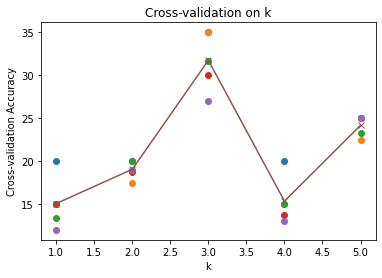

In [14]:
a = np.array(total_accuracy)
b = np.array(accuracy_avg)
c = np.array(k)
plt.plot(c,a, 'o')
plt.plot(c,b, marker='x')
plt.xlabel('k')
plt.ylabel('Cross-validation Accuracy')
plt.title('Cross-validation on k')
plt.show()